The associated [Medium blog post](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e) provides additional detail about the `chatintents` package and this example.

In [1]:
import numpy as np
import pandas as pd
from hyperopt import hp
from sentence_transformers import SentenceTransformer
import chatintents
from chatintents import ChatIntents
from utils import encode_skipthoughts, encode_s3bert
import pickle

pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

# SBERT

In [2]:
def embed_sbert(snippets):
    model_sbert = SentenceTransformer('all-MiniLM-L12-v2')
    embeddings = model_sbert.encode(sentences)
    return embeddings

In [3]:
sample_size = -1 #3000

# Load the pickled dictionary
with open('glanos-data/big_consulting_export-sbert.pickle', 'rb') as file:
    data = pickle.load(file)

# Extract keys and values
snippets = list(data.keys())[:sample_size]
embeddings_sbert = np.array(list(data.values()))[:sample_size]
model_sbert = ChatIntents(embeddings_sbert, 'sbert')
embeddings_sbert.shape

FileNotFoundError: [Errno 2] No such file or directory: 'glanos-data/big_consulting_export-sbert.pickle'

# SkipThoughts

In [ ]:
# TODO try using bi-directional one because of reduced dimensions
embeddings_st = encode_skipthoughts(snippets, model_name="biskip")
print(embeddings_st.shape)
model_st = ChatIntents(embeddings_st, 'skipthoughts')

--2023-05-24 19:27:16--  http://www.cs.toronto.edu/~rkiros/models/btable.npy
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2342138474 (2.2G)
Saving to: ‘data/skip-thoughts/btable.npy’

     0K .......... .......... .......... .......... ..........  0%  184K 3h27m
    50K .......... .......... .......... .......... ..........  0%  379K 2h33m
   100K .......... .......... .......... .......... ..........  0% 1.88M 1h49m
   150K .......... .......... .......... .......... ..........  0% 3.57M 84m33s
   200K .......... .......... .......... .......... ..........  0%  502K 82m49s
   250K .......... .......... .......... .......... ..........  0% 2.36M 71m38s
   300K .......... .......... .......... .......... ..........  0% 2.54M 63m30s
   350K .......... .......... .......... .......... ..........  0% 2.45M 57m27s
   400K ..........

 10050K .......... .......... .......... .......... ..........  0%  195K 33m30s
 10100K .......... .......... .......... .......... ..........  0%  200K 34m16s
 10150K .......... .......... .......... .......... ..........  0%  143K 35m24s
 10200K .......... .......... .......... .......... ..........  0%  194K 36m11s
 10250K .......... .......... .......... .......... ..........  0%  200K 36m56s
 10300K .......... .......... .......... .......... ..........  0%  190K 37m43s
 10350K .......... .......... .......... .......... ..........  0%  202K 38m26s
 10400K .......... .......... .......... .......... ..........  0% 39.2K 42m53s
 10450K .......... .......... .......... .......... ..........  0%  133K 44m3s
 10500K .......... .......... .......... .......... ..........  0%  197K 44m45s
 10550K .......... .......... .......... .......... ..........  0%  197K 45m27s
 10600K .......... .......... .......... .......... ..........  0% 41.7K 49m30s
 10650K .......... .......... .......... 

 15200K .......... .......... .......... .......... ..........  0%  198K 88m27s
 15250K .......... .......... .......... .......... ..........  0%  202K 88m46s
 15300K .......... .......... .......... .......... ..........  0%  210K 89m4s
 15350K .......... .......... .......... .......... ..........  0%  316K 89m10s
 15400K .......... .......... .......... .......... ..........  0%  228K 89m25s
 15450K .......... .......... .......... .......... ..........  0%  291K 89m33s
 15500K .......... .......... .......... .......... ..........  0%  214K 89m49s
 15550K .......... .......... .......... .......... ..........  0%  369K 89m52s
 15600K .......... .......... .......... .......... ..........  0%  357K 89m55s
 15650K .......... .......... .......... .......... ..........  0%  210K 90m12s
 15700K .......... .......... .......... .......... ..........  0%  349K 90m15s
 15750K .......... .......... .......... .......... ..........  0%  387K 90m17s
 15800K .......... .......... .......... 

 20350K .......... .......... .......... .......... ..........  0%  403K 95m31s
 20400K .......... .......... .......... .......... ..........  0%  227K 95m41s
 20450K .......... .......... .......... .......... ..........  0%  102M 95m27s
 20500K .......... .......... .......... .......... ..........  0%  312K 95m31s
 20550K .......... .......... .......... .......... ..........  0%  268K 95m37s
 20600K .......... .......... .......... .......... ..........  0%  331K 95m40s
 20650K .......... .......... .......... .......... ..........  0%  316K 95m43s
 20700K .......... .......... .......... .......... ..........  0%  400K 95m43s
 20750K .......... .......... .......... .......... ..........  0%  401K 95m42s
 20800K .......... .......... .......... .......... ..........  0%  395K 95m42s
 20850K .......... .......... .......... .......... ..........  0%  393K 95m42s
 20900K .......... .......... .......... .......... ..........  0%  385K 95m42s
 20950K .......... .......... ..........

 25500K .......... .......... .......... .......... ..........  1%  327K 1h43m
 25550K .......... .......... .......... .......... ..........  1%  199K 1h44m
 25600K .......... .......... .......... .......... ..........  1%  198K 1h44m
 25650K .......... .......... .......... .......... ..........  1%  335K 1h44m
 25700K .......... .......... .......... .......... ..........  1%  216K 1h44m
 25750K .......... .......... .......... .......... ..........  1%  324K 1h44m
 25800K .......... .......... .......... .......... ..........  1%  218K 1h44m
 25850K .......... .......... .......... .......... ..........  1%  315K 1h44m
 25900K .......... .......... .......... .......... ..........  1%  232K 1h44m
 25950K .......... .......... .......... .......... ..........  1%  348K 1h44m
 26000K .......... .......... .......... .......... ..........  1%  322K 1h44m
 26050K .......... .......... .......... .......... ..........  1%  324K 1h44m
 26100K .......... .......... .......... .......... 

 30700K .......... .......... .......... .......... ..........  1%  343K 1h49m
 30750K .......... .......... .......... .......... ..........  1%  372K 1h49m
 30800K .......... .......... .......... .......... ..........  1%  363K 1h49m
 30850K .......... .......... .......... .......... ..........  1%  378K 1h49m
 30900K .......... .......... .......... .......... ..........  1%  350K 1h49m
 30950K .......... .......... .......... .......... ..........  1%  214K 1h49m
 31000K .......... .......... .......... .......... ..........  1%  320K 1h49m
 31050K .......... .......... .......... .......... ..........  1%  345K 1h49m
 31100K .......... .......... .......... .......... ..........  1%  246K 1h49m
 31150K .......... .......... .......... .......... ..........  1%  278K 1h49m
 31200K .......... .......... .......... .......... ..........  1%  396K 1h49m
 31250K .......... .......... .......... .......... ..........  1%  315K 1h49m
 31300K .......... .......... .......... .......... 

 35900K .......... .......... .......... .......... ..........  1%  397K 1h50m
 35950K .......... .......... .......... .......... ..........  1%  393K 1h50m
 36000K .......... .......... .......... .......... ..........  1%  385K 1h50m
 36050K .......... .......... .......... .......... ..........  1%  395K 1h50m
 36100K .......... .......... .......... .......... ..........  1%  394K 1h50m
 36150K .......... .......... .......... .......... ..........  1%  371K 1h50m
 36200K .......... .......... .......... .......... ..........  1%  387K 1h50m
 36250K .......... .......... .......... .......... ..........  1%  400K 1h50m
 36300K .......... .......... .......... .......... ..........  1%  386K 1h50m
 36350K .......... .......... .......... .......... ..........  1%  373K 1h50m
 36400K .......... .......... .......... .......... ..........  1%  393K 1h50m
 36450K .......... .......... .......... .......... ..........  1%  396K 1h50m
 36500K .......... .......... .......... .......... 

 41100K .......... .......... .......... .......... ..........  1%  364K 1h50m
 41150K .......... .......... .......... .......... ..........  1%  384K 1h50m
 41200K .......... .......... .......... .......... ..........  1%  380K 1h50m
 41250K .......... .......... .......... .......... ..........  1%  290K 1h50m
 41300K .......... .......... .......... .......... ..........  1%  348K 1h50m
 41350K .......... .......... .......... .......... ..........  1%  399K 1h50m
 41400K .......... .......... .......... .......... ..........  1%  398K 1h50m
 41450K .......... .......... .......... .......... ..........  1%  318K 1h50m
 41500K .......... .......... .......... .......... ..........  1%  366K 1h50m
 41550K .......... .......... .......... .......... ..........  1%  181K 1h50m
 41600K .......... .......... .......... .......... ..........  1%  406K 1h50m
 41650K .......... .......... .......... .......... ..........  1%  341K 1h50m
 41700K .......... .......... .......... .......... 

 46350K .......... .......... .......... .......... ..........  2%  222K 1h52m
 46400K .......... .......... .......... .......... ..........  2%  375K 1h52m
 46450K .......... .......... .......... .......... ..........  2%  384K 1h52m
 46500K .......... .......... .......... .......... ..........  2%  389K 1h52m
 46550K .......... .......... .......... .......... ..........  2%  389K 1h52m
 46600K .......... .......... .......... .......... ..........  2%  261K 1h52m
 46650K .......... .......... .......... .......... ..........  2%  773K 1h52m
 46700K .......... .......... .......... .......... ..........  2%  397K 1h52m
 46750K .......... .......... .......... .......... ..........  2%  358K 1h52m
 46800K .......... .......... .......... .......... ..........  2%  389K 1h52m
 46850K .......... .......... .......... .......... ..........  2%  310K 1h52m
 46900K .......... .......... .......... .......... ..........  2%  235K 1h52m
 46950K .......... .......... .......... .......... 

 51550K .......... .......... .......... .......... ..........  2%  133K 2h2m
 51600K .......... .......... .......... .......... ..........  2%  195K 2h2m
 51650K .......... .......... .......... .......... ..........  2%  138K 2h2m
 51700K .......... .......... .......... .......... ..........  2%  200K 2h2m
 51750K .......... .......... .......... .......... ..........  2%  199K 2h2m
 51800K .......... .......... .......... .......... ..........  2%  315K 2h2m
 51850K .......... .......... .......... .......... ..........  2%  197K 2h2m
 51900K .......... .......... .......... .......... ..........  2%  208K 2h2m
 51950K .......... .......... .......... .......... ..........  2%  352K 2h2m
 52000K .......... .......... .......... .......... ..........  2%  209K 2h2m
 52050K .......... .......... .......... .......... ..........  2%  340K 2h2m
 52100K .......... .......... .......... .......... ..........  2%  211K 2h2m
 52150K .......... .......... .......... .......... ..........  

 62050K .......... .......... .......... .......... ..........  2%  191K 2h7m
 62100K .......... .......... .......... .......... ..........  2%  192K 2h7m
 62150K .......... .......... .......... .......... ..........  2%  263K 2h7m
 62200K .......... .......... .......... .......... ..........  2%  264K 2h7m
 62250K .......... .......... .......... .......... ..........  2%  196K 2h7m
 62300K .......... .......... .......... .......... ..........  2%  188K 2h7m
 62350K .......... .......... .......... .......... ..........  2%  136K 2h7m
 62400K .......... .......... .......... .......... ..........  2%  184K 2h7m
 62450K .......... .......... .......... .......... ..........  2%  198K 2h7m
 62500K .......... .......... .......... .......... ..........  2% 58.4K 2h8m
 62550K .......... .......... .......... .......... ..........  2%  161K 2h8m
 62600K .......... .......... .......... .......... ..........  2%  131K 2h8m
 62650K .......... .......... .......... .......... ..........  

 67300K .......... .......... .......... .......... ..........  2%  289K 2h10m
 67350K .......... .......... .......... .......... ..........  2%  200K 2h10m
 67400K .......... .......... .......... .......... ..........  2%  194K 2h10m
 67450K .......... .......... .......... .......... ..........  2%  219K 2h10m
 67500K .......... .......... .......... .......... ..........  2%  203K 2h10m
 67550K .......... .......... .......... .......... ..........  2%  342K 2h10m
 67600K .......... .......... .......... .......... ..........  2%  212K 2h10m
 67650K .......... .......... .......... .......... ..........  2%  270K 2h10m
 67700K .......... .......... .......... .......... ..........  2%  237K 2h10m
 67750K .......... .......... .......... .......... ..........  2%  329K 2h10m
 67800K .......... .......... .......... .......... ..........  2%  309K 2h10m
 67850K .......... .......... .......... .......... ..........  2%  257K 2h10m
 67900K .......... .......... .......... .......... 

 72500K .......... .......... .......... .......... ..........  3%  356K 2h17m
 72550K .......... .......... .......... .......... ..........  3%  399K 2h17m
 72600K .......... .......... .......... .......... ..........  3%  355K 2h17m
 72650K .......... .......... .......... .......... ..........  3%  361K 2h17m
 72700K .......... .......... .......... .......... ..........  3%  401K 2h17m
 72750K .......... .......... .......... .......... ..........  3%  394K 2h17m
 72800K .......... .......... .......... .......... ..........  3%  265K 2h17m
 72850K .......... .......... .......... .......... ..........  3%  408K 2h17m
 72900K .......... .......... .......... .......... ..........  3%  308K 2h17m
 72950K .......... .......... .......... .......... ..........  3%  400K 2h17m
 73000K .......... .......... .......... .......... ..........  3%  109K 2h17m
 73050K .......... .......... .......... .......... ..........  3%  191K 2h17m
 73100K .......... .......... .......... .......... 

 77700K .......... .......... .......... .......... ..........  3%  336K 2h19m
 77750K .......... .......... .......... .......... ..........  3%  277K 2h19m
 77800K .......... .......... .......... .......... ..........  3%  257K 2h19m
 77850K .......... .......... .......... .......... ..........  3%  309K 2h19m
 77900K .......... .......... .......... .......... ..........  3% 23.3K 2h20m
 77950K .......... .......... .......... .......... ..........  3%  183K 2h20m
 78000K .......... .......... .......... .......... ..........  3%  195K 2h20m
 78050K .......... .......... .......... .......... ..........  3%  197K 2h20m
 78100K .......... .......... .......... .......... ..........  3%  214K 2h20m
 78150K .......... .......... .......... .......... ..........  3%  311K 2h20m
 78200K .......... .......... .......... .......... ..........  3%  234K 2h20m
 78250K .......... .......... .......... .......... ..........  3%  296K 2h20m
 78300K .......... .......... .......... .......... 

 88050K .......... .......... .......... .......... ..........  3%  173K 2h21m
 88100K .......... .......... .......... .......... ..........  3% 80.2K 2h21m
 88150K .......... .......... .......... .......... ..........  3%  188K 2h21m
 88200K .......... .......... .......... .......... ..........  3% 50.8K 2h21m
 88250K .......... .......... .......... .......... ..........  3%  131K 2h21m
 88300K .......... .......... .......... .......... ..........  3%  176K 2h21m
 88350K .......... .......... .......... .......... ..........  3%  188K 2h21m
 88400K .......... .......... .......... .......... ..........  3%  152K 2h21m
 88450K .......... .......... .......... .......... ..........  3%  198K 2h21m
 88500K .......... .......... .......... .......... ..........  3%  189K 2h21m
 88550K .......... .......... .......... .......... ..........  3%  191K 2h21m
 88600K .......... .......... .......... .......... ..........  3%  199K 2h21m
 88650K .......... .......... .......... .......... 

 93300K .......... .......... .......... .......... ..........  4%  228K 2h23m
 93350K .......... .......... .......... .......... ..........  4%  351K 2h23m
 93400K .......... .......... .......... .......... ..........  4%  220K 2h23m
 93450K .......... .......... .......... .......... ..........  4%  381K 2h23m
 93500K .......... .......... .......... .......... ..........  4%  354K 2h23m
 93550K .......... .......... .......... .......... ..........  4%  376K 2h23m
 93600K .......... .......... .......... .......... ..........  4%  390K 2h23m
 93650K .......... .......... .......... .......... ..........  4%  395K 2h23m
 93700K .......... .......... .......... .......... ..........  4%  199K 2h23m
 93750K .......... .......... .......... .......... ..........  4%  374K 2h23m
 93800K .......... .......... .......... .......... ..........  4%  383K 2h23m
 93850K .......... .......... .......... .......... ..........  4%  397K 2h23m
 93900K .......... .......... .......... .......... 

 98500K .......... .......... .......... .......... ..........  4%  325K 2h24m
 98550K .......... .......... .......... .......... ..........  4%  223K 2h24m
 98600K .......... .......... .......... .......... ..........  4%  311K 2h24m
 98650K .......... .......... .......... .......... ..........  4%  387K 2h24m
 98700K .......... .......... .......... .......... ..........  4%  198K 2h24m
 98750K .......... .......... .......... .......... ..........  4%  381K 2h24m
 98800K .......... .......... .......... .......... ..........  4%  385K 2h24m
 98850K .......... .......... .......... .......... ..........  4%  257K 2h24m
 98900K .......... .......... .......... .......... ..........  4%  261K 2h24m
 98950K .......... .......... .......... .......... ..........  4%  381K 2h24m
 99000K .......... .......... .......... .......... ..........  4%  365K 2h24m
 99050K .......... .......... .......... .......... ..........  4%  326K 2h24m
 99100K .......... .......... .......... .......... 

103750K .......... .......... .......... .......... ..........  4%  397K 2h22m
103800K .......... .......... .......... .......... ..........  4%  398K 2h22m
103850K .......... .......... .......... .......... ..........  4%  400K 2h22m
103900K .......... .......... .......... .......... ..........  4%  400K 2h22m
103950K .......... .......... .......... .......... ..........  4%  402K 2h22m
104000K .......... .......... .......... .......... ..........  4%  391K 2h22m
104050K .......... .......... .......... .......... ..........  4%  380K 2h22m
104100K .......... .......... .......... .......... ..........  4%  380K 2h22m
104150K .......... .......... .......... .......... ..........  4%  415K 2h22m
104200K .......... .......... .......... .......... ..........  4%  402K 2h21m
104250K .......... .......... .......... .......... ..........  4%  484K 2h21m
104300K .......... .......... .......... .......... ..........  4%  370K 2h21m
104350K .......... .......... .......... .......... 

109000K .......... .......... .......... .......... ..........  4%  381K 2h19m
109050K .......... .......... .......... .......... ..........  4%  386K 2h19m
109100K .......... .......... .......... .......... ..........  4%  385K 2h19m
109150K .......... .......... .......... .......... ..........  4%  827K 2h19m
109200K .......... .......... .......... .......... ..........  4%  393K 2h19m
109250K .......... .......... .......... .......... ..........  4%  364K 2h19m
109300K .......... .......... .......... .......... ..........  4%  401K 2h19m
109350K .......... .......... .......... .......... ..........  4%  380K 2h19m
109400K .......... .......... .......... .......... ..........  4%  530K 2h19m
109450K .......... .......... .......... .......... ..........  4%  439K 2h19m
109500K .......... .......... .......... .......... ..........  4%  405K 2h19m
109550K .......... .......... .......... .......... ..........  4%  481K 2h19m
109600K .......... .......... .......... .......... 

119300K .......... .......... .......... .......... ..........  5%  198K 2h24m
119350K .......... .......... .......... .......... ..........  5%  187K 2h24m
119400K .......... .......... .......... .......... ..........  5%  191K 2h24m
119450K .......... .......... .......... .......... ..........  5%  243K 2h24m
119500K .......... .......... .......... .......... ..........  5%  219K 2h24m
119550K .......... .......... .......... .......... ..........  5%  185K 2h24m
119600K .......... .......... .......... .......... ..........  5%  200K 2h24m
119650K .......... .......... .......... .......... ..........  5%  279K 2h24m
119700K .......... .......... .......... .......... ..........  5%  191K 2h24m
119750K .......... .......... .......... .......... ..........  5%  274K 2h24m
119800K .......... .......... .......... .......... ..........  5%  358K 2h24m
119850K .......... .......... .......... .......... ..........  5%  291K 2h24m
119900K .......... .......... .......... .......... 

124500K .......... .......... .......... .......... ..........  5%  170K 2h27m
124550K .......... .......... .......... .......... ..........  5%  114K 2h27m
124600K .......... .......... .......... .......... ..........  5%  287K 2h27m
124650K .......... .......... .......... .......... ..........  5%  122K 2h27m
124700K .......... .......... .......... .......... ..........  5%  202K 2h27m
124750K .......... .......... .......... .......... ..........  5%  123K 2h27m
124800K .......... .......... .......... .......... ..........  5%  147K 2h27m
124850K .......... .......... .......... .......... ..........  5%  124K 2h27m
124900K .......... .......... .......... .......... ..........  5%  134K 2h27m
124950K .......... .......... .......... .......... ..........  5% 1.76M 2h27m
125000K .......... .......... .......... .......... ..........  5%  287K 2h27m
125050K .......... .......... .......... .......... ..........  5% 1.78M 2h27m
125100K .......... .......... .......... .......... 

129700K .......... .......... .......... .......... ..........  5% 35.8K 2h24m
129750K .......... .......... .......... .......... ..........  5% 39.6K 2h24m
129800K .......... .......... .......... .......... ..........  5%  136K 2h24m
129850K .......... .......... .......... .......... ..........  5%  172K 2h24m
129900K .......... .......... .......... .......... ..........  5%  155K 2h24m
129950K .......... .......... .......... .......... ..........  5%  486K 2h24m
130000K .......... .......... .......... .......... ..........  5%  131K 2h24m
130050K .......... .......... .......... .......... ..........  5%  297K 2h24m
130100K .......... .......... .......... .......... ..........  5%  188K 2h24m
130150K .......... .......... .......... .......... ..........  5% 84.3K 2h24m
130200K .......... .......... .......... .......... ..........  5%  283K 2h24m
130250K .......... .......... .......... .......... ..........  5% 1.29M 2h24m
130300K .......... .......... .......... .......... 

134900K .......... .......... .......... .......... ..........  5% 88.5K 2h26m
134950K .......... .......... .......... .......... ..........  5% 93.4K 2h26m
135000K .......... .......... .......... .......... ..........  5%  259K 2h26m
135050K .......... .......... .......... .......... ..........  5%  119K 2h26m
135100K .......... .......... .......... .......... ..........  5%  120K 2h26m
135150K .......... .......... .......... .......... ..........  5%  168K 2h26m
135200K .......... .......... .......... .......... ..........  5%  129K 2h26m
135250K .......... .......... .......... .......... ..........  5%  181K 2h26m
135300K .......... .......... .......... .......... ..........  5%  162K 2h26m
135350K .......... .......... .......... .......... ..........  5%  141K 2h26m
135400K .......... .......... .......... .......... ..........  5%  176K 2h26m
135450K .......... .......... .......... .......... ..........  5%  142K 2h26m
135500K .......... .......... .......... .......... 

140150K .......... .......... .......... .......... ..........  6%  380K 2h34m
140200K .......... .......... .......... .......... ..........  6% 1.90M 2h34m
140250K .......... .......... .......... .......... ..........  6%  530K 2h34m
140300K .......... .......... .......... .......... ..........  6% 1.66M 2h34m
140350K .......... .......... .......... .......... ..........  6% 1.05M 2h34m
140400K .......... .......... .......... .......... ..........  6%  808K 2h33m
140450K .......... .......... .......... .......... ..........  6% 1.40M 2h33m
140500K .......... .......... .......... .......... ..........  6% 1.11M 2h33m
140550K .......... .......... .......... .......... ..........  6%  551K 2h33m
140600K .......... .......... .......... .......... ..........  6% 1.73M 2h33m
140650K .......... .......... .......... .......... ..........  6% 2.13M 2h33m
140700K .......... .......... .......... .......... ..........  6%  601K 2h33m
140750K .......... .......... .......... .......... 

145350K .......... .......... .......... .......... ..........  6% 64.1K 2h29m
145400K .......... .......... .......... .......... ..........  6%  241K 2h29m
145450K .......... .......... .......... .......... ..........  6% 5.47M 2h29m
145500K .......... .......... .......... .......... ..........  6%  197K 2h29m
145550K .......... .......... .......... .......... ..........  6%  161K 2h29m
145600K .......... .......... .......... .......... ..........  6%  150K 2h29m
145650K .......... .......... .......... .......... ..........  6% 1.54M 2h29m
145700K .......... .......... .......... .......... ..........  6%  268K 2h29m
145750K .......... .......... .......... .......... ..........  6%  238K 2h29m
145800K .......... .......... .......... .......... ..........  6%  161K 2h29m
145850K .......... .......... .......... .......... ..........  6% 88.1K 2h29m
145900K .......... .......... .......... .......... ..........  6% 3.91M 2h29m
145950K .......... .......... .......... .......... 

150600K .......... .......... .......... .......... ..........  6%  281K 2h30m
150650K .......... .......... .......... .......... ..........  6%  382K 2h30m
150700K .......... .......... .......... .......... ..........  6%  740K 2h30m
150750K .......... .......... .......... .......... ..........  6%  302K 2h30m
150800K .......... .......... .......... .......... ..........  6% 1.23M 2h30m
150850K .......... .......... .......... .......... ..........  6%  311K 2h30m
150900K .......... .......... .......... .......... ..........  6% 1.27M 2h30m
150950K .......... .......... .......... .......... ..........  6%  209K 2h30m
151000K .......... .......... .......... .......... ..........  6% 3.06M 2h30m
151050K .......... .......... .......... .......... ..........  6% 4.36M 2h30m
151100K .......... .......... .......... .......... ..........  6%  267K 2h30m
151150K .......... .......... .......... .......... ..........  6% 2.12M 2h30m
151200K .......... .......... .......... .......... 

155800K .......... .......... .......... .......... ..........  6%  373K 2h29m
155850K .......... .......... .......... .......... ..........  6%  321K 2h29m
155900K .......... .......... .......... .......... ..........  6%  280K 2h29m
155950K .......... .......... .......... .......... ..........  6%  297K 2h29m
156000K .......... .......... .......... .......... ..........  6%  256K 2h29m
156050K .......... .......... .......... .......... ..........  6%  232K 2h29m
156100K .......... .......... .......... .......... ..........  6%  260K 2h29m
156150K .......... .......... .......... .......... ..........  6%  166K 2h29m
156200K .......... .......... .......... .......... ..........  6%  208K 2h29m
156250K .......... .......... .......... .......... ..........  6%  288K 2h29m
156300K .......... .......... .......... .......... ..........  6%  212K 2h29m
156350K .......... .......... .......... .......... ..........  6%  260K 2h29m
156400K .......... .......... .......... .......... 

161000K .......... .......... .......... .......... ..........  7%  315K 2h29m
161050K .......... .......... .......... .......... ..........  7%  364K 2h29m
161100K .......... .......... .......... .......... ..........  7%  343K 2h29m
161150K .......... .......... .......... .......... ..........  7% 1.44M 2h29m
161200K .......... .......... .......... .......... ..........  7%  369K 2h29m
161250K .......... .......... .......... .......... ..........  7%  348K 2h29m
161300K .......... .......... .......... .......... ..........  7%  391K 2h29m
161350K .......... .......... .......... .......... ..........  7%  681K 2h29m
161400K .......... .......... .......... .......... ..........  7%  307K 2h29m
161450K .......... .......... .......... .......... ..........  7%  380K 2h29m
161500K .......... .......... .......... .......... ..........  7%  357K 2h29m
161550K .......... .......... .......... .......... ..........  7%  200K 2h29m
161600K .......... .......... .......... .......... 

171350K .......... .......... .......... .......... ..........  7% 97.2K 2h31m
171400K .......... .......... .......... .......... ..........  7%  302K 2h31m
171450K .......... .......... .......... .......... ..........  7%  183K 2h31m
171500K .......... .......... .......... .......... ..........  7%  135K 2h31m
171550K .......... .......... .......... .......... ..........  7%  215K 2h31m
171600K .......... .......... .......... .......... ..........  7% 99.1K 2h31m
171650K .......... .......... .......... .......... ..........  7%  130K 2h31m
171700K .......... .......... .......... .......... ..........  7%  151K 2h31m
171750K .......... .......... .......... .......... ..........  7% 72.2K 2h31m
171800K .......... .......... .......... .......... ..........  7%  126K 2h31m
171850K .......... .......... .......... .......... ..........  7%  109K 2h31m
171900K .......... .......... .......... .......... ..........  7% 97.4K 2h32m
171950K .......... .......... .......... .......... 

176550K .......... .......... .......... .......... ..........  7%  202K 2h32m
176600K .......... .......... .......... .......... ..........  7%  293K 2h32m
176650K .......... .......... .......... .......... ..........  7%  316K 2h32m
176700K .......... .......... .......... .......... ..........  7%  200K 2h32m
176750K .......... .......... .......... .......... ..........  7%  302K 2h32m
176800K .......... .......... .......... .......... ..........  7%  300K 2h32m
176850K .......... .......... .......... .......... ..........  7%  226K 2h32m
176900K .......... .......... .......... .......... ..........  7%  167K 2h32m
176950K .......... .......... .......... .......... ..........  7%  177K 2h32m
177000K .......... .......... .......... .......... ..........  7%  181K 2h32m
177050K .......... .......... .......... .......... ..........  7%  158K 2h32m
177100K .......... .......... .......... .......... ..........  7%  172K 2h32m
177150K .......... .......... .......... .......... 

181750K .......... .......... .......... .......... ..........  7%  102K 2h33m
181800K .......... .......... .......... .......... ..........  7%  581K 2h33m
181850K .......... .......... .......... .......... ..........  7%  401K 2h33m
181900K .......... .......... .......... .......... ..........  7%  398K 2h33m
181950K .......... .......... .......... .......... ..........  7%  324K 2h33m
182000K .......... .......... .......... .......... ..........  7%  372K 2h33m
182050K .......... .......... .......... .......... ..........  7%  673K 2h32m
182100K .......... .......... .......... .......... ..........  7%  463K 2h32m
182150K .......... .......... .......... .......... ..........  7%  352K 2h32m
182200K .......... .......... .......... .......... ..........  7%  377K 2h32m
182250K .......... .......... .......... .......... ..........  7%  421K 2h32m
182300K .......... .......... .......... .......... ..........  7%  265K 2h32m
182350K .......... .......... .......... .......... 

186950K .......... .......... .......... .......... ..........  8%  240K 2h31m
187000K .......... .......... .......... .......... ..........  8%  302K 2h31m
187050K .......... .......... .......... .......... ..........  8%  358K 2h31m
187100K .......... .......... .......... .......... ..........  8%  261K 2h31m
187150K .......... .......... .......... .......... ..........  8%  318K 2h31m
187200K .......... .......... .......... .......... ..........  8%  296K 2h31m
187250K .......... .......... .......... .......... ..........  8%  388K 2h31m
187300K .......... .......... .......... .......... ..........  8%  376K 2h31m
187350K .......... .......... .......... .......... ..........  8%  358K 2h31m
187400K .......... .......... .......... .......... ..........  8%  293K 2h31m
187450K .......... .......... .......... .......... ..........  8%  399K 2h31m
187500K .......... .......... .......... .......... ..........  8%  322K 2h31m
187550K .......... .......... .......... .......... 

192250K .......... .......... .......... .......... ..........  8%  631K 2h30m
192300K .......... .......... .......... .......... ..........  8%  953K 2h30m
192350K .......... .......... .......... .......... ..........  8%  681K 2h30m
192400K .......... .......... .......... .......... ..........  8% 3.44M 2h30m
192450K .......... .......... .......... .......... ..........  8% 1.20M 2h30m
192500K .......... .......... .......... .......... ..........  8%  511K 2h30m
192550K .......... .......... .......... .......... ..........  8% 1.75M 2h30m
192600K .......... .......... .......... .......... ..........  8%  718K 2h30m
192650K .......... .......... .......... .......... ..........  8% 1.34M 2h30m
192700K .......... .......... .......... .......... ..........  8% 2.34M 2h30m
192750K .......... .......... .......... .......... ..........  8%  454K 2h30m
192800K .......... .......... .......... .......... ..........  8% 2.64M 2h30m
192850K .......... .......... .......... .......... 

197450K .......... .......... .......... .......... ..........  8%  284K 2h28m
197500K .......... .......... .......... .......... ..........  8%  246K 2h28m
197550K .......... .......... .......... .......... ..........  8%  393K 2h28m
197600K .......... .......... .......... .......... ..........  8%  284K 2h28m
197650K .......... .......... .......... .......... ..........  8%  234K 2h28m
197700K .......... .......... .......... .......... ..........  8%  392K 2h28m
197750K .......... .......... .......... .......... ..........  8%  280K 2h28m
197800K .......... .......... .......... .......... ..........  8%  247K 2h28m
197850K .......... .......... .......... .......... ..........  8%  380K 2h28m
197900K .......... .......... .......... .......... ..........  8%  394K 2h28m
197950K .......... .......... .......... .......... ..........  8%  273K 2h28m
198000K .......... .......... .......... .......... ..........  8%  383K 2h28m
198050K .......... .......... .......... .......... 

202650K .......... .......... .......... .......... ..........  8%  147K 2h27m
202700K .......... .......... .......... .......... ..........  8%  162K 2h27m
202750K .......... .......... .......... .......... ..........  8%  186K 2h27m
202800K .......... .......... .......... .......... ..........  8%  197K 2h27m
202850K .......... .......... .......... .......... ..........  8%  210K 2h27m
202900K .......... .......... .......... .......... ..........  8%  239K 2h27m
202950K .......... .......... .......... .......... ..........  8%  199K 2h27m
203000K .......... .......... .......... .......... ..........  8%  271K 2h27m
203050K .......... .......... .......... .......... ..........  8% 77.1K 2h27m
203100K .......... .......... .......... .......... ..........  8%  168K 2h27m
203150K .......... .......... .......... .......... ..........  8% 61.6K 2h27m
203200K .......... .......... .......... .......... ..........  8%  111K 2h27m
203250K .......... .......... .......... .......... 

213050K .......... .......... .......... .......... ..........  9%  361K 2h27m
213100K .......... .......... .......... .......... ..........  9%  151K 2h27m
213150K .......... .......... .......... .......... ..........  9% 1003K 2h27m
213200K .......... .......... .......... .......... ..........  9%  244K 2h27m
213250K .......... .......... .......... .......... ..........  9%  283K 2h27m
213300K .......... .......... .......... .......... ..........  9%  232K 2h27m
213350K .......... .......... .......... .......... ..........  9%  292K 2h27m
213400K .......... .......... .......... .......... ..........  9%  188K 2h27m
213450K .......... .......... .......... .......... ..........  9%  520K 2h27m
213500K .......... .......... .......... .......... ..........  9%  213K 2h27m
213550K .......... .......... .......... .......... ..........  9%  192K 2h27m
213600K .......... .......... .......... .......... ..........  9%  355K 2h27m
213650K .......... .......... .......... .......... 

218250K .......... .......... .......... .......... ..........  9%  179K 2h29m
218300K .......... .......... .......... .......... ..........  9%  194K 2h29m
218350K .......... .......... .......... .......... ..........  9%  200K 2h29m
218400K .......... .......... .......... .......... ..........  9%  382K 2h29m
218450K .......... .......... .......... .......... ..........  9%  194K 2h29m
218500K .......... .......... .......... .......... ..........  9%  292K 2h29m
218550K .......... .......... .......... .......... ..........  9%  209K 2h29m
218600K .......... .......... .......... .......... ..........  9%  342K 2h29m
218650K .......... .......... .......... .......... ..........  9%  241K 2h29m
218700K .......... .......... .......... .......... ..........  9%  276K 2h29m
218750K .......... .......... .......... .......... ..........  9%  256K 2h29m
218800K .......... .......... .......... .......... ..........  9%  268K 2h29m
218850K .......... .......... .......... .......... 

223450K .......... .......... .......... .......... ..........  9%  358K 2h27m
223500K .......... .......... .......... .......... ..........  9%  370K 2h27m
223550K .......... .......... .......... .......... ..........  9% 2.26M 2h27m
223600K .......... .......... .......... .......... ..........  9%  405K 2h27m
223650K .......... .......... .......... .......... ..........  9%  362K 2h27m
223700K .......... .......... .......... .......... ..........  9%  394K 2h27m
223750K .......... .......... .......... .......... ..........  9%  398K 2h27m
223800K .......... .......... .......... .......... ..........  9% 96.3K 2h27m
223850K .......... .......... .......... .......... ..........  9% 5.76M 2h27m
223900K .......... .......... .......... .......... ..........  9%  375K 2h27m
223950K .......... .......... .......... .......... ..........  9%  368K 2h27m
224000K .......... .......... .......... .......... ..........  9%  280K 2h27m
224050K .......... .......... .......... .......... 

228700K .......... .......... .......... .......... .......... 10%  349K 2h26m
228750K .......... .......... .......... .......... .......... 10%  264M 2h26m
228800K .......... .......... .......... .......... .......... 10%  386K 2h26m
228850K .......... .......... .......... .......... .......... 10%  398K 2h26m
228900K .......... .......... .......... .......... .......... 10%  375K 2h25m
228950K .......... .......... .......... .......... .......... 10%  375K 2h25m
229000K .......... .......... .......... .......... .......... 10%  435K 2h25m
229050K .......... .......... .......... .......... .......... 10%  408K 2h25m
229100K .......... .......... .......... .......... .......... 10% 1.69M 2h25m
229150K .......... .......... .......... .......... .......... 10%  405K 2h25m
229200K .......... .......... .......... .......... .......... 10%  398K 2h25m
229250K .......... .......... .......... .......... .......... 10%  358K 2h25m
229300K .......... .......... .......... .......... 

233900K .......... .......... .......... .......... .......... 10%  296K 2h25m
233950K .......... .......... .......... .......... .......... 10%  240K 2h25m
234000K .......... .......... .......... .......... .......... 10%  385K 2h25m
234050K .......... .......... .......... .......... .......... 10%  379K 2h25m
234100K .......... .......... .......... .......... .......... 10%  335K 2h25m
234150K .......... .......... .......... .......... .......... 10%  330K 2h25m
234200K .......... .......... .......... .......... .......... 10%  272K 2h25m
234250K .......... .......... .......... .......... .......... 10%  183K 2h25m
234300K .......... .......... .......... .......... .......... 10%  352K 2h25m
234350K .......... .......... .......... .......... .......... 10%  394K 2h25m
234400K .......... .......... .......... .......... .......... 10%  371K 2h25m
234450K .......... .......... .......... .......... .......... 10%  395K 2h25m
234500K .......... .......... .......... .......... 

239150K .......... .......... .......... .......... .......... 10%  372K 2h23m
239200K .......... .......... .......... .......... .......... 10%  394K 2h23m
239250K .......... .......... .......... .......... .......... 10%  232K 2h23m
239300K .......... .......... .......... .......... .......... 10%  343K 2h23m
239350K .......... .......... .......... .......... .......... 10%  397K 2h23m
239400K .......... .......... .......... .......... .......... 10%  402K 2h23m
239450K .......... .......... .......... .......... .......... 10%  396K 2h23m
239500K .......... .......... .......... .......... .......... 10%  398K 2h23m
239550K .......... .......... .......... .......... .......... 10%  290K 2h23m
239600K .......... .......... .......... .......... .......... 10%  395K 2h23m
239650K .......... .......... .......... .......... .......... 10%  398K 2h23m
239700K .......... .......... .......... .......... .......... 10%  398K 2h23m
239750K .......... .......... .......... .......... 

249500K .......... .......... .......... .......... .......... 10%  347K 2h22m
249550K .......... .......... .......... .......... .......... 10%  600K 2h21m
249600K .......... .......... .......... .......... .......... 10%  419K 2h21m
249650K .......... .......... .......... .......... .......... 10%  744K 2h21m
249700K .......... .......... .......... .......... .......... 10%  403K 2h21m
249750K .......... .......... .......... .......... .......... 10%  494K 2h21m
249800K .......... .......... .......... .......... .......... 10%  359K 2h21m
249850K .......... .......... .......... .......... .......... 10% 83.6K 2h21m
249900K .......... .......... .......... .......... .......... 10% 19.9M 2h21m
249950K .......... .......... .......... .......... .......... 10%  358K 2h21m
250000K .......... .......... .......... .......... .......... 10%  368K 2h21m
250050K .......... .......... .......... .......... .......... 10%  378K 2h21m
250100K .......... .......... .......... .......... 

254750K .......... .......... .......... .......... .......... 11%  177K 2h21m
254800K .......... .......... .......... .......... .......... 11%  278K 2h21m
254850K .......... .......... .......... .......... .......... 11%  334K 2h21m
254900K .......... .......... .......... .......... .......... 11% 69.7K 2h21m
254950K .......... .......... .......... .......... .......... 11%  197K 2h21m
255000K .......... .......... .......... .......... .......... 11%  191K 2h21m
255050K .......... .......... .......... .......... .......... 11% 66.3K 2h21m
255100K .......... .......... .......... .......... .......... 11% 33.3K 2h21m
255150K .......... .......... .......... .......... .......... 11%  118K 2h21m
255200K .......... .......... .......... .......... .......... 11%  179K 2h21m
255250K .......... .......... .......... .......... .......... 11%  128K 2h21m
255300K .......... .......... .......... .......... .......... 11%  195K 2h21m
255350K .......... .......... .......... .......... 

259950K .......... .......... .......... .......... .......... 11%  260K 2h21m
260000K .......... .......... .......... .......... .......... 11% 1.99M 2h21m
260050K .......... .......... .......... .......... .......... 11%  255K 2h21m
260100K .......... .......... .......... .......... .......... 11%  392K 2h21m
260150K .......... .......... .......... .......... .......... 11%  357K 2h21m
260200K .......... .......... .......... .......... .......... 11%  390K 2h21m
260250K .......... .......... .......... .......... .......... 11%  576K 2h21m
260300K .......... .......... .......... .......... .......... 11%  283K 2h21m
260350K .......... .......... .......... .......... .......... 11%  205K 2h21m
260400K .......... .......... .......... .......... .......... 11%  339K 2h21m
260450K .......... .......... .......... .......... .......... 11%  391K 2h21m
260500K .......... .......... .......... .......... .......... 11%  881K 2h21m
260550K .......... .......... .......... .......... 

265400K .......... .......... .......... .......... .......... 11%  792K 2h18m
265450K .......... .......... .......... .......... .......... 11% 4.89M 2h18m
265500K .......... .......... .......... .......... .......... 11% 2.18M 2h18m
265550K .......... .......... .......... .......... .......... 11% 7.15M 2h18m
265600K .......... .......... .......... .......... .......... 11% 4.95M 2h18m
265650K .......... .......... .......... .......... .......... 11% 3.49M 2h18m
265700K .......... .......... .......... .......... .......... 11%  703K 2h18m
265750K .......... .......... .......... .......... .......... 11% 1.76M 2h18m
265800K .......... .......... .......... .......... .......... 11% 2.65M 2h18m
265850K .......... .......... .......... .......... .......... 11% 2.09M 2h18m
265900K .......... .......... .......... .......... .......... 11% 3.46M 2h18m
265950K .......... .......... .......... .......... .......... 11% 3.29M 2h18m
266000K .......... .......... .......... .......... 

270650K .......... .......... .......... .......... .......... 11%  196K 2h16m
270700K .......... .......... .......... .......... .......... 11%  127M 2h16m
270750K .......... .......... .......... .......... .......... 11%  146M 2h16m
270800K .......... .......... .......... .......... .......... 11% 1.39M 2h16m
270850K .......... .......... .......... .......... .......... 11%  556K 2h16m
270900K .......... .......... .......... .......... .......... 11%  761K 2h16m
270950K .......... .......... .......... .......... .......... 11%  500K 2h16m
271000K .......... .......... .......... .......... .......... 11% 1.11M 2h16m
271050K .......... .......... .......... .......... .......... 11%  496K 2h16m
271100K .......... .......... .......... .......... .......... 11% 1.55M 2h16m
271150K .......... .......... .......... .......... .......... 11%  158K 2h16m
271200K .......... .......... .......... .......... .......... 11%  152M 2h16m
271250K .......... .......... .......... .......... 

275850K .......... .......... .......... .......... .......... 12%  261K 2h16m
275900K .......... .......... .......... .......... .......... 12%  267K 2h16m
275950K .......... .......... .......... .......... .......... 12%  369K 2h16m
276000K .......... .......... .......... .......... .......... 12%  394K 2h16m
276050K .......... .......... .......... .......... .......... 12%  390K 2h16m
276100K .......... .......... .......... .......... .......... 12%  368K 2h16m
276150K .......... .......... .......... .......... .......... 12%  387K 2h16m
276200K .......... .......... .......... .......... .......... 12%  371K 2h16m
276250K .......... .......... .......... .......... .......... 12%  394K 2h16m
276300K .......... .......... .......... .......... .......... 12% 1021K 2h16m
276350K .......... .......... .......... .......... .......... 12%  568K 2h16m
276400K .......... .......... .......... .......... .......... 12%  374K 2h16m
276450K .......... .......... .......... .......... 

281100K .......... .......... .......... .......... .......... 12%  384K 2h15m
281150K .......... .......... .......... .......... .......... 12%  180K 2h15m
281200K .......... .......... .......... .......... .......... 12% 34.6M 2h15m
281250K .......... .......... .......... .......... .......... 12%  165K 2h15m
281300K .......... .......... .......... .......... .......... 12%  528K 2h15m
281350K .......... .......... .......... .......... .......... 12%  284K 2h15m
281400K .......... .......... .......... .......... .......... 12%  145K 2h15m
281450K .......... .......... .......... .......... .......... 12%  176K 2h15m
281500K .......... .......... .......... .......... .......... 12%  148K 2h15m
281550K .......... .......... .......... .......... .......... 12%  126K 2h15m
281600K .......... .......... .......... .......... .......... 12%  136K 2h15m
281650K .......... .......... .......... .......... .......... 12%  131K 2h15m
281700K .......... .......... .......... .......... 

286300K .......... .......... .......... .......... .......... 12%  391K 2h15m
286350K .......... .......... .......... .......... .......... 12%  160K 2h15m
286400K .......... .......... .......... .......... .......... 12%  210M 2h15m
286450K .......... .......... .......... .......... .......... 12%  242K 2h15m
286500K .......... .......... .......... .......... .......... 12%  287K 2h15m
286550K .......... .......... .......... .......... .......... 12%  274K 2h15m
286600K .......... .......... .......... .......... .......... 12%  336K 2h15m
286650K .......... .......... .......... .......... .......... 12%  268K 2h15m
286700K .......... .......... .......... .......... .......... 12%  167K 2h15m
286750K .......... .......... .......... .......... .......... 12% 1.43M 2h15m
286800K .......... .......... .......... .......... .......... 12%  268K 2h15m
286850K .......... .......... .......... .......... .......... 12%  252K 2h15m
286900K .......... .......... .......... .......... 

296600K .......... .......... .......... .......... .......... 12%  239K 2h13m
296650K .......... .......... .......... .......... .......... 12%  262K 2h13m
296700K .......... .......... .......... .......... .......... 12%  364K 2h13m
296750K .......... .......... .......... .......... .......... 12%  224K 2h13m
296800K .......... .......... .......... .......... .......... 12%  302K 2h13m
296850K .......... .......... .......... .......... .......... 12%  241K 2h13m
296900K .......... .......... .......... .......... .......... 12%  293K 2h13m
296950K .......... .......... .......... .......... .......... 12%  396K 2h13m
297000K .......... .......... .......... .......... .......... 12%  228K 2h13m
297050K .......... .......... .......... .......... .......... 12%  312K 2h13m
297100K .......... .......... .......... .......... .......... 12%  387K 2h13m
297150K .......... .......... .......... .......... .......... 12%  372K 2h13m
297200K .......... .......... .......... .......... 

301800K .......... .......... .......... .......... .......... 13%  403K 2h12m
301850K .......... .......... .......... .......... .......... 13%  644K 2h12m
301900K .......... .......... .......... .......... .......... 13%  771K 2h12m
301950K .......... .......... .......... .......... .......... 13%  377K 2h12m
302000K .......... .......... .......... .......... .......... 13%  433K 2h12m
302050K .......... .......... .......... .......... .......... 13%  449K 2h12m
302100K .......... .......... .......... .......... .......... 13%  551K 2h12m
302150K .......... .......... .......... .......... .......... 13%  421K 2h12m
302200K .......... .......... .......... .......... .......... 13%  624K 2h12m
302250K .......... .......... .......... .......... .......... 13%  407K 2h12m
302300K .......... .......... .......... .......... .......... 13%  509K 2h12m
302350K .......... .......... .......... .......... .......... 13%  604K 2h12m
302400K .......... .......... .......... .......... 

307100K .......... .......... .......... .......... .......... 13%  385K 2h10m
307150K .......... .......... .......... .......... .......... 13%  155K 2h10m
307200K .......... .......... .......... .......... .......... 13% 90.6M 2h10m
307250K .......... .......... .......... .......... .......... 13%  130M 2h10m
307300K .......... .......... .......... .......... .......... 13%  547K 2h10m
307350K .......... .......... .......... .......... .......... 13%  246K 2h10m
307400K .......... .......... .......... .......... .......... 13%  383K 2h10m
307450K .......... .......... .......... .......... .......... 13%  387K 2h10m
307500K .......... .......... .......... .......... .......... 13%  482K 2h10m
307550K .......... .......... .......... .......... .......... 13%  373K 2h10m
307600K .......... .......... .......... .......... .......... 13%  587K 2h10m
307650K .......... .......... .......... .......... .......... 13%  707K 2h10m
307700K .......... .......... .......... .......... 

312300K .......... .......... .......... .......... .......... 13%  289K 2h10m
312350K .......... .......... .......... .......... .......... 13%  199K 2h10m
312400K .......... .......... .......... .......... .......... 13%  187K 2h10m
312450K .......... .......... .......... .......... .......... 13%  205K 2h10m
312500K .......... .......... .......... .......... .......... 13%  168K 2h10m
312550K .......... .......... .......... .......... .......... 13%  501K 2h10m
312600K .......... .......... .......... .......... .......... 13% 66.6K 2h10m
312650K .......... .......... .......... .......... .......... 13%  197K 2h10m
312700K .......... .......... .......... .......... .......... 13% 73.5K 2h10m
312750K .......... .......... .......... .......... .......... 13%  185K 2h10m
312800K .......... .......... .......... .......... .......... 13%  132K 2h10m
312850K .......... .......... .......... .......... .......... 13%  167K 2h10m
312900K .......... .......... .......... .......... 

317550K .......... .......... .......... .......... .......... 13%  281K 2h10m
317600K .......... .......... .......... .......... .......... 13%  133K 2h10m
317650K .......... .......... .......... .......... .......... 13%  280K 2h10m
317700K .......... .......... .......... .......... .......... 13%  244K 2h10m
317750K .......... .......... .......... .......... .......... 13%  140K 2h10m
317800K .......... .......... .......... .......... .......... 13%  177K 2h10m
317850K .......... .......... .......... .......... .......... 13%  179K 2h10m
317900K .......... .......... .......... .......... .......... 13%  199K 2h10m
317950K .......... .......... .......... .......... .......... 13%  159K 2h10m
318000K .......... .......... .......... .......... .......... 13%  196K 2h10m
318050K .......... .......... .......... .......... .......... 13%  201K 2h10m
318100K .......... .......... .......... .......... .......... 13%  242K 2h10m
318150K .......... .......... .......... .......... 

322750K .......... .......... .......... .......... .......... 14%  134K 2h11m
322800K .......... .......... .......... .......... .......... 14%  131K 2h11m
322850K .......... .......... .......... .......... .......... 14%  142K 2h11m
322900K .......... .......... .......... .......... .......... 14%  163K 2h11m
322950K .......... .......... .......... .......... .......... 14%  193K 2h11m
323000K .......... .......... .......... .......... .......... 14%  155K 2h11m
323050K .......... .......... .......... .......... .......... 14%  269K 2h11m
323100K .......... .......... .......... .......... .......... 14%  194K 2h11m
323150K .......... .......... .......... .......... .......... 14%  203K 2h11m
323200K .......... .......... .......... .......... .......... 14%  198K 2h11m
323250K .......... .......... .......... .......... .......... 14%  381K 2h11m
323300K .......... .......... .......... .......... .......... 14%  204K 2h11m
323350K .......... .......... .......... .......... 

328000K .......... .......... .......... .......... .......... 14%  259K 2h10m
328050K .......... .......... .......... .......... .......... 14%  258K 2h10m
328100K .......... .......... .......... .......... .......... 14%  393K 2h10m
328150K .......... .......... .......... .......... .......... 14%  380K 2h10m
328200K .......... .......... .......... .......... .......... 14%  397K 2h10m
328250K .......... .......... .......... .......... .......... 14%  220K 2h10m
328300K .......... .......... .......... .......... .......... 14%  393K 2h10m
328350K .......... .......... .......... .......... .......... 14%  329K 2h10m
328400K .......... .......... .......... .......... .......... 14%  348K 2h10m
328450K .......... .......... .......... .......... .......... 14%  165K 2h10m
328500K .......... .......... .......... .......... .......... 14% 1.27M 2h10m
328550K .......... .......... .......... .......... .......... 14%  286K 2h10m
328600K .......... .......... .......... .......... 

333200K .......... .......... .......... .......... .......... 14%  387K 2h10m
333250K .......... .......... .......... .......... .......... 14%  208K 2h10m
333300K .......... .......... .......... .......... .......... 14%  401K 2h10m
333350K .......... .......... .......... .......... .......... 14%  360K 2h10m
333400K .......... .......... .......... .......... .......... 14%  386K 2h10m
333450K .......... .......... .......... .......... .......... 14%  369K 2h10m
333500K .......... .......... .......... .......... .......... 14%  402K 2h10m
333550K .......... .......... .......... .......... .......... 14%  391K 2h10m
333600K .......... .......... .......... .......... .......... 14%  372K 2h10m
333650K .......... .......... .......... .......... .......... 14%  359K 2h10m
333700K .......... .......... .......... .......... .......... 14%  369K 2h10m
333750K .......... .......... .......... .......... .......... 14%  397K 2h10m
333800K .......... .......... .......... .......... 

338450K .......... .......... .......... .......... .......... 14%  371K 2h10m
338500K .......... .......... .......... .......... .......... 14%  400K 2h10m
338550K .......... .......... .......... .......... .......... 14%  316K 2h10m
338600K .......... .......... .......... .......... .......... 14%  293K 2h10m
338650K .......... .......... .......... .......... .......... 14%  379K 2h10m
338700K .......... .......... .......... .......... .......... 14%  393K 2h10m
338750K .......... .......... .......... .......... .......... 14%  386K 2h10m
338800K .......... .......... .......... .......... .......... 14%  327K 2h10m
338850K .......... .......... .......... .......... .......... 14%  258K 2h10m
338900K .......... .......... .......... .......... .......... 14%  519K 2h10m
338950K .......... .......... .......... .......... .......... 14%  258K 2h10m
339000K .......... .......... .......... .......... .......... 14%  285K 2h10m
339050K .......... .......... .......... .......... 

343700K .......... .......... .......... .......... .......... 15%  228K 2h9m
343750K .......... .......... .......... .......... .......... 15%  292K 2h9m
343800K .......... .......... .......... .......... .......... 15%  238K 2h9m
343850K .......... .......... .......... .......... .......... 15%  299K 2h9m
343900K .......... .......... .......... .......... .......... 15%  364K 2h9m
343950K .......... .......... .......... .......... .......... 15%  171K 2h9m
344000K .......... .......... .......... .......... .......... 15%  301K 2h9m
344050K .......... .......... .......... .......... .......... 15%  278K 2h9m
344100K .......... .......... .......... .......... .......... 15%  197K 2h9m
344150K .......... .......... .......... .......... .......... 15%  257K 2h9m
344200K .......... .......... .......... .......... .......... 15%  270K 2h9m
344250K .......... .......... .......... .......... .......... 15%  338K 2h9m
344300K .......... .......... .......... .......... .......... 1

348950K .......... .......... .......... .......... .......... 15%  395K 2h10m
349000K .......... .......... .......... .......... .......... 15%  454K 2h10m
349050K .......... .......... .......... .......... .......... 15%  415K 2h10m
349100K .......... .......... .......... .......... .......... 15% 2.07M 2h10m
349150K .......... .......... .......... .......... .......... 15%  453K 2h10m
349200K .......... .......... .......... .......... .......... 15% 1.06M 2h10m
349250K .......... .......... .......... .......... .......... 15%  491K 2h10m
349300K .......... .......... .......... .......... .......... 15%  460K 2h10m
349350K .......... .......... .......... .......... .......... 15%  281K 2h10m
349400K .......... .......... .......... .......... .......... 15%  155M 2h10m
349450K .......... .......... .......... .......... .......... 15%  167M 2h9m
349500K .......... .......... .......... .......... .......... 15%  624K 2h9m
349550K .......... .......... .......... .......... ..

354200K .......... .......... .......... .......... .......... 15%  210K 2h9m
354250K .......... .......... .......... .......... .......... 15%  104K 2h9m
354300K .......... .......... .......... .......... .......... 15%  381K 2h9m
354350K .......... .......... .......... .......... .......... 15%  193K 2h9m
354400K .......... .......... .......... .......... .......... 15%  204K 2h9m
354450K .......... .......... .......... .......... .......... 15%  351K 2h9m
354500K .......... .......... .......... .......... .......... 15%  214K 2h9m
354550K .......... .......... .......... .......... .......... 15%  261K 2h9m
354600K .......... .......... .......... .......... .......... 15%  238K 2h9m
354650K .......... .......... .......... .......... .......... 15%  286K 2h9m
354700K .......... .......... .......... .......... .......... 15%  234K 2h9m
354750K .......... .......... .......... .......... .......... 15%  363K 2h9m
354800K .......... .......... .......... .......... .......... 1

364700K .......... .......... .......... .......... .......... 15%  378K 2h8m
364750K .......... .......... .......... .......... .......... 15%  245K 2h8m
364800K .......... .......... .......... .......... .......... 15%  331K 2h8m
364850K .......... .......... .......... .......... .......... 15%  385K 2h8m
364900K .......... .......... .......... .......... .......... 15%  334K 2h8m
364950K .......... .......... .......... .......... .......... 15%  378K 2h8m
365000K .......... .......... .......... .......... .......... 15%  391K 2h8m
365050K .......... .......... .......... .......... .......... 15%  387K 2h8m
365100K .......... .......... .......... .......... .......... 15%  245K 2h8m
365150K .......... .......... .......... .......... .......... 15%  327K 2h8m
365200K .......... .......... .......... .......... .......... 15%  332K 2h8m
365250K .......... .......... .......... .......... .......... 15%  102K 2h8m
365300K .......... .......... .......... .......... .......... 1

375200K .......... .......... .......... .......... .......... 16%  371K 2h8m
375250K .......... .......... .......... .......... .......... 16%  243K 2h8m
375300K .......... .......... .......... .......... .......... 16%  396K 2h8m
375350K .......... .......... .......... .......... .......... 16%  371K 2h8m
375400K .......... .......... .......... .......... .......... 16%  333K 2h8m
375450K .......... .......... .......... .......... .......... 16%  360K 2h8m
375500K .......... .......... .......... .......... .......... 16%  378K 2h8m
375550K .......... .......... .......... .......... .......... 16%  392K 2h8m
375600K .......... .......... .......... .......... .......... 16%  256K 2h8m
375650K .......... .......... .......... .......... .......... 16%  351K 2h8m
375700K .......... .......... .......... .......... .......... 16%  402K 2h8m
375750K .......... .......... .......... .......... .......... 16%  390K 2h8m
375800K .......... .......... .......... .......... .......... 1

385750K .......... .......... .......... .......... .......... 16%  202K 2h8m
385800K .......... .......... .......... .......... .......... 16%  354K 2h8m
385850K .......... .......... .......... .......... .......... 16%  226K 2h8m
385900K .......... .......... .......... .......... .......... 16% 68.2K 2h8m
385950K .......... .......... .......... .......... .......... 16%  191K 2h8m
386000K .......... .......... .......... .......... .......... 16%  366K 2h8m
386050K .......... .......... .......... .......... .......... 16%  186K 2h8m
386100K .......... .......... .......... .......... .......... 16%  375K 2h8m
386150K .......... .......... .......... .......... .......... 16%  199K 2h8m
386200K .......... .......... .......... .......... .......... 16%  359K 2h8m
386250K .......... .......... .......... .......... .......... 16%  205K 2h8m
386300K .......... .......... .......... .......... .......... 16%  349K 2h8m
386350K .......... .......... .......... .......... .......... 1

396250K .......... .......... .......... .......... .......... 17%  204K 2h7m
396300K .......... .......... .......... .......... .......... 17%  197K 2h7m
396350K .......... .......... .......... .......... .......... 17%  345K 2h7m
396400K .......... .......... .......... .......... .......... 17%  193K 2h7m
396450K .......... .......... .......... .......... .......... 17%  216K 2h7m
396500K .......... .......... .......... .......... .......... 17%  352K 2h7m
396550K .......... .......... .......... .......... .......... 17%  206K 2h7m
396600K .......... .......... .......... .......... .......... 17%  348K 2h7m
396650K .......... .......... .......... .......... .......... 17%  326K 2h7m
396700K .......... .......... .......... .......... .......... 17%  227K 2h7m
396750K .......... .......... .......... .......... .......... 17%  307K 2h7m
396800K .......... .......... .......... .......... .......... 17%  243K 2h7m
396850K .......... .......... .......... .......... .......... 1

406750K .......... .......... .......... .......... .......... 17%  332K 2h7m
406800K .......... .......... .......... .......... .......... 17%  354K 2h7m
406850K .......... .......... .......... .......... .......... 17%  252K 2h7m
406900K .......... .......... .......... .......... .......... 17%  401K 2h7m
406950K .......... .......... .......... .......... .......... 17%  387K 2h7m
407000K .......... .......... .......... .......... .......... 17%  389K 2h7m
407050K .......... .......... .......... .......... .......... 17%  390K 2h7m
407100K .......... .......... .......... .......... .......... 17%  620K 2h7m
407150K .......... .......... .......... .......... .......... 17%  407K 2h7m
407200K .......... .......... .......... .......... .......... 17%  757K 2h7m
407250K .......... .......... .......... .......... .......... 17%  465K 2h7m
407300K .......... .......... .......... .......... .......... 17%  635K 2h7m
407350K .......... .......... .......... .......... .......... 1

412050K .......... .......... .......... .......... .......... 18%  350K 2h6m
412100K .......... .......... .......... .......... .......... 18%  572K 2h6m
412150K .......... .......... .......... .......... .......... 18% 1.12M 2h6m
412200K .......... .......... .......... .......... .......... 18%  481K 2h6m
412250K .......... .......... .......... .......... .......... 18% 1.13M 2h6m
412300K .......... .......... .......... .......... .......... 18%  446K 2h6m
412350K .......... .......... .......... .......... .......... 18% 1.36M 2h6m
412400K .......... .......... .......... .......... .......... 18%  543K 2h6m
412450K .......... .......... .......... .......... .......... 18%  416K 2h6m
412500K .......... .......... .......... .......... .......... 18% 4.88M 2h6m
412550K .......... .......... .......... .......... .......... 18%  393K 2h6m
412600K .......... .......... .......... .......... .......... 18% 7.62M 2h6m
412650K .......... .......... .......... .......... .......... 1

422600K .......... .......... .......... .......... .......... 18%  307K 2h4m
422650K .......... .......... .......... .......... .......... 18%  201K 2h4m
422700K .......... .......... .......... .......... .......... 18%  368K 2h4m
422750K .......... .......... .......... .......... .......... 18%  387K 2h4m
422800K .......... .......... .......... .......... .......... 18% 85.0K 2h4m
422850K .......... .......... .......... .......... .......... 18% 4.38M 2h4m
422900K .......... .......... .......... .......... .......... 18%  197K 2h4m
422950K .......... .......... .......... .......... .......... 18%  194K 2h4m
423000K .......... .......... .......... .......... .......... 18%  375K 2h4m
423050K .......... .......... .......... .......... .......... 18%  352K 2h4m
423100K .......... .......... .......... .......... .......... 18%  165K 2h4m
423150K .......... .......... .......... .......... .......... 18%  363K 2h4m
423200K .......... .......... .......... .......... .......... 1

427900K .......... .......... .......... .......... .......... 18%  394K 2h4m
427950K .......... .......... .......... .......... .......... 18%  376K 2h4m
428000K .......... .......... .......... .......... .......... 18%  392K 2h4m
428050K .......... .......... .......... .......... .......... 18%  392K 2h4m
428100K .......... .......... .......... .......... .......... 18%  396K 2h4m
428150K .......... .......... .......... .......... .......... 18%  390K 2h4m
428200K .......... .......... .......... .......... .......... 18%  381K 2h4m
428250K .......... .......... .......... .......... .......... 18%  397K 2h4m
428300K .......... .......... .......... .......... .......... 18%  641K 2h4m
428350K .......... .......... .......... .......... .......... 18%  415K 2h4m
428400K .......... .......... .......... .......... .......... 18%  481K 2h4m
428450K .......... .......... .......... .......... .......... 18%  380K 2h4m
428500K .......... .......... .......... .......... .......... 1

438400K .......... .......... .......... .......... .......... 19% 71.7K 2h4m
438450K .......... .......... .......... .......... .......... 19%  290K 2h4m
438500K .......... .......... .......... .......... .......... 19%  191K 2h4m
438550K .......... .......... .......... .......... .......... 19%  202K 2h4m
438600K .......... .......... .......... .......... .......... 19%  241K 2h4m
438650K .......... .......... .......... .......... .......... 19%  270K 2h4m
438700K .......... .......... .......... .......... .......... 19%  252K 2h4m
438750K .......... .......... .......... .......... .......... 19% 61.7K 2h4m
438800K .......... .......... .......... .......... .......... 19%  189K 2h4m
438850K .......... .......... .......... .......... .......... 19%  190K 2h4m
438900K .......... .......... .......... .......... .......... 19%  163K 2h4m
438950K .......... .......... .......... .......... .......... 19%  153K 2h4m
439000K .......... .......... .......... .......... .......... 1

443700K .......... .......... .......... .......... .......... 19%  214K 2h4m
443750K .......... .......... .......... .......... .......... 19%  337K 2h4m
443800K .......... .......... .......... .......... .......... 19%  216K 2h4m
443850K .......... .......... .......... .......... .......... 19%  329K 2h4m
443900K .......... .......... .......... .......... .......... 19%  145K 2h4m
443950K .......... .......... .......... .......... .......... 19%  404K 2h4m
444000K .......... .......... .......... .......... .......... 19% 80.3K 2h4m
444050K .......... .......... .......... .......... .......... 19%  117K 2h4m
444100K .......... .......... .......... .......... .......... 19%  106K 2h4m
444150K .......... .......... .......... .......... .......... 19%  115K 2h4m
444200K .......... .......... .......... .......... .......... 19%  145K 2h4m
444250K .......... .......... .......... .......... .......... 19%  129K 2h4m
444300K .......... .......... .......... .......... .......... 1

449000K .......... .......... .......... .......... .......... 19%  195K 2h5m
449050K .......... .......... .......... .......... .......... 19%  342K 2h5m
449100K .......... .......... .......... .......... .......... 19%  196K 2h5m
449150K .......... .......... .......... .......... .......... 19%  347K 2h5m
449200K .......... .......... .......... .......... .......... 19%  346K 2h5m
449250K .......... .......... .......... .......... .......... 19%  375K 2h5m
449300K .......... .......... .......... .......... .......... 19%  192K 2h5m
449350K .......... .......... .......... .......... .......... 19%  392K 2h5m
449400K .......... .......... .......... .......... .......... 19% 98.4K 2h5m
449450K .......... .......... .......... .......... .......... 19%  387K 2h5m
449500K .......... .......... .......... .......... .......... 19%  378K 2h5m
449550K .......... .......... .......... .......... .......... 19%  199K 2h5m
449600K .......... .......... .......... .......... .......... 1

459500K .......... .......... .......... .......... .......... 20%  226K 2h5m
459550K .......... .......... .......... .......... .......... 20%  240K 2h5m
459600K .......... .......... .......... .......... .......... 20%  252K 2h5m
459650K .......... .......... .......... .......... .......... 20%  148K 2h5m
459700K .......... .......... .......... .......... .......... 20%  181K 2h5m
459750K .......... .......... .......... .......... .......... 20%  191K 2h5m
459800K .......... .......... .......... .......... .......... 20% 78.1K 2h5m
459850K .......... .......... .......... .......... .......... 20% 21.1M 2h5m
459900K .......... .......... .......... .......... .......... 20%  176K 2h5m
459950K .......... .......... .......... .......... .......... 20% 87.0K 2h5m
460000K .......... .......... .......... .......... .......... 20%  292K 2h5m
460050K .......... .......... .......... .......... .......... 20%  142K 2h5m
460100K .......... .......... .......... .......... .......... 2

470100K .......... .......... .......... .......... .......... 20%  227K 2h4m
470150K .......... .......... .......... .......... .......... 20% 1.35M 2h4m
470200K .......... .......... .......... .......... .......... 20%  268K 2h4m
470250K .......... .......... .......... .......... .......... 20%  296K 2h4m
470300K .......... .......... .......... .......... .......... 20%  245K 2h4m
470350K .......... .......... .......... .......... .......... 20%  280K 2h4m
470400K .......... .......... .......... .......... .......... 20%  385K 2h4m
470450K .......... .......... .......... .......... .......... 20%  364K 2h4m
470500K .......... .......... .......... .......... .......... 20%  394K 2h4m
470550K .......... .......... .......... .......... .......... 20%  388K 2h4m
470600K .......... .......... .......... .......... .......... 20%  266K 2h4m
470650K .......... .......... .......... .......... .......... 20%  359K 2h4m
470700K .......... .......... .......... .......... .......... 2

475450K .......... .......... .......... .......... .......... 20%  257K 2h3m
475500K .......... .......... .......... .......... .......... 20% 92.6K 2h3m
475550K .......... .......... .......... .......... .......... 20%  399K 2h3m
475600K .......... .......... .......... .......... .......... 20%  196K 2h3m
475650K .......... .......... .......... .......... .......... 20%  189K 2h3m
475700K .......... .......... .......... .......... .......... 20%  355K 2h3m
475750K .......... .......... .......... .......... .......... 20%  198K 2h3m
475800K .......... .......... .......... .......... .......... 20%  183K 2h3m
475850K .......... .......... .......... .......... .......... 20%  233K 2h3m
475900K .......... .......... .......... .......... .......... 20% 82.2K 2h3m
475950K .......... .......... .......... .......... .......... 20%  147K 2h3m
476000K .......... .......... .......... .......... .......... 20%  196K 2h3m
476050K .......... .......... .......... .......... .......... 2

485950K .......... .......... .......... .......... .......... 21%  192K 2h3m
486000K .......... .......... .......... .......... .......... 21%  392K 2h3m
486050K .......... .......... .......... .......... .......... 21%  167K 2h3m
486100K .......... .......... .......... .......... .......... 21%  101M 2h3m
486150K .......... .......... .......... .......... .......... 21%  226K 2h3m
486200K .......... .......... .......... .......... .......... 21%  197K 2h3m
486250K .......... .......... .......... .......... .......... 21%  368K 2h3m
486300K .......... .......... .......... .......... .......... 21% 74.3K 2h3m
486350K .......... .......... .......... .......... .......... 21%  128K 2h3m
486400K .......... .......... .......... .......... .......... 21%  184K 2h3m
486450K .......... .......... .......... .......... .......... 21%  178K 2h4m
486500K .......... .......... .......... .......... .......... 21%  186K 2h4m
486550K .......... .......... .......... .......... .......... 2

496450K .......... .......... .......... .......... .......... 21%  192K 2h3m
496500K .......... .......... .......... .......... .......... 21%  394K 2h3m
496550K .......... .......... .......... .......... .......... 21%  200K 2h3m
496600K .......... .......... .......... .......... .......... 21%  352K 2h3m
496650K .......... .......... .......... .......... .......... 21%  202K 2h3m
496700K .......... .......... .......... .......... .......... 21%  351K 2h3m
496750K .......... .......... .......... .......... .......... 21%  215K 2h3m
496800K .......... .......... .......... .......... .......... 21%  280K 2h3m
496850K .......... .......... .......... .......... .......... 21%  288K 2h3m
496900K .......... .......... .......... .......... .......... 21%  220K 2h3m
496950K .......... .......... .......... .......... .......... 21%  389K 2h3m
497000K .......... .......... .......... .......... .......... 21%  393K 2h3m
497050K .......... .......... .......... .......... .......... 2

506950K .......... .......... .......... .......... .......... 22%  197K 2h2m
507000K .......... .......... .......... .......... .......... 22%  198K 2h2m
507050K .......... .......... .......... .......... .......... 22%  207K 2h2m
507100K .......... .......... .......... .......... .......... 22%  228K 2h2m
507150K .......... .......... .......... .......... .......... 22%  140K 2h2m
507200K .......... .......... .......... .......... .......... 22%  184K 2h2m
507250K .......... .......... .......... .......... .......... 22%  191K 2h2m
507300K .......... .......... .......... .......... .......... 22%  196K 2h2m
507350K .......... .......... .......... .......... .......... 22%  198K 2h2m
507400K .......... .......... .......... .......... .......... 22%  371K 2h2m
507450K .......... .......... .......... .......... .......... 22%  189K 2h2m
507500K .......... .......... .......... .......... .......... 22%  351K 2h2m
507550K .......... .......... .......... .......... .......... 2

512250K .......... .......... .......... .......... .......... 22%  206M 2h2m
512300K .......... .......... .......... .......... .......... 22%  201K 2h2m
512350K .......... .......... .......... .......... .......... 22%  231K 2h2m
512400K .......... .......... .......... .......... .......... 22%  394K 2h2m
512450K .......... .......... .......... .......... .......... 22%  303K 2h2m
512500K .......... .......... .......... .......... .......... 22%  205K 2h2m
512550K .......... .......... .......... .......... .......... 22%  391K 2h2m
512600K .......... .......... .......... .......... .......... 22%  227K 2h2m
512650K .......... .......... .......... .......... .......... 22%  230K 2h2m
512700K .......... .......... .......... .......... .......... 22%  200K 2h2m
512750K .......... .......... .......... .......... .......... 22%  224K 2h2m
512800K .......... .......... .......... .......... .......... 22%  308K 2h2m
512850K .......... .......... .......... .......... .......... 2

522750K .......... .......... .......... .......... .......... 22%  104K 2h2m
522800K .......... .......... .......... .......... .......... 22%  197K 2h2m
522850K .......... .......... .......... .......... .......... 22%  387K 2h1m
522900K .......... .......... .......... .......... .......... 22%  199K 2h1m
522950K .......... .......... .......... .......... .......... 22%  373K 2h1m
523000K .......... .......... .......... .......... .......... 22%  169K 2h1m
523050K .......... .......... .......... .......... .......... 22%  594K 2h1m
523100K .......... .......... .......... .......... .......... 22%  300K 2h1m
523150K .......... .......... .......... .......... .......... 22%  238K 2h1m
523200K .......... .......... .......... .......... .......... 22%  199K 2h1m
523250K .......... .......... .......... .......... .......... 22%  166K 2h1m
523300K .......... .......... .......... .......... .......... 22%  603K 2h1m
523350K .......... .......... .......... .......... .......... 2

533450K .......... .......... .......... .......... .......... 23% 6.81M 10m24s
533500K .......... .......... .......... .......... .......... 23% 6.62M 10m18s
533550K .......... .......... .......... .......... .......... 23% 5.48M 10m14s
533600K .......... .......... .......... .......... .......... 23% 9.44M 10m7s
533650K .......... .......... .......... .......... .......... 23% 6.49M 10m2s
533700K .......... .......... .......... .......... .......... 23% 7.08M 9m56s
533750K .......... .......... .......... .......... .......... 23% 7.17M 9m51s
533800K .......... .......... .......... .......... .......... 23% 7.57M 9m46s
533850K .......... .......... .......... .......... .......... 23% 5.37M 9m42s
533900K .......... .......... .......... .......... .......... 23% 9.00M 9m36s
533950K .......... .......... .......... .......... .......... 23% 5.12M 9m33s
534000K .......... .......... .......... .......... .......... 23% 6.81M 9m28s
534050K .......... .......... .......... ........

539250K .......... .......... .......... .......... .......... 23% 6.95M 6m17s
539300K .......... .......... .......... .......... .......... 23% 8.65M 6m16s
539350K .......... .......... .......... .......... .......... 23% 7.25M 6m15s
539400K .......... .......... .......... .......... .......... 23% 6.92M 6m14s
539450K .......... .......... .......... .......... .......... 23% 6.92M 6m13s
539500K .......... .......... .......... .......... .......... 23% 7.01M 6m13s
539550K .......... .......... .......... .......... .......... 23% 6.02M 6m12s
539600K .......... .......... .......... .......... .......... 23% 7.72M 6m11s
539650K .......... .......... .......... .......... .......... 23% 6.17M 6m11s
539700K .......... .......... .......... .......... .......... 23% 7.28M 6m10s
539750K .......... .......... .......... .......... .......... 23% 6.99M 6m9s
539800K .......... .......... .......... .......... .......... 23% 8.15M 6m8s
539850K .......... .......... .......... .......... ..

545500K .......... .......... .......... .......... .......... 23% 5.20M 5m27s
545550K .......... .......... .......... .......... .......... 23% 6.28M 5m27s
545600K .......... .......... .......... .......... .......... 23% 5.22M 5m27s
545650K .......... .......... .......... .......... .......... 23% 4.60M 5m27s
545700K .......... .......... .......... .......... .......... 23% 4.77M 5m27s
545750K .......... .......... .......... .......... .......... 23% 2.90M 5m28s
545800K .......... .......... .......... .......... .......... 23% 22.0M 5m27s
545850K .......... .......... .......... .......... .......... 23% 3.83M 5m27s
545900K .......... .......... .......... .......... .......... 23% 8.18M 5m27s
545950K .......... .......... .......... .......... .......... 23% 5.47M 5m27s
546000K .......... .......... .......... .......... .......... 23% 4.37M 5m27s
546050K .......... .......... .......... .......... .......... 23% 6.81M 5m27s
546100K .......... .......... .......... .......... 

551000K .......... .......... .......... .......... .......... 24% 3.06M 5m23s
551050K .......... .......... .......... .......... .......... 24% 6.27M 5m23s
551100K .......... .......... .......... .......... .......... 24% 7.46M 5m23s
551150K .......... .......... .......... .......... .......... 24% 6.14M 5m23s
551200K .......... .......... .......... .......... .......... 24% 5.73M 5m23s
551250K .......... .......... .......... .......... .......... 24% 6.66M 5m23s
551300K .......... .......... .......... .......... .......... 24% 4.57M 5m23s
551350K .......... .......... .......... .......... .......... 24% 8.88M 5m23s
551400K .......... .......... .......... .......... .......... 24% 6.61M 5m22s
551450K .......... .......... .......... .......... .......... 24% 2.92M 5m23s
551500K .......... .......... .......... .......... .......... 24% 9.32M 5m23s
551550K .......... .......... .......... .......... .......... 24% 5.79M 5m23s
551600K .......... .......... .......... .......... 

557000K .......... .......... .......... .......... .......... 24% 6.27M 5m16s
557050K .......... .......... .......... .......... .......... 24% 6.55M 5m15s
557100K .......... .......... .......... .......... .......... 24% 4.07M 5m16s
557150K .......... .......... .......... .......... .......... 24% 20.7M 5m15s
557200K .......... .......... .......... .......... .......... 24% 5.37M 5m15s
557250K .......... .......... .......... .......... .......... 24% 5.41M 5m15s
557300K .......... .......... .......... .......... .......... 24% 8.20M 5m15s
557350K .......... .......... .......... .......... .......... 24% 3.39M 5m15s
557400K .......... .......... .......... .......... .......... 24% 10.3M 5m15s
557450K .......... .......... .......... .......... .......... 24% 6.62M 5m15s
557500K .......... .......... .......... .......... .......... 24% 6.56M 5m15s
557550K .......... .......... .......... .......... .......... 24% 3.33M 5m15s
557600K .......... .......... .......... .......... 

563200K .......... .......... .......... .......... .......... 24% 7.84M 5m8s
563250K .......... .......... .......... .......... .......... 24% 10.6M 5m8s
563300K .......... .......... .......... .......... .......... 24% 6.96M 5m8s
563350K .......... .......... .......... .......... .......... 24% 5.05M 5m8s
563400K .......... .......... .......... .......... .......... 24% 5.26M 5m8s
563450K .......... .......... .......... .......... .......... 24% 4.29M 5m8s
563500K .......... .......... .......... .......... .......... 24% 6.73M 5m8s
563550K .......... .......... .......... .......... .......... 24% 4.62M 5m8s
563600K .......... .......... .......... .......... .......... 24% 6.53M 5m8s
563650K .......... .......... .......... .......... .......... 24% 7.13M 5m8s
563700K .......... .......... .......... .......... .......... 24% 6.06M 5m8s
563750K .......... .......... .......... .......... .......... 24% 5.93M 5m8s
563800K .......... .......... .......... .......... .......... 2

569500K .......... .......... .......... .......... .......... 24% 7.23M 5m2s
569550K .......... .......... .......... .......... .......... 24% 3.09M 5m3s
569600K .......... .......... .......... .......... .......... 24% 5.01M 5m3s
569650K .......... .......... .......... .......... .......... 24% 16.5M 5m2s
569700K .......... .......... .......... .......... .......... 24% 5.76M 5m2s
569750K .......... .......... .......... .......... .......... 24% 4.67M 5m2s
569800K .......... .......... .......... .......... .......... 24% 9.16M 5m2s
569850K .......... .......... .......... .......... .......... 24% 7.02M 5m2s
569900K .......... .......... .......... .......... .......... 24% 9.80M 5m2s
569950K .......... .......... .......... .......... .......... 24% 8.09M 5m2s
570000K .......... .......... .......... .......... .......... 24% 6.36M 5m2s
570050K .......... .......... .......... .......... .......... 24% 6.64M 5m2s
570100K .......... .......... .......... .......... .......... 2

575750K .......... .......... .......... .......... .......... 25% 7.49M 4m58s
575800K .......... .......... .......... .......... .......... 25% 4.10M 4m58s
575850K .......... .......... .......... .......... .......... 25% 33.0M 4m58s
575900K .......... .......... .......... .......... .......... 25% 5.17M 4m58s
575950K .......... .......... .......... .......... .......... 25% 5.82M 4m58s
576000K .......... .......... .......... .......... .......... 25% 5.93M 4m58s
576050K .......... .......... .......... .......... .......... 25% 7.27M 4m58s
576100K .......... .......... .......... .......... .......... 25% 3.39M 4m58s
576150K .......... .......... .......... .......... .......... 25% 6.40M 4m58s
576200K .......... .......... .......... .......... .......... 25% 5.76M 4m58s
576250K .......... .......... .......... .......... .......... 25% 5.29M 4m58s
576300K .......... .......... .......... .......... .......... 25% 12.3M 4m58s
576350K .......... .......... .......... .......... 

582000K .......... .......... .......... .......... .......... 25% 4.22M 4m54s
582050K .......... .......... .......... .......... .......... 25% 7.21M 4m54s
582100K .......... .......... .......... .......... .......... 25% 9.87M 4m54s
582150K .......... .......... .......... .......... .......... 25% 4.85M 4m54s
582200K .......... .......... .......... .......... .......... 25% 11.9M 4m54s
582250K .......... .......... .......... .......... .......... 25% 4.78M 4m54s
582300K .......... .......... .......... .......... .......... 25% 9.66M 4m54s
582350K .......... .......... .......... .......... .......... 25% 6.41M 4m54s
582400K .......... .......... .......... .......... .......... 25% 4.42M 4m54s
582450K .......... .......... .......... .......... .......... 25% 4.28M 4m54s
582500K .......... .......... .......... .......... .......... 25% 7.88M 4m54s
582550K .......... .......... .......... .......... .......... 25% 5.08M 4m54s
582600K .......... .......... .......... .......... 

587550K .......... .......... .......... .......... .......... 25% 1.63M 4m56s
587600K .......... .......... .......... .......... .......... 25% 23.7M 4m56s
587650K .......... .......... .......... .......... .......... 25% 2.09M 4m56s
587700K .......... .......... .......... .......... .......... 25%  243M 4m56s
587750K .......... .......... .......... .......... .......... 25% 8.76M 4m56s
587800K .......... .......... .......... .......... .......... 25% 4.47M 4m56s
587850K .......... .......... .......... .......... .......... 25% 22.0M 4m56s
587900K .......... .......... .......... .......... .......... 25% 6.53M 4m55s
587950K .......... .......... .......... .......... .......... 25% 5.89M 4m55s
588000K .......... .......... .......... .......... .......... 25% 7.82M 4m55s
588050K .......... .......... .......... .......... .......... 25% 3.57M 4m56s
588100K .......... .......... .......... .......... .......... 25% 1.34M 4m56s
588150K .......... .......... .......... .......... 

593650K .......... .......... .......... .......... .......... 25% 2.23M 5m0s
593700K .......... .......... .......... .......... .......... 25% 4.99M 5m0s
593750K .......... .......... .......... .......... .......... 25% 6.06M 5m0s
593800K .......... .......... .......... .......... .......... 25% 5.16M 5m0s
593850K .......... .......... .......... .......... .......... 25% 4.96M 5m0s
593900K .......... .......... .......... .......... .......... 25% 2.38M 5m0s
593950K .......... .......... .......... .......... .......... 25% 2.37M 5m1s
594000K .......... .......... .......... .......... .......... 25% 4.48M 5m1s
594050K .......... .......... .......... .......... .......... 25% 4.47M 5m1s
594100K .......... .......... .......... .......... .......... 25% 2.71M 5m1s
594150K .......... .......... .......... .......... .......... 25% 5.78M 5m1s
594200K .......... .......... .......... .......... .......... 25% 6.14M 5m1s
594250K .......... .......... .......... .......... .......... 2

599450K .......... .......... .......... .......... .......... 26% 1.52M 5m9s
599500K .......... .......... .......... .......... .......... 26% 4.34M 5m9s
599550K .......... .......... .......... .......... .......... 26% 5.23M 5m9s
599600K .......... .......... .......... .......... .......... 26% 3.02M 5m10s
599650K .......... .......... .......... .......... .......... 26% 4.45M 5m10s
599700K .......... .......... .......... .......... .......... 26% 11.4M 5m10s
599750K .......... .......... .......... .......... .......... 26% 3.98M 5m10s
599800K .......... .......... .......... .......... .......... 26% 4.45M 5m10s
599850K .......... .......... .......... .......... .......... 26% 7.45M 5m10s
599900K .......... .......... .......... .......... .......... 26% 5.46M 5m10s
599950K .......... .......... .......... .......... .......... 26% 1.89M 5m10s
600000K .......... .......... .......... .......... .......... 26% 4.50M 5m10s
600050K .......... .......... .......... .......... ...

604650K .......... .......... .......... .......... .......... 26% 4.68M 5m14s
604700K .......... .......... .......... .......... .......... 26% 3.59M 5m14s
604750K .......... .......... .......... .......... .......... 26% 6.62M 5m14s
604800K .......... .......... .......... .......... .......... 26% 3.46M 5m14s
604850K .......... .......... .......... .......... .......... 26% 5.08M 5m14s
604900K .......... .......... .......... .......... .......... 26% 6.92M 5m14s
604950K .......... .......... .......... .......... .......... 26% 3.38M 5m14s
605000K .......... .......... .......... .......... .......... 26% 7.33M 5m14s
605050K .......... .......... .......... .......... .......... 26% 3.42M 5m14s
605100K .......... .......... .......... .......... .......... 26% 3.11M 5m14s
605150K .......... .......... .......... .......... .......... 26% 5.27M 5m14s
605200K .......... .......... .......... .......... .......... 26% 3.11M 5m15s
605250K .......... .......... .......... .......... 

610100K .......... .......... .......... .......... .......... 26% 2.78M 5m18s
610150K .......... .......... .......... .......... .......... 26% 6.17M 5m18s
610200K .......... .......... .......... .......... .......... 26% 5.07M 5m18s
610250K .......... .......... .......... .......... .......... 26% 4.93M 5m18s
610300K .......... .......... .......... .......... .......... 26% 6.13M 5m18s
610350K .......... .......... .......... .......... .......... 26% 5.43M 5m18s
610400K .......... .......... .......... .......... .......... 26% 3.83M 5m18s
610450K .......... .......... .......... .......... .......... 26% 4.45M 5m18s
610500K .......... .......... .......... .......... .......... 26% 4.54M 5m18s
610550K .......... .......... .......... .......... .......... 26% 3.69M 5m18s
610600K .......... .......... .......... .......... .......... 26% 2.63M 5m18s
610650K .......... .......... .......... .......... .......... 26% 4.82M 5m18s
610700K .......... .......... .......... .......... 

615700K .......... .......... .......... .......... .......... 26% 4.74M 5m20s
615750K .......... .......... .......... .......... .......... 26% 2.21M 5m20s
615800K .......... .......... .......... .......... .......... 26% 7.33M 5m20s
615850K .......... .......... .......... .......... .......... 26% 4.75M 5m20s
615900K .......... .......... .......... .......... .......... 26% 3.48M 5m20s
615950K .......... .......... .......... .......... .......... 26% 6.08M 5m20s
616000K .......... .......... .......... .......... .......... 26% 6.86M 5m20s
616050K .......... .......... .......... .......... .......... 26% 3.36M 5m20s
616100K .......... .......... .......... .......... .......... 26% 4.64M 5m20s
616150K .......... .......... .......... .......... .......... 26% 4.00M 5m20s
616200K .......... .......... .......... .......... .......... 26% 10.4M 5m20s
616250K .......... .......... .......... .......... .......... 26% 5.78M 5m20s
616300K .......... .......... .......... .......... 

621100K .......... .......... .......... .......... .......... 27%  429K 5m27s
621150K .......... .......... .......... .......... .......... 27%  213M 5m26s
621200K .......... .......... .......... .......... .......... 27%  330M 5m26s
621250K .......... .......... .......... .......... .......... 27%  253M 5m26s
621300K .......... .......... .......... .......... .......... 27%  349M 5m26s
621350K .......... .......... .......... .......... .......... 27%  330M 5m26s
621400K .......... .......... .......... .......... .......... 27%  317M 5m26s
621450K .......... .......... .......... .......... .......... 27%  286M 5m25s
621500K .......... .......... .......... .......... .......... 27% 3.40M 5m25s
621550K .......... .......... .......... .......... .......... 27% 4.49M 5m25s
621600K .......... .......... .......... .......... .......... 27% 2.02M 5m26s
621650K .......... .......... .......... .......... .......... 27% 5.10M 5m26s
621700K .......... .......... .......... .......... 

626500K .......... .......... .......... .......... .......... 27% 2.85M 5m39s
626550K .......... .......... .......... .......... .......... 27% 2.62M 5m40s
626600K .......... .......... .......... .......... .......... 27% 1.79M 5m40s
626650K .......... .......... .......... .......... .......... 27% 5.04M 5m40s
626700K .......... .......... .......... .......... .......... 27% 1.88M 5m40s
626750K .......... .......... .......... .......... .......... 27% 5.90M 5m40s
626800K .......... .......... .......... .......... .......... 27% 3.66M 5m40s
626850K .......... .......... .......... .......... .......... 27% 3.06M 5m40s
626900K .......... .......... .......... .......... .......... 27% 2.37M 5m40s
626950K .......... .......... .......... .......... .......... 27% 1.85M 5m41s
627000K .......... .......... .......... .......... .......... 27% 4.34M 5m41s
627050K .......... .......... .......... .......... .......... 27% 2.57M 5m41s
627100K .......... .......... .......... .......... 

631850K .......... .......... .......... .......... .......... 27% 1.57M 5m50s
631900K .......... .......... .......... .......... .......... 27% 4.13M 5m50s
631950K .......... .......... .......... .......... .......... 27% 3.86M 5m50s
632000K .......... .......... .......... .......... .......... 27% 3.08M 5m50s
632050K .......... .......... .......... .......... .......... 27% 3.39M 5m50s
632100K .......... .......... .......... .......... .......... 27% 2.60M 5m50s
632150K .......... .......... .......... .......... .......... 27% 2.22M 5m51s
632200K .......... .......... .......... .......... .......... 27% 2.36M 5m51s
632250K .......... .......... .......... .......... .......... 27% 5.28M 5m51s
632300K .......... .......... .......... .......... .......... 27% 2.79M 5m51s
632350K .......... .......... .......... .......... .......... 27% 2.82M 5m51s
632400K .......... .......... .......... .......... .......... 27% 5.80M 5m51s
632450K .......... .......... .......... .......... 

637450K .......... .......... .......... .......... .......... 27% 2.22M 5m59s
637500K .......... .......... .......... .......... .......... 27% 2.95M 5m59s
637550K .......... .......... .......... .......... .......... 27% 3.79M 5m59s
637600K .......... .......... .......... .......... .......... 27% 5.06M 5m59s
637650K .......... .......... .......... .......... .......... 27% 6.26M 5m59s
637700K .......... .......... .......... .......... .......... 27% 2.15M 6m0s
637750K .......... .......... .......... .......... .......... 27% 1.26M 6m0s
637800K .......... .......... .......... .......... .......... 27% 8.93M 6m0s
637850K .......... .......... .......... .......... .......... 27% 2.99M 6m0s
637900K .......... .......... .......... .......... .......... 27% 4.03M 6m0s
637950K .......... .......... .......... .......... .......... 27% 3.37M 6m0s
638000K .......... .......... .......... .......... .......... 27% 5.69M 6m0s
638050K .......... .......... .......... .......... .......

643000K .......... .......... .......... .......... .......... 28% 2.53M 6m9s
643050K .......... .......... .......... .......... .......... 28% 2.06M 6m9s
643100K .......... .......... .......... .......... .......... 28% 2.10M 6m9s
643150K .......... .......... .......... .......... .......... 28% 3.18M 6m9s
643200K .......... .......... .......... .......... .......... 28% 1.51M 6m10s
643250K .......... .......... .......... .......... .......... 28% 4.52M 6m10s
643300K .......... .......... .......... .......... .......... 28% 2.45M 6m10s
643350K .......... .......... .......... .......... .......... 28% 2.21M 6m10s
643400K .......... .......... .......... .......... .......... 28% 2.49M 6m10s
643450K .......... .......... .......... .......... .......... 28% 1.51M 6m10s
643500K .......... .......... .......... .......... .......... 28% 3.01M 6m10s
643550K .......... .......... .......... .......... .......... 28% 3.72M 6m10s
643600K .......... .......... .......... .......... ....

648350K .......... .......... .......... .......... .......... 28% 2.39M 6m19s
648400K .......... .......... .......... .......... .......... 28% 1.83M 6m20s
648450K .......... .......... .......... .......... .......... 28% 3.73M 6m20s
648500K .......... .......... .......... .......... .......... 28% 3.11M 6m20s
648550K .......... .......... .......... .......... .......... 28% 1.80M 6m20s
648600K .......... .......... .......... .......... .......... 28% 5.36M 6m20s
648650K .......... .......... .......... .......... .......... 28% 2.38M 6m20s
648700K .......... .......... .......... .......... .......... 28% 5.50M 6m20s
648750K .......... .......... .......... .......... .......... 28% 2.03M 6m20s
648800K .......... .......... .......... .......... .......... 28% 2.72M 6m20s
648850K .......... .......... .......... .......... .......... 28% 3.91M 6m20s
648900K .......... .......... .......... .......... .......... 28% 2.05M 6m20s
648950K .......... .......... .......... .......... 

653850K .......... .......... .......... .......... .......... 28% 2.06M 6m26s
653900K .......... .......... .......... .......... .......... 28% 2.39M 6m26s
653950K .......... .......... .......... .......... .......... 28% 1.69M 6m26s
654000K .......... .......... .......... .......... .......... 28% 11.9M 6m26s
654050K .......... .......... .......... .......... .......... 28% 4.71M 6m26s
654100K .......... .......... .......... .......... .......... 28% 4.40M 6m26s
654150K .......... .......... .......... .......... .......... 28% 2.81M 6m26s
654200K .......... .......... .......... .......... .......... 28% 3.15M 6m26s
654250K .......... .......... .......... .......... .......... 28% 1.74M 6m26s
654300K .......... .......... .......... .......... .......... 28% 1.84M 6m27s
654350K .......... .......... .......... .......... .......... 28% 6.85M 6m27s
654400K .......... .......... .......... .......... .......... 28% 5.93M 6m27s
654450K .......... .......... .......... .......... 

659400K .......... .......... .......... .......... .......... 28% 1.63M 6m31s
659450K .......... .......... .......... .......... .......... 28% 4.20M 6m31s
659500K .......... .......... .......... .......... .......... 28% 6.90M 6m31s
659550K .......... .......... .......... .......... .......... 28% 10.3M 6m31s
659600K .......... .......... .......... .......... .......... 28% 1.71M 6m31s
659650K .......... .......... .......... .......... .......... 28% 3.57M 6m31s
659700K .......... .......... .......... .......... .......... 28% 2.72M 6m31s
659750K .......... .......... .......... .......... .......... 28% 1.62M 6m32s
659800K .......... .......... .......... .......... .......... 28% 4.17M 6m32s
659850K .......... .......... .......... .......... .......... 28% 6.25M 6m32s
659900K .......... .......... .......... .......... .......... 28% 8.23M 6m31s
659950K .......... .......... .......... .......... .......... 28% 2.21M 6m32s
660000K .......... .......... .......... .......... 

665050K .......... .......... .......... .......... .......... 29% 1.46M 6m36s
665100K .......... .......... .......... .......... .......... 29% 5.74M 6m36s
665150K .......... .......... .......... .......... .......... 29% 2.52M 6m36s
665200K .......... .......... .......... .......... .......... 29% 2.74M 6m36s
665250K .......... .......... .......... .......... .......... 29% 2.99M 6m36s
665300K .......... .......... .......... .......... .......... 29% 6.98M 6m36s
665350K .......... .......... .......... .......... .......... 29% 4.89M 6m36s
665400K .......... .......... .......... .......... .......... 29% 3.62M 6m36s
665450K .......... .......... .......... .......... .......... 29% 1.67M 6m36s
665500K .......... .......... .......... .......... .......... 29% 2.10M 6m36s
665550K .......... .......... .......... .......... .......... 29% 3.70M 6m36s
665600K .......... .......... .......... .......... .......... 29% 2.64M 6m36s
665650K .......... .......... .......... .......... 

670700K .......... .......... .......... .......... .......... 29%  949K 6m39s
670750K .......... .......... .......... .......... .......... 29%  210M 6m39s
670800K .......... .......... .......... .......... .......... 29% 3.81M 6m39s
670850K .......... .......... .......... .......... .......... 29% 6.33M 6m39s
670900K .......... .......... .......... .......... .......... 29% 5.34M 6m39s
670950K .......... .......... .......... .......... .......... 29% 6.79M 6m39s
671000K .......... .......... .......... .......... .......... 29% 2.71M 6m39s
671050K .......... .......... .......... .......... .......... 29% 3.82M 6m39s
671100K .......... .......... .......... .......... .......... 29%  943K 6m40s
671150K .......... .......... .......... .......... .......... 29% 6.49M 6m40s
671200K .......... .......... .......... .......... .......... 29% 7.18M 6m39s
671250K .......... .......... .......... .......... .......... 29% 4.52M 6m39s
671300K .......... .......... .......... .......... 

676000K .......... .......... .......... .......... .......... 29% 5.44M 6m40s
676050K .......... .......... .......... .......... .......... 29% 7.33M 6m40s
676100K .......... .......... .......... .......... .......... 29% 1.11M 6m40s
676150K .......... .......... .......... .......... .......... 29% 4.56M 6m40s
676200K .......... .......... .......... .......... .......... 29% 6.10M 6m40s
676250K .......... .......... .......... .......... .......... 29% 8.65M 6m40s
676300K .......... .......... .......... .......... .......... 29% 2.84M 6m40s
676350K .......... .......... .......... .......... .......... 29% 6.31M 6m40s
676400K .......... .......... .......... .......... .......... 29% 4.60M 6m40s
676450K .......... .......... .......... .......... .......... 29% 6.02M 6m40s
676500K .......... .......... .......... .......... .......... 29% 8.42M 6m40s
676550K .......... .......... .......... .......... .......... 29% 1.23M 6m40s
676600K .......... .......... .......... .......... 

681800K .......... .......... .......... .......... .......... 29% 4.64M 6m38s
681850K .......... .......... .......... .......... .......... 29% 7.43M 6m38s
681900K .......... .......... .......... .......... .......... 29% 8.76M 6m38s
681950K .......... .......... .......... .......... .......... 29% 7.23M 6m38s
682000K .......... .......... .......... .......... .......... 29% 4.33M 6m38s
682050K .......... .......... .......... .......... .......... 29% 4.60M 6m38s
682100K .......... .......... .......... .......... .......... 29% 8.82M 6m38s
682150K .......... .......... .......... .......... .......... 29% 2.14M 6m38s
682200K .......... .......... .......... .......... .......... 29% 5.61M 6m38s
682250K .......... .......... .......... .......... .......... 29% 2.70M 6m38s
682300K .......... .......... .......... .......... .......... 29% 3.28M 6m38s
682350K .......... .......... .......... .......... .......... 29% 6.81M 6m38s
682400K .......... .......... .......... .......... 

687950K .......... .......... .......... .......... .......... 30% 12.4M 6m34s
688000K .......... .......... .......... .......... .......... 30% 6.48M 6m34s
688050K .......... .......... .......... .......... .......... 30% 5.89M 6m34s
688100K .......... .......... .......... .......... .......... 30% 7.44M 6m34s
688150K .......... .......... .......... .......... .......... 30% 4.97M 6m33s
688200K .......... .......... .......... .......... .......... 30% 9.88M 6m33s
688250K .......... .......... .......... .......... .......... 30% 4.55M 6m33s
688300K .......... .......... .......... .......... .......... 30% 1.89M 6m33s
688350K .......... .......... .......... .......... .......... 30% 5.88M 6m33s
688400K .......... .......... .......... .......... .......... 30% 5.69M 6m33s
688450K .......... .......... .......... .......... .......... 30% 7.45M 6m33s
688500K .......... .......... .......... .......... .......... 30% 6.03M 6m33s
688550K .......... .......... .......... .......... 

693900K .......... .......... .......... .......... .......... 30% 6.46M 6m28s
693950K .......... .......... .......... .......... .......... 30% 7.82M 6m28s
694000K .......... .......... .......... .......... .......... 30% 5.57M 6m28s
694050K .......... .......... .......... .......... .......... 30% 7.52M 6m28s
694100K .......... .......... .......... .......... .......... 30% 10.3M 6m28s
694150K .......... .......... .......... .......... .......... 30% 4.59M 6m28s
694200K .......... .......... .......... .......... .......... 30% 11.7M 6m27s
694250K .......... .......... .......... .......... .......... 30% 8.29M 6m27s
694300K .......... .......... .......... .......... .......... 30% 5.02M 6m27s
694350K .......... .......... .......... .......... .......... 30% 4.68M 6m27s
694400K .......... .......... .......... .......... .......... 30% 5.06M 6m27s
694450K .......... .......... .......... .......... .......... 30% 7.55M 6m27s
694500K .......... .......... .......... .......... 

699450K .......... .......... .......... .......... .......... 30% 5.85M 6m21s
699500K .......... .......... .......... .......... .......... 30% 6.49M 6m21s
699550K .......... .......... .......... .......... .......... 30% 10.7M 6m21s
699600K .......... .......... .......... .......... .......... 30% 5.59M 6m21s
699650K .......... .......... .......... .......... .......... 30% 10.0M 6m21s
699700K .......... .......... .......... .......... .......... 30% 6.67M 6m21s
699750K .......... .......... .......... .......... .......... 30% 5.67M 6m21s
699800K .......... .......... .......... .......... .......... 30% 8.04M 6m21s
699850K .......... .......... .......... .......... .......... 30% 6.97M 6m21s
699900K .......... .......... .......... .......... .......... 30% 5.10M 6m21s
699950K .......... .......... .......... .......... .......... 30% 7.57M 6m21s
700000K .......... .......... .......... .......... .......... 30% 5.11M 6m21s
700050K .......... .......... .......... .......... 

705250K .......... .......... .......... .......... .......... 30% 6.71M 6m15s
705300K .......... .......... .......... .......... .......... 30% 5.59M 6m15s
705350K .......... .......... .......... .......... .......... 30% 8.88M 6m15s
705400K .......... .......... .......... .......... .......... 30% 6.28M 6m15s
705450K .......... .......... .......... .......... .......... 30% 7.15M 6m15s
705500K .......... .......... .......... .......... .......... 30% 4.38M 6m15s
705550K .......... .......... .......... .......... .......... 30% 15.7M 6m14s
705600K .......... .......... .......... .......... .......... 30% 5.55M 6m14s
705650K .......... .......... .......... .......... .......... 30% 11.5M 6m14s
705700K .......... .......... .......... .......... .......... 30% 3.61M 6m14s
705750K .......... .......... .......... .......... .......... 30%  370M 6m14s
705800K .......... .......... .......... .......... .......... 30% 6.02M 6m14s
705850K .......... .......... .......... .......... 

712650K .......... .......... .......... .......... .......... 31% 2.54M 6m7s
712700K .......... .......... .......... .......... .......... 31% 8.89M 6m7s
712750K .......... .......... .......... .......... .......... 31% 7.76M 6m7s
712800K .......... .......... .......... .......... .......... 31% 2.20M 6m7s
712850K .......... .......... .......... .......... .......... 31% 7.77M 6m7s
712900K .......... .......... .......... .......... .......... 31% 5.75M 6m7s
712950K .......... .......... .......... .......... .......... 31% 5.15M 6m7s
713000K .......... .......... .......... .......... .......... 31% 7.12M 6m7s
713050K .......... .......... .......... .......... .......... 31% 3.73M 6m7s
713100K .......... .......... .......... .......... .......... 31% 6.02M 6m7s
713150K .......... .......... .......... .......... .......... 31% 4.21M 6m7s
713200K .......... .......... .......... .......... .......... 31% 7.27M 6m7s
713250K .......... .......... .......... .......... .......... 3

719050K .......... .......... .......... .......... .......... 31% 4.76M 6m4s
719100K .......... .......... .......... .......... .......... 31% 2.67M 6m4s
719150K .......... .......... .......... .......... .......... 31% 3.81M 6m4s
719200K .......... .......... .......... .......... .......... 31% 16.1M 6m4s
719250K .......... .......... .......... .......... .......... 31% 5.81M 6m4s
719300K .......... .......... .......... .......... .......... 31% 5.25M 6m4s
719350K .......... .......... .......... .......... .......... 31% 5.82M 6m4s
719400K .......... .......... .......... .......... .......... 31% 12.9M 6m4s
719450K .......... .......... .......... .......... .......... 31% 5.82M 6m3s
719500K .......... .......... .......... .......... .......... 31% 4.02M 6m3s
719550K .......... .......... .......... .......... .......... 31% 12.1M 6m3s
719600K .......... .......... .......... .......... .......... 31% 8.56M 6m3s
719650K .......... .......... .......... .......... .......... 3

724600K .......... .......... .......... .......... .......... 31% 8.15M 6m0s
724650K .......... .......... .......... .......... .......... 31% 1.62M 6m0s
724700K .......... .......... .......... .......... .......... 31% 6.18M 6m0s
724750K .......... .......... .......... .......... .......... 31% 7.63M 6m0s
724800K .......... .......... .......... .......... .......... 31% 7.35M 6m0s
724850K .......... .......... .......... .......... .......... 31% 7.37M 6m0s
724900K .......... .......... .......... .......... .......... 31% 5.97M 6m0s
724950K .......... .......... .......... .......... .......... 31% 7.85M 6m0s
725000K .......... .......... .......... .......... .......... 31% 6.97M 6m0s
725050K .......... .......... .......... .......... .......... 31% 6.20M 6m0s
725100K .......... .......... .......... .......... .......... 31% 9.60M 6m0s
725150K .......... .......... .......... .......... .......... 31% 5.23M 6m0s
725200K .......... .......... .......... .......... .......... 3

730400K .......... .......... .......... .......... .......... 31% 4.98M 5m56s
730450K .......... .......... .......... .......... .......... 31% 8.41M 5m56s
730500K .......... .......... .......... .......... .......... 31% 8.09M 5m56s
730550K .......... .......... .......... .......... .......... 31% 5.35M 5m56s
730600K .......... .......... .......... .......... .......... 31% 5.53M 5m56s
730650K .......... .......... .......... .......... .......... 31% 6.73M 5m56s
730700K .......... .......... .......... .......... .......... 31% 4.66M 5m56s
730750K .......... .......... .......... .......... .......... 31% 4.97M 5m56s
730800K .......... .......... .......... .......... .......... 31% 9.56M 5m56s
730850K .......... .......... .......... .......... .......... 31% 3.26M 5m56s
730900K .......... .......... .......... .......... .......... 31% 4.44M 5m56s
730950K .......... .......... .......... .......... .......... 31% 9.20M 5m56s
731000K .......... .......... .......... .......... 

736100K .......... .......... .......... .......... .......... 32% 6.61M 5m53s
736150K .......... .......... .......... .......... .......... 32% 3.38M 5m53s
736200K .......... .......... .......... .......... .......... 32% 7.41M 5m53s
736250K .......... .......... .......... .......... .......... 32% 6.04M 5m53s
736300K .......... .......... .......... .......... .......... 32% 6.54M 5m53s
736350K .......... .......... .......... .......... .......... 32% 9.13M 5m53s
736400K .......... .......... .......... .......... .......... 32% 6.15M 5m53s
736450K .......... .......... .......... .......... .......... 32% 4.05M 5m53s
736500K .......... .......... .......... .......... .......... 32% 6.49M 5m53s
736550K .......... .......... .......... .......... .......... 32% 5.19M 5m53s
736600K .......... .......... .......... .......... .......... 32% 4.21M 5m53s
736650K .......... .......... .......... .......... .......... 32% 5.33M 5m53s
736700K .......... .......... .......... .......... 

742050K .......... .......... .......... .......... .......... 32% 3.78M 5m49s
742100K .......... .......... .......... .......... .......... 32% 6.47M 5m49s
742150K .......... .......... .......... .......... .......... 32% 6.22M 5m49s
742200K .......... .......... .......... .......... .......... 32% 5.33M 5m49s
742250K .......... .......... .......... .......... .......... 32% 7.61M 5m49s
742300K .......... .......... .......... .......... .......... 32% 6.10M 5m49s
742350K .......... .......... .......... .......... .......... 32% 5.57M 5m49s
742400K .......... .......... .......... .......... .......... 32% 10.0M 5m49s
742450K .......... .......... .......... .......... .......... 32% 5.40M 5m49s
742500K .......... .......... .......... .......... .......... 32% 7.25M 5m49s
742550K .......... .......... .......... .......... .......... 32% 8.40M 5m49s
742600K .......... .......... .......... .......... .......... 32% 6.85M 5m49s
742650K .......... .......... .......... .......... 

747800K .......... .......... .......... .......... .......... 32% 5.47M 5m46s
747850K .......... .......... .......... .......... .......... 32% 7.51M 5m46s
747900K .......... .......... .......... .......... .......... 32% 4.86M 5m46s
747950K .......... .......... .......... .......... .......... 32% 12.1M 5m46s
748000K .......... .......... .......... .......... .......... 32% 6.78M 5m46s
748050K .......... .......... .......... .......... .......... 32% 2.70M 5m46s
748100K .......... .......... .......... .......... .......... 32% 12.4M 5m46s
748150K .......... .......... .......... .......... .......... 32% 3.06M 5m46s
748200K .......... .......... .......... .......... .......... 32% 5.97M 5m46s
748250K .......... .......... .......... .......... .......... 32% 7.51M 5m46s
748300K .......... .......... .......... .......... .......... 32% 6.91M 5m45s
748350K .......... .......... .......... .......... .......... 32% 5.98M 5m45s
748400K .......... .......... .......... .......... 

753550K .......... .......... .......... .......... .......... 32% 2.94M 5m43s
753600K .......... .......... .......... .......... .......... 32% 6.13M 5m43s
753650K .......... .......... .......... .......... .......... 32% 2.60M 5m43s
753700K .......... .......... .......... .......... .......... 32% 14.3M 5m43s
753750K .......... .......... .......... .......... .......... 32% 4.63M 5m43s
753800K .......... .......... .......... .......... .......... 32% 9.65M 5m42s
753850K .......... .......... .......... .......... .......... 32% 5.68M 5m42s
753900K .......... .......... .......... .......... .......... 32% 9.40M 5m42s
753950K .......... .......... .......... .......... .......... 32% 6.94M 5m42s
754000K .......... .......... .......... .......... .......... 32% 6.57M 5m42s
754050K .......... .......... .......... .......... .......... 32% 5.58M 5m42s
754100K .......... .......... .......... .......... .......... 32% 8.64M 5m42s
754150K .......... .......... .......... .......... 

759550K .......... .......... .......... .......... .......... 33% 7.95M 5m39s
759600K .......... .......... .......... .......... .......... 33% 5.47M 5m39s
759650K .......... .......... .......... .......... .......... 33% 7.25M 5m39s
759700K .......... .......... .......... .......... .......... 33% 5.66M 5m39s
759750K .......... .......... .......... .......... .......... 33% 5.84M 5m39s
759800K .......... .......... .......... .......... .......... 33% 7.51M 5m39s
759850K .......... .......... .......... .......... .......... 33% 6.84M 5m39s
759900K .......... .......... .......... .......... .......... 33% 5.29M 5m39s
759950K .......... .......... .......... .......... .......... 33% 6.75M 5m39s
760000K .......... .......... .......... .......... .......... 33% 3.68M 5m39s
760050K .......... .......... .......... .......... .......... 33% 8.68M 5m39s
760100K .......... .......... .......... .......... .......... 33% 5.29M 5m39s
760150K .......... .......... .......... .......... 

765500K .......... .......... .......... .......... .......... 33% 6.89M 5m36s
765550K .......... .......... .......... .......... .......... 33% 7.18M 5m36s
765600K .......... .......... .......... .......... .......... 33% 6.70M 5m36s
765650K .......... .......... .......... .......... .......... 33% 5.41M 5m36s
765700K .......... .......... .......... .......... .......... 33% 13.7M 5m36s
765750K .......... .......... .......... .......... .......... 33% 6.38M 5m36s
765800K .......... .......... .......... .......... .......... 33% 4.91M 5m36s
765850K .......... .......... .......... .......... .......... 33% 3.98M 5m36s
765900K .......... .......... .......... .......... .......... 33% 6.48M 5m36s
765950K .......... .......... .......... .......... .......... 33% 7.49M 5m36s
766000K .......... .......... .......... .......... .......... 33% 7.92M 5m36s
766050K .......... .......... .......... .......... .......... 33% 3.12M 5m36s
766100K .......... .......... .......... .......... 

771650K .......... .......... .......... .......... .......... 33% 5.73M 5m32s
771700K .......... .......... .......... .......... .......... 33% 8.99M 5m32s
771750K .......... .......... .......... .......... .......... 33% 6.71M 5m32s
771800K .......... .......... .......... .......... .......... 33% 3.07M 5m32s
771850K .......... .......... .......... .......... .......... 33% 4.55M 5m32s
771900K .......... .......... .......... .......... .......... 33% 6.11M 5m32s
771950K .......... .......... .......... .......... .......... 33% 6.77M 5m32s
772000K .......... .......... .......... .......... .......... 33% 8.24M 5m32s
772050K .......... .......... .......... .......... .......... 33% 7.34M 5m32s
772100K .......... .......... .......... .......... .......... 33% 5.70M 5m32s
772150K .......... .......... .......... .......... .......... 33% 6.69M 5m32s
772200K .......... .......... .......... .......... .......... 33% 9.08M 5m32s
772250K .......... .......... .......... .......... 

776850K .......... .......... .......... .......... .......... 33% 5.60M 5m29s
776900K .......... .......... .......... .......... .......... 33% 7.08M 5m29s
776950K .......... .......... .......... .......... .......... 33% 6.71M 5m29s
777000K .......... .......... .......... .......... .......... 33% 7.77M 5m29s
777050K .......... .......... .......... .......... .......... 33% 5.89M 5m29s
777100K .......... .......... .......... .......... .......... 33% 6.32M 5m29s
777150K .......... .......... .......... .......... .......... 33% 9.12M 5m29s
777200K .......... .......... .......... .......... .......... 33% 5.94M 5m29s
777250K .......... .......... .......... .......... .......... 33% 4.97M 5m29s
777300K .......... .......... .......... .......... .......... 33% 8.44M 5m29s
777350K .......... .......... .......... .......... .......... 33% 8.04M 5m29s
777400K .......... .......... .......... .......... .......... 33% 7.57M 5m29s
777450K .......... .......... .......... .......... 

782300K .......... .......... .......... .......... .......... 34% 11.2M 5m26s
782350K .......... .......... .......... .......... .......... 34% 5.77M 5m26s
782400K .......... .......... .......... .......... .......... 34% 8.45M 5m26s
782450K .......... .......... .......... .......... .......... 34% 6.17M 5m26s
782500K .......... .......... .......... .......... .......... 34% 8.68M 5m26s
782550K .......... .......... .......... .......... .......... 34% 6.48M 5m26s
782600K .......... .......... .......... .......... .......... 34% 6.75M 5m26s
782650K .......... .......... .......... .......... .......... 34% 6.21M 5m26s
782700K .......... .......... .......... .......... .......... 34% 8.07M 5m25s
782750K .......... .......... .......... .......... .......... 34% 7.00M 5m25s
782800K .......... .......... .......... .......... .......... 34% 8.31M 5m25s
782850K .......... .......... .......... .......... .......... 34% 4.04M 5m25s
782900K .......... .......... .......... .......... 

787950K .......... .......... .......... .......... .......... 34% 4.37M 5m22s
788000K .......... .......... .......... .......... .......... 34% 13.3M 5m22s
788050K .......... .......... .......... .......... .......... 34% 8.25M 5m22s
788100K .......... .......... .......... .......... .......... 34% 5.58M 5m22s
788150K .......... .......... .......... .......... .......... 34% 6.08M 5m22s
788200K .......... .......... .......... .......... .......... 34% 8.94M 5m22s
788250K .......... .......... .......... .......... .......... 34% 6.92M 5m22s
788300K .......... .......... .......... .......... .......... 34% 7.10M 5m22s
788350K .......... .......... .......... .......... .......... 34% 6.92M 5m22s
788400K .......... .......... .......... .......... .......... 34% 6.28M 5m22s
788450K .......... .......... .......... .......... .......... 34% 6.79M 5m22s
788500K .......... .......... .......... .......... .......... 34% 5.40M 5m22s
788550K .......... .......... .......... .......... 

793650K .......... .......... .......... .......... .......... 34% 5.86M 5m19s
793700K .......... .......... .......... .......... .......... 34% 7.22M 5m19s
793750K .......... .......... .......... .......... .......... 34% 5.81M 5m19s
793800K .......... .......... .......... .......... .......... 34% 6.64M 5m18s
793850K .......... .......... .......... .......... .......... 34% 7.59M 5m18s
793900K .......... .......... .......... .......... .......... 34% 7.51M 5m18s
793950K .......... .......... .......... .......... .......... 34% 9.65M 5m18s
794000K .......... .......... .......... .......... .......... 34% 5.30M 5m18s
794050K .......... .......... .......... .......... .......... 34% 6.33M 5m18s
794100K .......... .......... .......... .......... .......... 34% 9.71M 5m18s
794150K .......... .......... .......... .......... .......... 34% 7.70M 5m18s
794200K .......... .......... .......... .......... .......... 34% 7.10M 5m18s
794250K .......... .......... .......... .......... 

799400K .......... .......... .......... .......... .......... 34% 5.00M 5m15s
799450K .......... .......... .......... .......... .......... 34% 7.95M 5m15s
799500K .......... .......... .......... .......... .......... 34% 8.11M 5m15s
799550K .......... .......... .......... .......... .......... 34% 8.04M 5m15s
799600K .......... .......... .......... .......... .......... 34% 7.20M 5m15s
799650K .......... .......... .......... .......... .......... 34% 6.79M 5m15s
799700K .......... .......... .......... .......... .......... 34% 6.97M 5m15s
799750K .......... .......... .......... .......... .......... 34% 4.64M 5m15s
799800K .......... .......... .......... .......... .......... 34% 12.6M 5m15s
799850K .......... .......... .......... .......... .......... 34% 6.05M 5m15s
799900K .......... .......... .......... .......... .......... 34% 7.89M 5m15s
799950K .......... .......... .......... .......... .......... 34% 7.09M 5m15s
800000K .......... .......... .......... .......... 

805050K .......... .......... .......... .......... .......... 35%  309K 5m12s
805100K .......... .......... .......... .......... .......... 35%  134M 5m12s
805150K .......... .......... .......... .......... .......... 35%  277M 5m12s
805200K .......... .......... .......... .......... .......... 35%  385K 5m13s
805250K .......... .......... .......... .......... .......... 35%  138M 5m13s
805300K .......... .......... .......... .......... .......... 35% 79.9M 5m13s
805350K .......... .......... .......... .......... .......... 35%  120M 5m13s
805400K .......... .......... .......... .......... .......... 35%  149M 5m13s
805450K .......... .......... .......... .......... .......... 35%  105M 5m13s
805500K .......... .......... .......... .......... .......... 35% 66.7M 5m13s
805550K .......... .......... .......... .......... .......... 35% 80.7M 5m13s
805600K .......... .......... .......... .......... .......... 35%  148M 5m12s
805650K .......... .......... .......... .......... 

810400K .......... .......... .......... .......... .......... 35% 1.55M 5m10s
810450K .......... .......... .......... .......... .......... 35% 5.60M 5m10s
810500K .......... .......... .......... .......... .......... 35% 6.90M 5m10s
810550K .......... .......... .......... .......... .......... 35% 2.94M 5m10s
810600K .......... .......... .......... .......... .......... 35%  294M 5m10s
810650K .......... .......... .......... .......... .......... 35% 13.0M 5m10s
810700K .......... .......... .......... .......... .......... 35% 4.74M 5m10s
810750K .......... .......... .......... .......... .......... 35% 4.00M 5m10s
810800K .......... .......... .......... .......... .......... 35% 8.07M 5m10s
810850K .......... .......... .......... .......... .......... 35% 7.07M 5m10s
810900K .......... .......... .......... .......... .......... 35% 4.11M 5m10s
810950K .......... .......... .......... .......... .......... 35% 15.4M 5m10s
811000K .......... .......... .......... .......... 

815800K .......... .......... .......... .......... .......... 35% 5.69M 5m8s
815850K .......... .......... .......... .......... .......... 35% 7.34M 5m8s
815900K .......... .......... .......... .......... .......... 35% 6.43M 5m8s
815950K .......... .......... .......... .......... .......... 35% 7.14M 5m8s
816000K .......... .......... .......... .......... .......... 35% 6.31M 5m8s
816050K .......... .......... .......... .......... .......... 35% 4.64M 5m8s
816100K .......... .......... .......... .......... .......... 35% 5.85M 5m8s
816150K .......... .......... .......... .......... .......... 35% 6.22M 5m8s
816200K .......... .......... .......... .......... .......... 35% 4.37M 5m8s
816250K .......... .......... .......... .......... .......... 35% 4.46M 5m8s
816300K .......... .......... .......... .......... .......... 35% 4.40M 5m8s
816350K .......... .......... .......... .......... .......... 35% 7.83M 5m8s
816400K .......... .......... .......... .......... .......... 3

821350K .......... .......... .......... .......... .......... 35% 6.40M 5m6s
821400K .......... .......... .......... .......... .......... 35% 6.29M 5m6s
821450K .......... .......... .......... .......... .......... 35% 4.73M 5m6s
821500K .......... .......... .......... .......... .......... 35% 8.92M 5m6s
821550K .......... .......... .......... .......... .......... 35% 6.18M 5m6s
821600K .......... .......... .......... .......... .......... 35% 7.10M 5m6s
821650K .......... .......... .......... .......... .......... 35% 3.25M 5m6s
821700K .......... .......... .......... .......... .......... 35% 3.97M 5m6s
821750K .......... .......... .......... .......... .......... 35% 9.90M 5m6s
821800K .......... .......... .......... .......... .......... 35% 5.87M 5m6s
821850K .......... .......... .......... .......... .......... 35% 7.27M 5m6s
821900K .......... .......... .......... .......... .......... 35% 5.14M 5m6s
821950K .......... .......... .......... .......... .......... 3

827000K .......... .......... .......... .......... .......... 36% 5.11M 5m4s
827050K .......... .......... .......... .......... .......... 36% 8.40M 5m4s
827100K .......... .......... .......... .......... .......... 36% 8.11M 5m4s
827150K .......... .......... .......... .......... .......... 36% 6.05M 5m4s
827200K .......... .......... .......... .......... .......... 36% 7.47M 5m4s
827250K .......... .......... .......... .......... .......... 36% 4.40M 5m4s
827300K .......... .......... .......... .......... .......... 36% 6.83M 5m4s
827350K .......... .......... .......... .......... .......... 36% 8.30M 5m4s
827400K .......... .......... .......... .......... .......... 36% 7.07M 5m4s
827450K .......... .......... .......... .......... .......... 36% 9.22M 5m4s
827500K .......... .......... .......... .......... .......... 36% 4.23M 5m4s
827550K .......... .......... .......... .......... .......... 36% 3.68M 5m4s
827600K .......... .......... .......... .......... .......... 3

832850K .......... .......... .......... .......... .......... 36% 3.49M 5m2s
832900K .......... .......... .......... .......... .......... 36% 7.52M 5m2s
832950K .......... .......... .......... .......... .......... 36% 8.06M 5m2s
833000K .......... .......... .......... .......... .......... 36% 4.67M 5m2s
833050K .......... .......... .......... .......... .......... 36% 4.61M 5m2s
833100K .......... .......... .......... .......... .......... 36% 12.3M 5m2s
833150K .......... .......... .......... .......... .......... 36% 7.10M 5m2s
833200K .......... .......... .......... .......... .......... 36% 9.21M 5m2s
833250K .......... .......... .......... .......... .......... 36% 4.83M 5m2s
833300K .......... .......... .......... .......... .......... 36% 6.08M 5m2s
833350K .......... .......... .......... .......... .......... 36% 5.64M 5m2s
833400K .......... .......... .......... .......... .......... 36% 4.93M 5m2s
833450K .......... .......... .......... .......... .......... 3

838500K .......... .......... .......... .......... .......... 36% 12.6M 5m0s
838550K .......... .......... .......... .......... .......... 36% 7.06M 5m0s
838600K .......... .......... .......... .......... .......... 36% 1.77M 5m0s
838650K .......... .......... .......... .......... .......... 36% 2.57M 5m0s
838700K .......... .......... .......... .......... .......... 36% 10.1M 5m0s
838750K .......... .......... .......... .......... .......... 36% 5.56M 5m0s
838800K .......... .......... .......... .......... .......... 36% 7.52M 5m0s
838850K .......... .......... .......... .......... .......... 36% 6.03M 5m0s
838900K .......... .......... .......... .......... .......... 36% 7.22M 5m0s
838950K .......... .......... .......... .......... .......... 36% 1.70M 5m0s
839000K .......... .......... .......... .......... .......... 36% 6.24M 5m0s
839050K .......... .......... .......... .......... .......... 36% 5.85M 5m0s
839100K .......... .......... .......... .......... .......... 3

843900K .......... .......... .......... .......... .......... 36% 7.14M 4m59s
843950K .......... .......... .......... .......... .......... 36% 6.97M 4m59s
844000K .......... .......... .......... .......... .......... 36% 4.63M 4m59s
844050K .......... .......... .......... .......... .......... 36% 5.52M 4m59s
844100K .......... .......... .......... .......... .......... 36% 3.27M 4m59s
844150K .......... .......... .......... .......... .......... 36% 8.59M 4m59s
844200K .......... .......... .......... .......... .......... 36% 3.45M 4m59s
844250K .......... .......... .......... .......... .......... 36% 1.97M 4m59s
844300K .......... .......... .......... .......... .......... 36% 7.29M 4m59s
844350K .......... .......... .......... .......... .......... 36% 6.51M 4m59s
844400K .......... .......... .......... .......... .......... 36% 6.40M 4m59s
844450K .......... .......... .......... .......... .......... 36% 4.95M 4m59s
844500K .......... .......... .......... .......... 

849450K .......... .......... .......... .......... .......... 37% 5.12M 4m57s
849500K .......... .......... .......... .......... .......... 37% 9.25M 4m57s
849550K .......... .......... .......... .......... .......... 37% 6.56M 4m57s
849600K .......... .......... .......... .......... .......... 37% 4.57M 4m57s
849650K .......... .......... .......... .......... .......... 37% 4.87M 4m57s
849700K .......... .......... .......... .......... .......... 37% 12.5M 4m57s
849750K .......... .......... .......... .......... .......... 37% 5.03M 4m57s
849800K .......... .......... .......... .......... .......... 37% 11.9M 4m57s
849850K .......... .......... .......... .......... .......... 37% 2.91M 4m57s
849900K .......... .......... .......... .......... .......... 37% 5.16M 4m57s
849950K .......... .......... .......... .......... .......... 37% 6.33M 4m57s
850000K .......... .......... .......... .......... .......... 37% 3.72M 4m57s
850050K .......... .......... .......... .......... 

855250K .......... .......... .......... .......... .......... 37% 10.1M 4m55s
855300K .......... .......... .......... .......... .......... 37% 3.81M 4m55s
855350K .......... .......... .......... .......... .......... 37% 9.37M 4m55s
855400K .......... .......... .......... .......... .......... 37% 6.27M 4m55s
855450K .......... .......... .......... .......... .......... 37% 5.18M 4m55s
855500K .......... .......... .......... .......... .......... 37% 8.04M 4m55s
855550K .......... .......... .......... .......... .......... 37% 3.03M 4m55s
855600K .......... .......... .......... .......... .......... 37% 3.22M 4m55s
855650K .......... .......... .......... .......... .......... 37% 6.00M 4m55s
855700K .......... .......... .......... .......... .......... 37% 19.1M 4m55s
855750K .......... .......... .......... .......... .......... 37% 4.42M 4m55s
855800K .......... .......... .......... .......... .......... 37% 6.62M 4m55s
855850K .......... .......... .......... .......... 

861050K .......... .......... .......... .......... .......... 37% 4.39M 4m53s
861100K .......... .......... .......... .......... .......... 37% 9.36M 4m53s
861150K .......... .......... .......... .......... .......... 37% 7.48M 4m53s
861200K .......... .......... .......... .......... .......... 37% 6.18M 4m53s
861250K .......... .......... .......... .......... .......... 37% 7.35M 4m53s
861300K .......... .......... .......... .......... .......... 37% 7.06M 4m53s
861350K .......... .......... .......... .......... .......... 37% 4.77M 4m53s
861400K .......... .......... .......... .......... .......... 37% 6.55M 4m53s
861450K .......... .......... .......... .......... .......... 37% 3.32M 4m53s
861500K .......... .......... .......... .......... .......... 37% 17.2M 4m53s
861550K .......... .......... .......... .......... .......... 37% 3.07M 4m53s
861600K .......... .......... .......... .......... .......... 37% 5.64M 4m53s
861650K .......... .......... .......... .......... 

867000K .......... .......... .......... .......... .......... 37% 8.79M 4m51s
867050K .......... .......... .......... .......... .......... 37% 6.42M 4m51s
867100K .......... .......... .......... .......... .......... 37% 6.53M 4m51s
867150K .......... .......... .......... .......... .......... 37% 5.94M 4m51s
867200K .......... .......... .......... .......... .......... 37% 11.6M 4m51s
867250K .......... .......... .......... .......... .......... 37% 6.53M 4m51s
867300K .......... .......... .......... .......... .......... 37% 4.82M 4m51s
867350K .......... .......... .......... .......... .......... 37% 2.15M 4m51s
867400K .......... .......... .......... .......... .......... 37% 6.38M 4m51s
867450K .......... .......... .......... .......... .......... 37% 7.69M 4m51s
867500K .......... .......... .......... .......... .......... 37% 7.17M 4m51s
867550K .......... .......... .......... .......... .......... 37% 8.19M 4m51s
867600K .......... .......... .......... .......... 

873350K .......... .......... .......... .......... .......... 38% 5.93M 4m48s
873400K .......... .......... .......... .......... .......... 38% 7.62M 4m48s
873450K .......... .......... .......... .......... .......... 38% 8.19M 4m48s
873500K .......... .......... .......... .......... .......... 38% 5.11M 4m48s
873550K .......... .......... .......... .......... .......... 38% 9.71M 4m48s
873600K .......... .......... .......... .......... .......... 38% 4.97M 4m48s
873650K .......... .......... .......... .......... .......... 38% 14.9M 4m48s
873700K .......... .......... .......... .......... .......... 38% 6.49M 4m48s
873750K .......... .......... .......... .......... .......... 38% 4.44M 4m48s
873800K .......... .......... .......... .......... .......... 38% 6.12M 4m48s
873850K .......... .......... .......... .......... .......... 38% 4.36M 4m48s
873900K .......... .......... .......... .......... .......... 38% 4.30M 4m48s
873950K .......... .......... .......... .......... 

878800K .......... .......... .......... .......... .......... 38% 6.79M 4m46s
878850K .......... .......... .......... .......... .......... 38% 6.86M 4m46s
878900K .......... .......... .......... .......... .......... 38% 4.40M 4m46s
878950K .......... .......... .......... .......... .......... 38% 15.7M 4m46s
879000K .......... .......... .......... .......... .......... 38% 6.12M 4m46s
879050K .......... .......... .......... .......... .......... 38% 6.05M 4m46s
879100K .......... .......... .......... .......... .......... 38% 11.0M 4m46s
879150K .......... .......... .......... .......... .......... 38% 6.85M 4m46s
879200K .......... .......... .......... .......... .......... 38% 8.54M 4m46s
879250K .......... .......... .......... .......... .......... 38% 6.43M 4m46s
879300K .......... .......... .......... .......... .......... 38% 6.43M 4m46s
879350K .......... .......... .......... .......... .......... 38% 6.52M 4m46s
879400K .......... .......... .......... .......... 

884450K .......... .......... .......... .......... .......... 38% 7.36M 4m44s
884500K .......... .......... .......... .......... .......... 38% 5.65M 4m44s
884550K .......... .......... .......... .......... .......... 38% 7.21M 4m44s
884600K .......... .......... .......... .......... .......... 38% 9.75M 4m44s
884650K .......... .......... .......... .......... .......... 38% 4.28M 4m44s
884700K .......... .......... .......... .......... .......... 38% 15.0M 4m44s
884750K .......... .......... .......... .......... .......... 38% 7.57M 4m44s
884800K .......... .......... .......... .......... .......... 38% 5.84M 4m44s
884850K .......... .......... .......... .......... .......... 38% 7.02M 4m43s
884900K .......... .......... .......... .......... .......... 38% 5.97M 4m43s
884950K .......... .......... .......... .......... .......... 38% 9.83M 4m43s
885000K .......... .......... .......... .......... .......... 38% 7.16M 4m43s
885050K .......... .......... .......... .......... 

890200K .......... .......... .......... .......... .......... 38% 7.78M 4m41s
890250K .......... .......... .......... .......... .......... 38% 6.87M 4m41s
890300K .......... .......... .......... .......... .......... 38% 5.70M 4m41s
890350K .......... .......... .......... .......... .......... 38% 5.38M 4m41s
890400K .......... .......... .......... .......... .......... 38% 12.2M 4m41s
890450K .......... .......... .......... .......... .......... 38% 7.96M 4m41s
890500K .......... .......... .......... .......... .......... 38% 5.64M 4m41s
890550K .......... .......... .......... .......... .......... 38% 7.81M 4m41s
890600K .......... .......... .......... .......... .......... 38% 7.67M 4m41s
890650K .......... .......... .......... .......... .......... 38% 6.14M 4m41s
890700K .......... .......... .......... .......... .......... 38% 8.03M 4m41s
890750K .......... .......... .......... .......... .......... 38% 6.68M 4m41s
890800K .......... .......... .......... .......... 

895950K .......... .......... .......... .......... .......... 39% 6.54M 4m39s
896000K .......... .......... .......... .......... .......... 39% 8.95M 4m39s
896050K .......... .......... .......... .......... .......... 39% 8.71M 4m39s
896100K .......... .......... .......... .......... .......... 39% 5.83M 4m39s
896150K .......... .......... .......... .......... .......... 39% 7.55M 4m39s
896200K .......... .......... .......... .......... .......... 39% 7.59M 4m39s
896250K .......... .......... .......... .......... .......... 39% 6.31M 4m38s
896300K .......... .......... .......... .......... .......... 39% 8.11M 4m38s
896350K .......... .......... .......... .......... .......... 39% 7.84M 4m38s
896400K .......... .......... .......... .......... .......... 39% 5.58M 4m38s
896450K .......... .......... .......... .......... .......... 39% 6.33M 4m38s
896500K .......... .......... .......... .......... .......... 39% 8.05M 4m38s
896550K .......... .......... .......... .......... 

901750K .......... .......... .......... .......... .......... 39% 5.91M 4m36s
901800K .......... .......... .......... .......... .......... 39% 7.52M 4m36s
901850K .......... .......... .......... .......... .......... 39% 4.43M 4m36s
901900K .......... .......... .......... .......... .......... 39% 1.31M 4m36s
901950K .......... .......... .......... .......... .......... 39% 4.81M 4m36s
902000K .......... .......... .......... .......... .......... 39% 3.87M 4m36s
902050K .......... .......... .......... .......... .......... 39% 5.99M 4m36s
902100K .......... .......... .......... .......... .......... 39% 7.91M 4m36s
902150K .......... .......... .......... .......... .......... 39% 5.71M 4m36s
902200K .......... .......... .......... .......... .......... 39% 11.1M 4m36s
902250K .......... .......... .......... .......... .......... 39% 5.41M 4m36s
902300K .......... .......... .......... .......... .......... 39% 9.00M 4m36s
902350K .......... .......... .......... .......... 

907250K .......... .......... .......... .......... .......... 39% 6.24M 4m36s
907300K .......... .......... .......... .......... .......... 39% 10.7M 4m36s
907350K .......... .......... .......... .......... .......... 39% 3.93M 4m36s
907400K .......... .......... .......... .......... .......... 39% 4.10M 4m36s
907450K .......... .......... .......... .......... .......... 39% 1.70M 4m36s
907500K .......... .......... .......... .......... .......... 39% 8.33M 4m36s
907550K .......... .......... .......... .......... .......... 39% 2.75M 4m36s
907600K .......... .......... .......... .......... .......... 39% 3.12M 4m36s
907650K .......... .......... .......... .......... .......... 39% 3.34M 4m36s
907700K .......... .......... .......... .......... .......... 39% 4.50M 4m36s
907750K .......... .......... .......... .......... .......... 39% 12.8M 4m36s
907800K .......... .......... .......... .......... .......... 39% 7.71M 4m36s
907850K .......... .......... .......... .......... 

913000K .......... .......... .......... .......... .......... 39% 3.65M 4m36s
913050K .......... .......... .......... .......... .......... 39% 2.09M 4m36s
913100K .......... .......... .......... .......... .......... 39% 6.91M 4m36s
913150K .......... .......... .......... .......... .......... 39% 8.41M 4m36s
913200K .......... .......... .......... .......... .......... 39% 4.90M 4m36s
913250K .......... .......... .......... .......... .......... 39% 3.82M 4m36s
913300K .......... .......... .......... .......... .......... 39% 3.76M 4m36s
913350K .......... .......... .......... .......... .......... 39% 4.17M 4m36s
913400K .......... .......... .......... .......... .......... 39% 2.77M 4m36s
913450K .......... .......... .......... .......... .......... 39% 19.2M 4m36s
913500K .......... .......... .......... .......... .......... 39% 4.09M 4m36s
913550K .......... .......... .......... .......... .......... 39% 1003K 4m36s
913600K .......... .......... .......... .......... 

919000K .......... .......... .......... .......... .......... 40% 1.85M 4m35s
919050K .......... .......... .......... .......... .......... 40% 6.30M 4m35s
919100K .......... .......... .......... .......... .......... 40% 2.56M 4m35s
919150K .......... .......... .......... .......... .......... 40% 3.45M 4m35s
919200K .......... .......... .......... .......... .......... 40% 5.68M 4m35s
919250K .......... .......... .......... .......... .......... 40% 6.71M 4m35s
919300K .......... .......... .......... .......... .......... 40% 3.92M 4m35s
919350K .......... .......... .......... .......... .......... 40% 6.48M 4m35s
919400K .......... .......... .......... .......... .......... 40% 9.19M 4m35s
919450K .......... .......... .......... .......... .......... 40% 6.53M 4m35s
919500K .......... .......... .......... .......... .......... 40% 1.98M 4m35s
919550K .......... .......... .......... .......... .......... 40% 4.88M 4m35s
919600K .......... .......... .......... .......... 

924300K .......... .......... .......... .......... .......... 40% 1.65M 4m35s
924350K .......... .......... .......... .......... .......... 40% 5.22M 4m35s
924400K .......... .......... .......... .......... .......... 40% 4.83M 4m35s
924450K .......... .......... .......... .......... .......... 40% 6.57M 4m35s
924500K .......... .......... .......... .......... .......... 40% 8.51M 4m35s
924550K .......... .......... .......... .......... .......... 40% 3.04M 4m35s
924600K .......... .......... .......... .......... .......... 40% 5.31M 4m35s
924650K .......... .......... .......... .......... .......... 40% 3.78M 4m35s
924700K .......... .......... .......... .......... .......... 40% 5.42M 4m35s
924750K .......... .......... .......... .......... .......... 40% 6.74M 4m35s
924800K .......... .......... .......... .......... .......... 40% 1.77M 4m35s
924850K .......... .......... .......... .......... .......... 40% 4.87M 4m35s
924900K .......... .......... .......... .......... 

929600K .......... .......... .......... .......... .......... 40% 14.2M 4m34s
929650K .......... .......... .......... .......... .......... 40% 3.20M 4m34s
929700K .......... .......... .......... .......... .......... 40% 6.23M 4m34s
929750K .......... .......... .......... .......... .......... 40% 3.83M 4m34s
929800K .......... .......... .......... .......... .......... 40% 5.38M 4m34s
929850K .......... .......... .......... .......... .......... 40% 5.29M 4m34s
929900K .......... .......... .......... .......... .......... 40% 1.99M 4m34s
929950K .......... .......... .......... .......... .......... 40% 5.14M 4m34s
930000K .......... .......... .......... .......... .......... 40% 9.46M 4m34s
930050K .......... .......... .......... .......... .......... 40% 3.24M 4m34s
930100K .......... .......... .......... .......... .......... 40% 4.10M 4m34s
930150K .......... .......... .......... .......... .......... 40% 4.34M 4m34s
930200K .......... .......... .......... .......... 

934900K .......... .......... .......... .......... .......... 40% 6.78M 4m34s
934950K .......... .......... .......... .......... .......... 40% 4.46M 4m34s
935000K .......... .......... .......... .......... .......... 40% 5.55M 4m34s
935050K .......... .......... .......... .......... .......... 40% 2.06M 4m34s
935100K .......... .......... .......... .......... .......... 40% 9.42M 4m34s
935150K .......... .......... .......... .......... .......... 40% 2.94M 4m34s
935200K .......... .......... .......... .......... .......... 40% 2.55M 4m34s
935250K .......... .......... .......... .......... .......... 40% 4.93M 4m34s
935300K .......... .......... .......... .......... .......... 40% 5.49M 4m34s
935350K .......... .......... .......... .......... .......... 40% 9.08M 4m34s
935400K .......... .......... .......... .......... .......... 40% 4.60M 4m34s
935450K .......... .......... .......... .......... .......... 40% 5.72M 4m34s
935500K .......... .......... .......... .......... 

940300K .......... .......... .......... .......... .......... 41% 3.00M 4m34s
940350K .......... .......... .......... .......... .......... 41% 5.06M 4m34s
940400K .......... .......... .......... .......... .......... 41% 6.35M 4m34s
940450K .......... .......... .......... .......... .......... 41% 2.07M 4m34s
940500K .......... .......... .......... .......... .......... 41% 2.01M 4m34s
940550K .......... .......... .......... .......... .......... 41% 2.94M 4m34s
940600K .......... .......... .......... .......... .......... 41% 2.61M 4m34s
940650K .......... .......... .......... .......... .......... 41% 8.58M 4m34s
940700K .......... .......... .......... .......... .......... 41% 5.64M 4m34s
940750K .......... .......... .......... .......... .......... 41% 4.56M 4m34s
940800K .......... .......... .......... .......... .......... 41% 4.41M 4m34s
940850K .......... .......... .......... .......... .......... 41% 8.04M 4m34s
940900K .......... .......... .......... .......... 

945600K .......... .......... .......... .......... .......... 41% 8.52M 4m34s
945650K .......... .......... .......... .......... .......... 41% 6.62M 4m34s
945700K .......... .......... .......... .......... .......... 41% 4.85M 4m34s
945750K .......... .......... .......... .......... .......... 41% 6.74M 4m34s
945800K .......... .......... .......... .......... .......... 41% 2.14M 4m34s
945850K .......... .......... .......... .......... .......... 41% 2.17M 4m34s
945900K .......... .......... .......... .......... .......... 41% 2.28M 4m34s
945950K .......... .......... .......... .......... .......... 41% 7.20M 4m34s
946000K .......... .......... .......... .......... .......... 41% 6.04M 4m34s
946050K .......... .......... .......... .......... .......... 41% 4.83M 4m34s
946100K .......... .......... .......... .......... .......... 41% 5.37M 4m34s
946150K .......... .......... .......... .......... .......... 41% 7.50M 4m34s
946200K .......... .......... .......... .......... 

951450K .......... .......... .......... .......... .......... 41% 1.94M 4m33s
951500K .......... .......... .......... .......... .......... 41% 6.49M 4m33s
951550K .......... .......... .......... .......... .......... 41% 3.92M 4m33s
951600K .......... .......... .......... .......... .......... 41%  254M 4m33s
951650K .......... .......... .......... .......... .......... 41% 6.26M 4m33s
951700K .......... .......... .......... .......... .......... 41% 4.40M 4m33s
951750K .......... .......... .......... .......... .......... 41% 3.18M 4m33s
951800K .......... .......... .......... .......... .......... 41% 4.10M 4m33s
951850K .......... .......... .......... .......... .......... 41% 2.95M 4m33s
951900K .......... .......... .......... .......... .......... 41% 6.28M 4m33s
951950K .......... .......... .......... .......... .......... 41% 2.15M 4m33s
952000K .......... .......... .......... .......... .......... 41% 6.26M 4m33s
952050K .......... .......... .......... .......... 

957500K .......... .......... .......... .......... .......... 41% 2.20M 4m33s
957550K .......... .......... .......... .......... .......... 41% 2.06M 4m33s
957600K .......... .......... .......... .......... .......... 41% 1.59M 4m33s
957650K .......... .......... .......... .......... .......... 41% 3.99M 4m33s
957700K .......... .......... .......... .......... .......... 41% 3.14M 4m33s
957750K .......... .......... .......... .......... .......... 41% 6.56M 4m33s
957800K .......... .......... .......... .......... .......... 41% 6.81M 4m33s
957850K .......... .......... .......... .......... .......... 41% 3.64M 4m33s
957900K .......... .......... .......... .......... .......... 41% 1.92M 4m33s
957950K .......... .......... .......... .......... .......... 41% 2.68M 4m33s
958000K .......... .......... .......... .......... .......... 41% 2.20M 4m33s
958050K .......... .......... .......... .......... .......... 41% 2.90M 4m33s
958100K .......... .......... .......... .......... 

967850K .......... .......... .......... .......... .......... 42% 2.07M 4m36s
967900K .......... .......... .......... .......... .......... 42% 1.22M 4m36s
967950K .......... .......... .......... .......... .......... 42% 2.19M 4m37s
968000K .......... .......... .......... .......... .......... 42% 6.15M 4m37s
968050K .......... .......... .......... .......... .......... 42% 2.25M 4m37s
968100K .......... .......... .......... .......... .......... 42% 1.86M 4m37s
968150K .......... .......... .......... .......... .......... 42% 1.56M 4m37s
968200K .......... .......... .......... .......... .......... 42% 1.74M 4m37s
968250K .......... .......... .......... .......... .......... 42% 6.92M 4m37s
968300K .......... .......... .......... .......... .......... 42% 2.64M 4m37s
968350K .......... .......... .......... .......... .......... 42% 1.21M 4m37s
968400K .......... .......... .......... .......... .......... 42% 2.48M 4m37s
968450K .......... .......... .......... .......... 

973400K .......... .......... .......... .......... .......... 42% 1.59M 4m39s
973450K .......... .......... .......... .......... .......... 42% 2.43M 4m39s
973500K .......... .......... .......... .......... .......... 42% 2.08M 4m39s
973550K .......... .......... .......... .......... .......... 42% 1.96M 4m39s
973600K .......... .......... .......... .......... .......... 42% 6.90M 4m39s
973650K .......... .......... .......... .......... .......... 42% 1.86M 4m39s
973700K .......... .......... .......... .......... .......... 42% 2.97M 4m39s
973750K .......... .......... .......... .......... .......... 42% 1.59M 4m39s
973800K .......... .......... .......... .......... .......... 42% 1.49M 4m39s
973850K .......... .......... .......... .......... .......... 42% 4.35M 4m39s
973900K .......... .......... .......... .......... .......... 42% 3.12M 4m39s
973950K .......... .......... .......... .......... .......... 42% 1.94M 4m39s
974000K .......... .......... .......... .......... 

978650K .......... .......... .......... .......... .......... 42% 1.68M 4m41s
978700K .......... .......... .......... .......... .......... 42% 5.77M 4m41s
978750K .......... .......... .......... .......... .......... 42% 1.38M 4m41s
978800K .......... .......... .......... .......... .......... 42% 3.72M 4m41s
978850K .......... .......... .......... .......... .......... 42% 2.74M 4m41s
978900K .......... .......... .......... .......... .......... 42% 2.62M 4m41s
978950K .......... .......... .......... .......... .......... 42% 1.87M 4m41s
979000K .......... .......... .......... .......... .......... 42% 6.64M 4m41s
979050K .......... .......... .......... .......... .......... 42% 1.15M 4m41s
979100K .......... .......... .......... .......... .......... 42% 2.48M 4m41s
979150K .......... .......... .......... .......... .......... 42% 3.60M 4m41s
979200K .......... .......... .......... .......... .......... 42% 1.67M 4m42s
979250K .......... .......... .......... .......... 

984200K .......... .......... .......... .......... .......... 43%  915K 4m43s
984250K .......... .......... .......... .......... .......... 43% 2.28M 4m43s
984300K .......... .......... .......... .......... .......... 43% 16.4M 4m43s
984350K .......... .......... .......... .......... .......... 43% 3.28M 4m43s
984400K .......... .......... .......... .......... .......... 43% 3.99M 4m43s
984450K .......... .......... .......... .......... .......... 43% 4.76M 4m43s
984500K .......... .......... .......... .......... .......... 43% 1.03M 4m43s
984550K .......... .......... .......... .......... .......... 43% 1.67M 4m43s
984600K .......... .......... .......... .......... .......... 43% 7.43M 4m43s
984650K .......... .......... .......... .......... .......... 43% 7.59M 4m43s
984700K .......... .......... .......... .......... .......... 43% 3.47M 4m43s
984750K .......... .......... .......... .......... .......... 43% 4.99M 4m43s
984800K .......... .......... .......... .......... 

989750K .......... .......... .......... .......... .......... 43% 3.86M 4m44s
989800K .......... .......... .......... .......... .......... 43% 5.73M 4m44s
989850K .......... .......... .......... .......... .......... 43% 4.38M 4m44s
989900K .......... .......... .......... .......... .......... 43% 9.07M 4m44s
989950K .......... .......... .......... .......... .......... 43% 2.50M 4m44s
990000K .......... .......... .......... .......... .......... 43% 1.00M 4m44s
990050K .......... .......... .......... .......... .......... 43% 7.11M 4m44s
990100K .......... .......... .......... .......... .......... 43% 6.65M 4m44s
990150K .......... .......... .......... .......... .......... 43% 6.06M 4m44s
990200K .......... .......... .......... .......... .......... 43% 5.20M 4m44s
990250K .......... .......... .......... .......... .......... 43% 4.99M 4m44s
990300K .......... .......... .......... .......... .......... 43% 5.40M 4m44s
990350K .......... .......... .......... .......... 

995100K .......... .......... .......... .......... .......... 43% 7.75M 4m44s
995150K .......... .......... .......... .......... .......... 43% 4.57M 4m44s
995200K .......... .......... .......... .......... .......... 43% 2.27M 4m44s
995250K .......... .......... .......... .......... .......... 43% 1.98M 4m44s
995300K .......... .......... .......... .......... .......... 43% 3.65M 4m44s
995350K .......... .......... .......... .......... .......... 43% 10.5M 4m44s
995400K .......... .......... .......... .......... .......... 43% 5.32M 4m44s
995450K .......... .......... .......... .......... .......... 43% 7.72M 4m43s
995500K .......... .......... .......... .......... .......... 43% 6.80M 4m43s
995550K .......... .......... .......... .......... .......... 43% 4.27M 4m43s
995600K .......... .......... .......... .......... .......... 43% 5.18M 4m43s
995650K .......... .......... .......... .......... .......... 43% 6.50M 4m43s
995700K .......... .......... .......... .......... 

1000850K .......... .......... .......... .......... .......... 43% 7.53M 4m42s
1000900K .......... .......... .......... .......... .......... 43% 5.20M 4m42s
1000950K .......... .......... .......... .......... .......... 43% 9.36M 4m42s
1001000K .......... .......... .......... .......... .......... 43% 3.81M 4m42s
1001050K .......... .......... .......... .......... .......... 43% 5.16M 4m42s
1001100K .......... .......... .......... .......... .......... 43% 5.29M 4m42s
1001150K .......... .......... .......... .......... .......... 43% 6.42M 4m42s
1001200K .......... .......... .......... .......... .......... 43% 5.71M 4m42s
1001250K .......... .......... .......... .......... .......... 43% 6.24M 4m42s
1001300K .......... .......... .......... .......... .......... 43% 4.32M 4m42s
1001350K .......... .......... .......... .......... .......... 43% 6.53M 4m42s
1001400K .......... .......... .......... .......... .......... 43% 6.52M 4m42s
1001450K .......... .......... .........

1006800K .......... .......... .......... .......... .......... 44% 11.3M 4m40s
1006850K .......... .......... .......... .......... .......... 44% 5.15M 4m40s
1006900K .......... .......... .......... .......... .......... 44% 8.97M 4m40s
1006950K .......... .......... .......... .......... .......... 44% 8.65M 4m40s
1007000K .......... .......... .......... .......... .......... 44% 4.27M 4m40s
1007050K .......... .......... .......... .......... .......... 44% 6.96M 4m40s
1007100K .......... .......... .......... .......... .......... 44% 4.61M 4m40s
1007150K .......... .......... .......... .......... .......... 44% 4.82M 4m40s
1007200K .......... .......... .......... .......... .......... 44% 5.54M 4m40s
1007250K .......... .......... .......... .......... .......... 44% 6.48M 4m40s
1007300K .......... .......... .......... .......... .......... 44% 7.32M 4m40s
1007350K .......... .......... .......... .......... .......... 44% 6.79M 4m40s
1007400K .......... .......... .........

1012300K .......... .......... .......... .......... .......... 44% 6.29M 4m38s
1012350K .......... .......... .......... .......... .......... 44% 5.39M 4m38s
1012400K .......... .......... .......... .......... .......... 44% 10.9M 4m38s
1012450K .......... .......... .......... .......... .......... 44% 9.14M 4m38s
1012500K .......... .......... .......... .......... .......... 44% 6.69M 4m38s
1012550K .......... .......... .......... .......... .......... 44% 6.27M 4m38s
1012600K .......... .......... .......... .......... .......... 44% 7.00M 4m38s
1012650K .......... .......... .......... .......... .......... 44% 5.78M 4m38s
1012700K .......... .......... .......... .......... .......... 44% 8.72M 4m38s
1012750K .......... .......... .......... .......... .......... 44% 4.94M 4m38s
1012800K .......... .......... .......... .......... .......... 44% 10.4M 4m38s
1012850K .......... .......... .......... .......... .......... 44% 6.03M 4m38s
1012900K .......... .......... .........

1018100K .......... .......... .......... .......... .......... 44% 6.81M 4m35s
1018150K .......... .......... .......... .......... .......... 44% 7.22M 4m35s
1018200K .......... .......... .......... .......... .......... 44% 5.60M 4m35s
1018250K .......... .......... .......... .......... .......... 44% 5.24M 4m35s
1018300K .......... .......... .......... .......... .......... 44% 12.0M 4m35s
1018350K .......... .......... .......... .......... .......... 44% 9.75M 4m35s
1018400K .......... .......... .......... .......... .......... 44% 5.05M 4m35s
1018450K .......... .......... .......... .......... .......... 44% 7.81M 4m35s
1018500K .......... .......... .......... .......... .......... 44% 7.09M 4m35s
1018550K .......... .......... .......... .......... .......... 44% 6.95M 4m35s
1018600K .......... .......... .......... .......... .......... 44% 7.00M 4m35s
1018650K .......... .......... .......... .......... .......... 44% 8.91M 4m35s
1018700K .......... .......... .........

1024600K .......... .......... .......... .......... .......... 44% 6.23M 4m33s
1024650K .......... .......... .......... .......... .......... 44% 5.47M 4m33s
1024700K .......... .......... .......... .......... .......... 44% 7.96M 4m33s
1024750K .......... .......... .......... .......... .......... 44% 1.33M 4m33s
1024800K .......... .......... .......... .......... .......... 44% 8.87M 4m33s
1024850K .......... .......... .......... .......... .......... 44% 5.37M 4m33s
1024900K .......... .......... .......... .......... .......... 44% 6.15M 4m33s
1024950K .......... .......... .......... .......... .......... 44% 5.68M 4m33s
1025000K .......... .......... .......... .......... .......... 44% 6.92M 4m33s
1025050K .......... .......... .......... .......... .......... 44% 8.21M 4m33s
1025100K .......... .......... .......... .......... .......... 44% 5.75M 4m33s
1025150K .......... .......... .......... .......... .......... 44% 7.02M 4m33s
1025200K .......... .......... .........

1035300K .......... .......... .......... .......... .......... 45% 3.84M 4m30s
1035350K .......... .......... .......... .......... .......... 45% 5.37M 4m30s
1035400K .......... .......... .......... .......... .......... 45% 7.74M 4m30s
1035450K .......... .......... .......... .......... .......... 45% 5.53M 4m30s
1035500K .......... .......... .......... .......... .......... 45% 5.89M 4m30s
1035550K .......... .......... .......... .......... .......... 45% 2.63M 4m30s
1035600K .......... .......... .......... .......... .......... 45% 5.54M 4m30s
1035650K .......... .......... .......... .......... .......... 45% 6.67M 4m30s
1035700K .......... .......... .......... .......... .......... 45% 9.36M 4m30s
1035750K .......... .......... .......... .......... .......... 45% 7.08M 4m30s
1035800K .......... .......... .......... .......... .......... 45% 7.02M 4m30s
1035850K .......... .......... .......... .......... .......... 45% 7.44M 4m30s
1035900K .......... .......... .........

1041100K .......... .......... .......... .......... .......... 45% 2.36M 4m28s
1041150K .......... .......... .......... .......... .......... 45% 4.88M 4m28s
1041200K .......... .......... .......... .......... .......... 45% 6.30M 4m28s
1041250K .......... .......... .......... .......... .......... 45% 5.17M 4m28s
1041300K .......... .......... .......... .......... .......... 45% 7.87M 4m28s
1041350K .......... .......... .......... .......... .......... 45% 7.68M 4m28s
1041400K .......... .......... .......... .......... .......... 45% 7.03M 4m28s
1041450K .......... .......... .......... .......... .......... 45% 5.46M 4m28s
1041500K .......... .......... .......... .......... .......... 45% 8.13M 4m28s
1041550K .......... .......... .......... .......... .......... 45% 6.90M 4m28s
1041600K .......... .......... .......... .......... .......... 45% 5.59M 4m28s
1041650K .......... .......... .......... .......... .......... 45% 9.52M 4m28s
1041700K .......... .......... .........

1047100K .......... .......... .......... .......... .......... 45% 4.63M 4m26s
1047150K .......... .......... .......... .......... .......... 45% 6.30M 4m26s
1047200K .......... .......... .......... .......... .......... 45% 3.04M 4m26s
1047250K .......... .......... .......... .......... .......... 45% 4.90M 4m26s
1047300K .......... .......... .......... .......... .......... 45% 8.88M 4m26s
1047350K .......... .......... .......... .......... .......... 45% 6.68M 4m26s
1047400K .......... .......... .......... .......... .......... 45% 3.83M 4m26s
1047450K .......... .......... .......... .......... .......... 45% 7.23M 4m26s
1047500K .......... .......... .......... .......... .......... 45% 1.48M 4m26s
1047550K .......... .......... .......... .......... .......... 45% 4.70M 4m26s
1047600K .......... .......... .......... .......... .......... 45% 8.87M 4m26s
1047650K .......... .......... .......... .......... .......... 45% 9.62M 4m26s
1047700K .......... .......... .........

1053100K .......... .......... .......... .......... .......... 46% 9.37M 4m24s
1053150K .......... .......... .......... .......... .......... 46% 4.76M 4m24s
1053200K .......... .......... .......... .......... .......... 46% 3.52M 4m24s
1053250K .......... .......... .......... .......... .......... 46% 7.83M 4m24s
1053300K .......... .......... .......... .......... .......... 46% 6.01M 4m24s
1053350K .......... .......... .......... .......... .......... 46% 6.13M 4m24s
1053400K .......... .......... .......... .......... .......... 46% 7.85M 4m24s
1053450K .......... .......... .......... .......... .......... 46% 5.90M 4m24s
1053500K .......... .......... .......... .......... .......... 46% 4.64M 4m24s
1053550K .......... .......... .......... .......... .......... 46% 7.22M 4m24s
1053600K .......... .......... .......... .......... .......... 46% 7.75M 4m24s
1053650K .......... .......... .......... .......... .......... 46% 5.94M 4m24s
1053700K .......... .......... .........

1059100K .......... .......... .......... .......... .......... 46% 7.02M 4m22s
1059150K .......... .......... .......... .......... .......... 46% 6.50M 4m22s
1059200K .......... .......... .......... .......... .......... 46% 4.29M 4m22s
1059250K .......... .......... .......... .......... .......... 46% 3.57M 4m22s
1059300K .......... .......... .......... .......... .......... 46% 43.5M 4m22s
1059350K .......... .......... .......... .......... .......... 46% 6.48M 4m22s
1059400K .......... .......... .......... .......... .......... 46% 7.02M 4m22s
1059450K .......... .......... .......... .......... .......... 46% 4.25M 4m22s
1059500K .......... .......... .......... .......... .......... 46% 13.3M 4m22s
1059550K .......... .......... .......... .......... .......... 46% 8.65M 4m22s
1059600K .......... .......... .......... .......... .......... 46% 5.00M 4m22s
1059650K .......... .......... .......... .......... .......... 46% 6.22M 4m22s
1059700K .......... .......... .........

1064900K .......... .......... .......... .......... .......... 46% 6.38M 4m20s
1064950K .......... .......... .......... .......... .......... 46% 5.72M 4m20s
1065000K .......... .......... .......... .......... .......... 46% 8.10M 4m20s
1065050K .......... .......... .......... .......... .......... 46% 4.19M 4m20s
1065100K .......... .......... .......... .......... .......... 46% 22.1M 4m20s
1065150K .......... .......... .......... .......... .......... 46% 3.51M 4m20s
1065200K .......... .......... .......... .......... .......... 46% 6.37M 4m20s
1065250K .......... .......... .......... .......... .......... 46% 10.7M 4m20s
1065300K .......... .......... .......... .......... .......... 46% 6.58M 4m20s
1065350K .......... .......... .......... .......... .......... 46% 6.20M 4m20s
1065400K .......... .......... .......... .......... .......... 46% 6.87M 4m20s
1065450K .......... .......... .......... .......... .......... 46% 7.12M 4m20s
1065500K .......... .......... .........

1070850K .......... .......... .......... .......... .......... 46% 5.26M 4m19s
1070900K .......... .......... .......... .......... .......... 46% 6.45M 4m19s
1070950K .......... .......... .......... .......... .......... 46% 7.09M 4m19s
1071000K .......... .......... .......... .......... .......... 46% 7.48M 4m18s
1071050K .......... .......... .......... .......... .......... 46% 6.35M 4m18s
1071100K .......... .......... .......... .......... .......... 46% 4.42M 4m18s
1071150K .......... .......... .......... .......... .......... 46% 5.62M 4m18s
1071200K .......... .......... .......... .......... .......... 46% 8.89M 4m18s
1071250K .......... .......... .......... .......... .......... 46% 6.36M 4m18s
1071300K .......... .......... .......... .......... .......... 46% 7.54M 4m18s
1071350K .......... .......... .......... .......... .......... 46% 8.27M 4m18s
1071400K .......... .......... .......... .......... .......... 46% 6.40M 4m18s
1071450K .......... .......... .........

1077050K .......... .......... .......... .......... .......... 47% 6.17M 4m17s
1077100K .......... .......... .......... .......... .......... 47% 4.63M 4m17s
1077150K .......... .......... .......... .......... .......... 47% 6.71M 4m17s
1077200K .......... .......... .......... .......... .......... 47% 9.77M 4m17s
1077250K .......... .......... .......... .......... .......... 47% 5.05M 4m17s
1077300K .......... .......... .......... .......... .......... 47% 6.66M 4m16s
1077350K .......... .......... .......... .......... .......... 47% 6.75M 4m16s
1077400K .......... .......... .......... .......... .......... 47% 5.98M 4m16s
1077450K .......... .......... .......... .......... .......... 47% 7.70M 4m16s
1077500K .......... .......... .......... .......... .......... 47% 6.36M 4m16s
1077550K .......... .......... .......... .......... .......... 47% 6.90M 4m16s
1077600K .......... .......... .......... .......... .......... 47% 4.96M 4m16s
1077650K .......... .......... .........

1083300K .......... .......... .......... .......... .......... 47% 5.95M 4m15s
1083350K .......... .......... .......... .......... .......... 47% 6.78M 4m15s
1083400K .......... .......... .......... .......... .......... 47% 5.63M 4m15s
1083450K .......... .......... .......... .......... .......... 47% 14.5M 4m15s
1083500K .......... .......... .......... .......... .......... 47% 6.05M 4m14s
1083550K .......... .......... .......... .......... .......... 47% 4.65M 4m14s
1083600K .......... .......... .......... .......... .......... 47% 5.63M 4m14s
1083650K .......... .......... .......... .......... .......... 47% 5.74M 4m14s
1083700K .......... .......... .......... .......... .......... 47% 5.53M 4m14s
1083750K .......... .......... .......... .......... .......... 47% 9.81M 4m14s
1083800K .......... .......... .......... .......... .......... 47% 8.21M 4m14s
1083850K .......... .......... .......... .......... .......... 47% 6.82M 4m14s
1083900K .......... .......... .........

1089750K .......... .......... .......... .......... .......... 47% 6.41M 4m12s
1089800K .......... .......... .......... .......... .......... 47% 4.99M 4m12s
1089850K .......... .......... .......... .......... .......... 47% 6.82M 4m12s
1089900K .......... .......... .......... .......... .......... 47% 6.63M 4m12s
1089950K .......... .......... .......... .......... .......... 47% 3.93M 4m12s
1090000K .......... .......... .......... .......... .......... 47% 6.04M 4m12s
1090050K .......... .......... .......... .......... .......... 47% 7.88M 4m12s
1090100K .......... .......... .......... .......... .......... 47% 5.10M 4m12s
1090150K .......... .......... .......... .......... .......... 47% 6.29M 4m12s
1090200K .......... .......... .......... .......... .......... 47% 6.14M 4m12s
1090250K .......... .......... .......... .......... .......... 47% 12.7M 4m12s
1090300K .......... .......... .......... .......... .......... 47% 4.11M 4m12s
1090350K .......... .......... .........

1095150K .......... .......... .......... .......... .......... 47% 6.03M 4m11s
1095200K .......... .......... .......... .......... .......... 47% 6.86M 4m11s
1095250K .......... .......... .......... .......... .......... 47% 7.24M 4m11s
1095300K .......... .......... .......... .......... .......... 47% 5.39M 4m11s
1095350K .......... .......... .......... .......... .......... 47% 8.93M 4m11s
1095400K .......... .......... .......... .......... .......... 47% 5.82M 4m11s
1095450K .......... .......... .......... .......... .......... 47% 7.12M 4m11s
1095500K .......... .......... .......... .......... .......... 47% 8.65M 4m10s
1095550K .......... .......... .......... .......... .......... 47% 6.77M 4m10s
1095600K .......... .......... .......... .......... .......... 47% 5.14M 4m10s
1095650K .......... .......... .......... .......... .......... 47% 9.86M 4m10s
1095700K .......... .......... .......... .......... .......... 47% 5.63M 4m10s
1095750K .......... .......... .........

1100800K .......... .......... .......... .......... .......... 48% 6.98M 4m9s
1100850K .......... .......... .......... .......... .......... 48% 8.91M 4m9s
1100900K .......... .......... .......... .......... .......... 48% 5.44M 4m9s
1100950K .......... .......... .......... .......... .......... 48% 6.84M 4m9s
1101000K .......... .......... .......... .......... .......... 48% 8.73M 4m9s
1101050K .......... .......... .......... .......... .......... 48% 7.76M 4m9s
1101100K .......... .......... .......... .......... .......... 48% 7.97M 4m9s
1101150K .......... .......... .......... .......... .......... 48% 3.65M 4m9s
1101200K .......... .......... .......... .......... .......... 48% 11.6M 4m9s
1101250K .......... .......... .......... .......... .......... 48% 10.8M 4m8s
1101300K .......... .......... .......... .......... .......... 48% 4.48M 4m8s
1101350K .......... .......... .......... .......... .......... 48% 7.37M 4m8s
1101400K .......... .......... .......... ..........

1106600K .......... .......... .......... .......... .......... 48% 7.21M 4m7s
1106650K .......... .......... .......... .......... .......... 48% 7.54M 4m7s
1106700K .......... .......... .......... .......... .......... 48% 5.81M 4m7s
1106750K .......... .......... .......... .......... .......... 48% 7.10M 4m7s
1106800K .......... .......... .......... .......... .......... 48% 6.27M 4m7s
1106850K .......... .......... .......... .......... .......... 48% 11.5M 4m7s
1106900K .......... .......... .......... .......... .......... 48% 6.88M 4m6s
1106950K .......... .......... .......... .......... .......... 48% 5.20M 4m6s
1107000K .......... .......... .......... .......... .......... 48% 5.64M 4m6s
1107050K .......... .......... .......... .......... .......... 48% 13.7M 4m6s
1107100K .......... .......... .......... .......... .......... 48% 6.58M 4m6s
1107150K .......... .......... .......... .......... .......... 48% 4.71M 4m6s
1107200K .......... .......... .......... ..........

1112350K .......... .......... .......... .......... .......... 48% 21.2M 4m5s
1112400K .......... .......... .......... .......... .......... 48% 5.67M 4m5s
1112450K .......... .......... .......... .......... .......... 48% 7.98M 4m5s
1112500K .......... .......... .......... .......... .......... 48% 4.92M 4m5s
1112550K .......... .......... .......... .......... .......... 48% 10.6M 4m5s
1112600K .......... .......... .......... .......... .......... 48% 6.23M 4m5s
1112650K .......... .......... .......... .......... .......... 48% 8.79M 4m4s
1112700K .......... .......... .......... .......... .......... 48% 6.92M 4m4s
1112750K .......... .......... .......... .......... .......... 48% 7.89M 4m4s
1112800K .......... .......... .......... .......... .......... 48% 6.36M 4m4s
1112850K .......... .......... .......... .......... .......... 48% 7.79M 4m4s
1112900K .......... .......... .......... .......... .......... 48% 6.15M 4m4s
1112950K .......... .......... .......... ..........

1118150K .......... .......... .......... .......... .......... 48% 17.2M 4m3s
1118200K .......... .......... .......... .......... .......... 48% 5.49M 4m3s
1118250K .......... .......... .......... .......... .......... 48% 8.38M 4m3s
1118300K .......... .......... .......... .......... .......... 48% 5.49M 4m3s
1118350K .......... .......... .......... .......... .......... 48% 7.91M 4m3s
1118400K .......... .......... .......... .......... .......... 48% 6.22M 4m3s
1118450K .......... .......... .......... .......... .......... 48% 8.02M 4m3s
1118500K .......... .......... .......... .......... .......... 48% 8.10M 4m2s
1118550K .......... .......... .......... .......... .......... 48% 5.80M 4m2s
1118600K .......... .......... .......... .......... .......... 48% 9.50M 4m2s
1118650K .......... .......... .......... .......... .......... 48%  316K 4m3s
1118700K .......... .......... .......... .......... .......... 48% 9.21M 4m3s
1118750K .......... .......... .......... ..........

1124150K .......... .......... .......... .......... .......... 49% 5.58M 4m1s
1124200K .......... .......... .......... .......... .......... 49% 5.47M 4m1s
1124250K .......... .......... .......... .......... .......... 49% 7.80M 4m1s
1124300K .......... .......... .......... .......... .......... 49% 3.28M 4m1s
1124350K .......... .......... .......... .......... .......... 49% 3.72M 4m1s
1124400K .......... .......... .......... .......... .......... 49%  411K 4m1s
1124450K .......... .......... .......... .......... .......... 49%  217M 4m1s
1124500K .......... .......... .......... .......... .......... 49%  243M 4m1s
1124550K .......... .......... .......... .......... .......... 49%  203M 4m1s
1124600K .......... .......... .......... .......... .......... 49%  163M 4m1s
1124650K .......... .......... .......... .......... .......... 49%  279M 4m1s
1124700K .......... .......... .......... .......... .......... 49%  128M 4m1s
1124750K .......... .......... .......... ..........

1129750K .......... .......... .......... .......... .......... 49% 2.05M 4m1s
1129800K .......... .......... .......... .......... .......... 49% 2.15M 4m1s
1129850K .......... .......... .......... .......... .......... 49% 2.04M 4m1s
1129900K .......... .......... .......... .......... .......... 49%  393K 4m1s
1129950K .......... .......... .......... .......... .......... 49%  296M 4m1s
1130000K .......... .......... .......... .......... .......... 49%  260M 4m1s
1130050K .......... .......... .......... .......... .......... 49%  303M 4m1s
1130100K .......... .......... .......... .......... .......... 49%  284M 4m1s
1130150K .......... .......... .......... .......... .......... 49%  387K 4m1s
1130200K .......... .......... .......... .......... .......... 49% 1.17M 4m1s
1130250K .......... .......... .......... .......... .......... 49%  178M 4m1s
1130300K .......... .......... .......... .......... .......... 49%  241M 4m1s
1130350K .......... .......... .......... ..........

1135150K .......... .......... .......... .......... .......... 49% 1.11M 4m6s
1135200K .......... .......... .......... .......... .......... 49% 1.77M 4m6s
1135250K .......... .......... .......... .......... .......... 49%  705K 4m6s
1135300K .......... .......... .......... .......... .......... 49% 2.85M 4m6s
1135350K .......... .......... .......... .......... .......... 49% 1.25M 4m6s
1135400K .......... .......... .......... .......... .......... 49%  864K 4m6s
1135450K .......... .......... .......... .......... .......... 49% 1.57M 4m7s
1135500K .......... .......... .......... .......... .......... 49% 1.23M 4m7s
1135550K .......... .......... .......... .......... .......... 49% 1.08M 4m7s
1135600K .......... .......... .......... .......... .......... 49% 1.49M 4m7s
1135650K .......... .......... .......... .......... .......... 49% 1.30M 4m7s
1135700K .......... .......... .......... .......... .......... 49% 1.01M 4m7s
1135750K .......... .......... .......... ..........

1140500K .......... .......... .......... .......... .......... 49% 1.14M 4m10s
1140550K .......... .......... .......... .......... .......... 49% 2.13M 4m10s
1140600K .......... .......... .......... .......... .......... 49% 1.28M 4m10s
1140650K .......... .......... .......... .......... .......... 49% 2.19M 4m10s
1140700K .......... .......... .......... .......... .......... 49% 1.18M 4m10s
1140750K .......... .......... .......... .......... .......... 49% 3.09M 4m10s
1140800K .......... .......... .......... .......... .......... 49% 1.20M 4m11s
1140850K .......... .......... .......... .......... .......... 49% 2.03M 4m11s
1140900K .......... .......... .......... .......... .......... 49% 1.39M 4m11s
1140950K .......... .......... .......... .......... .......... 49% 3.32M 4m11s
1141000K .......... .......... .......... .......... .......... 49% 1.03M 4m11s
1141050K .......... .......... .......... .......... .......... 49% 2.12M 4m11s
1141100K .......... .......... .........

1145750K .......... .......... .......... .......... .......... 50% 6.48M 4m12s
1145800K .......... .......... .......... .......... .......... 50% 1.04M 4m12s
1145850K .......... .......... .......... .......... .......... 50% 7.62M 4m12s
1145900K .......... .......... .......... .......... .......... 50% 2.55M 4m12s
1145950K .......... .......... .......... .......... .......... 50% 5.84M 4m12s
1146000K .......... .......... .......... .......... .......... 50% 2.33M 4m12s
1146050K .......... .......... .......... .......... .......... 50% 4.88M 4m12s
1146100K .......... .......... .......... .......... .......... 50% 7.41M 4m12s
1146150K .......... .......... .......... .......... .......... 50% 1.03M 4m12s
1146200K .......... .......... .......... .......... .......... 50% 5.41M 4m12s
1146250K .......... .......... .......... .......... .......... 50% 3.04M 4m12s
1146300K .......... .......... .......... .......... .......... 50% 6.06M 4m12s
1146350K .......... .......... .........

1150950K .......... .......... .......... .......... .......... 50% 1.22M 4m11s
1151000K .......... .......... .......... .......... .......... 50% 5.92M 4m11s
1151050K .......... .......... .......... .......... .......... 50% 2.18M 4m11s
1151100K .......... .......... .......... .......... .......... 50% 11.9M 4m11s
1151150K .......... .......... .......... .......... .......... 50% 5.63M 4m11s
1151200K .......... .......... .......... .......... .......... 50% 5.41M 4m11s
1151250K .......... .......... .......... .......... .......... 50% 7.14M 4m11s
1151300K .......... .......... .......... .......... .......... 50% 6.86M 4m11s
1151350K .......... .......... .......... .......... .......... 50% 6.67M 4m11s
1151400K .......... .......... .......... .......... .......... 50% 5.00M 4m11s
1151450K .......... .......... .......... .......... .......... 50% 1.34M 4m11s
1151500K .......... .......... .......... .......... .......... 50% 4.08M 4m11s
1151550K .......... .......... .........

1156650K .......... .......... .......... .......... .......... 50% 3.56M 4m10s
1156700K .......... .......... .......... .......... .......... 50% 4.58M 4m10s
1156750K .......... .......... .......... .......... .......... 50% 4.52M 4m10s
1156800K .......... .......... .......... .......... .......... 50% 5.30M 4m10s
1156850K .......... .......... .......... .......... .......... 50% 10.2M 4m10s
1156900K .......... .......... .......... .......... .......... 50% 6.53M 4m10s
1156950K .......... .......... .......... .......... .......... 50% 3.86M 4m10s
1157000K .......... .......... .......... .......... .......... 50% 10.8M 4m10s
1157050K .......... .......... .......... .......... .......... 50% 7.54M 4m10s
1157100K .......... .......... .......... .......... .......... 50% 9.91M 4m10s
1157150K .......... .......... .......... .......... .......... 50% 6.20M 4m10s
1157200K .......... .......... .......... .......... .......... 50% 2.93M 4m10s
1157250K .......... .......... .........

1162900K .......... .......... .......... .......... .......... 50% 3.14M 4m8s
1162950K .......... .......... .......... .......... .......... 50% 12.3M 4m8s
1163000K .......... .......... .......... .......... .......... 50% 6.88M 4m8s
1163050K .......... .......... .......... .......... .......... 50% 4.62M 4m8s
1163100K .......... .......... .......... .......... .......... 50% 17.4M 4m8s
1163150K .......... .......... .......... .......... .......... 50% 8.53M 4m8s
1163200K .......... .......... .......... .......... .......... 50% 5.59M 4m8s
1163250K .......... .......... .......... .......... .......... 50% 7.26M 4m8s
1163300K .......... .......... .......... .......... .......... 50% 7.47M 4m8s
1163350K .......... .......... .......... .......... .......... 50% 5.86M 4m8s
1163400K .......... .......... .......... .......... .......... 50% 7.52M 4m8s
1163450K .......... .......... .......... .......... .......... 50% 5.79M 4m8s
1163500K .......... .......... .......... ..........

1168650K .......... .......... .......... .......... .......... 51% 5.79M 4m6s
1168700K .......... .......... .......... .......... .......... 51% 9.19M 4m6s
1168750K .......... .......... .......... .......... .......... 51% 8.20M 4m6s
1168800K .......... .......... .......... .......... .......... 51% 6.73M 4m6s
1168850K .......... .......... .......... .......... .......... 51% 6.24M 4m6s
1168900K .......... .......... .......... .......... .......... 51% 6.63M 4m6s
1168950K .......... .......... .......... .......... .......... 51% 6.95M 4m6s
1169000K .......... .......... .......... .......... .......... 51% 8.02M 4m6s
1169050K .......... .......... .......... .......... .......... 51% 5.98M 4m6s
1169100K .......... .......... .......... .......... .......... 51% 7.17M 4m6s
1169150K .......... .......... .......... .......... .......... 51% 7.14M 4m6s
1169200K .......... .......... .......... .......... .......... 51% 8.26M 4m6s
1169250K .......... .......... .......... ..........

1174450K .......... .......... .......... .......... .......... 51% 9.39M 4m4s
1174500K .......... .......... .......... .......... .......... 51% 7.30M 4m4s
1174550K .......... .......... .......... .......... .......... 51% 5.95M 4m4s
1174600K .......... .......... .......... .......... .......... 51% 7.10M 4m4s
1174650K .......... .......... .......... .......... .......... 51% 8.54M 4m4s
1174700K .......... .......... .......... .......... .......... 51% 6.10M 4m4s
1174750K .......... .......... .......... .......... .......... 51% 7.31M 4m4s
1174800K .......... .......... .......... .......... .......... 51% 6.63M 4m4s
1174850K .......... .......... .......... .......... .......... 51%  309K 4m4s
1174900K .......... .......... .......... .......... .......... 51% 69.0M 4m4s
1174950K .......... .......... .......... .......... .......... 51% 13.6M 4m4s
1175000K .......... .......... .......... .......... .......... 51% 7.24M 4m4s
1175050K .......... .......... .......... ..........

1180450K .......... .......... .......... .......... .......... 51% 7.61M 4m2s
1180500K .......... .......... .......... .......... .......... 51% 7.58M 4m2s
1180550K .......... .......... .......... .......... .......... 51% 2.07M 4m2s
1180600K .......... .......... .......... .......... .......... 51% 6.01M 4m2s
1180650K .......... .......... .......... .......... .......... 51% 6.23M 4m2s
1180700K .......... .......... .......... .......... .......... 51% 8.07M 4m2s
1180750K .......... .......... .......... .......... .......... 51% 8.60M 4m2s
1180800K .......... .......... .......... .......... .......... 51% 5.23M 4m2s
1180850K .......... .......... .......... .......... .......... 51% 10.7M 4m2s
1180900K .......... .......... .......... .......... .......... 51% 6.53M 4m2s
1180950K .......... .......... .......... .......... .......... 51% 5.79M 4m2s
1181000K .......... .......... .......... .......... .......... 51% 3.52M 4m2s
1181050K .......... .......... .......... ..........

1185900K .......... .......... .......... .......... .......... 51% 3.52M 4m0s
1185950K .......... .......... .......... .......... .......... 51% 3.56M 4m0s
1186000K .......... .......... .......... .......... .......... 51% 4.71M 4m0s
1186050K .......... .......... .......... .......... .......... 51% 4.32M 4m0s
1186100K .......... .......... .......... .......... .......... 51% 4.05M 4m0s
1186150K .......... .......... .......... .......... .......... 51% 7.20M 4m0s
1186200K .......... .......... .......... .......... .......... 51% 8.05M 4m0s
1186250K .......... .......... .......... .......... .......... 51% 6.17M 4m0s
1186300K .......... .......... .......... .......... .......... 51% 7.93M 4m0s
1186350K .......... .......... .......... .......... .......... 51% 6.68M 4m0s
1186400K .......... .......... .......... .......... .......... 51% 5.69M 4m0s
1186450K .......... .......... .......... .......... .......... 51% 8.54M 4m0s
1186500K .......... .......... .......... ..........

1191100K .......... .......... .......... .......... .......... 52% 1.93M 3m59s
1191150K .......... .......... .......... .......... .......... 52% 7.10M 3m59s
1191200K .......... .......... .......... .......... .......... 52% 8.02M 3m59s
1191250K .......... .......... .......... .......... .......... 52% 7.71M 3m59s
1191300K .......... .......... .......... .......... .......... 52% 6.82M 3m59s
1191350K .......... .......... .......... .......... .......... 52% 4.53M 3m59s
1191400K .......... .......... .......... .......... .......... 52% 1.57M 3m59s
1191450K .......... .......... .......... .......... .......... 52% 5.25M 3m59s
1191500K .......... .......... .......... .......... .......... 52% 11.6M 3m59s
1191550K .......... .......... .......... .......... .......... 52% 4.30M 3m59s
1191600K .......... .......... .......... .......... .......... 52% 1.96M 3m59s
1191650K .......... .......... .......... .......... .......... 52% 5.92M 3m59s
1191700K .......... .......... .........

1196600K .......... .......... .......... .......... .......... 52% 8.00M 3m58s
1196650K .......... .......... .......... .......... .......... 52% 4.30M 3m58s
1196700K .......... .......... .......... .......... .......... 52% 4.00M 3m58s
1196750K .......... .......... .......... .......... .......... 52% 5.52M 3m58s
1196800K .......... .......... .......... .......... .......... 52% 4.53M 3m58s
1196850K .......... .......... .......... .......... .......... 52% 2.08M 3m58s
1196900K .......... .......... .......... .......... .......... 52% 3.94M 3m58s
1196950K .......... .......... .......... .......... .......... 52% 6.13M 3m58s
1197000K .......... .......... .......... .......... .......... 52% 8.53M 3m58s
1197050K .......... .......... .......... .......... .......... 52% 5.46M 3m58s
1197100K .......... .......... .......... .......... .......... 52% 5.43M 3m58s
1197150K .......... .......... .......... .......... .......... 52% 7.31M 3m58s
1197200K .......... .......... .........

1202350K .......... .......... .......... .......... .......... 52% 3.99M 3m57s
1202400K .......... .......... .......... .......... .......... 52% 3.62M 3m57s
1202450K .......... .......... .......... .......... .......... 52% 4.63M 3m57s
1202500K .......... .......... .......... .......... .......... 52% 5.23M 3m57s
1202550K .......... .......... .......... .......... .......... 52% 3.04M 3m57s
1202600K .......... .......... .......... .......... .......... 52% 9.81M 3m57s
1202650K .......... .......... .......... .......... .......... 52% 4.55M 3m57s
1202700K .......... .......... .......... .......... .......... 52% 4.28M 3m57s
1202750K .......... .......... .......... .......... .......... 52% 7.88M 3m57s
1202800K .......... .......... .......... .......... .......... 52% 5.58M 3m57s
1202850K .......... .......... .......... .......... .......... 52% 5.96M 3m57s
1202900K .......... .......... .......... .......... .......... 52% 3.79M 3m57s
1202950K .......... .......... .........

1208300K .......... .......... .......... .......... .......... 52% 3.13M 3m55s
1208350K .......... .......... .......... .......... .......... 52% 7.84M 3m55s
1208400K .......... .......... .......... .......... .......... 52% 3.62M 3m55s
1208450K .......... .......... .......... .......... .......... 52% 6.16M 3m55s
1208500K .......... .......... .......... .......... .......... 52% 8.39M 3m55s
1208550K .......... .......... .......... .......... .......... 52% 3.93M 3m55s
1208600K .......... .......... .......... .......... .......... 52% 6.29M 3m55s
1208650K .......... .......... .......... .......... .......... 52% 2.86M 3m55s
1208700K .......... .......... .......... .......... .......... 52% 11.1M 3m55s
1208750K .......... .......... .......... .......... .......... 52% 3.06M 3m55s
1208800K .......... .......... .......... .......... .......... 52% 7.93M 3m55s
1208850K .......... .......... .......... .......... .......... 52% 2.88M 3m55s
1208900K .......... .......... .........

1213450K .......... .......... .......... .......... .......... 53% 3.34M 3m54s
1213500K .......... .......... .......... .......... .......... 53% 8.08M 3m54s
1213550K .......... .......... .......... .......... .......... 53% 1.75M 3m54s
1213600K .......... .......... .......... .......... .......... 53% 5.21M 3m54s
1213650K .......... .......... .......... .......... .......... 53% 7.42M 3m54s
1213700K .......... .......... .......... .......... .......... 53% 3.33M 3m54s
1213750K .......... .......... .......... .......... .......... 53% 4.59M 3m54s
1213800K .......... .......... .......... .......... .......... 53% 4.72M 3m54s
1213850K .......... .......... .......... .......... .......... 53% 3.10M 3m54s
1213900K .......... .......... .......... .......... .......... 53% 3.18M 3m54s
1213950K .......... .......... .......... .......... .......... 53% 3.40M 3m54s
1214000K .......... .......... .......... .......... .......... 53% 2.89M 3m54s
1214050K .......... .......... .........

1219350K .......... .......... .......... .......... .......... 53% 2.96M 3m53s
1219400K .......... .......... .......... .......... .......... 53% 3.36M 3m53s
1219450K .......... .......... .......... .......... .......... 53% 5.66M 3m53s
1219500K .......... .......... .......... .......... .......... 53% 3.53M 3m53s
1219550K .......... .......... .......... .......... .......... 53% 7.42M 3m53s
1219600K .......... .......... .......... .......... .......... 53% 1.85M 3m53s
1219650K .......... .......... .......... .......... .......... 53% 7.54M 3m53s
1219700K .......... .......... .......... .......... .......... 53% 5.39M 3m53s
1219750K .......... .......... .......... .......... .......... 53% 11.6M 3m53s
1219800K .......... .......... .......... .......... .......... 53% 5.56M 3m53s
1219850K .......... .......... .......... .......... .......... 53% 4.18M 3m53s
1219900K .......... .......... .......... .......... .......... 53% 3.02M 3m53s
1219950K .......... .......... .........

1225000K .......... .......... .......... .......... .......... 53% 2.26M 3m52s
1225050K .......... .......... .......... .......... .......... 53% 5.60M 3m52s
1225100K .......... .......... .......... .......... .......... 53% 4.02M 3m52s
1225150K .......... .......... .......... .......... .......... 53% 4.50M 3m52s
1225200K .......... .......... .......... .......... .......... 53% 6.23M 3m52s
1225250K .......... .......... .......... .......... .......... 53% 5.59M 3m52s
1225300K .......... .......... .......... .......... .......... 53% 7.18M 3m52s
1225350K .......... .......... .......... .......... .......... 53% 4.81M 3m52s
1225400K .......... .......... .......... .......... .......... 53% 12.9M 3m52s
1225450K .......... .......... .......... .......... .......... 53% 5.09M 3m52s
1225500K .......... .......... .......... .......... .......... 53% 3.52M 3m52s
1225550K .......... .......... .......... .......... .......... 53% 2.64M 3m52s
1225600K .......... .......... .........

1230800K .......... .......... .......... .......... .......... 53% 6.17M 3m51s
1230850K .......... .......... .......... .......... .......... 53% 5.21M 3m51s
1230900K .......... .......... .......... .......... .......... 53% 4.74M 3m51s
1230950K .......... .......... .......... .......... .......... 53% 4.36M 3m51s
1231000K .......... .......... .......... .......... .......... 53% 11.2M 3m51s
1231050K .......... .......... .......... .......... .......... 53% 5.20M 3m51s
1231100K .......... .......... .......... .......... .......... 53% 5.77M 3m51s
1231150K .......... .......... .......... .......... .......... 53% 4.12M 3m51s
1231200K .......... .......... .......... .......... .......... 53% 1.54M 3m51s
1231250K .......... .......... .......... .......... .......... 53% 5.11M 3m51s
1231300K .......... .......... .......... .......... .......... 53% 9.67M 3m50s
1231350K .......... .......... .......... .......... .......... 53% 6.24M 3m50s
1231400K .......... .......... .........

1236500K .......... .......... .......... .......... .......... 54% 3.54M 3m49s
1236550K .......... .......... .......... .......... .......... 54% 1.67M 3m49s
1236600K .......... .......... .......... .......... .......... 54% 1.59M 3m49s
1236650K .......... .......... .......... .......... .......... 54%  274M 3m49s
1236700K .......... .......... .......... .......... .......... 54%  261M 3m49s
1236750K .......... .......... .......... .......... .......... 54% 11.4M 3m49s
1236800K .......... .......... .......... .......... .......... 54% 10.9M 3m49s
1236850K .......... .......... .......... .......... .......... 54% 7.30M 3m49s
1236900K .......... .......... .......... .......... .......... 54% 5.48M 3m49s
1236950K .......... .......... .......... .......... .......... 54% 6.79M 3m49s
1237000K .......... .......... .......... .......... .......... 54% 7.29M 3m49s
1237050K .......... .......... .......... .......... .......... 54% 4.41M 3m49s
1237100K .......... .......... .........

1241650K .......... .......... .......... .......... .......... 54% 1.61M 3m49s
1241700K .......... .......... .......... .......... .......... 54% 4.90M 3m49s
1241750K .......... .......... .......... .......... .......... 54% 13.6M 3m48s
1241800K .......... .......... .......... .......... .......... 54% 5.47M 3m48s
1241850K .......... .......... .......... .......... .......... 54%  949K 3m49s
1241900K .......... .......... .......... .......... .......... 54% 10.4M 3m48s
1241950K .......... .......... .......... .......... .......... 54% 5.91M 3m48s
1242000K .......... .......... .......... .......... .......... 54% 7.52M 3m48s
1242050K .......... .......... .......... .......... .......... 54% 5.51M 3m48s
1242100K .......... .......... .......... .......... .......... 54% 7.62M 3m48s
1242150K .......... .......... .......... .......... .......... 54% 1.55M 3m48s
1242200K .......... .......... .......... .......... .......... 54%  233M 3m48s
1242250K .......... .......... .........

1247100K .......... .......... .......... .......... .......... 54% 4.61M 3m48s
1247150K .......... .......... .......... .......... .......... 54% 11.0M 3m48s
1247200K .......... .......... .......... .......... .......... 54% 8.06M 3m48s
1247250K .......... .......... .......... .......... .......... 54% 7.13M 3m48s
1247300K .......... .......... .......... .......... .......... 54% 4.13M 3m48s
1247350K .......... .......... .......... .......... .......... 54% 23.6M 3m48s
1247400K .......... .......... .......... .......... .......... 54% 6.16M 3m48s
1247450K .......... .......... .......... .......... .......... 54% 4.22M 3m48s
1247500K .......... .......... .......... .......... .......... 54% 1.11M 3m48s
1247550K .......... .......... .......... .......... .......... 54% 7.22M 3m48s
1247600K .......... .......... .......... .......... .......... 54% 5.74M 3m48s
1247650K .......... .......... .......... .......... .......... 54% 5.38M 3m48s
1247700K .......... .......... .........

1253150K .......... .......... .......... .......... .......... 54% 6.31M 3m46s
1253200K .......... .......... .......... .......... .......... 54% 4.41M 3m46s
1253250K .......... .......... .......... .......... .......... 54% 6.85M 3m46s
1253300K .......... .......... .......... .......... .......... 54% 4.93M 3m46s
1253350K .......... .......... .......... .......... .......... 54% 3.39M 3m46s
1253400K .......... .......... .......... .......... .......... 54% 8.66M 3m46s
1253450K .......... .......... .......... .......... .......... 54% 6.91M 3m46s
1253500K .......... .......... .......... .......... .......... 54% 1.98M 3m46s
1253550K .......... .......... .......... .......... .......... 54% 5.99M 3m46s
1253600K .......... .......... .......... .......... .......... 54% 4.98M 3m46s
1253650K .......... .......... .......... .......... .......... 54% 6.96M 3m46s
1253700K .......... .......... .......... .......... .......... 54% 4.20M 3m46s
1253750K .......... .......... .........

1258900K .......... .......... .......... .......... .......... 55% 5.78M 3m45s
1258950K .......... .......... .......... .......... .......... 55% 3.83M 3m45s
1259000K .......... .......... .......... .......... .......... 55% 20.2M 3m45s
1259050K .......... .......... .......... .......... .......... 55% 7.99M 3m45s
1259100K .......... .......... .......... .......... .......... 55% 5.41M 3m45s
1259150K .......... .......... .......... .......... .......... 55% 8.66M 3m45s
1259200K .......... .......... .......... .......... .......... 55% 3.58M 3m45s
1259250K .......... .......... .......... .......... .......... 55% 6.73M 3m45s
1259300K .......... .......... .......... .......... .......... 55% 3.11M 3m45s
1259350K .......... .......... .......... .......... .......... 55% 2.75M 3m45s
1259400K .......... .......... .......... .......... .......... 55% 3.41M 3m45s
1259450K .......... .......... .......... .......... .......... 55% 5.23M 3m45s
1259500K .......... .......... .........

1264700K .......... .......... .......... .......... .......... 55%  395K 3m44s
1264750K .......... .......... .......... .......... .......... 55%  319M 3m44s
1264800K .......... .......... .......... .......... .......... 55%  296M 3m44s
1264850K .......... .......... .......... .......... .......... 55%  344M 3m44s
1264900K .......... .......... .......... .......... .......... 55%  319M 3m44s
1264950K .......... .......... .......... .......... .......... 55% 71.6M 3m44s
1265000K .......... .......... .......... .......... .......... 55%  126M 3m44s
1265050K .......... .......... .......... .......... .......... 55%  282M 3m44s
1265100K .......... .......... .......... .......... .......... 55%  202M 3m44s
1265150K .......... .......... .......... .......... .......... 55%  271M 3m44s
1265200K .......... .......... .......... .......... .......... 55%  248M 3m44s
1265250K .......... .......... .......... .......... .......... 55%  279M 3m44s
1265300K .......... .......... .........

1270700K .......... .......... .......... .......... .......... 55% 3.83M 3m43s
1270750K .......... .......... .......... .......... .......... 55% 2.53M 3m43s
1270800K .......... .......... .......... .......... .......... 55% 4.26M 3m43s
1270850K .......... .......... .......... .......... .......... 55% 4.90M 3m43s
1270900K .......... .......... .......... .......... .......... 55% 10.9M 3m43s
1270950K .......... .......... .......... .......... .......... 55% 6.98M 3m43s
1271000K .......... .......... .......... .......... .......... 55% 8.54M 3m43s
1271050K .......... .......... .......... .......... .......... 55% 2.42M 3m43s
1271100K .......... .......... .......... .......... .......... 55% 6.00M 3m43s
1271150K .......... .......... .......... .......... .......... 55% 3.04M 3m43s
1271200K .......... .......... .......... .......... .......... 55% 3.16M 3m43s
1271250K .......... .......... .......... .......... .......... 55% 2.14M 3m43s
1271300K .......... .......... .........

1276000K .......... .......... .......... .......... .......... 55% 1.91M 3m42s
1276050K .......... .......... .......... .......... .......... 55% 2.73M 3m42s
1276100K .......... .......... .......... .......... .......... 55% 5.58M 3m42s
1276150K .......... .......... .......... .......... .......... 55% 10.5M 3m42s
1276200K .......... .......... .......... .......... .......... 55% 3.30M 3m42s
1276250K .......... .......... .......... .......... .......... 55% 5.64M 3m42s
1276300K .......... .......... .......... .......... .......... 55% 4.14M 3m42s
1276350K .......... .......... .......... .......... .......... 55% 7.61M 3m42s
1276400K .......... .......... .......... .......... .......... 55% 5.70M 3m42s
1276450K .......... .......... .......... .......... .......... 55% 6.14M 3m42s
1276500K .......... .......... .......... .......... .......... 55% 4.90M 3m42s
1276550K .......... .......... .......... .......... .......... 55% 2.63M 3m41s
1276600K .......... .......... .........

1281750K .......... .......... .......... .......... .......... 56% 2.44M 3m40s
1281800K .......... .......... .......... .......... .......... 56% 8.83M 3m40s
1281850K .......... .......... .......... .......... .......... 56% 5.72M 3m40s
1281900K .......... .......... .......... .......... .......... 56% 8.12M 3m40s
1281950K .......... .......... .......... .......... .......... 56% 5.44M 3m40s
1282000K .......... .......... .......... .......... .......... 56% 5.34M 3m40s
1282050K .......... .......... .......... .......... .......... 56% 2.80M 3m40s
1282100K .......... .......... .......... .......... .......... 56% 3.92M 3m40s
1282150K .......... .......... .......... .......... .......... 56% 4.29M 3m40s
1282200K .......... .......... .......... .......... .......... 56% 8.37M 3m40s
1282250K .......... .......... .......... .......... .......... 56% 5.25M 3m40s
1282300K .......... .......... .......... .......... .......... 56% 2.62M 3m40s
1282350K .......... .......... .........

1287400K .......... .......... .......... .......... .......... 56%  867K 3m39s
1287450K .......... .......... .......... .......... .......... 56% 40.2M 3m39s
1287500K .......... .......... .......... .......... .......... 56%  311M 3m39s
1287550K .......... .......... .......... .......... .......... 56% 9.21M 3m39s
1287600K .......... .......... .......... .......... .......... 56% 10.3M 3m39s
1287650K .......... .......... .......... .......... .......... 56% 6.79M 3m39s
1287700K .......... .......... .......... .......... .......... 56% 4.13M 3m39s
1287750K .......... .......... .......... .......... .......... 56% 3.20M 3m39s
1287800K .......... .......... .......... .......... .......... 56%  289M 3m39s
1287850K .......... .......... .......... .......... .......... 56% 12.1M 3m39s
1287900K .......... .......... .......... .......... .......... 56% 9.46M 3m39s
1287950K .......... .......... .......... .......... .......... 56%  819K 3m39s
1288000K .......... .......... .........

1293250K .......... .......... .......... .......... .......... 56% 5.23M 3m38s
1293300K .......... .......... .......... .......... .......... 56% 7.37M 3m38s
1293350K .......... .......... .......... .......... .......... 56% 4.96M 3m38s
1293400K .......... .......... .......... .......... .......... 56% 3.36M 3m38s
1293450K .......... .......... .......... .......... .......... 56% 6.74M 3m38s
1293500K .......... .......... .......... .......... .......... 56% 6.14M 3m38s
1293550K .......... .......... .......... .......... .......... 56% 5.62M 3m38s
1293600K .......... .......... .......... .......... .......... 56% 5.54M 3m38s
1293650K .......... .......... .......... .......... .......... 56% 11.7M 3m38s
1293700K .......... .......... .......... .......... .......... 56% 7.11M 3m38s
1293750K .......... .......... .......... .......... .......... 56% 1.89M 3m38s
1293800K .......... .......... .......... .......... .......... 56% 5.60M 3m38s
1293850K .......... .......... .........

1299150K .......... .......... .......... .......... .......... 56% 3.70M 3m36s
1299200K .......... .......... .......... .......... .......... 56% 12.0M 3m36s
1299250K .......... .......... .......... .......... .......... 56% 5.90M 3m36s
1299300K .......... .......... .......... .......... .......... 56% 6.78M 3m36s
1299350K .......... .......... .......... .......... .......... 56% 5.31M 3m36s
1299400K .......... .......... .......... .......... .......... 56% 5.75M 3m36s
1299450K .......... .......... .......... .......... .......... 56% 1.52M 3m36s
1299500K .......... .......... .......... .......... .......... 56% 7.80M 3m36s
1299550K .......... .......... .......... .......... .......... 56% 6.59M 3m36s
1299600K .......... .......... .......... .......... .......... 56% 7.15M 3m36s
1299650K .......... .......... .......... .......... .......... 56% 3.44M 3m36s
1299700K .......... .......... .......... .......... .......... 56% 6.43M 3m36s
1299750K .......... .......... .........

1304700K .......... .......... .......... .......... .......... 57% 3.76M 3m36s
1304750K .......... .......... .......... .......... .......... 57% 6.54M 3m36s
1304800K .......... .......... .......... .......... .......... 57% 4.62M 3m35s
1304850K .......... .......... .......... .......... .......... 57% 6.01M 3m35s
1304900K .......... .......... .......... .......... .......... 57% 6.71M 3m35s
1304950K .......... .......... .......... .......... .......... 57% 1.10M 3m35s
1305000K .......... .......... .......... .......... .......... 57% 9.01M 3m35s
1305050K .......... .......... .......... .......... .......... 57% 5.56M 3m35s
1305100K .......... .......... .......... .......... .......... 57% 3.84M 3m35s
1305150K .......... .......... .......... .......... .......... 57% 5.13M 3m35s
1305200K .......... .......... .......... .......... .......... 57% 5.97M 3m35s
1305250K .......... .......... .......... .......... .......... 57% 4.21M 3m35s
1305300K .......... .......... .........

1309850K .......... .......... .......... .......... .......... 57% 1.26M 3m35s
1309900K .......... .......... .......... .......... .......... 57% 2.82M 3m35s
1309950K .......... .......... .......... .......... .......... 57% 3.75M 3m35s
1310000K .......... .......... .......... .......... .......... 57% 6.92M 3m35s
1310050K .......... .......... .......... .......... .......... 57% 6.82M 3m35s
1310100K .......... .......... .......... .......... .......... 57% 6.63M 3m35s
1310150K .......... .......... .......... .......... .......... 57% 3.10M 3m35s
1310200K .......... .......... .......... .......... .......... 57% 3.36M 3m35s
1310250K .......... .......... .......... .......... .......... 57% 1.19M 3m35s
1310300K .......... .......... .......... .......... .......... 57% 2.97M 3m35s
1310350K .......... .......... .......... .......... .......... 57% 5.28M 3m35s
1310400K .......... .......... .......... .......... .......... 57% 6.76M 3m35s
1310450K .......... .......... .........

1315350K .......... .......... .......... .......... .......... 57% 3.83M 3m34s
1315400K .......... .......... .......... .......... .......... 57% 1.74M 3m34s
1315450K .......... .......... .......... .......... .......... 57% 3.74M 3m34s
1315500K .......... .......... .......... .......... .......... 57% 5.16M 3m34s
1315550K .......... .......... .......... .......... .......... 57% 2.53M 3m34s
1315600K .......... .......... .......... .......... .......... 57% 2.73M 3m34s
1315650K .......... .......... .......... .......... .......... 57%  128M 3m34s
1315700K .......... .......... .......... .......... .......... 57% 4.70M 3m34s
1315750K .......... .......... .......... .......... .......... 57% 2.72M 3m34s
1315800K .......... .......... .......... .......... .......... 57% 1.88M 3m34s
1315850K .......... .......... .......... .......... .......... 57% 2.23M 3m34s
1315900K .......... .......... .......... .......... .......... 57%  108M 3m34s
1315950K .......... .......... .........

1320950K .......... .......... .......... .......... .......... 57% 4.08M 3m34s
1321000K .......... .......... .......... .......... .......... 57% 4.95M 3m34s
1321050K .......... .......... .......... .......... .......... 57% 5.82M 3m34s
1321100K .......... .......... .......... .......... .......... 57% 2.50M 3m34s
1321150K .......... .......... .......... .......... .......... 57% 1.64M 3m34s
1321200K .......... .......... .......... .......... .......... 57% 3.14M 3m34s
1321250K .......... .......... .......... .......... .......... 57% 6.91M 3m34s
1321300K .......... .......... .......... .......... .......... 57% 3.49M 3m34s
1321350K .......... .......... .......... .......... .......... 57% 5.52M 3m34s
1321400K .......... .......... .......... .......... .......... 57% 4.62M 3m34s
1321450K .......... .......... .......... .......... .......... 57% 6.30M 3m34s
1321500K .......... .......... .......... .......... .......... 57% 2.17M 3m34s
1321550K .......... .......... .........

1331750K .......... .......... .......... .......... .......... 58% 4.35M 3m32s
1331800K .......... .......... .......... .......... .......... 58% 8.57M 3m32s
1331850K .......... .......... .......... .......... .......... 58% 2.07M 3m32s
1331900K .......... .......... .......... .......... .......... 58% 2.76M 3m32s
1331950K .......... .......... .......... .......... .......... 58% 1.56M 3m32s
1332000K .......... .......... .......... .......... .......... 58% 6.35M 3m32s
1332050K .......... .......... .......... .......... .......... 58%  184M 3m32s
1332100K .......... .......... .......... .......... .......... 58% 3.15M 3m32s
1332150K .......... .......... .......... .......... .......... 58% 3.80M 3m32s
1332200K .......... .......... .......... .......... .......... 58% 4.83M 3m32s
1332250K .......... .......... .......... .......... .......... 58% 2.84M 3m32s
1332300K .......... .......... .......... .......... .......... 58% 2.94M 3m32s
1332350K .......... .......... .........

1337000K .......... .......... .......... .......... .......... 58% 3.20M 3m31s
1337050K .......... .......... .......... .......... .......... 58% 2.14M 3m31s
1337100K .......... .......... .......... .......... .......... 58% 4.76M 3m31s
1337150K .......... .......... .......... .......... .......... 58% 4.59M 3m31s
1337200K .......... .......... .......... .......... .......... 58% 3.28M 3m31s
1337250K .......... .......... .......... .......... .......... 58% 3.61M 3m31s
1337300K .......... .......... .......... .......... .......... 58% 5.94M 3m31s
1337350K .......... .......... .......... .......... .......... 58% 5.93M 3m31s
1337400K .......... .......... .......... .......... .......... 58% 4.29M 3m31s
1337450K .......... .......... .......... .......... .......... 58% 3.63M 3m31s
1337500K .......... .......... .......... .......... .......... 58% 1.97M 3m31s
1337550K .......... .......... .......... .......... .......... 58% 3.75M 3m31s
1337600K .......... .......... .........

1342800K .......... .......... .......... .......... .......... 58% 3.75M 3m30s
1342850K .......... .......... .......... .......... .......... 58% 4.52M 3m30s
1342900K .......... .......... .......... .......... .......... 58% 3.84M 3m30s
1342950K .......... .......... .......... .......... .......... 58% 3.24M 3m30s
1343000K .......... .......... .......... .......... .......... 58% 4.94M 3m30s
1343050K .......... .......... .......... .......... .......... 58% 5.06M 3m30s
1343100K .......... .......... .......... .......... .......... 58% 7.96M 3m30s
1343150K .......... .......... .......... .......... .......... 58% 4.33M 3m30s
1343200K .......... .......... .......... .......... .......... 58% 2.93M 3m30s
1343250K .......... .......... .......... .......... .......... 58% 5.14M 3m30s
1343300K .......... .......... .......... .......... .......... 58% 3.52M 3m30s
1343350K .......... .......... .......... .......... .......... 58% 4.72M 3m30s
1343400K .......... .......... .........

1348300K .......... .......... .......... .......... .......... 58% 2.64M 3m29s
1348350K .......... .......... .......... .......... .......... 58% 9.09M 3m29s
1348400K .......... .......... .......... .......... .......... 58% 2.04M 3m29s
1348450K .......... .......... .......... .......... .......... 58% 3.06M 3m29s
1348500K .......... .......... .......... .......... .......... 58% 8.69M 3m29s
1348550K .......... .......... .......... .......... .......... 58% 3.44M 3m29s
1348600K .......... .......... .......... .......... .......... 58% 5.38M 3m29s
1348650K .......... .......... .......... .......... .......... 58% 2.91M 3m29s
1348700K .......... .......... .......... .......... .......... 58% 2.99M 3m29s
1348750K .......... .......... .......... .......... .......... 58% 4.95M 3m29s
1348800K .......... .......... .......... .......... .......... 58% 2.98M 3m29s
1348850K .......... .......... .......... .......... .......... 58% 3.78M 3m29s
1348900K .......... .......... .........

1353950K .......... .......... .......... .......... .......... 59% 2.52M 3m28s
1354000K .......... .......... .......... .......... .......... 59% 3.41M 3m28s
1354050K .......... .......... .......... .......... .......... 59% 8.53M 3m28s
1354100K .......... .......... .......... .......... .......... 59% 1.50M 3m28s
1354150K .......... .......... .......... .......... .......... 59%  267M 3m28s
1354200K .......... .......... .......... .......... .......... 59% 5.69M 3m28s
1354250K .......... .......... .......... .......... .......... 59% 7.90M 3m28s
1354300K .......... .......... .......... .......... .......... 59% 2.82M 3m28s
1354350K .......... .......... .......... .......... .......... 59% 6.21M 3m28s
1354400K .......... .......... .......... .......... .......... 59% 6.23M 3m28s
1354450K .......... .......... .......... .......... .......... 59% 1.78M 3m28s
1354500K .......... .......... .......... .......... .......... 59% 8.61M 3m28s
1354550K .......... .......... .........

1359200K .......... .......... .......... .......... .......... 59% 2.38M 3m27s
1359250K .......... .......... .......... .......... .......... 59% 6.49M 3m27s
1359300K .......... .......... .......... .......... .......... 59% 2.95M 3m27s
1359350K .......... .......... .......... .......... .......... 59% 14.6M 3m27s
1359400K .......... .......... .......... .......... .......... 59% 3.85M 3m27s
1359450K .......... .......... .......... .......... .......... 59% 5.99M 3m27s
1359500K .......... .......... .......... .......... .......... 59% 4.28M 3m27s
1359550K .......... .......... .......... .......... .......... 59% 7.14M 3m27s
1359600K .......... .......... .......... .......... .......... 59% 3.78M 3m27s
1359650K .......... .......... .......... .......... .......... 59% 3.74M 3m27s
1359700K .......... .......... .......... .......... .......... 59% 2.35M 3m27s
1359750K .......... .......... .......... .......... .......... 59% 5.13M 3m27s
1359800K .......... .......... .........

1364350K .......... .......... .......... .......... .......... 59% 5.55M 3m26s
1364400K .......... .......... .......... .......... .......... 59% 3.54M 3m26s
1364450K .......... .......... .......... .......... .......... 59% 4.93M 3m26s
1364500K .......... .......... .......... .......... .......... 59% 8.51M 3m26s
1364550K .......... .......... .......... .......... .......... 59% 2.96M 3m26s
1364600K .......... .......... .......... .......... .......... 59% 3.89M 3m26s
1364650K .......... .......... .......... .......... .......... 59% 3.89M 3m26s
1364700K .......... .......... .......... .......... .......... 59% 6.05M 3m26s
1364750K .......... .......... .......... .......... .......... 59% 3.85M 3m26s
1364800K .......... .......... .......... .......... .......... 59% 5.39M 3m26s
1364850K .......... .......... .......... .......... .......... 59% 1.30M 3m26s
1364900K .......... .......... .......... .......... .......... 59%  211M 3m26s
1364950K .......... .......... .........

1369850K .......... .......... .......... .......... .......... 59% 13.0M 3m25s
1369900K .......... .......... .......... .......... .......... 59% 4.97M 3m25s
1369950K .......... .......... .......... .......... .......... 59% 7.02M 3m25s
1370000K .......... .......... .......... .......... .......... 59% 4.44M 3m25s
1370050K .......... .......... .......... .......... .......... 59% 3.28M 3m25s
1370100K .......... .......... .......... .......... .......... 59% 2.68M 3m25s
1370150K .......... .......... .......... .......... .......... 59% 2.69M 3m25s
1370200K .......... .......... .......... .......... .......... 59% 3.78M 3m25s
1370250K .......... .......... .......... .......... .......... 59% 7.73M 3m25s
1370300K .......... .......... .......... .......... .......... 59% 6.70M 3m25s
1370350K .......... .......... .......... .......... .......... 59% 4.68M 3m25s
1370400K .......... .......... .......... .......... .......... 59% 11.5M 3m25s
1370450K .......... .......... .........

1375350K .......... .......... .......... .......... .......... 60% 2.11M 3m24s
1375400K .......... .......... .......... .......... .......... 60% 4.46M 3m24s
1375450K .......... .......... .......... .......... .......... 60% 4.39M 3m24s
1375500K .......... .......... .......... .......... .......... 60% 4.82M 3m24s
1375550K .......... .......... .......... .......... .......... 60% 3.70M 3m24s
1375600K .......... .......... .......... .......... .......... 60% 3.95M 3m24s
1375650K .......... .......... .......... .......... .......... 60% 7.23M 3m23s
1375700K .......... .......... .......... .......... .......... 60% 4.16M 3m23s
1375750K .......... .......... .......... .......... .......... 60% 8.73M 3m23s
1375800K .......... .......... .......... .......... .......... 60% 6.41M 3m23s
1375850K .......... .......... .......... .......... .......... 60% 6.41M 3m23s
1375900K .......... .......... .......... .......... .......... 60% 1.78M 3m23s
1375950K .......... .......... .........

1380700K .......... .......... .......... .......... .......... 60% 1.27M 3m22s
1380750K .......... .......... .......... .......... .......... 60% 3.91M 3m22s
1380800K .......... .......... .......... .......... .......... 60% 5.35M 3m22s
1380850K .......... .......... .......... .......... .......... 60% 6.90M 3m22s
1380900K .......... .......... .......... .......... .......... 60% 7.15M 3m22s
1380950K .......... .......... .......... .......... .......... 60% 6.49M 3m22s
1381000K .......... .......... .......... .......... .......... 60% 5.63M 3m22s
1381050K .......... .......... .......... .......... .......... 60% 4.91M 3m22s
1381100K .......... .......... .......... .......... .......... 60% 5.24M 3m22s
1381150K .......... .......... .......... .......... .......... 60% 16.8M 3m22s
1381200K .......... .......... .......... .......... .......... 60% 5.34M 3m22s
1381250K .......... .......... .......... .......... .......... 60% 1.28M 3m22s
1381300K .......... .......... .........

1386400K .......... .......... .......... .......... .......... 60% 5.72M 3m21s
1386450K .......... .......... .......... .......... .......... 60% 11.2M 3m21s
1386500K .......... .......... .......... .......... .......... 60% 4.58M 3m21s
1386550K .......... .......... .......... .......... .......... 60% 5.93M 3m21s
1386600K .......... .......... .......... .......... .......... 60% 2.78M 3m21s
1386650K .......... .......... .......... .......... .......... 60% 2.81M 3m21s
1386700K .......... .......... .......... .......... .......... 60% 3.05M 3m21s
1386750K .......... .......... .......... .......... .......... 60% 4.23M 3m21s
1386800K .......... .......... .......... .......... .......... 60% 6.11M 3m21s
1386850K .......... .......... .......... .......... .......... 60% 5.65M 3m21s
1386900K .......... .......... .......... .......... .......... 60% 5.80M 3m21s
1386950K .......... .......... .......... .......... .......... 60% 6.18M 3m21s
1387000K .......... .......... .........

1392200K .......... .......... .......... .......... .......... 60% 5.93M 3m20s
1392250K .......... .......... .......... .......... .......... 60% 4.76M 3m20s
1392300K .......... .......... .......... .......... .......... 60% 2.11M 3m20s
1392350K .......... .......... .......... .......... .......... 60% 4.96M 3m20s
1392400K .......... .......... .......... .......... .......... 60% 3.97M 3m20s
1392450K .......... .......... .......... .......... .......... 60% 6.97M 3m20s
1392500K .......... .......... .......... .......... .......... 60% 4.67M 3m20s
1392550K .......... .......... .......... .......... .......... 60% 3.99M 3m20s
1392600K .......... .......... .......... .......... .......... 60% 6.18M 3m20s
1392650K .......... .......... .......... .......... .......... 60% 7.86M 3m20s
1392700K .......... .......... .......... .......... .......... 60% 5.00M 3m20s
1392750K .......... .......... .......... .......... .......... 60% 11.8M 3m20s
1392800K .......... .......... .........

1398250K .......... .......... .......... .......... .......... 61% 4.08M 3m18s
1398300K .......... .......... .......... .......... .......... 61% 4.09M 3m18s
1398350K .......... .......... .......... .......... .......... 61% 4.29M 3m18s
1398400K .......... .......... .......... .......... .......... 61% 4.28M 3m18s
1398450K .......... .......... .......... .......... .......... 61% 21.3M 3m18s
1398500K .......... .......... .......... .......... .......... 61% 4.21M 3m18s
1398550K .......... .......... .......... .......... .......... 61% 5.20M 3m18s
1398600K .......... .......... .......... .......... .......... 61% 9.88M 3m18s
1398650K .......... .......... .......... .......... .......... 61% 6.85M 3m18s
1398700K .......... .......... .......... .......... .......... 61% 4.99M 3m18s
1398750K .......... .......... .......... .......... .......... 61% 5.13M 3m18s
1398800K .......... .......... .......... .......... .......... 61% 5.83M 3m18s
1398850K .......... .......... .........

1403800K .......... .......... .......... .......... .......... 61% 8.65M 3m17s
1403850K .......... .......... .......... .......... .......... 61% 8.08M 3m17s
1403900K .......... .......... .......... .......... .......... 61% 6.05M 3m17s
1403950K .......... .......... .......... .......... .......... 61% 7.01M 3m17s
1404000K .......... .......... .......... .......... .......... 61% 5.63M 3m17s
1404050K .......... .......... .......... .......... .......... 61% 4.13M 3m17s
1404100K .......... .......... .......... .......... .......... 61% 7.12M 3m17s
1404150K .......... .......... .......... .......... .......... 61% 4.49M 3m17s
1404200K .......... .......... .......... .......... .......... 61% 7.13M 3m17s
1404250K .......... .......... .......... .......... .......... 61% 8.08M 3m17s
1404300K .......... .......... .......... .......... .......... 61% 2.42M 3m17s
1404350K .......... .......... .......... .......... .......... 61% 6.40M 3m17s
1404400K .......... .......... .........

1409950K .......... .......... .......... .......... .......... 61% 3.28M 3m15s
1410000K .......... .......... .......... .......... .......... 61% 29.0M 3m15s
1410050K .......... .......... .......... .......... .......... 61% 10.0M 3m15s
1410100K .......... .......... .......... .......... .......... 61% 6.27M 3m15s
1410150K .......... .......... .......... .......... .......... 61% 6.93M 3m15s
1410200K .......... .......... .......... .......... .......... 61% 11.5M 3m15s
1410250K .......... .......... .......... .......... .......... 61% 3.97M 3m15s
1410300K .......... .......... .......... .......... .......... 61% 4.68M 3m15s
1410350K .......... .......... .......... .......... .......... 61% 5.39M 3m15s
1410400K .......... .......... .......... .......... .......... 61% 9.08M 3m15s
1410450K .......... .......... .......... .......... .......... 61% 4.73M 3m15s
1410500K .......... .......... .......... .......... .......... 61% 9.53M 3m15s
1410550K .......... .......... .........

1415550K .......... .......... .......... .......... .......... 61% 7.94M 3m13s
1415600K .......... .......... .......... .......... .......... 61% 6.91M 3m13s
1415650K .......... .......... .......... .......... .......... 61% 5.57M 3m13s
1415700K .......... .......... .......... .......... .......... 61% 9.37M 3m13s
1415750K .......... .......... .......... .......... .......... 61% 6.34M 3m13s
1415800K .......... .......... .......... .......... .......... 61% 5.88M 3m13s
1415850K .......... .......... .......... .......... .......... 61% 5.26M 3m13s
1415900K .......... .......... .......... .......... .......... 61% 7.80M 3m13s
1415950K .......... .......... .......... .......... .......... 61% 28.6M 3m13s
1416000K .......... .......... .......... .......... .......... 61% 6.38M 3m13s
1416050K .......... .......... .......... .......... .......... 61% 5.36M 3m13s
1416100K .......... .......... .......... .......... .......... 61% 3.94M 3m13s
1416150K .......... .......... .........

1421300K .......... .......... .......... .......... .......... 62% 2.55M 3m12s
1421350K .......... .......... .......... .......... .......... 62% 6.88M 3m12s
1421400K .......... .......... .......... .......... .......... 62% 4.82M 3m12s
1421450K .......... .......... .......... .......... .......... 62% 5.21M 3m12s
1421500K .......... .......... .......... .......... .......... 62% 4.51M 3m12s
1421550K .......... .......... .......... .......... .......... 62% 3.05M 3m12s
1421600K .......... .......... .......... .......... .......... 62% 5.54M 3m12s
1421650K .......... .......... .......... .......... .......... 62% 5.18M 3m12s
1421700K .......... .......... .......... .......... .......... 62% 3.68M 3m12s
1421750K .......... .......... .......... .......... .......... 62% 1.77M 3m12s
1421800K .......... .......... .......... .......... .......... 62% 3.59M 3m12s
1421850K .......... .......... .......... .......... .......... 62% 6.47M 3m12s
1421900K .......... .......... .........

1426800K .......... .......... .......... .......... .......... 62%  747K 3m11s
1426850K .......... .......... .......... .......... .......... 62% 5.45M 3m11s
1426900K .......... .......... .......... .......... .......... 62% 5.56M 3m11s
1426950K .......... .......... .......... .......... .......... 62% 7.35M 3m11s
1427000K .......... .......... .......... .......... .......... 62% 6.28M 3m11s
1427050K .......... .......... .......... .......... .......... 62% 2.70M 3m11s
1427100K .......... .......... .......... .......... .......... 62% 5.46M 3m11s
1427150K .......... .......... .......... .......... .......... 62%  907K 3m11s
1427200K .......... .......... .......... .......... .......... 62% 5.76M 3m11s
1427250K .......... .......... .......... .......... .......... 62% 4.18M 3m11s
1427300K .......... .......... .......... .......... .......... 62% 2.71M 3m11s
1427350K .......... .......... .......... .......... .......... 62%  124M 3m11s
1427400K .......... .......... .........

1432300K .......... .......... .......... .......... .......... 62% 1.21M 3m10s
1432350K .......... .......... .......... .......... .......... 62% 4.35M 3m10s
1432400K .......... .......... .......... .......... .......... 62% 6.13M 3m10s
1432450K .......... .......... .......... .......... .......... 62% 5.46M 3m10s
1432500K .......... .......... .......... .......... .......... 62% 5.94M 3m10s
1432550K .......... .......... .......... .......... .......... 62% 2.60M 3m10s
1432600K .......... .......... .......... .......... .......... 62%  393K 3m10s
1432650K .......... .......... .......... .......... .......... 62% 17.5M 3m10s
1432700K .......... .......... .......... .......... .......... 62%  289M 3m10s
1432750K .......... .......... .......... .......... .......... 62%  323M 3m10s
1432800K .......... .......... .......... .......... .......... 62%  191M 3m10s
1432850K .......... .......... .......... .......... .......... 62%  260M 3m10s
1432900K .......... .......... .........

1437550K .......... .......... .......... .......... .......... 62% 3.20M 3m10s
1437600K .......... .......... .......... .......... .......... 62%  883K 3m10s
1437650K .......... .......... .......... .......... .......... 62% 5.80M 3m10s
1437700K .......... .......... .......... .......... .......... 62% 5.97M 3m10s
1437750K .......... .......... .......... .......... .......... 62% 5.81M 3m10s
1437800K .......... .......... .......... .......... .......... 62% 4.70M 3m10s
1437850K .......... .......... .......... .......... .......... 62% 3.66M 3m10s
1437900K .......... .......... .......... .......... .......... 62% 1.62M 3m10s
1437950K .......... .......... .......... .......... .......... 62% 1.15M 3m10s
1438000K .......... .......... .......... .......... .......... 62% 6.62M 3m10s
1438050K .......... .......... .......... .......... .......... 62% 3.79M 3m10s
1438100K .......... .......... .......... .......... .......... 62% 18.6M 3m10s
1438150K .......... .......... .........

1442900K .......... .......... .......... .......... .......... 63% 1.72M 3m9s
1442950K .......... .......... .......... .......... .......... 63% 1.56M 3m9s
1443000K .......... .......... .......... .......... .......... 63% 5.67M 3m9s
1443050K .......... .......... .......... .......... .......... 63% 10.3M 3m9s
1443100K .......... .......... .......... .......... .......... 63% 2.91M 3m9s
1443150K .......... .......... .......... .......... .......... 63% 9.41M 3m9s
1443200K .......... .......... .......... .......... .......... 63% 2.01M 3m9s
1443250K .......... .......... .......... .......... .......... 63% 1.92M 3m9s
1443300K .......... .......... .......... .......... .......... 63% 1.45M 3m9s
1443350K .......... .......... .......... .......... .......... 63% 10.5M 3m9s
1443400K .......... .......... .......... .......... .......... 63% 7.63M 3m9s
1443450K .......... .......... .......... .......... .......... 63% 2.46M 3m9s
1443500K .......... .......... .......... ..........

1448550K .......... .......... .......... .......... .......... 63% 6.19M 3m8s
1448600K .......... .......... .......... .......... .......... 63% 1.52M 3m8s
1448650K .......... .......... .......... .......... .......... 63% 4.10M 3m8s
1448700K .......... .......... .......... .......... .......... 63% 3.71M 3m8s
1448750K .......... .......... .......... .......... .......... 63% 1.53M 3m8s
1448800K .......... .......... .......... .......... .......... 63% 4.36M 3m8s
1448850K .......... .......... .......... .......... .......... 63% 7.18M 3m8s
1448900K .......... .......... .......... .......... .......... 63% 7.62M 3m8s
1448950K .......... .......... .......... .......... .......... 63% 1.52M 3m8s
1449000K .......... .......... .......... .......... .......... 63% 3.48M 3m8s
1449050K .......... .......... .......... .......... .......... 63% 4.10M 3m8s
1449100K .......... .......... .......... .......... .......... 63% 1.64M 3m8s
1449150K .......... .......... .......... ..........

1454350K .......... .......... .......... .......... .......... 63%  926K 3m8s
1454400K .......... .......... .......... .......... .......... 63% 2.67M 3m8s
1454450K .......... .......... .......... .......... .......... 63% 7.00M 3m8s
1454500K .......... .......... .......... .......... .......... 63% 3.11M 3m8s
1454550K .......... .......... .......... .......... .......... 63% 9.48M 3m8s
1454600K .......... .......... .......... .......... .......... 63% 6.48M 3m8s
1454650K .......... .......... .......... .......... .......... 63% 7.14M 3m8s
1454700K .......... .......... .......... .......... .......... 63% 4.97M 3m8s
1454750K .......... .......... .......... .......... .......... 63%  858K 3m8s
1454800K .......... .......... .......... .......... .......... 63% 3.82M 3m8s
1454850K .......... .......... .......... .......... .......... 63% 4.54M 3m8s
1454900K .......... .......... .......... .......... .......... 63% 5.53M 3m8s
1454950K .......... .......... .......... ..........

1459900K .......... .......... .......... .......... .......... 63% 9.57M 3m7s
1459950K .......... .......... .......... .......... .......... 63% 3.17M 3m7s
1460000K .......... .......... .......... .......... .......... 63% 1.94M 3m7s
1460050K .......... .......... .......... .......... .......... 63% 4.17M 3m7s
1460100K .......... .......... .......... .......... .......... 63% 3.12M 3m7s
1460150K .......... .......... .......... .......... .......... 63% 6.78M 3m7s
1460200K .......... .......... .......... .......... .......... 63% 1.61M 3m7s
1460250K .......... .......... .......... .......... .......... 63% 5.44M 3m7s
1460300K .......... .......... .......... .......... .......... 63% 7.25M 3m7s
1460350K .......... .......... .......... .......... .......... 63% 5.09M 3m7s
1460400K .......... .......... .......... .......... .......... 63% 2.00M 3m7s
1460450K .......... .......... .......... .......... .......... 63% 3.54M 3m7s
1460500K .......... .......... .......... ..........

1465150K .......... .......... .......... .......... .......... 64% 6.45M 3m6s
1465200K .......... .......... .......... .......... .......... 64% 4.73M 3m6s
1465250K .......... .......... .......... .......... .......... 64% 6.58M 3m6s
1465300K .......... .......... .......... .......... .......... 64% 1.47M 3m6s
1465350K .......... .......... .......... .......... .......... 64% 4.17M 3m6s
1465400K .......... .......... .......... .......... .......... 64% 4.48M 3m6s
1465450K .......... .......... .......... .......... .......... 64% 5.04M 3m6s
1465500K .......... .......... .......... .......... .......... 64% 2.81M 3m6s
1465550K .......... .......... .......... .......... .......... 64% 7.07M 3m6s
1465600K .......... .......... .......... .......... .......... 64% 4.30M 3m6s
1465650K .......... .......... .......... .......... .......... 64% 8.72M 3m6s
1465700K .......... .......... .......... .......... .......... 64% 2.52M 3m6s
1465750K .......... .......... .......... ..........

1470900K .......... .......... .......... .......... .......... 64% 6.73M 3m5s
1470950K .......... .......... .......... .......... .......... 64% 5.20M 3m5s
1471000K .......... .......... .......... .......... .......... 64% 5.52M 3m5s
1471050K .......... .......... .......... .......... .......... 64% 7.46M 3m5s
1471100K .......... .......... .......... .......... .......... 64% 8.47M 3m5s
1471150K .......... .......... .......... .......... .......... 64% 3.98M 3m5s
1471200K .......... .......... .......... .......... .......... 64% 10.5M 3m5s
1471250K .......... .......... .......... .......... .......... 64% 1.64M 3m5s
1471300K .......... .......... .......... .......... .......... 64% 4.43M 3m5s
1471350K .......... .......... .......... .......... .......... 64% 4.77M 3m5s
1471400K .......... .......... .......... .......... .......... 64% 7.95M 3m5s
1471450K .......... .......... .......... .......... .......... 64% 5.02M 3m5s
1471500K .......... .......... .......... ..........

1477050K .......... .......... .......... .......... .......... 64% 9.08M 3m3s
1477100K .......... .......... .......... .......... .......... 64% 7.25M 3m3s
1477150K .......... .......... .......... .......... .......... 64% 5.96M 3m3s
1477200K .......... .......... .......... .......... .......... 64% 9.44M 3m3s
1477250K .......... .......... .......... .......... .......... 64% 5.74M 3m3s
1477300K .......... .......... .......... .......... .......... 64% 8.07M 3m3s
1477350K .......... .......... .......... .......... .......... 64% 6.81M 3m3s
1477400K .......... .......... .......... .......... .......... 64% 4.68M 3m3s
1477450K .......... .......... .......... .......... .......... 64% 6.60M 3m3s
1477500K .......... .......... .......... .......... .......... 64% 6.65M 3m3s
1477550K .......... .......... .......... .......... .......... 64% 2.77M 3m3s
1477600K .......... .......... .......... .......... .......... 64% 5.93M 3m3s
1477650K .......... .......... .......... ..........

1482350K .......... .......... .......... .......... .......... 64% 1.55M 3m2s
1482400K .......... .......... .......... .......... .......... 64% 3.77M 3m2s
1482450K .......... .......... .......... .......... .......... 64% 5.64M 3m2s
1482500K .......... .......... .......... .......... .......... 64% 7.77M 3m2s
1482550K .......... .......... .......... .......... .......... 64% 3.17M 3m2s
1482600K .......... .......... .......... .......... .......... 64% 6.39M 3m2s
1482650K .......... .......... .......... .......... .......... 64% 5.87M 3m2s
1482700K .......... .......... .......... .......... .......... 64% 8.95M 3m2s
1482750K .......... .......... .......... .......... .......... 64% 7.05M 3m2s
1482800K .......... .......... .......... .......... .......... 64% 5.13M 3m2s
1482850K .......... .......... .......... .......... .......... 64% 8.12M 3m2s
1482900K .......... .......... .......... .......... .......... 64% 6.39M 3m2s
1482950K .......... .......... .......... ..........

1488350K .......... .......... .......... .......... .......... 65% 1.73M 3m1s
1488400K .......... .......... .......... .......... .......... 65% 4.87M 3m1s
1488450K .......... .......... .......... .......... .......... 65% 4.29M 3m1s
1488500K .......... .......... .......... .......... .......... 65% 7.64M 3m1s
1488550K .......... .......... .......... .......... .......... 65% 6.13M 3m1s
1488600K .......... .......... .......... .......... .......... 65% 5.65M 3m1s
1488650K .......... .......... .......... .......... .......... 65% 5.93M 3m1s
1488700K .......... .......... .......... .......... .......... 65% 6.89M 3m0s
1488750K .......... .......... .......... .......... .......... 65% 6.18M 3m0s
1488800K .......... .......... .......... .......... .......... 65% 2.55M 3m0s
1488850K .......... .......... .......... .......... .......... 65% 5.33M 3m0s
1488900K .......... .......... .......... .......... .......... 65% 6.70M 3m0s
1488950K .......... .......... .......... ..........

1494000K .......... .......... .......... .......... .......... 65% 6.56M 2m59s
1494050K .......... .......... .......... .......... .......... 65% 6.50M 2m59s
1494100K .......... .......... .......... .......... .......... 65% 6.91M 2m59s
1494150K .......... .......... .......... .......... .......... 65% 3.65M 2m59s
1494200K .......... .......... .......... .......... .......... 65% 5.29M 2m59s
1494250K .......... .......... .......... .......... .......... 65% 8.02M 2m59s
1494300K .......... .......... .......... .......... .......... 65% 1.65M 2m59s
1494350K .......... .......... .......... .......... .......... 65%  561M 2m59s
1494400K .......... .......... .......... .......... .......... 65%  618M 2m59s
1494450K .......... .......... .......... .......... .......... 65% 8.99M 2m59s
1494500K .......... .......... .......... .......... .......... 65% 4.58M 2m59s
1494550K .......... .......... .......... .......... .......... 65% 7.65M 2m59s
1494600K .......... .......... .........

1499850K .......... .......... .......... .......... .......... 65% 8.00M 2m58s
1499900K .......... .......... .......... .......... .......... 65% 5.54M 2m58s
1499950K .......... .......... .......... .......... .......... 65% 5.95M 2m58s
1500000K .......... .......... .......... .......... .......... 65% 7.16M 2m57s
1500050K .......... .......... .......... .......... .......... 65% 4.15M 2m57s
1500100K .......... .......... .......... .......... .......... 65% 10.9M 2m57s
1500150K .......... .......... .......... .......... .......... 65% 3.81M 2m57s
1500200K .......... .......... .......... .......... .......... 65% 4.80M 2m57s
1500250K .......... .......... .......... .......... .......... 65% 5.90M 2m57s
1500300K .......... .......... .......... .......... .......... 65% 6.77M 2m57s
1500350K .......... .......... .......... .......... .......... 65% 8.24M 2m57s
1500400K .......... .......... .......... .......... .......... 65% 3.34M 2m57s
1500450K .......... .......... .........

1505850K .......... .......... .......... .......... .......... 65% 7.39M 2m56s
1505900K .......... .......... .......... .......... .......... 65% 7.05M 2m56s
1505950K .......... .......... .......... .......... .......... 65% 4.14M 2m56s
1506000K .......... .......... .......... .......... .......... 65% 5.45M 2m56s
1506050K .......... .......... .......... .......... .......... 65% 4.76M 2m56s
1506100K .......... .......... .......... .......... .......... 65% 3.22M 2m56s
1506150K .......... .......... .......... .......... .......... 65% 5.45M 2m56s
1506200K .......... .......... .......... .......... .......... 65% 6.96M 2m56s
1506250K .......... .......... .......... .......... .......... 65% 10.3M 2m56s
1506300K .......... .......... .......... .......... .......... 65% 5.71M 2m56s
1506350K .......... .......... .......... .......... .......... 65% 5.48M 2m56s
1506400K .......... .......... .......... .......... .......... 65% 4.66M 2m56s
1506450K .......... .......... .........

1512000K .......... .......... .......... .......... .......... 66% 9.24M 2m54s
1512050K .......... .......... .......... .......... .......... 66% 6.06M 2m54s
1512100K .......... .......... .......... .......... .......... 66% 4.38M 2m54s
1512150K .......... .......... .......... .......... .......... 66% 6.05M 2m54s
1512200K .......... .......... .......... .......... .......... 66% 5.66M 2m54s
1512250K .......... .......... .......... .......... .......... 66% 5.50M 2m54s
1512300K .......... .......... .......... .......... .......... 66% 6.44M 2m54s
1512350K .......... .......... .......... .......... .......... 66% 4.81M 2m54s
1512400K .......... .......... .......... .......... .......... 66% 6.31M 2m54s
1512450K .......... .......... .......... .......... .......... 66% 6.58M 2m54s
1512500K .......... .......... .......... .......... .......... 66% 3.81M 2m54s
1512550K .......... .......... .......... .......... .......... 66% 9.27M 2m54s
1512600K .......... .......... .........

1518150K .......... .......... .......... .......... .......... 66%  568K 2m53s
1518200K .......... .......... .......... .......... .......... 66% 6.50M 2m53s
1518250K .......... .......... .......... .......... .......... 66% 8.90M 2m53s
1518300K .......... .......... .......... .......... .......... 66% 6.39M 2m53s
1518350K .......... .......... .......... .......... .......... 66% 6.70M 2m53s
1518400K .......... .......... .......... .......... .......... 66% 7.25M 2m53s
1518450K .......... .......... .......... .......... .......... 66% 9.43M 2m53s
1518500K .......... .......... .......... .......... .......... 66% 6.19M 2m53s
1518550K .......... .......... .......... .......... .......... 66% 7.75M 2m52s
1518600K .......... .......... .......... .......... .......... 66% 5.87M 2m52s
1518650K .......... .......... .......... .......... .......... 66% 8.82M 2m52s
1518700K .......... .......... .......... .......... .......... 66% 7.34M 2m52s
1518750K .......... .......... .........

1523650K .......... .......... .......... .......... .......... 66% 7.82M 2m51s
1523700K .......... .......... .......... .......... .......... 66% 7.49M 2m51s
1523750K .......... .......... .......... .......... .......... 66% 1.53M 2m51s
1523800K .......... .......... .......... .......... .......... 66% 5.06M 2m51s
1523850K .......... .......... .......... .......... .......... 66% 9.98M 2m51s
1523900K .......... .......... .......... .......... .......... 66% 2.83M 2m51s
1523950K .......... .......... .......... .......... .......... 66% 7.23M 2m51s
1524000K .......... .......... .......... .......... .......... 66% 4.96M 2m51s
1524050K .......... .......... .......... .......... .......... 66% 6.52M 2m51s
1524100K .......... .......... .......... .......... .......... 66% 9.72M 2m51s
1524150K .......... .......... .......... .......... .......... 66% 4.37M 2m51s
1524200K .......... .......... .......... .......... .......... 66% 10.3M 2m51s
1524250K .......... .......... .........

1534200K .......... .......... .......... .......... .......... 67% 3.83M 2m49s
1534250K .......... .......... .......... .......... .......... 67% 12.6M 2m49s
1534300K .......... .......... .......... .......... .......... 67% 12.1M 2m49s
1534350K .......... .......... .......... .......... .......... 67% 13.4M 2m49s
1534400K .......... .......... .......... .......... .......... 67% 4.04M 2m49s
1534450K .......... .......... .......... .......... .......... 67% 9.40M 2m49s
1534500K .......... .......... .......... .......... .......... 67% 8.88M 2m49s
1534550K .......... .......... .......... .......... .......... 67% 4.96M 2m49s
1534600K .......... .......... .......... .......... .......... 67% 2.10M 2m49s
1534650K .......... .......... .......... .......... .......... 67% 6.39M 2m49s
1534700K .......... .......... .......... .......... .......... 67% 6.15M 2m49s
1534750K .......... .......... .......... .......... .......... 67% 4.78M 2m49s
1534800K .......... .......... .........

1540150K .......... .......... .......... .......... .......... 67% 6.42M 2m47s
1540200K .......... .......... .......... .......... .......... 67% 6.44M 2m47s
1540250K .......... .......... .......... .......... .......... 67% 3.90M 2m47s
1540300K .......... .......... .......... .......... .......... 67%  407M 2m47s
1540350K .......... .......... .......... .......... .......... 67% 5.35M 2m47s
1540400K .......... .......... .......... .......... .......... 67% 9.67M 2m47s
1540450K .......... .......... .......... .......... .......... 67% 6.87M 2m47s
1540500K .......... .......... .......... .......... .......... 67% 7.06M 2m47s
1540550K .......... .......... .......... .......... .......... 67% 3.46M 2m47s
1540600K .......... .......... .......... .......... .......... 67% 8.81M 2m47s
1540650K .......... .......... .......... .......... .......... 67% 8.08M 2m47s
1540700K .......... .......... .......... .......... .......... 67% 3.04M 2m47s
1540750K .......... .......... .........

1546200K .......... .......... .......... .......... .......... 67% 5.16M 2m46s
1546250K .......... .......... .......... .......... .......... 67% 9.36M 2m46s
1546300K .......... .......... .......... .......... .......... 67% 5.24M 2m46s
1546350K .......... .......... .......... .......... .......... 67% 4.66M 2m46s
1546400K .......... .......... .......... .......... .......... 67% 6.31M 2m46s
1546450K .......... .......... .......... .......... .......... 67% 4.73M 2m46s
1546500K .......... .......... .......... .......... .......... 67% 15.2M 2m46s
1546550K .......... .......... .......... .......... .......... 67% 3.20M 2m46s
1546600K .......... .......... .......... .......... .......... 67% 7.21M 2m46s
1546650K .......... .......... .......... .......... .......... 67% 7.71M 2m45s
1546700K .......... .......... .......... .......... .......... 67% 6.76M 2m45s
1546750K .......... .......... .......... .......... .......... 67% 4.58M 2m45s
1546800K .......... .......... .........

1552200K .......... .......... .......... .......... .......... 67% 8.97M 2m44s
1552250K .......... .......... .......... .......... .......... 67% 6.89M 2m44s
1552300K .......... .......... .......... .......... .......... 67% 6.92M 2m44s
1552350K .......... .......... .......... .......... .......... 67% 7.26M 2m44s
1552400K .......... .......... .......... .......... .......... 67% 6.64M 2m44s
1552450K .......... .......... .......... .......... .......... 67% 5.69M 2m44s
1552500K .......... .......... .......... .......... .......... 67% 7.76M 2m44s
1552550K .......... .......... .......... .......... .......... 67% 6.78M 2m44s
1552600K .......... .......... .......... .......... .......... 67% 8.08M 2m44s
1552650K .......... .......... .......... .......... .......... 67% 4.89M 2m44s
1552700K .......... .......... .......... .......... .......... 67% 6.65M 2m44s
1552750K .......... .......... .......... .......... .......... 67% 4.70M 2m44s
1552800K .......... .......... .........

1558350K .......... .......... .......... .......... .......... 68% 8.78M 2m42s
1558400K .......... .......... .......... .......... .......... 68% 6.72M 2m42s
1558450K .......... .......... .......... .......... .......... 68% 4.96M 2m42s
1558500K .......... .......... .......... .......... .......... 68% 4.95M 2m42s
1558550K .......... .......... .......... .......... .......... 68% 5.21M 2m42s
1558600K .......... .......... .......... .......... .......... 68% 4.76M 2m42s
1558650K .......... .......... .......... .......... .......... 68% 6.94M 2m42s
1558700K .......... .......... .......... .......... .......... 68% 8.49M 2m42s
1558750K .......... .......... .......... .......... .......... 68% 3.54M 2m42s
1558800K .......... .......... .......... .......... .......... 68% 7.09M 2m42s
1558850K .......... .......... .......... .......... .......... 68%  391K 2m42s
1558900K .......... .......... .......... .......... .......... 68% 20.6M 2m42s
1558950K .......... .......... .........

1564250K .......... .......... .......... .......... .......... 68% 3.87M 2m41s
1564300K .......... .......... .......... .......... .......... 68% 2.79M 2m41s
1564350K .......... .......... .......... .......... .......... 68% 4.46M 2m41s
1564400K .......... .......... .......... .......... .......... 68% 4.43M 2m41s
1564450K .......... .......... .......... .......... .......... 68% 5.56M 2m41s
1564500K .......... .......... .......... .......... .......... 68% 5.82M 2m41s
1564550K .......... .......... .......... .......... .......... 68% 6.54M 2m41s
1564600K .......... .......... .......... .......... .......... 68% 5.98M 2m41s
1564650K .......... .......... .......... .......... .......... 68% 4.85M 2m41s
1564700K .......... .......... .......... .......... .......... 68% 5.19M 2m41s
1564750K .......... .......... .......... .......... .......... 68% 6.71M 2m41s
1564800K .......... .......... .......... .......... .......... 68% 6.68M 2m41s
1564850K .......... .......... .........

1569450K .......... .......... .......... .......... .......... 68% 7.80M 2m40s
1569500K .......... .......... .......... .......... .......... 68% 6.30M 2m40s
1569550K .......... .......... .......... .......... .......... 68% 7.17M 2m40s
1569600K .......... .......... .......... .......... .......... 68% 7.33M 2m40s
1569650K .......... .......... .......... .......... .......... 68% 6.66M 2m40s
1569700K .......... .......... .......... .......... .......... 68% 7.35M 2m40s
1569750K .......... .......... .......... .......... .......... 68% 2.14M 2m40s
1569800K .......... .......... .......... .......... .......... 68% 1.55M 2m40s
1569850K .......... .......... .......... .......... .......... 68%  498M 2m40s
1569900K .......... .......... .......... .......... .......... 68%  479M 2m40s
1569950K .......... .......... .......... .......... .......... 68% 25.8M 2m40s
1570000K .......... .......... .......... .......... .......... 68% 4.71M 2m40s
1570050K .......... .......... .........

1575000K .......... .......... .......... .......... .......... 68% 5.30M 2m38s
1575050K .......... .......... .......... .......... .......... 68% 5.36M 2m38s
1575100K .......... .......... .......... .......... .......... 68% 5.39M 2m38s
1575150K .......... .......... .......... .......... .......... 68% 6.00M 2m38s
1575200K .......... .......... .......... .......... .......... 68% 2.24M 2m38s
1575250K .......... .......... .......... .......... .......... 68% 6.50M 2m38s
1575300K .......... .......... .......... .......... .......... 68% 6.36M 2m38s
1575350K .......... .......... .......... .......... .......... 68% 8.45M 2m38s
1575400K .......... .......... .......... .......... .......... 68% 1.01M 2m38s
1575450K .......... .......... .......... .......... .......... 68%  220M 2m38s
1575500K .......... .......... .......... .......... .......... 68%  264M 2m38s
1575550K .......... .......... .......... .......... .......... 68%  261M 2m38s
1575600K .......... .......... .........

1580800K .......... .......... .......... .......... .......... 69% 3.41M 2m37s
1580850K .......... .......... .......... .......... .......... 69% 7.05M 2m37s
1580900K .......... .......... .......... .......... .......... 69% 5.21M 2m37s
1580950K .......... .......... .......... .......... .......... 69% 5.78M 2m37s
1581000K .......... .......... .......... .......... .......... 69% 10.2M 2m37s
1581050K .......... .......... .......... .......... .......... 69% 5.03M 2m37s
1581100K .......... .......... .......... .......... .......... 69% 7.17M 2m37s
1581150K .......... .......... .......... .......... .......... 69% 6.34M 2m37s
1581200K .......... .......... .......... .......... .......... 69% 5.20M 2m37s
1581250K .......... .......... .......... .......... .......... 69% 5.04M 2m37s
1581300K .......... .......... .......... .......... .......... 69% 5.85M 2m37s
1581350K .......... .......... .......... .......... .......... 69% 8.94M 2m37s
1581400K .......... .......... .........

1586850K .......... .......... .......... .......... .......... 69% 2.47M 2m35s
1586900K .......... .......... .......... .......... .......... 69% 7.73M 2m35s
1586950K .......... .......... .......... .......... .......... 69% 6.81M 2m35s
1587000K .......... .......... .......... .......... .......... 69% 6.66M 2m35s
1587050K .......... .......... .......... .......... .......... 69% 7.48M 2m35s
1587100K .......... .......... .......... .......... .......... 69% 7.24M 2m35s
1587150K .......... .......... .......... .......... .......... 69% 6.17M 2m35s
1587200K .......... .......... .......... .......... .......... 69% 8.01M 2m35s
1587250K .......... .......... .......... .......... .......... 69% 7.07M 2m35s
1587300K .......... .......... .......... .......... .......... 69% 7.13M 2m35s
1587350K .......... .......... .......... .......... .......... 69% 5.48M 2m35s
1587400K .......... .......... .......... .......... .......... 69% 5.05M 2m35s
1587450K .......... .......... .........

1597750K .......... .......... .......... .......... .......... 69% 3.65M 2m33s
1597800K .......... .......... .......... .......... .......... 69% 3.62M 2m33s
1597850K .......... .......... .......... .......... .......... 69% 2.77M 2m33s
1597900K .......... .......... .......... .......... .......... 69% 5.89M 2m33s
1597950K .......... .......... .......... .......... .......... 69% 5.22M 2m33s
1598000K .......... .......... .......... .......... .......... 69% 7.17M 2m33s
1598050K .......... .......... .......... .......... .......... 69% 6.56M 2m33s
1598100K .......... .......... .......... .......... .......... 69% 4.95M 2m33s
1598150K .......... .......... .......... .......... .......... 69% 4.26M 2m33s
1598200K .......... .......... .......... .......... .......... 69% 9.66M 2m33s
1598250K .......... .......... .......... .......... .......... 69% 5.03M 2m33s
1598300K .......... .......... .......... .......... .......... 69% 5.77M 2m33s
1598350K .......... .......... .........

1603850K .......... .......... .......... .......... .......... 70% 6.89M 2m31s
1603900K .......... .......... .......... .......... .......... 70% 6.25M 2m31s
1603950K .......... .......... .......... .......... .......... 70% 2.15M 2m31s
1604000K .......... .......... .......... .......... .......... 70% 7.34M 2m31s
1604050K .......... .......... .......... .......... .......... 70% 4.06M 2m31s
1604100K .......... .......... .......... .......... .......... 70% 6.01M 2m31s
1604150K .......... .......... .......... .......... .......... 70% 8.78M 2m31s
1604200K .......... .......... .......... .......... .......... 70% 6.75M 2m31s
1604250K .......... .......... .......... .......... .......... 70% 5.88M 2m31s
1604300K .......... .......... .......... .......... .......... 70% 5.44M 2m31s
1604350K .......... .......... .......... .......... .......... 70% 7.25M 2m31s
1604400K .......... .......... .......... .......... .......... 70% 3.84M 2m31s
1604450K .......... .......... .........

1609000K .......... .......... .......... .......... .......... 70% 2.66M 2m30s
1609050K .......... .......... .......... .......... .......... 70% 3.58M 2m30s
1609100K .......... .......... .......... .......... .......... 70% 10.5M 2m30s
1609150K .......... .......... .......... .......... .......... 70% 3.82M 2m30s
1609200K .......... .......... .......... .......... .......... 70% 6.66M 2m30s
1609250K .......... .......... .......... .......... .......... 70% 6.52M 2m30s
1609300K .......... .......... .......... .......... .......... 70% 7.18M 2m30s
1609350K .......... .......... .......... .......... .......... 70% 6.53M 2m30s
1609400K .......... .......... .......... .......... .......... 70% 7.45M 2m30s
1609450K .......... .......... .......... .......... .......... 70% 5.89M 2m30s
1609500K .......... .......... .......... .......... .......... 70% 3.84M 2m30s
1609550K .......... .......... .......... .......... .......... 70% 4.42M 2m30s
1609600K .......... .......... .........

1614900K .......... .......... .......... .......... .......... 70% 2.01M 2m29s
1614950K .......... .......... .......... .......... .......... 70% 4.16M 2m29s
1615000K .......... .......... .......... .......... .......... 70% 3.29M 2m29s
1615050K .......... .......... .......... .......... .......... 70% 2.37M 2m29s
1615100K .......... .......... .......... .......... .......... 70%  122M 2m29s
1615150K .......... .......... .......... .......... .......... 70% 5.03M 2m29s
1615200K .......... .......... .......... .......... .......... 70% 5.19M 2m29s
1615250K .......... .......... .......... .......... .......... 70% 11.0M 2m29s
1615300K .......... .......... .......... .......... .......... 70% 3.72M 2m29s
1615350K .......... .......... .......... .......... .......... 70% 3.05M 2m29s
1615400K .......... .......... .......... .......... .......... 70% 2.11M 2m29s
1615450K .......... .......... .......... .......... .......... 70% 2.91M 2m29s
1615500K .......... .......... .........

1620100K .......... .......... .......... .......... .......... 70% 5.80M 2m28s
1620150K .......... .......... .......... .......... .......... 70% 3.24M 2m28s
1620200K .......... .......... .......... .......... .......... 70% 5.04M 2m28s
1620250K .......... .......... .......... .......... .......... 70% 3.74M 2m28s
1620300K .......... .......... .......... .......... .......... 70% 6.49M 2m28s
1620350K .......... .......... .......... .......... .......... 70% 3.81M 2m28s
1620400K .......... .......... .......... .......... .......... 70% 3.96M 2m28s
1620450K .......... .......... .......... .......... .......... 70% 5.57M 2m28s
1620500K .......... .......... .......... .......... .......... 70% 3.91M 2m28s
1620550K .......... .......... .......... .......... .......... 70% 6.02M 2m28s
1620600K .......... .......... .......... .......... .......... 70% 4.47M 2m28s
1620650K .......... .......... .......... .......... .......... 70% 3.59M 2m28s
1620700K .......... .......... .........

1625900K .......... .......... .......... .......... .......... 71% 5.16M 2m26s
1625950K .......... .......... .......... .......... .......... 71% 2.05M 2m26s
1626000K .......... .......... .......... .......... .......... 71% 5.92M 2m26s
1626050K .......... .......... .......... .......... .......... 71% 4.91M 2m26s
1626100K .......... .......... .......... .......... .......... 71% 9.59M 2m26s
1626150K .......... .......... .......... .......... .......... 71% 3.93M 2m26s
1626200K .......... .......... .......... .......... .......... 71% 5.82M 2m26s
1626250K .......... .......... .......... .......... .......... 71% 5.31M 2m26s
1626300K .......... .......... .......... .......... .......... 71% 4.76M 2m26s
1626350K .......... .......... .......... .......... .......... 71% 2.79M 2m26s
1626400K .......... .......... .......... .......... .......... 71%  248M 2m26s
1626450K .......... .......... .......... .......... .......... 71% 4.76M 2m26s
1626500K .......... .......... .........

1631950K .......... .......... .......... .......... .......... 71% 3.70M 2m25s
1632000K .......... .......... .......... .......... .......... 71% 6.93M 2m25s
1632050K .......... .......... .......... .......... .......... 71% 4.06M 2m25s
1632100K .......... .......... .......... .......... .......... 71% 7.91M 2m25s
1632150K .......... .......... .......... .......... .......... 71% 3.57M 2m25s
1632200K .......... .......... .......... .......... .......... 71% 4.63M 2m25s
1632250K .......... .......... .......... .......... .......... 71% 2.97M 2m25s
1632300K .......... .......... .......... .......... .......... 71% 5.43M 2m25s
1632350K .......... .......... .......... .......... .......... 71% 4.38M 2m25s
1632400K .......... .......... .......... .......... .......... 71% 7.89M 2m25s
1632450K .......... .......... .......... .......... .......... 71% 5.89M 2m25s
1632500K .......... .......... .......... .......... .......... 71% 7.45M 2m25s
1632550K .......... .......... .........

1637750K .......... .......... .......... .......... .......... 71% 3.35M 2m24s
1637800K .......... .......... .......... .......... .......... 71% 3.65M 2m24s
1637850K .......... .......... .......... .......... .......... 71% 3.02M 2m24s
1637900K .......... .......... .......... .......... .......... 71% 4.52M 2m24s
1637950K .......... .......... .......... .......... .......... 71% 4.29M 2m24s
1638000K .......... .......... .......... .......... .......... 71% 4.51M 2m24s
1638050K .......... .......... .......... .......... .......... 71% 3.77M 2m24s
1638100K .......... .......... .......... .......... .......... 71% 2.48M 2m24s
1638150K .......... .......... .......... .......... .......... 71% 4.47M 2m24s
1638200K .......... .......... .......... .......... .......... 71% 4.18M 2m24s
1638250K .......... .......... .......... .......... .......... 71% 4.22M 2m24s
1638300K .......... .......... .......... .......... .......... 71% 2.99M 2m24s
1638350K .......... .......... .........

1643350K .......... .......... .......... .......... .......... 71% 4.99M 2m23s
1643400K .......... .......... .......... .......... .......... 71% 4.29M 2m23s
1643450K .......... .......... .......... .......... .......... 71% 5.84M 2m23s
1643500K .......... .......... .......... .......... .......... 71% 5.13M 2m23s
1643550K .......... .......... .......... .......... .......... 71% 2.46M 2m23s
1643600K .......... .......... .......... .......... .......... 71% 9.87M 2m22s
1643650K .......... .......... .......... .......... .......... 71% 4.85M 2m22s
1643700K .......... .......... .......... .......... .......... 71% 1.83M 2m22s
1643750K .......... .......... .......... .......... .......... 71% 2.00M 2m22s
1643800K .......... .......... .......... .......... .......... 71% 27.6M 2m22s
1643850K .......... .......... .......... .......... .......... 71% 93.4M 2m22s
1643900K .......... .......... .......... .......... .......... 71% 3.53M 2m22s
1643950K .......... .......... .........

1648500K .......... .......... .......... .......... .......... 72% 6.85M 2m21s
1648550K .......... .......... .......... .......... .......... 72% 2.46M 2m21s
1648600K .......... .......... .......... .......... .......... 72% 6.24M 2m21s
1648650K .......... .......... .......... .......... .......... 72% 7.21M 2m21s
1648700K .......... .......... .......... .......... .......... 72% 2.12M 2m21s
1648750K .......... .......... .......... .......... .......... 72% 5.70M 2m21s
1648800K .......... .......... .......... .......... .......... 72% 4.16M 2m21s
1648850K .......... .......... .......... .......... .......... 72% 4.13M 2m21s
1648900K .......... .......... .......... .......... .......... 72% 5.26M 2m21s
1648950K .......... .......... .......... .......... .......... 72% 5.23M 2m21s
1649000K .......... .......... .......... .......... .......... 72% 5.19M 2m21s
1649050K .......... .......... .......... .......... .......... 72% 3.13M 2m21s
1649100K .......... .......... .........

1653850K .......... .......... .......... .......... .......... 72% 3.64M 2m20s
1653900K .......... .......... .......... .......... .......... 72% 8.58M 2m20s
1653950K .......... .......... .......... .......... .......... 72% 1.82M 2m20s
1654000K .......... .......... .......... .......... .......... 72% 8.68M 2m20s
1654050K .......... .......... .......... .......... .......... 72% 7.81M 2m20s
1654100K .......... .......... .......... .......... .......... 72% 6.48M 2m20s
1654150K .......... .......... .......... .......... .......... 72% 4.13M 2m20s
1654200K .......... .......... .......... .......... .......... 72% 9.19M 2m20s
1654250K .......... .......... .......... .......... .......... 72% 2.15M 2m20s
1654300K .......... .......... .......... .......... .......... 72% 4.18M 2m20s
1654350K .......... .......... .......... .......... .......... 72% 4.17M 2m20s
1654400K .......... .......... .......... .......... .......... 72% 7.82M 2m20s
1654450K .......... .......... .........

1659200K .......... .......... .......... .......... .......... 72% 4.02M 2m19s
1659250K .......... .......... .......... .......... .......... 72% 3.11M 2m19s
1659300K .......... .......... .......... .......... .......... 72% 4.27M 2m19s
1659350K .......... .......... .......... .......... .......... 72% 5.10M 2m19s
1659400K .......... .......... .......... .......... .......... 72% 3.04M 2m19s
1659450K .......... .......... .......... .......... .......... 72% 5.04M 2m19s
1659500K .......... .......... .......... .......... .......... 72% 5.18M 2m19s
1659550K .......... .......... .......... .......... .......... 72% 1.63M 2m19s
1659600K .......... .......... .......... .......... .......... 72% 7.06M 2m19s
1659650K .......... .......... .......... .......... .......... 72% 7.21M 2m19s
1659700K .......... .......... .......... .......... .......... 72% 6.12M 2m19s
1659750K .......... .......... .......... .......... .......... 72% 6.51M 2m19s
1659800K .......... .......... .........

1664650K .......... .......... .......... .......... .......... 72% 18.8M 2m18s
1664700K .......... .......... .......... .......... .......... 72% 1.67M 2m18s
1664750K .......... .......... .......... .......... .......... 72% 2.59M 2m18s
1664800K .......... .......... .......... .......... .......... 72% 5.31M 2m18s
1664850K .......... .......... .......... .......... .......... 72% 8.24M 2m18s
1664900K .......... .......... .......... .......... .......... 72% 5.30M 2m18s
1664950K .......... .......... .......... .......... .......... 72% 7.02M 2m18s
1665000K .......... .......... .......... .......... .......... 72% 6.69M 2m18s
1665050K .......... .......... .......... .......... .......... 72% 5.15M 2m18s
1665100K .......... .......... .......... .......... .......... 72% 2.91M 2m18s
1665150K .......... .......... .......... .......... .......... 72% 8.17M 2m18s
1665200K .......... .......... .......... .......... .......... 72% 2.46M 2m18s
1665250K .......... .......... .........

1669950K .......... .......... .......... .......... .......... 73% 4.34M 2m17s
1670000K .......... .......... .......... .......... .......... 73% 3.12M 2m17s
1670050K .......... .......... .......... .......... .......... 73% 5.49M 2m17s
1670100K .......... .......... .......... .......... .......... 73% 6.24M 2m17s
1670150K .......... .......... .......... .......... .......... 73% 4.88M 2m17s
1670200K .......... .......... .......... .......... .......... 73% 1.78M 2m17s
1670250K .......... .......... .......... .......... .......... 73% 3.29M 2m17s
1670300K .......... .......... .......... .......... .......... 73% 2.19M 2m17s
1670350K .......... .......... .......... .......... .......... 73% 10.1M 2m17s
1670400K .......... .......... .......... .......... .......... 73% 4.48M 2m17s
1670450K .......... .......... .......... .......... .......... 73% 4.79M 2m17s
1670500K .......... .......... .......... .......... .......... 73% 3.47M 2m17s
1670550K .......... .......... .........

1675500K .......... .......... .......... .......... .......... 73% 2.50M 2m16s
1675550K .......... .......... .......... .......... .......... 73% 8.10M 2m16s
1675600K .......... .......... .......... .......... .......... 73% 6.49M 2m16s
1675650K .......... .......... .......... .......... .......... 73% 8.64M 2m16s
1675700K .......... .......... .......... .......... .......... 73% 5.13M 2m16s
1675750K .......... .......... .......... .......... .......... 73% 2.45M 2m16s
1675800K .......... .......... .......... .......... .......... 73% 4.75M 2m16s
1675850K .......... .......... .......... .......... .......... 73% 3.32M 2m16s
1675900K .......... .......... .......... .......... .......... 73% 2.94M 2m16s
1675950K .......... .......... .......... .......... .......... 73% 5.10M 2m16s
1676000K .......... .......... .......... .......... .......... 73% 3.13M 2m16s
1676050K .......... .......... .......... .......... .......... 73% 5.44M 2m16s
1676100K .......... .......... .........

1680650K .......... .......... .......... .......... .......... 73% 4.97M 2m15s
1680700K .......... .......... .......... .......... .......... 73% 2.84M 2m15s
1680750K .......... .......... .......... .......... .......... 73% 2.78M 2m15s
1680800K .......... .......... .......... .......... .......... 73% 3.30M 2m15s
1680850K .......... .......... .......... .......... .......... 73% 4.87M 2m15s
1680900K .......... .......... .......... .......... .......... 73% 5.00M 2m15s
1680950K .......... .......... .......... .......... .......... 73% 6.21M 2m15s
1681000K .......... .......... .......... .......... .......... 73% 4.59M 2m15s
1681050K .......... .......... .......... .......... .......... 73% 4.01M 2m15s
1681100K .......... .......... .......... .......... .......... 73% 7.64M 2m15s
1681150K .......... .......... .......... .......... .......... 73% 3.98M 2m15s
1681200K .......... .......... .......... .......... .......... 73% 4.05M 2m15s
1681250K .......... .......... .........

1685950K .......... .......... .......... .......... .......... 73% 2.69M 2m14s
1686000K .......... .......... .......... .......... .......... 73% 7.87M 2m14s
1686050K .......... .......... .......... .......... .......... 73% 4.05M 2m14s
1686100K .......... .......... .......... .......... .......... 73% 7.38M 2m14s
1686150K .......... .......... .......... .......... .......... 73% 6.58M 2m14s
1686200K .......... .......... .......... .......... .......... 73% 5.98M 2m14s
1686250K .......... .......... .......... .......... .......... 73% 7.38M 2m14s
1686300K .......... .......... .......... .......... .......... 73% 4.41M 2m13s
1686350K .......... .......... .......... .......... .......... 73% 6.89M 2m13s
1686400K .......... .......... .......... .......... .......... 73% 2.49M 2m13s
1686450K .......... .......... .......... .......... .......... 73% 1.61M 2m13s
1686500K .......... .......... .......... .......... .......... 73% 10.1M 2m13s
1686550K .......... .......... .........

1691200K .......... .......... .......... .......... .......... 73% 6.34M 2m12s
1691250K .......... .......... .......... .......... .......... 73% 3.04M 2m12s
1691300K .......... .......... .......... .......... .......... 73%  509M 2m12s
1691350K .......... .......... .......... .......... .......... 73% 9.66M 2m12s
1691400K .......... .......... .......... .......... .......... 73% 3.86M 2m12s
1691450K .......... .......... .......... .......... .......... 73% 22.7M 2m12s
1691500K .......... .......... .......... .......... .......... 73% 5.32M 2m12s
1691550K .......... .......... .......... .......... .......... 73% 8.04M 2m12s
1691600K .......... .......... .......... .......... .......... 73% 5.82M 2m12s
1691650K .......... .......... .......... .......... .......... 73% 5.22M 2m12s
1691700K .......... .......... .......... .......... .......... 73% 1.05M 2m12s
1691750K .......... .......... .......... .......... .......... 73% 3.39M 2m12s
1691800K .......... .......... .........

1696550K .......... .......... .......... .......... .......... 74% 4.08M 2m11s
1696600K .......... .......... .......... .......... .......... 74% 6.99M 2m11s
1696650K .......... .......... .......... .......... .......... 74% 4.48M 2m11s
1696700K .......... .......... .......... .......... .......... 74%  402K 2m11s
1696750K .......... .......... .......... .......... .......... 74%  127M 2m11s
1696800K .......... .......... .......... .......... .......... 74% 56.4M 2m11s
1696850K .......... .......... .......... .......... .......... 74%  129M 2m11s
1696900K .......... .......... .......... .......... .......... 74%  148M 2m11s
1696950K .......... .......... .......... .......... .......... 74% 89.6M 2m11s
1697000K .......... .......... .......... .......... .......... 74%  151M 2m11s
1697050K .......... .......... .......... .......... .......... 74% 66.4M 2m11s
1697100K .......... .......... .......... .......... .......... 74%  109M 2m11s
1697150K .......... .......... .........

1702300K .......... .......... .......... .......... .......... 74% 1.37M 2m10s
1702350K .......... .......... .......... .......... .......... 74% 6.03M 2m10s
1702400K .......... .......... .......... .......... .......... 74% 4.93M 2m10s
1702450K .......... .......... .......... .......... .......... 74% 4.91M 2m10s
1702500K .......... .......... .......... .......... .......... 74% 7.67M 2m10s
1702550K .......... .......... .......... .......... .......... 74% 4.67M 2m10s
1702600K .......... .......... .......... .......... .......... 74% 4.31M 2m10s
1702650K .......... .......... .......... .......... .......... 74% 4.09M 2m10s
1702700K .......... .......... .......... .......... .......... 74% 3.43M 2m10s
1702750K .......... .......... .......... .......... .......... 74% 1.42M 2m10s
1702800K .......... .......... .......... .......... .......... 74% 4.47M 2m10s
1702850K .......... .......... .......... .......... .......... 74% 5.82M 2m10s
1702900K .......... .......... .........

1708100K .......... .......... .......... .......... .......... 74% 1.92M 2m9s
1708150K .......... .......... .......... .......... .......... 74% 2.54M 2m9s
1708200K .......... .......... .......... .......... .......... 74% 8.35M 2m9s
1708250K .......... .......... .......... .......... .......... 74% 5.04M 2m9s
1708300K .......... .......... .......... .......... .......... 74% 3.83M 2m9s
1708350K .......... .......... .......... .......... .......... 74% 5.05M 2m9s
1708400K .......... .......... .......... .......... .......... 74% 8.13M 2m9s
1708450K .......... .......... .......... .......... .......... 74% 2.02M 2m9s
1708500K .......... .......... .......... .......... .......... 74% 8.89M 2m9s
1708550K .......... .......... .......... .......... .......... 74% 6.07M 2m9s
1708600K .......... .......... .......... .......... .......... 74% 3.28M 2m9s
1708650K .......... .......... .......... .......... .......... 74% 2.39M 2m9s
1708700K .......... .......... .......... ..........

1714000K .......... .......... .......... .......... .......... 74% 4.85M 2m8s
1714050K .......... .......... .......... .......... .......... 74% 11.1M 2m8s
1714100K .......... .......... .......... .......... .......... 74% 7.95M 2m8s
1714150K .......... .......... .......... .......... .......... 74% 6.64M 2m8s
1714200K .......... .......... .......... .......... .......... 74% 8.13M 2m8s
1714250K .......... .......... .......... .......... .......... 74% 6.17M 2m8s
1714300K .......... .......... .......... .......... .......... 74%  931K 2m8s
1714350K .......... .......... .......... .......... .......... 74% 3.32M 2m8s
1714400K .......... .......... .......... .......... .......... 74% 9.40M 2m8s
1714450K .......... .......... .......... .......... .......... 74% 8.70M 2m8s
1714500K .......... .......... .......... .......... .......... 74% 1.39M 2m8s
1714550K .......... .......... .......... .......... .......... 74% 7.53M 2m8s
1714600K .......... .......... .......... ..........

1719500K .......... .......... .......... .......... .......... 75% 5.07M 2m7s
1719550K .......... .......... .......... .......... .......... 75% 3.62M 2m7s
1719600K .......... .......... .......... .......... .......... 75% 3.03M 2m7s
1719650K .......... .......... .......... .......... .......... 75% 1.08M 2m7s
1719700K .......... .......... .......... .......... .......... 75% 8.66M 2m7s
1719750K .......... .......... .......... .......... .......... 75% 4.41M 2m7s
1719800K .......... .......... .......... .......... .......... 75% 11.3M 2m7s
1719850K .......... .......... .......... .......... .......... 75% 3.37M 2m7s
1719900K .......... .......... .......... .......... .......... 75% 3.34M 2m7s
1719950K .......... .......... .......... .......... .......... 75% 3.39M 2m7s
1720000K .......... .......... .......... .......... .......... 75% 4.12M 2m7s
1720050K .......... .......... .......... .......... .......... 75% 1.16M 2m7s
1720100K .......... .......... .......... ..........

1725100K .......... .......... .......... .......... .......... 75% 2.86M 2m6s
1725150K .......... .......... .......... .......... .......... 75% 1.99M 2m6s
1725200K .......... .......... .......... .......... .......... 75% 2.17M 2m6s
1725250K .......... .......... .......... .......... .......... 75% 6.86M 2m6s
1725300K .......... .......... .......... .......... .......... 75% 4.78M 2m6s
1725350K .......... .......... .......... .......... .......... 75% 3.32M 2m6s
1725400K .......... .......... .......... .......... .......... 75% 13.6M 2m6s
1725450K .......... .......... .......... .......... .......... 75% 5.03M 2m6s
1725500K .......... .......... .......... .......... .......... 75% 2.52M 2m6s
1725550K .......... .......... .......... .......... .......... 75% 1.92M 2m6s
1725600K .......... .......... .......... .......... .......... 75% 5.21M 2m6s
1725650K .......... .......... .......... .......... .......... 75% 2.63M 2m6s
1725700K .......... .......... .......... ..........

1731000K .......... .......... .......... .......... .......... 75% 1.56M 2m4s
1731050K .......... .......... .......... .......... .......... 75% 2.38M 2m4s
1731100K .......... .......... .......... .......... .......... 75% 1.99M 2m4s
1731150K .......... .......... .......... .......... .......... 75% 10.0M 2m4s
1731200K .......... .......... .......... .......... .......... 75% 6.41M 2m4s
1731250K .......... .......... .......... .......... .......... 75% 9.11M 2m4s
1731300K .......... .......... .......... .......... .......... 75% 1.27M 2m4s
1731350K .......... .......... .......... .......... .......... 75% 8.04M 2m4s
1731400K .......... .......... .......... .......... .......... 75% 6.77M 2m4s
1731450K .......... .......... .......... .......... .......... 75% 3.44M 2m4s
1731500K .......... .......... .......... .......... .......... 75% 1.79M 2m4s
1731550K .......... .......... .......... .......... .......... 75% 5.88M 2m4s
1731600K .......... .......... .......... ..........

1736300K .......... .......... .......... .......... .......... 75% 1.93M 2m3s
1736350K .......... .......... .......... .......... .......... 75% 2.04M 2m3s
1736400K .......... .......... .......... .......... .......... 75% 5.07M 2m3s
1736450K .......... .......... .......... .......... .......... 75% 8.51M 2m3s
1736500K .......... .......... .......... .......... .......... 75% 2.57M 2m3s
1736550K .......... .......... .......... .......... .......... 75% 4.33M 2m3s
1736600K .......... .......... .......... .......... .......... 75% 8.17M 2m3s
1736650K .......... .......... .......... .......... .......... 75% 3.10M 2m3s
1736700K .......... .......... .......... .......... .......... 75% 7.90M 2m3s
1736750K .......... .......... .......... .......... .......... 75% 1.32M 2m3s
1736800K .......... .......... .......... .......... .......... 75% 6.16M 2m3s
1736850K .......... .......... .......... .......... .......... 75% 3.84M 2m3s
1736900K .......... .......... .......... ..........

1741600K .......... .......... .......... .......... .......... 76% 3.27M 2m2s
1741650K .......... .......... .......... .......... .......... 76% 5.66M 2m2s
1741700K .......... .......... .......... .......... .......... 76% 2.75M 2m2s
1741750K .......... .......... .......... .......... .......... 76% 3.62M 2m2s
1741800K .......... .......... .......... .......... .......... 76% 5.67M 2m2s
1741850K .......... .......... .......... .......... .......... 76% 2.99M 2m2s
1741900K .......... .......... .......... .......... .......... 76% 6.43M 2m2s
1741950K .......... .......... .......... .......... .......... 76% 2.19M 2m2s
1742000K .......... .......... .......... .......... .......... 76% 4.51M 2m2s
1742050K .......... .......... .......... .......... .......... 76% 4.21M 2m2s
1742100K .......... .......... .......... .......... .......... 76% 4.40M 2m2s
1742150K .......... .......... .......... .......... .......... 76% 2.65M 2m2s
1742200K .......... .......... .......... ..........

1747050K .......... .......... .......... .......... .......... 76% 4.17M 2m1s
1747100K .......... .......... .......... .......... .......... 76%  438K 2m1s
1747150K .......... .......... .......... .......... .......... 76%  220M 2m1s
1747200K .......... .......... .......... .......... .......... 76%  214M 2m1s
1747250K .......... .......... .......... .......... .......... 76%  268M 2m1s
1747300K .......... .......... .......... .......... .......... 76%  271M 2m1s
1747350K .......... .......... .......... .......... .......... 76%  201M 2m1s
1747400K .......... .......... .......... .......... .......... 76%  245M 2m1s
1747450K .......... .......... .......... .......... .......... 76% 79.8M 2m1s
1747500K .......... .......... .......... .......... .......... 76%  154M 2m1s
1747550K .......... .......... .......... .......... .......... 76% 2.27M 2m1s
1747600K .......... .......... .......... .......... .......... 76% 2.58M 2m1s
1747650K .......... .......... .......... ..........

1752700K .......... .......... .......... .......... .......... 76% 1.81M 2m0s
1752750K .......... .......... .......... .......... .......... 76% 2.14M 2m0s
1752800K .......... .......... .......... .......... .......... 76% 7.31M 2m0s
1752850K .......... .......... .......... .......... .......... 76% 2.44M 2m0s
1752900K .......... .......... .......... .......... .......... 76% 1.35M 2m0s
1752950K .......... .......... .......... .......... .......... 76% 6.71M 2m0s
1753000K .......... .......... .......... .......... .......... 76% 1.49M 2m0s
1753050K .......... .......... .......... .......... .......... 76% 2.76M 2m0s
1753100K .......... .......... .......... .......... .......... 76% 7.59M 2m0s
1753150K .......... .......... .......... .......... .......... 76% 1.89M 2m0s
1753200K .......... .......... .......... .......... .......... 76% 1.77M 2m0s
1753250K .......... .......... .......... .......... .......... 76% 4.93M 2m0s
1753300K .......... .......... .......... ..........

1757950K .......... .......... .......... .......... .......... 76% 3.49M 1m59s
1758000K .......... .......... .......... .......... .......... 76% 2.29M 1m59s
1758050K .......... .......... .......... .......... .......... 76% 2.37M 1m59s
1758100K .......... .......... .......... .......... .......... 76% 1.52M 1m59s
1758150K .......... .......... .......... .......... .......... 76% 4.27M 1m59s
1758200K .......... .......... .......... .......... .......... 76% 3.65M 1m59s
1758250K .......... .......... .......... .......... .......... 76% 2.31M 1m59s
1758300K .......... .......... .......... .......... .......... 76% 4.04M 1m59s
1758350K .......... .......... .......... .......... .......... 76% 2.75M 1m59s
1758400K .......... .......... .......... .......... .......... 76% 1.37M 1m59s
1758450K .......... .......... .......... .......... .......... 76% 3.82M 1m59s
1758500K .......... .......... .......... .......... .......... 76% 3.12M 1m59s
1758550K .......... .......... .........

1763450K .......... .......... .......... .......... .......... 77% 3.32M 1m59s
1763500K .......... .......... .......... .......... .......... 77% 2.03M 1m59s
1763550K .......... .......... .......... .......... .......... 77% 1.66M 1m59s
1763600K .......... .......... .......... .......... .......... 77% 5.85M 1m59s
1763650K .......... .......... .......... .......... .......... 77% 3.09M 1m59s
1763700K .......... .......... .......... .......... .......... 77% 2.26M 1m59s
1763750K .......... .......... .......... .......... .......... 77% 4.10M 1m59s
1763800K .......... .......... .......... .......... .......... 77% 1.99M 1m59s
1763850K .......... .......... .......... .......... .......... 77% 2.91M 1m58s
1763900K .......... .......... .......... .......... .......... 77% 2.01M 1m58s
1763950K .......... .......... .......... .......... .......... 77% 6.39M 1m58s
1764000K .......... .......... .......... .......... .......... 77% 2.36M 1m58s
1764050K .......... .......... .........

1769000K .......... .......... .......... .......... .......... 77% 1.61M 1m58s
1769050K .......... .......... .......... .......... .......... 77% 4.19M 1m58s
1769100K .......... .......... .......... .......... .......... 77% 2.64M 1m58s
1769150K .......... .......... .......... .......... .......... 77% 2.42M 1m58s
1769200K .......... .......... .......... .......... .......... 77% 2.63M 1m58s
1769250K .......... .......... .......... .......... .......... 77% 4.18M 1m58s
1769300K .......... .......... .......... .......... .......... 77% 2.97M 1m58s
1769350K .......... .......... .......... .......... .......... 77% 2.29M 1m58s
1769400K .......... .......... .......... .......... .......... 77% 2.58M 1m58s
1769450K .......... .......... .......... .......... .......... 77% 3.33M 1m58s
1769500K .......... .......... .......... .......... .......... 77% 2.16M 1m58s
1769550K .......... .......... .......... .......... .......... 77% 3.61M 1m58s
1769600K .......... .......... .........

1774300K .......... .......... .......... .......... .......... 77% 3.43M 1m57s
1774350K .......... .......... .......... .......... .......... 77% 2.27M 1m57s
1774400K .......... .......... .......... .......... .......... 77% 3.48M 1m57s
1774450K .......... .......... .......... .......... .......... 77% 4.32M 1m57s
1774500K .......... .......... .......... .......... .......... 77% 3.62M 1m57s
1774550K .......... .......... .......... .......... .......... 77% 1.78M 1m57s
1774600K .......... .......... .......... .......... .......... 77% 2.17M 1m57s
1774650K .......... .......... .......... .......... .......... 77% 6.77M 1m57s
1774700K .......... .......... .......... .......... .......... 77% 2.49M 1m57s
1774750K .......... .......... .......... .......... .......... 77% 4.14M 1m57s
1774800K .......... .......... .......... .......... .......... 77% 6.49M 1m57s
1774850K .......... .......... .......... .......... .......... 77% 2.46M 1m57s
1774900K .......... .......... .........

1779500K .......... .......... .......... .......... .......... 77% 1.27M 1m56s
1779550K .......... .......... .......... .......... .......... 77% 2.23M 1m56s
1779600K .......... .......... .......... .......... .......... 77% 3.87M 1m56s
1779650K .......... .......... .......... .......... .......... 77% 5.85M 1m56s
1779700K .......... .......... .......... .......... .......... 77% 5.26M 1m56s
1779750K .......... .......... .......... .......... .......... 77% 2.36M 1m56s
1779800K .......... .......... .......... .......... .......... 77% 1.41M 1m56s
1779850K .......... .......... .......... .......... .......... 77% 2.58M 1m56s
1779900K .......... .......... .......... .......... .......... 77% 2.49M 1m56s
1779950K .......... .......... .......... .......... .......... 77% 4.62M 1m56s
1780000K .......... .......... .......... .......... .......... 77% 6.36M 1m56s
1780050K .......... .......... .......... .......... .......... 77% 2.46M 1m56s
1780100K .......... .......... .........

1784800K .......... .......... .......... .......... .......... 78% 2.24M 1m55s
1784850K .......... .......... .......... .......... .......... 78% 2.51M 1m55s
1784900K .......... .......... .......... .......... .......... 78% 1.66M 1m55s
1784950K .......... .......... .......... .......... .......... 78% 2.93M 1m55s
1785000K .......... .......... .......... .......... .......... 78% 2.26M 1m55s
1785050K .......... .......... .......... .......... .......... 78% 2.51M 1m55s
1785100K .......... .......... .......... .......... .......... 78% 1.97M 1m55s
1785150K .......... .......... .......... .......... .......... 78% 2.08M 1m55s
1785200K .......... .......... .......... .......... .......... 78% 3.10M 1m55s
1785250K .......... .......... .......... .......... .......... 78% 2.07M 1m55s
1785300K .......... .......... .......... .......... .......... 78% 2.90M 1m55s
1785350K .......... .......... .......... .......... .......... 78% 1.99M 1m55s
1785400K .......... .......... .........

1790100K .......... .......... .......... .......... .......... 78% 1.25M 1m54s
1790150K .......... .......... .......... .......... .......... 78% 3.27M 1m54s
1790200K .......... .......... .......... .......... .......... 78% 1.97M 1m54s
1790250K .......... .......... .......... .......... .......... 78% 2.32M 1m54s
1790300K .......... .......... .......... .......... .......... 78% 1.16M 1m54s
1790350K .......... .......... .......... .......... .......... 78% 1.98M 1m54s
1790400K .......... .......... .......... .......... .......... 78% 6.61M 1m54s
1790450K .......... .......... .......... .......... .......... 78% 1.89M 1m54s
1790500K .......... .......... .......... .......... .......... 78% 2.38M 1m54s
1790550K .......... .......... .......... .......... .......... 78%  937K 1m54s
1790600K .......... .......... .......... .......... .......... 78% 4.73M 1m54s
1790650K .......... .......... .......... .......... .......... 78% 5.58M 1m54s
1790700K .......... .......... .........

1795350K .......... .......... .......... .......... .......... 78% 1.93M 1m53s
1795400K .......... .......... .......... .......... .......... 78% 3.74M 1m53s
1795450K .......... .......... .......... .......... .......... 78% 6.38M 1m53s
1795500K .......... .......... .......... .......... .......... 78% 3.67M 1m53s
1795550K .......... .......... .......... .......... .......... 78% 1.15M 1m53s
1795600K .......... .......... .......... .......... .......... 78% 2.40M 1m53s
1795650K .......... .......... .......... .......... .......... 78% 1.88M 1m53s
1795700K .......... .......... .......... .......... .......... 78% 5.35M 1m53s
1795750K .......... .......... .......... .......... .......... 78% 6.00M 1m53s
1795800K .......... .......... .......... .......... .......... 78% 3.27M 1m53s
1795850K .......... .......... .......... .......... .......... 78% 1013K 1m53s
1795900K .......... .......... .......... .......... .......... 78% 1.89M 1m53s
1795950K .......... .......... .........

1800900K .......... .......... .......... .......... .......... 78% 1.11M 1m53s
1800950K .......... .......... .......... .......... .......... 78% 3.84M 1m53s
1801000K .......... .......... .......... .......... .......... 78% 2.50M 1m53s
1801050K .......... .......... .......... .......... .......... 78% 14.6M 1m53s
1801100K .......... .......... .......... .......... .......... 78% 5.34M 1m53s
1801150K .......... .......... .......... .......... .......... 78% 1.17M 1m53s
1801200K .......... .......... .......... .......... .......... 78% 1.35M 1m53s
1801250K .......... .......... .......... .......... .......... 78% 4.50M 1m53s
1801300K .......... .......... .......... .......... .......... 78% 2.87M 1m53s
1801350K .......... .......... .......... .......... .......... 78% 6.25M 1m53s
1801400K .......... .......... .......... .......... .......... 78% 1.99M 1m53s
1801450K .......... .......... .......... .......... .......... 78% 1.20M 1m53s
1801500K .......... .......... .........

1806200K .......... .......... .......... .......... .......... 78% 2.26M 1m52s
1806250K .......... .......... .......... .......... .......... 78% 1.48M 1m52s
1806300K .......... .......... .......... .......... .......... 78% 4.06M 1m52s
1806350K .......... .......... .......... .......... .......... 78% 1.89M 1m52s
1806400K .......... .......... .......... .......... .......... 78% 2.13M 1m52s
1806450K .......... .......... .......... .......... .......... 78% 1.72M 1m52s
1806500K .......... .......... .......... .......... .......... 78% 1.32M 1m52s
1806550K .......... .......... .......... .......... .......... 78% 5.51M 1m52s
1806600K .......... .......... .......... .......... .......... 78% 3.02M 1m52s
1806650K .......... .......... .......... .......... .......... 78% 2.05M 1m52s
1806700K .......... .......... .......... .......... .......... 78% 1.73M 1m52s
1806750K .......... .......... .......... .......... .......... 78% 1.33M 1m52s
1806800K .......... .......... .........

1811450K .......... .......... .......... .......... .......... 79% 1.01M 1m51s
1811500K .......... .......... .......... .......... .......... 79% 1.49M 1m51s
1811550K .......... .......... .......... .......... .......... 79% 1.59M 1m51s
1811600K .......... .......... .......... .......... .......... 79% 1.00M 1m51s
1811650K .......... .......... .......... .......... .......... 79% 1.74M 1m51s
1811700K .......... .......... .......... .......... .......... 79% 1.29M 1m51s
1811750K .......... .......... .......... .......... .......... 79% 1.18M 1m51s
1811800K .......... .......... .......... .......... .......... 79% 1.56M 1m51s
1811850K .......... .......... .......... .......... .......... 79% 1.95M 1m51s
1811900K .......... .......... .......... .......... .......... 79% 1.15M 1m51s
1811950K .......... .......... .......... .......... .......... 79% 1.10M 1m51s
1812000K .......... .......... .......... .......... .......... 79% 2.51M 1m51s
1812050K .......... .......... .........

1816800K .......... .......... .......... .......... .......... 79% 1.23M 1m51s
1816850K .......... .......... .......... .......... .......... 79% 1.59M 1m51s
1816900K .......... .......... .......... .......... .......... 79% 3.45M 1m51s
1816950K .......... .......... .......... .......... .......... 79% 1.14M 1m51s
1817000K .......... .......... .......... .......... .......... 79% 1.55M 1m51s
1817050K .......... .......... .......... .......... .......... 79% 1.63M 1m51s
1817100K .......... .......... .......... .......... .......... 79% 1.41M 1m51s
1817150K .......... .......... .......... .......... .......... 79% 1.72M 1m51s
1817200K .......... .......... .......... .......... .......... 79% 1.25M 1m51s
1817250K .......... .......... .......... .......... .......... 79% 2.33M 1m51s
1817300K .......... .......... .......... .......... .......... 79% 1.26M 1m51s
1817350K .......... .......... .......... .......... .......... 79% 1.49M 1m51s
1817400K .......... .......... .........

1822150K .......... .......... .......... .......... .......... 79%  828K 1m50s
1822200K .......... .......... .......... .......... .......... 79% 6.72M 1m50s
1822250K .......... .......... .......... .......... .......... 79% 1.70M 1m50s
1822300K .......... .......... .......... .......... .......... 79% 2.43M 1m50s
1822350K .......... .......... .......... .......... .......... 79%  846K 1m50s
1822400K .......... .......... .......... .......... .......... 79% 6.38M 1m50s
1822450K .......... .......... .......... .......... .......... 79% 1.79M 1m50s
1822500K .......... .......... .......... .......... .......... 79% 1.62M 1m50s
1822550K .......... .......... .......... .......... .......... 79% 1.00M 1m50s
1822600K .......... .......... .......... .......... .......... 79% 3.23M 1m50s
1822650K .......... .......... .......... .......... .......... 79% 2.36M 1m50s
1822700K .......... .......... .......... .......... .......... 79% 2.02M 1m50s
1822750K .......... .......... .........

1827300K .......... .......... .......... .......... .......... 79% 6.57M 1m50s
1827350K .......... .......... .......... .......... .......... 79% 3.19M 1m50s
1827400K .......... .......... .......... .......... .......... 79% 3.99M 1m50s
1827450K .......... .......... .......... .......... .......... 79% 1.65M 1m50s
1827500K .......... .......... .......... .......... .......... 79% 1.37M 1m50s
1827550K .......... .......... .......... .......... .......... 79% 2.90M 1m49s
1827600K .......... .......... .......... .......... .......... 79% 6.41M 1m49s
1827650K .......... .......... .......... .......... .......... 79% 3.35M 1m49s
1827700K .......... .......... .......... .......... .......... 79% 4.77M 1m49s
1827750K .......... .......... .......... .......... .......... 79% 1.51M 1m49s
1827800K .......... .......... .......... .......... .......... 79% 1.40M 1m49s
1827850K .......... .......... .......... .......... .......... 79% 4.12M 1m49s
1827900K .......... .......... .........

1833050K .......... .......... .......... .......... .......... 80% 2.75M 1m48s
1833100K .......... .......... .......... .......... .......... 80% 4.74M 1m48s
1833150K .......... .......... .......... .......... .......... 80% 7.04M 1m48s
1833200K .......... .......... .......... .......... .......... 80% 5.61M 1m48s
1833250K .......... .......... .......... .......... .......... 80% 4.79M 1m48s
1833300K .......... .......... .......... .......... .......... 80% 3.30M 1m48s
1833350K .......... .......... .......... .......... .......... 80% 3.97M 1m48s
1833400K .......... .......... .......... .......... .......... 80% 1.54M 1m48s
1833450K .......... .......... .......... .......... .......... 80% 6.69M 1m48s
1833500K .......... .......... .......... .......... .......... 80% 4.04M 1m48s
1833550K .......... .......... .......... .......... .......... 80% 4.57M 1m48s
1833600K .......... .......... .......... .......... .......... 80% 4.93M 1m48s
1833650K .......... .......... .........

1838450K .......... .......... .......... .......... .......... 80% 7.00M 1m47s
1838500K .......... .......... .......... .......... .......... 80% 6.88M 1m47s
1838550K .......... .......... .......... .......... .......... 80% 6.53M 1m47s
1838600K .......... .......... .......... .......... .......... 80% 8.29M 1m47s
1838650K .......... .......... .......... .......... .......... 80% 4.14M 1m47s
1838700K .......... .......... .......... .......... .......... 80% 4.64M 1m47s
1838750K .......... .......... .......... .......... .......... 80% 3.86M 1m47s
1838800K .......... .......... .......... .......... .......... 80% 2.37M 1m47s
1838850K .......... .......... .......... .......... .......... 80% 5.67M 1m47s
1838900K .......... .......... .......... .......... .......... 80% 7.99M 1m47s
1838950K .......... .......... .......... .......... .......... 80% 3.27M 1m47s
1839000K .......... .......... .......... .......... .......... 80% 7.67M 1m47s
1839050K .......... .......... .........

1844300K .......... .......... .......... .......... .......... 80% 35.6M 1m46s
1844350K .......... .......... .......... .......... .......... 80% 4.46M 1m46s
1844400K .......... .......... .......... .......... .......... 80% 11.7M 1m46s
1844450K .......... .......... .......... .......... .......... 80% 6.91M 1m46s
1844500K .......... .......... .......... .......... .......... 80% 5.99M 1m46s
1844550K .......... .......... .......... .......... .......... 80% 9.46M 1m45s
1844600K .......... .......... .......... .......... .......... 80% 7.73M 1m45s
1844650K .......... .......... .......... .......... .......... 80% 6.62M 1m45s
1844700K .......... .......... .......... .......... .......... 80% 5.19M 1m45s
1844750K .......... .......... .......... .......... .......... 80% 7.29M 1m45s
1844800K .......... .......... .......... .......... .......... 80% 5.56M 1m45s
1844850K .......... .......... .......... .......... .......... 80% 2.96M 1m45s
1844900K .......... .......... .........

1849900K .......... .......... .......... .......... .......... 80% 7.36M 1m44s
1849950K .......... .......... .......... .......... .......... 80% 25.0M 1m44s
1850000K .......... .......... .......... .......... .......... 80% 5.81M 1m44s
1850050K .......... .......... .......... .......... .......... 80% 10.5M 1m44s
1850100K .......... .......... .......... .......... .......... 80% 7.46M 1m44s
1850150K .......... .......... .......... .......... .......... 80% 5.02M 1m44s
1850200K .......... .......... .......... .......... .......... 80% 7.35M 1m44s
1850250K .......... .......... .......... .......... .......... 80% 5.70M 1m44s
1850300K .......... .......... .......... .......... .......... 80% 9.73M 1m44s
1850350K .......... .......... .......... .......... .......... 80% 5.29M 1m44s
1850400K .......... .......... .......... .......... .......... 80% 3.76M 1m44s
1850450K .......... .......... .......... .......... .......... 80%  265M 1m44s
1850500K .......... .......... .........

1855450K .......... .......... .......... .......... .......... 81% 6.60M 1m43s
1855500K .......... .......... .......... .......... .......... 81% 5.17M 1m43s
1855550K .......... .......... .......... .......... .......... 81% 9.20M 1m43s
1855600K .......... .......... .......... .......... .......... 81% 8.11M 1m43s
1855650K .......... .......... .......... .......... .......... 81% 7.45M 1m43s
1855700K .......... .......... .......... .......... .......... 81% 4.95M 1m43s
1855750K .......... .......... .......... .......... .......... 81% 11.3M 1m42s
1855800K .......... .......... .......... .......... .......... 81% 5.86M 1m42s
1855850K .......... .......... .......... .......... .......... 81% 8.06M 1m42s
1855900K .......... .......... .......... .......... .......... 81% 7.29M 1m42s
1855950K .......... .......... .......... .......... .......... 81% 6.24M 1m42s
1856000K .......... .......... .......... .......... .......... 81% 6.88M 1m42s
1856050K .......... .......... .........

1860800K .......... .......... .......... .......... .......... 81% 7.05M 1m41s
1860850K .......... .......... .......... .......... .......... 81% 7.66M 1m41s
1860900K .......... .......... .......... .......... .......... 81% 6.30M 1m41s
1860950K .......... .......... .......... .......... .......... 81% 5.35M 1m41s
1861000K .......... .......... .......... .......... .......... 81% 5.80M 1m41s
1861050K .......... .......... .......... .......... .......... 81% 5.70M 1m41s
1861100K .......... .......... .......... .......... .......... 81% 7.11M 1m41s
1861150K .......... .......... .......... .......... .......... 81% 7.97M 1m41s
1861200K .......... .......... .......... .......... .......... 81% 6.22M 1m41s
1861250K .......... .......... .......... .......... .......... 81% 5.55M 1m41s
1861300K .......... .......... .......... .......... .......... 81% 10.3M 1m41s
1861350K .......... .......... .......... .......... .......... 81% 6.75M 1m41s
1861400K .......... .......... .........

1866550K .......... .......... .......... .......... .......... 81% 7.75M 1m40s
1866600K .......... .......... .......... .......... .......... 81% 6.97M 1m40s
1866650K .......... .......... .......... .......... .......... 81% 6.86M 1m40s
1866700K .......... .......... .......... .......... .......... 81% 6.36M 1m40s
1866750K .......... .......... .......... .......... .......... 81% 6.06M 1m40s
1866800K .......... .......... .......... .......... .......... 81% 10.1M 1m40s
1866850K .......... .......... .......... .......... .......... 81% 6.21M 1m40s
1866900K .......... .......... .......... .......... .......... 81% 6.91M 1m40s
1866950K .......... .......... .......... .......... .......... 81% 8.21M 1m40s
1867000K .......... .......... .......... .......... .......... 81% 3.80M 99s
1867050K .......... .......... .......... .......... .......... 81% 24.3M 99s
1867100K .......... .......... .......... .......... .......... 81% 5.10M 99s
1867150K .......... .......... .......... ....

1872350K .......... .......... .......... .......... .......... 81% 4.52M 98s
1872400K .......... .......... .......... .......... .......... 81% 7.70M 98s
1872450K .......... .......... .......... .......... .......... 81% 10.1M 98s
1872500K .......... .......... .......... .......... .......... 81% 8.26M 98s
1872550K .......... .......... .......... .......... .......... 81% 4.86M 98s
1872600K .......... .......... .......... .......... .......... 81% 12.9M 98s
1872650K .......... .......... .......... .......... .......... 81% 6.56M 98s
1872700K .......... .......... .......... .......... .......... 81% 7.46M 98s
1872750K .......... .......... .......... .......... .......... 81% 5.11M 98s
1872800K .......... .......... .......... .......... .......... 81% 9.54M 98s
1872850K .......... .......... .......... .......... .......... 81% 7.39M 98s
1872900K .......... .......... .......... .......... .......... 81% 7.17M 98s
1872950K .......... .......... .......... .......... .......... 

1878200K .......... .......... .......... .......... .......... 82% 7.36M 97s
1878250K .......... .......... .......... .......... .......... 82% 6.17M 96s
1878300K .......... .......... .......... .......... .......... 82% 6.35M 96s
1878350K .......... .......... .......... .......... .......... 82% 11.0M 96s
1878400K .......... .......... .......... .......... .......... 82% 6.14M 96s
1878450K .......... .......... .......... .......... .......... 82% 6.14M 96s
1878500K .......... .......... .......... .......... .......... 82% 6.15M 96s
1878550K .......... .......... .......... .......... .......... 82% 8.73M 96s
1878600K .......... .......... .......... .......... .......... 82% 8.86M 96s
1878650K .......... .......... .......... .......... .......... 82% 6.54M 96s
1878700K .......... .......... .......... .......... .......... 82% 5.22M 96s
1878750K .......... .......... .......... .......... .......... 82% 10.8M 96s
1878800K .......... .......... .......... .......... .......... 

1883950K .......... .......... .......... .......... .......... 82% 6.69M 95s
1884000K .......... .......... .......... .......... .......... 82% 5.61M 95s
1884050K .......... .......... .......... .......... .......... 82% 7.91M 95s
1884100K .......... .......... .......... .......... .......... 82% 9.47M 95s
1884150K .......... .......... .......... .......... .......... 82% 6.60M 95s
1884200K .......... .......... .......... .......... .......... 82% 8.90M 95s
1884250K .......... .......... .......... .......... .......... 82% 5.28M 95s
1884300K .......... .......... .......... .......... .......... 82% 9.93M 95s
1884350K .......... .......... .......... .......... .......... 82% 6.42M 95s
1884400K .......... .......... .......... .......... .......... 82% 6.96M 95s
1884450K .......... .......... .......... .......... .......... 82% 8.06M 95s
1884500K .......... .......... .......... .......... .......... 82% 6.67M 95s
1884550K .......... .......... .......... .......... .......... 

1889850K .......... .......... .......... .......... .......... 82% 6.94M 93s
1889900K .......... .......... .......... .......... .......... 82% 6.53M 93s
1889950K .......... .......... .......... .......... .......... 82% 6.59M 93s
1890000K .......... .......... .......... .......... .......... 82% 7.94M 93s
1890050K .......... .......... .......... .......... .......... 82% 6.47M 93s
1890100K .......... .......... .......... .......... .......... 82% 5.38M 93s
1890150K .......... .......... .......... .......... .......... 82% 11.6M 93s
1890200K .......... .......... .......... .......... .......... 82% 4.95M 93s
1890250K .......... .......... .......... .......... .......... 82% 5.96M 93s
1890300K .......... .......... .......... .......... .......... 82% 12.6M 93s
1890350K .......... .......... .......... .......... .......... 82% 6.46M 93s
1890400K .......... .......... .......... .......... .......... 82% 6.37M 93s
1890450K .......... .......... .......... .......... .......... 

1895700K .......... .......... .......... .......... .......... 82% 6.94M 92s
1895750K .......... .......... .......... .......... .......... 82% 7.54M 92s
1895800K .......... .......... .......... .......... .......... 82% 6.85M 92s
1895850K .......... .......... .......... .......... .......... 82% 6.97M 92s
1895900K .......... .......... .......... .......... .......... 82% 5.50M 92s
1895950K .......... .......... .......... .......... .......... 82% 8.14M 92s
1896000K .......... .......... .......... .......... .......... 82% 7.36M 92s
1896050K .......... .......... .......... .......... .......... 82% 4.60M 92s
1896100K .......... .......... .......... .......... .......... 82% 11.7M 92s
1896150K .......... .......... .......... .......... .......... 82% 6.66M 92s
1896200K .......... .......... .......... .......... .......... 82% 9.30M 92s
1896250K .......... .......... .......... .......... .......... 82% 6.15M 92s
1896300K .......... .......... .......... .......... .......... 

1901500K .......... .......... .......... .......... .......... 83% 5.67M 90s
1901550K .......... .......... .......... .......... .......... 83% 6.61M 90s
1901600K .......... .......... .......... .......... .......... 83% 11.5M 90s
1901650K .......... .......... .......... .......... .......... 83% 5.82M 90s
1901700K .......... .......... .......... .......... .......... 83% 5.62M 90s
1901750K .......... .......... .......... .......... .......... 83% 11.4M 90s
1901800K .......... .......... .......... .......... .......... 83% 4.66M 90s
1901850K .......... .......... .......... .......... .......... 83% 17.9M 90s
1901900K .......... .......... .......... .......... .......... 83% 4.22M 90s
1901950K .......... .......... .......... .......... .......... 83% 10.5M 90s
1902000K .......... .......... .......... .......... .......... 83% 8.31M 90s
1902050K .......... .......... .......... .......... .......... 83% 7.78M 90s
1902100K .......... .......... .......... .......... .......... 

1907300K .......... .......... .......... .......... .......... 83% 5.85M 89s
1907350K .......... .......... .......... .......... .......... 83% 5.94M 89s
1907400K .......... .......... .......... .......... .......... 83% 6.72M 89s
1907450K .......... .......... .......... .......... .......... 83% 19.2M 89s
1907500K .......... .......... .......... .......... .......... 83% 7.49M 89s
1907550K .......... .......... .......... .......... .......... 83% 6.75M 89s
1907600K .......... .......... .......... .......... .......... 83% 6.58M 89s
1907650K .......... .......... .......... .......... .......... 83% 7.98M 89s
1907700K .......... .......... .......... .......... .......... 83% 5.37M 89s
1907750K .......... .......... .......... .......... .......... 83% 10.0M 89s
1907800K .......... .......... .......... .......... .......... 83% 6.10M 89s
1907850K .......... .......... .......... .......... .......... 83% 5.93M 89s
1907900K .......... .......... .......... .......... .......... 

1912900K .......... .......... .......... .......... .......... 83% 2.79M 87s
1912950K .......... .......... .......... .......... .......... 83% 7.47M 87s
1913000K .......... .......... .......... .......... .......... 83% 8.07M 87s
1913050K .......... .......... .......... .......... .......... 83% 5.60M 87s
1913100K .......... .......... .......... .......... .......... 83% 9.36M 87s
1913150K .......... .......... .......... .......... .......... 83% 7.23M 87s
1913200K .......... .......... .......... .......... .......... 83% 4.75M 87s
1913250K .......... .......... .......... .......... .......... 83% 12.1M 87s
1913300K .......... .......... .......... .......... .......... 83% 6.98M 87s
1913350K .......... .......... .......... .......... .......... 83% 3.22M 87s
1913400K .......... .......... .......... .......... .......... 83%  200M 87s
1913450K .......... .......... .......... .......... .......... 83% 7.82M 87s
1913500K .......... .......... .......... .......... .......... 

1918200K .......... .......... .......... .......... .......... 83% 6.57M 86s
1918250K .......... .......... .......... .......... .......... 83% 8.99M 86s
1918300K .......... .......... .......... .......... .......... 83% 7.42M 86s
1918350K .......... .......... .......... .......... .......... 83% 6.60M 86s
1918400K .......... .......... .......... .......... .......... 83% 7.52M 86s
1918450K .......... .......... .......... .......... .......... 83% 7.65M 86s
1918500K .......... .......... .......... .......... .......... 83% 6.03M 86s
1918550K .......... .......... .......... .......... .......... 83% 7.14M 86s
1918600K .......... .......... .......... .......... .......... 83% 6.13M 86s
1918650K .......... .......... .......... .......... .......... 83% 9.24M 86s
1918700K .......... .......... .......... .......... .......... 83% 6.41M 86s
1918750K .......... .......... .......... .......... .......... 83% 6.18M 86s
1918800K .......... .......... .......... .......... .......... 

1923900K .......... .......... .......... .......... .......... 84% 6.43M 85s
1923950K .......... .......... .......... .......... .......... 84% 7.81M 85s
1924000K .......... .......... .......... .......... .......... 84% 6.03M 85s
1924050K .......... .......... .......... .......... .......... 84% 3.78M 85s
1924100K .......... .......... .......... .......... .......... 84%  291M 85s
1924150K .......... .......... .......... .......... .......... 84% 5.27M 85s
1924200K .......... .......... .......... .......... .......... 84% 10.1M 85s
1924250K .......... .......... .......... .......... .......... 84% 5.14M 85s
1924300K .......... .......... .......... .......... .......... 84% 9.17M 85s
1924350K .......... .......... .......... .......... .......... 84% 6.16M 84s
1924400K .......... .......... .......... .......... .......... 84% 8.12M 84s
1924450K .......... .......... .......... .......... .......... 84% 8.37M 84s
1924500K .......... .......... .......... .......... .......... 

1929700K .......... .......... .......... .......... .......... 84% 6.36M 83s
1929750K .......... .......... .......... .......... .......... 84% 6.44M 83s
1929800K .......... .......... .......... .......... .......... 84% 7.19M 83s
1929850K .......... .......... .......... .......... .......... 84% 7.20M 83s
1929900K .......... .......... .......... .......... .......... 84% 8.86M 83s
1929950K .......... .......... .......... .......... .......... 84% 5.89M 83s
1930000K .......... .......... .......... .......... .......... 84% 8.85M 83s
1930050K .......... .......... .......... .......... .......... 84% 4.46M 83s
1930100K .......... .......... .......... .......... .......... 84% 14.0M 83s
1930150K .......... .......... .......... .......... .......... 84% 6.18M 83s
1930200K .......... .......... .......... .......... .......... 84% 7.82M 83s
1930250K .......... .......... .......... .......... .......... 84% 7.90M 83s
1930300K .......... .......... .......... .......... .......... 

1935550K .......... .......... .......... .......... .......... 84% 6.76M 82s
1935600K .......... .......... .......... .......... .......... 84% 10.2M 82s
1935650K .......... .......... .......... .......... .......... 84% 5.82M 82s
1935700K .......... .......... .......... .......... .......... 84% 9.14M 82s
1935750K .......... .......... .......... .......... .......... 84% 5.76M 82s
1935800K .......... .......... .......... .......... .......... 84% 9.27M 82s
1935850K .......... .......... .......... .......... .......... 84% 6.72M 82s
1935900K .......... .......... .......... .......... .......... 84% 5.58M 82s
1935950K .......... .......... .......... .......... .......... 84% 5.89M 82s
1936000K .......... .......... .......... .......... .......... 84% 11.4M 82s
1936050K .......... .......... .......... .......... .......... 84% 6.24M 82s
1936100K .......... .......... .......... .......... .......... 84% 5.73M 81s
1936150K .......... .......... .......... .......... .......... 

1941350K .......... .......... .......... .......... .......... 84% 5.17M 80s
1941400K .......... .......... .......... .......... .......... 84% 11.5M 80s
1941450K .......... .......... .......... .......... .......... 84% 7.77M 80s
1941500K .......... .......... .......... .......... .......... 84% 7.65M 80s
1941550K .......... .......... .......... .......... .......... 84% 6.28M 80s
1941600K .......... .......... .......... .......... .......... 84% 3.65M 80s
1941650K .......... .......... .......... .......... .......... 84% 80.2M 80s
1941700K .......... .......... .......... .......... .......... 84% 7.24M 80s
1941750K .......... .......... .......... .......... .......... 84% 6.12M 80s
1941800K .......... .......... .......... .......... .......... 84% 7.72M 80s
1941850K .......... .......... .......... .......... .......... 84% 6.40M 80s
1941900K .......... .......... .......... .......... .......... 84% 6.22M 80s
1941950K .......... .......... .......... .......... .......... 

1947100K .......... .......... .......... .......... .......... 85% 6.90M 79s
1947150K .......... .......... .......... .......... .......... 85% 6.20M 79s
1947200K .......... .......... .......... .......... .......... 85% 6.19M 79s
1947250K .......... .......... .......... .......... .......... 85% 5.89M 79s
1947300K .......... .......... .......... .......... .......... 85% 8.59M 79s
1947350K .......... .......... .......... .......... .......... 85% 9.26M 79s
1947400K .......... .......... .......... .......... .......... 85% 5.48M 79s
1947450K .......... .......... .......... .......... .......... 85% 8.37M 79s
1947500K .......... .......... .......... .......... .......... 85% 7.46M 79s
1947550K .......... .......... .......... .......... .......... 85% 6.63M 79s
1947600K .......... .......... .......... .......... .......... 85% 7.01M 79s
1947650K .......... .......... .......... .......... .......... 85% 8.24M 79s
1947700K .......... .......... .......... .......... .......... 

1952850K .......... .......... .......... .......... .......... 85% 5.38M 77s
1952900K .......... .......... .......... .......... .......... 85% 8.54M 77s
1952950K .......... .......... .......... .......... .......... 85% 6.13M 77s
1953000K .......... .......... .......... .......... .......... 85% 9.15M 77s
1953050K .......... .......... .......... .......... .......... 85% 8.35M 77s
1953100K .......... .......... .......... .......... .......... 85% 4.11M 77s
1953150K .......... .......... .......... .......... .......... 85% 13.0M 77s
1953200K .......... .......... .......... .......... .......... 85% 8.15M 77s
1953250K .......... .......... .......... .......... .......... 85% 7.21M 77s
1953300K .......... .......... .......... .......... .......... 85% 5.73M 77s
1953350K .......... .......... .......... .......... .......... 85% 5.70M 77s
1953400K .......... .......... .......... .......... .......... 85% 5.94M 77s
1953450K .......... .......... .......... .......... .......... 

1958700K .......... .......... .......... .......... .......... 85% 9.54M 76s
1958750K .......... .......... .......... .......... .......... 85% 7.02M 76s
1958800K .......... .......... .......... .......... .......... 85% 5.85M 76s
1958850K .......... .......... .......... .......... .......... 85% 9.67M 76s
1958900K .......... .......... .......... .......... .......... 85% 6.07M 76s
1958950K .......... .......... .......... .......... .......... 85% 5.73M 76s
1959000K .......... .......... .......... .......... .......... 85% 8.00M 76s
1959050K .......... .......... .......... .......... .......... 85% 9.36M 76s
1959100K .......... .......... .......... .......... .......... 85% 6.13M 76s
1959150K .......... .......... .......... .......... .......... 85% 7.35M 76s
1959200K .......... .......... .......... .......... .......... 85% 8.06M 76s
1959250K .......... .......... .......... .......... .......... 85% 6.54M 76s
1959300K .......... .......... .......... .......... .......... 

1964500K .......... .......... .......... .......... .......... 85% 6.54M 74s
1964550K .......... .......... .......... .......... .......... 85% 5.60M 74s
1964600K .......... .......... .......... .......... .......... 85% 7.46M 74s
1964650K .......... .......... .......... .......... .......... 85% 7.20M 74s
1964700K .......... .......... .......... .......... .......... 85% 7.42M 74s
1964750K .......... .......... .......... .......... .......... 85% 5.88M 74s
1964800K .......... .......... .......... .......... .......... 85% 8.97M 74s
1964850K .......... .......... .......... .......... .......... 85% 6.06M 74s
1964900K .......... .......... .......... .......... .......... 85% 8.77M 74s
1964950K .......... .......... .......... .......... .......... 85% 5.99M 74s
1965000K .......... .......... .......... .......... .......... 85% 8.77M 74s
1965050K .......... .......... .......... .......... .......... 85% 3.92M 74s
1965100K .......... .......... .......... .......... .......... 

1970400K .......... .......... .......... .......... .......... 86% 6.82M 73s
1970450K .......... .......... .......... .......... .......... 86% 4.26M 73s
1970500K .......... .......... .......... .......... .......... 86% 10.6M 73s
1970550K .......... .......... .......... .......... .......... 86% 11.1M 73s
1970600K .......... .......... .......... .......... .......... 86% 5.63M 73s
1970650K .......... .......... .......... .......... .......... 86% 6.36M 73s
1970700K .......... .......... .......... .......... .......... 86% 10.8M 73s
1970750K .......... .......... .......... .......... .......... 86% 5.37M 73s
1970800K .......... .......... .......... .......... .......... 86% 9.25M 73s
1970850K .......... .......... .......... .......... .......... 86% 6.47M 73s
1970900K .......... .......... .......... .......... .......... 86% 7.41M 73s
1970950K .......... .......... .......... .......... .......... 86% 6.11M 73s
1971000K .......... .......... .......... .......... .......... 

1976200K .......... .......... .......... .......... .......... 86% 7.76M 71s
1976250K .......... .......... .......... .......... .......... 86% 7.06M 71s
1976300K .......... .......... .......... .......... .......... 86% 4.60M 71s
1976350K .......... .......... .......... .......... .......... 86% 14.5M 71s
1976400K .......... .......... .......... .......... .......... 86% 7.61M 71s
1976450K .......... .......... .......... .......... .......... 86% 6.58M 71s
1976500K .......... .......... .......... .......... .......... 86% 7.46M 71s
1976550K .......... .......... .......... .......... .......... 86% 6.72M 71s
1976600K .......... .......... .......... .......... .......... 86% 7.01M 71s
1976650K .......... .......... .......... .......... .......... 86% 5.64M 71s
1976700K .......... .......... .......... .......... .......... 86% 5.07M 71s
1976750K .......... .......... .......... .......... .......... 86% 16.2M 71s
1976800K .......... .......... .......... .......... .......... 

1982000K .......... .......... .......... .......... .......... 86% 8.58M 70s
1982050K .......... .......... .......... .......... .......... 86% 6.26M 70s
1982100K .......... .......... .......... .......... .......... 86% 6.57M 70s
1982150K .......... .......... .......... .......... .......... 86% 7.47M 70s
1982200K .......... .......... .......... .......... .......... 86% 7.50M 70s
1982250K .......... .......... .......... .......... .......... 86% 4.96M 70s
1982300K .......... .......... .......... .......... .......... 86% 9.78M 70s
1982350K .......... .......... .......... .......... .......... 86% 7.20M 70s
1982400K .......... .......... .......... .......... .......... 86% 7.29M 70s
1982450K .......... .......... .......... .......... .......... 86% 7.51M 70s
1982500K .......... .......... .......... .......... .......... 86% 5.82M 70s
1982550K .......... .......... .......... .......... .......... 86% 7.62M 70s
1982600K .......... .......... .......... .......... .......... 

1987400K .......... .......... .......... .......... .......... 86%  416K 69s
1987450K .......... .......... .......... .......... .......... 86%  271M 69s
1987500K .......... .......... .......... .......... .......... 86% 5.07M 69s
1987550K .......... .......... .......... .......... .......... 86%  222M 69s
1987600K .......... .......... .......... .......... .......... 86%  211M 69s
1987650K .......... .......... .......... .......... .......... 86%  220M 69s
1987700K .......... .......... .......... .......... .......... 86%  211M 69s
1987750K .......... .......... .......... .......... .......... 86%  148M 69s
1987800K .......... .......... .......... .......... .......... 86%  154M 69s
1987850K .......... .......... .......... .......... .......... 86%  174M 69s
1987900K .......... .......... .......... .......... .......... 86% 83.5M 69s
1987950K .......... .......... .......... .......... .......... 86%  184M 68s
1988000K .......... .......... .......... .......... .......... 

1993100K .......... .......... .......... .......... .......... 87% 2.75M 67s
1993150K .......... .......... .......... .......... .......... 87% 6.64M 67s
1993200K .......... .......... .......... .......... .......... 87% 6.63M 67s
1993250K .......... .......... .......... .......... .......... 87% 2.62M 67s
1993300K .......... .......... .......... .......... .......... 87% 15.3M 67s
1993350K .......... .......... .......... .......... .......... 87% 4.79M 67s
1993400K .......... .......... .......... .......... .......... 87% 5.02M 67s
1993450K .......... .......... .......... .......... .......... 87% 12.6M 67s
1993500K .......... .......... .......... .......... .......... 87% 4.96M 67s
1993550K .......... .......... .......... .......... .......... 87% 5.81M 67s
1993600K .......... .......... .......... .......... .......... 87% 3.93M 67s
1993650K .......... .......... .......... .......... .......... 87% 5.22M 67s
1993700K .......... .......... .......... .......... .......... 

1998500K .......... .......... .......... .......... .......... 87% 5.72M 66s
1998550K .......... .......... .......... .......... .......... 87% 4.72M 66s
1998600K .......... .......... .......... .......... .......... 87% 6.56M 66s
1998650K .......... .......... .......... .......... .......... 87% 5.61M 66s
1998700K .......... .......... .......... .......... .......... 87% 6.81M 66s
1998750K .......... .......... .......... .......... .......... 87% 4.63M 66s
1998800K .......... .......... .......... .......... .......... 87% 1.31M 66s
1998850K .......... .......... .......... .......... .......... 87% 5.30M 66s
1998900K .......... .......... .......... .......... .......... 87% 13.3M 66s
1998950K .......... .......... .......... .......... .......... 87% 5.87M 66s
1999000K .......... .......... .......... .......... .......... 87% 8.51M 66s
1999050K .......... .......... .......... .......... .......... 87% 5.74M 66s
1999100K .......... .......... .......... .......... .......... 

2003950K .......... .......... .......... .......... .......... 87% 4.91M 65s
2004000K .......... .......... .......... .......... .......... 87% 2.79M 65s
2004050K .......... .......... .......... .......... .......... 87% 8.08M 65s
2004100K .......... .......... .......... .......... .......... 87% 7.25M 65s
2004150K .......... .......... .......... .......... .......... 87% 5.47M 65s
2004200K .......... .......... .......... .......... .......... 87% 7.99M 65s
2004250K .......... .......... .......... .......... .......... 87% 3.57M 65s
2004300K .......... .......... .......... .......... .......... 87% 21.2M 65s
2004350K .......... .......... .......... .......... .......... 87% 6.76M 65s
2004400K .......... .......... .......... .......... .......... 87% 4.40M 65s
2004450K .......... .......... .......... .......... .......... 87% 4.81M 65s
2004500K .......... .......... .......... .......... .......... 87% 4.97M 65s
2004550K .......... .......... .......... .......... .......... 

2009600K .......... .......... .......... .......... .......... 87% 7.77M 63s
2009650K .......... .......... .......... .......... .......... 87% 4.03M 63s
2009700K .......... .......... .......... .......... .......... 87% 7.37M 63s
2009750K .......... .......... .......... .......... .......... 87% 4.51M 63s
2009800K .......... .......... .......... .......... .......... 87% 4.44M 63s
2009850K .......... .......... .......... .......... .......... 87% 3.90M 63s
2009900K .......... .......... .......... .......... .......... 87% 7.14M 63s
2009950K .......... .......... .......... .......... .......... 87% 7.50M 63s
2010000K .......... .......... .......... .......... .......... 87% 5.84M 63s
2010050K .......... .......... .......... .......... .......... 87% 8.59M 63s
2010100K .......... .......... .......... .......... .......... 87% 4.07M 63s
2010150K .......... .......... .......... .......... .......... 87% 5.52M 63s
2010200K .......... .......... .......... .......... .......... 

2015300K .......... .......... .......... .......... .......... 88% 7.82M 62s
2015350K .......... .......... .......... .......... .......... 88% 7.46M 62s
2015400K .......... .......... .......... .......... .......... 88% 6.75M 62s
2015450K .......... .......... .......... .......... .......... 88% 3.60M 62s
2015500K .......... .......... .......... .......... .......... 88% 4.57M 62s
2015550K .......... .......... .......... .......... .......... 88% 7.99M 62s
2015600K .......... .......... .......... .......... .......... 88% 3.96M 62s
2015650K .......... .......... .......... .......... .......... 88% 7.03M 62s
2015700K .......... .......... .......... .......... .......... 88% 11.6M 62s
2015750K .......... .......... .......... .......... .......... 88% 5.35M 62s
2015800K .......... .......... .......... .......... .......... 88% 6.56M 62s
2015850K .......... .......... .......... .......... .......... 88% 3.90M 62s
2015900K .......... .......... .......... .......... .......... 

2021000K .......... .......... .......... .......... .......... 88% 5.61M 61s
2021050K .......... .......... .......... .......... .......... 88% 10.3M 61s
2021100K .......... .......... .......... .......... .......... 88% 8.24M 61s
2021150K .......... .......... .......... .......... .......... 88% 4.95M 61s
2021200K .......... .......... .......... .......... .......... 88% 10.6M 61s
2021250K .......... .......... .......... .......... .......... 88% 5.12M 61s
2021300K .......... .......... .......... .......... .......... 88% 3.43M 61s
2021350K .......... .......... .......... .......... .......... 88% 7.33M 61s
2021400K .......... .......... .......... .......... .......... 88% 4.07M 61s
2021450K .......... .......... .......... .......... .......... 88% 4.23M 61s
2021500K .......... .......... .......... .......... .......... 88% 3.19M 61s
2021550K .......... .......... .......... .......... .......... 88% 6.94M 61s
2021600K .......... .......... .......... .......... .......... 

2026750K .......... .......... .......... .......... .......... 88% 4.45M 59s
2026800K .......... .......... .......... .......... .......... 88% 4.30M 59s
2026850K .......... .......... .......... .......... .......... 88% 4.25M 59s
2026900K .......... .......... .......... .......... .......... 88% 3.82M 59s
2026950K .......... .......... .......... .......... .......... 88% 5.52M 59s
2027000K .......... .......... .......... .......... .......... 88% 5.92M 59s
2027050K .......... .......... .......... .......... .......... 88% 8.76M 59s
2027100K .......... .......... .......... .......... .......... 88% 5.56M 59s
2027150K .......... .......... .......... .......... .......... 88% 7.11M 59s
2027200K .......... .......... .......... .......... .......... 88% 7.00M 59s
2027250K .......... .......... .......... .......... .......... 88% 6.55M 59s
2027300K .......... .......... .......... .......... .......... 88% 5.84M 59s
2027350K .......... .......... .......... .......... .......... 

2032400K .......... .......... .......... .......... .......... 88% 7.01M 58s
2032450K .......... .......... .......... .......... .......... 88% 7.57M 58s
2032500K .......... .......... .......... .......... .......... 88% 3.68M 58s
2032550K .......... .......... .......... .......... .......... 88% 4.88M 58s
2032600K .......... .......... .......... .......... .......... 88% 6.41M 58s
2032650K .......... .......... .......... .......... .......... 88% 4.16M 58s
2032700K .......... .......... .......... .......... .......... 88% 6.17M 58s
2032750K .......... .......... .......... .......... .......... 88% 6.86M 58s
2032800K .......... .......... .......... .......... .......... 88% 9.38M 58s
2032850K .......... .......... .......... .......... .......... 88% 3.78M 58s
2032900K .......... .......... .......... .......... .......... 88% 7.70M 58s
2032950K .......... .......... .......... .......... .......... 88% 7.28M 58s
2033000K .......... .......... .......... .......... .......... 

2038150K .......... .......... .......... .......... .......... 89% 3.99M 57s
2038200K .......... .......... .......... .......... .......... 89% 6.21M 57s
2038250K .......... .......... .......... .......... .......... 89% 4.87M 57s
2038300K .......... .......... .......... .......... .......... 89% 12.4M 57s
2038350K .......... .......... .......... .......... .......... 89% 5.64M 57s
2038400K .......... .......... .......... .......... .......... 89% 6.33M 57s
2038450K .......... .......... .......... .......... .......... 89% 4.35M 57s
2038500K .......... .......... .......... .......... .......... 89% 24.4M 57s
2038550K .......... .......... .......... .......... .......... 89% 2.60M 57s
2038600K .......... .......... .......... .......... .......... 89% 7.04M 57s
2038650K .......... .......... .......... .......... .......... 89% 6.97M 56s
2038700K .......... .......... .......... .......... .......... 89% 7.57M 56s
2038750K .......... .......... .......... .......... .......... 

2043700K .......... .......... .......... .......... .......... 89%  391K 55s
2043750K .......... .......... .......... .......... .......... 89%  103M 55s
2043800K .......... .......... .......... .......... .......... 89%  163M 55s
2043850K .......... .......... .......... .......... .......... 89%  110M 55s
2043900K .......... .......... .......... .......... .......... 89%  102M 55s
2043950K .......... .......... .......... .......... .......... 89%  158M 55s
2044000K .......... .......... .......... .......... .......... 89%  147M 55s
2044050K .......... .......... .......... .......... .......... 89% 70.8M 55s
2044100K .......... .......... .......... .......... .......... 89%  136M 55s
2044150K .......... .......... .......... .......... .......... 89%  159M 55s
2044200K .......... .......... .......... .......... .......... 89%  164M 55s
2044250K .......... .......... .......... .......... .......... 89%  141M 55s
2044300K .......... .......... .......... .......... .......... 

2049000K .......... .......... .......... .......... .......... 89% 2.88M 54s
2049050K .......... .......... .......... .......... .......... 89% 7.65M 54s
2049100K .......... .......... .......... .......... .......... 89% 3.45M 54s
2049150K .......... .......... .......... .......... .......... 89% 19.8M 54s
2049200K .......... .......... .......... .......... .......... 89% 6.63M 54s
2049250K .......... .......... .......... .......... .......... 89% 5.68M 54s
2049300K .......... .......... .......... .......... .......... 89% 6.35M 54s
2049350K .......... .......... .......... .......... .......... 89% 4.22M 54s
2049400K .......... .......... .......... .......... .......... 89% 3.87M 54s
2049450K .......... .......... .......... .......... .......... 89% 2.93M 54s
2049500K .......... .......... .......... .......... .......... 89% 7.78M 54s
2049550K .......... .......... .......... .......... .......... 89% 2.47M 54s
2049600K .......... .......... .......... .......... .......... 

2055300K .......... .......... .......... .......... .......... 89% 5.21M 53s
2055350K .......... .......... .......... .......... .......... 89% 5.62M 53s
2055400K .......... .......... .......... .......... .......... 89% 7.11M 53s
2055450K .......... .......... .......... .......... .......... 89% 6.95M 53s
2055500K .......... .......... .......... .......... .......... 89% 5.52M 53s
2055550K .......... .......... .......... .......... .......... 89% 3.17M 53s
2055600K .......... .......... .......... .......... .......... 89% 3.31M 53s
2055650K .......... .......... .......... .......... .......... 89% 4.77M 53s
2055700K .......... .......... .......... .......... .......... 89% 5.53M 53s
2055750K .......... .......... .......... .......... .......... 89% 7.60M 53s
2055800K .......... .......... .......... .......... .......... 89% 7.12M 53s
2055850K .......... .......... .......... .......... .......... 89% 5.06M 52s
2055900K .......... .......... .......... .......... .......... 

2060650K .......... .......... .......... .......... .......... 90% 3.32M 51s
2060700K .......... .......... .......... .......... .......... 90% 3.99M 51s
2060750K .......... .......... .......... .......... .......... 90% 18.6M 51s
2060800K .......... .......... .......... .......... .......... 90% 4.40M 51s
2060850K .......... .......... .......... .......... .......... 90% 5.96M 51s
2060900K .......... .......... .......... .......... .......... 90% 4.74M 51s
2060950K .......... .......... .......... .......... .......... 90% 3.02M 51s
2061000K .......... .......... .......... .......... .......... 90% 6.29M 51s
2061050K .......... .......... .......... .......... .......... 90% 4.90M 51s
2061100K .......... .......... .......... .......... .......... 90% 4.80M 51s
2061150K .......... .......... .......... .......... .......... 90% 7.05M 51s
2061200K .......... .......... .......... .......... .......... 90% 7.16M 51s
2061250K .......... .......... .......... .......... .......... 

2066350K .......... .......... .......... .......... .......... 90% 3.85M 50s
2066400K .......... .......... .......... .......... .......... 90% 5.27M 50s
2066450K .......... .......... .......... .......... .......... 90% 5.54M 50s
2066500K .......... .......... .......... .......... .......... 90% 7.45M 50s
2066550K .......... .......... .......... .......... .......... 90% 7.55M 50s
2066600K .......... .......... .......... .......... .......... 90% 6.86M 50s
2066650K .......... .......... .......... .......... .......... 90% 4.34M 50s
2066700K .......... .......... .......... .......... .......... 90% 6.89M 50s
2066750K .......... .......... .......... .......... .......... 90% 5.45M 50s
2066800K .......... .......... .......... .......... .......... 90% 7.42M 50s
2066850K .......... .......... .......... .......... .......... 90% 6.78M 50s
2066900K .......... .......... .......... .......... .......... 90% 2.77M 50s
2066950K .......... .......... .......... .......... .......... 

2072250K .......... .......... .......... .......... .......... 90% 5.24M 49s
2072300K .......... .......... .......... .......... .......... 90% 10.7M 49s
2072350K .......... .......... .......... .......... .......... 90% 8.02M 49s
2072400K .......... .......... .......... .......... .......... 90% 7.26M 49s
2072450K .......... .......... .......... .......... .......... 90% 5.88M 49s
2072500K .......... .......... .......... .......... .......... 90% 8.89M 49s
2072550K .......... .......... .......... .......... .......... 90% 4.78M 49s
2072600K .......... .......... .......... .......... .......... 90% 2.50M 49s
2072650K .......... .......... .......... .......... .......... 90% 10.1M 49s
2072700K .......... .......... .......... .......... .......... 90% 7.33M 49s
2072750K .......... .......... .......... .......... .......... 90% 5.64M 49s
2072800K .......... .......... .......... .......... .......... 90% 10.6M 49s
2072850K .......... .......... .......... .......... .......... 

2078300K .......... .......... .......... .......... .......... 90% 9.90M 47s
2078350K .......... .......... .......... .......... .......... 90% 7.07M 47s
2078400K .......... .......... .......... .......... .......... 90% 5.00M 47s
2078450K .......... .......... .......... .......... .......... 90% 6.45M 47s
2078500K .......... .......... .......... .......... .......... 90% 2.81M 47s
2078550K .......... .......... .......... .......... .......... 90% 3.70M 47s
2078600K .......... .......... .......... .......... .......... 90% 6.85M 47s
2078650K .......... .......... .......... .......... .......... 90% 7.11M 47s
2078700K .......... .......... .......... .......... .......... 90% 8.53M 47s
2078750K .......... .......... .......... .......... .......... 90% 5.34M 47s
2078800K .......... .......... .......... .......... .......... 90% 8.67M 47s
2078850K .......... .......... .......... .......... .......... 90% 6.16M 47s
2078900K .......... .......... .......... .......... .......... 

2084300K .......... .......... .......... .......... .......... 91% 4.86M 46s
2084350K .......... .......... .......... .......... .......... 91% 7.03M 46s
2084400K .......... .......... .......... .......... .......... 91% 4.50M 46s
2084450K .......... .......... .......... .......... .......... 91% 8.60M 46s
2084500K .......... .......... .......... .......... .......... 91% 5.78M 46s
2084550K .......... .......... .......... .......... .......... 91% 11.2M 46s
2084600K .......... .......... .......... .......... .......... 91% 5.59M 46s
2084650K .......... .......... .......... .......... .......... 91% 8.33M 46s
2084700K .......... .......... .......... .......... .......... 91% 3.12M 46s
2084750K .......... .......... .......... .......... .......... 91% 4.42M 46s
2084800K .......... .......... .......... .......... .......... 91% 8.34M 46s
2084850K .......... .......... .......... .......... .......... 91% 6.77M 46s
2084900K .......... .......... .......... .......... .......... 

2090100K .......... .......... .......... .......... .......... 91% 1.07M 44s
2090150K .......... .......... .......... .......... .......... 91% 7.47M 44s
2090200K .......... .......... .......... .......... .......... 91% 7.54M 44s
2090250K .......... .......... .......... .......... .......... 91% 5.62M 44s
2090300K .......... .......... .......... .......... .......... 91% 7.68M 44s
2090350K .......... .......... .......... .......... .......... 91% 8.47M 44s
2090400K .......... .......... .......... .......... .......... 91% 6.61M 44s
2090450K .......... .......... .......... .......... .......... 91% 6.69M 44s
2090500K .......... .......... .......... .......... .......... 91% 6.88M 44s
2090550K .......... .......... .......... .......... .......... 91% 6.76M 44s
2090600K .......... .......... .......... .......... .......... 91% 6.36M 44s
2090650K .......... .......... .......... .......... .......... 91% 9.68M 44s
2090700K .......... .......... .......... .......... .......... 

2096000K .......... .......... .......... .......... .......... 91%  972K 43s
2096050K .......... .......... .......... .......... .......... 91% 4.84M 43s
2096100K .......... .......... .......... .......... .......... 91% 14.5M 43s
2096150K .......... .......... .......... .......... .......... 91% 5.62M 43s
2096200K .......... .......... .......... .......... .......... 91% 9.18M 43s
2096250K .......... .......... .......... .......... .......... 91% 7.32M 43s
2096300K .......... .......... .......... .......... .......... 91% 6.11M 43s
2096350K .......... .......... .......... .......... .......... 91% 7.60M 43s
2096400K .......... .......... .......... .......... .......... 91% 5.44M 43s
2096450K .......... .......... .......... .......... .......... 91% 6.25M 43s
2096500K .......... .......... .......... .......... .......... 91% 10.4M 43s
2096550K .......... .......... .......... .......... .......... 91% 4.81M 43s
2096600K .......... .......... .......... .......... .......... 

2101900K .......... .......... .......... .......... .......... 91%  362K 42s
2101950K .......... .......... .......... .......... .......... 91%  364M 42s
2102000K .......... .......... .......... .......... .......... 91%  424K 42s
2102050K .......... .......... .......... .......... .......... 91%  452K 42s
2102100K .......... .......... .......... .......... .......... 91% 4.95M 42s
2102150K .......... .......... .......... .......... .......... 91% 6.89M 42s
2102200K .......... .......... .......... .......... .......... 91%  492K 42s
2102250K .......... .......... .......... .......... .......... 91% 6.09M 42s
2102300K .......... .......... .......... .......... .......... 91%  491K 42s
2102350K .......... .......... .......... .......... .......... 91% 6.80M 42s
2102400K .......... .......... .......... .......... .......... 91% 6.36M 42s
2102450K .......... .......... .......... .......... .......... 91% 6.94M 42s
2102500K .......... .......... .......... .......... .......... 

2107500K .......... .......... .......... .......... .......... 92% 2.95M 41s
2107550K .......... .......... .......... .......... .......... 92% 6.61M 41s
2107600K .......... .......... .......... .......... .......... 92% 7.49M 41s
2107650K .......... .......... .......... .......... .......... 92% 6.23M 41s
2107700K .......... .......... .......... .......... .......... 92% 2.27M 41s
2107750K .......... .......... .......... .......... .......... 92% 5.50M 41s
2107800K .......... .......... .......... .......... .......... 92% 4.60M 40s
2107850K .......... .......... .......... .......... .......... 92% 5.51M 40s
2107900K .......... .......... .......... .......... .......... 92% 5.33M 40s
2107950K .......... .......... .......... .......... .......... 92% 4.03M 40s
2108000K .......... .......... .......... .......... .......... 92% 6.84M 40s
2108050K .......... .......... .......... .......... .......... 92% 1.91M 40s
2108100K .......... .......... .......... .......... .......... 

2118400K .......... .......... .......... .......... .......... 92% 8.93M 38s
2118450K .......... .......... .......... .......... .......... 92% 2.90M 38s
2118500K .......... .......... .......... .......... .......... 92% 78.3M 38s
2118550K .......... .......... .......... .......... .......... 92% 6.38M 38s
2118600K .......... .......... .......... .......... .......... 92% 6.62M 38s
2118650K .......... .......... .......... .......... .......... 92% 6.22M 38s
2118700K .......... .......... .......... .......... .......... 92% 5.08M 38s
2118750K .......... .......... .......... .......... .......... 92% 4.87M 38s
2118800K .......... .......... .......... .......... .......... 92% 4.95M 38s
2118850K .......... .......... .......... .......... .......... 92% 4.14M 38s
2118900K .......... .......... .......... .......... .......... 92% 4.12M 38s
2118950K .......... .......... .......... .......... .......... 92% 8.06M 38s
2119000K .......... .......... .......... .......... .......... 

2124450K .......... .......... .......... .......... .......... 92% 4.04M 37s
2124500K .......... .......... .......... .......... .......... 92% 3.34M 37s
2124550K .......... .......... .......... .......... .......... 92% 5.95M 37s
2124600K .......... .......... .......... .......... .......... 92% 4.40M 37s
2124650K .......... .......... .......... .......... .......... 92% 2.48M 37s
2124700K .......... .......... .......... .......... .......... 92% 10.3M 37s
2124750K .......... .......... .......... .......... .......... 92% 7.75M 37s
2124800K .......... .......... .......... .......... .......... 92% 6.97M 37s
2124850K .......... .......... .......... .......... .......... 92% 3.76M 37s
2124900K .......... .......... .......... .......... .......... 92% 5.47M 37s
2124950K .......... .......... .......... .......... .......... 92% 2.83M 37s
2125000K .......... .......... .......... .......... .......... 92% 3.83M 37s
2125050K .......... .......... .......... .......... .......... 

2129750K .......... .......... .......... .......... .......... 93% 3.49M 36s
2129800K .......... .......... .......... .......... .......... 93% 8.93M 35s
2129850K .......... .......... .......... .......... .......... 93% 3.96M 35s
2129900K .......... .......... .......... .......... .......... 93% 2.26M 35s
2129950K .......... .......... .......... .......... .......... 93% 2.71M 35s
2130000K .......... .......... .......... .......... .......... 93%  171M 35s
2130050K .......... .......... .......... .......... .......... 93% 3.51M 35s
2130100K .......... .......... .......... .......... .......... 93% 1.84M 35s
2130150K .......... .......... .......... .......... .......... 93% 2.48M 35s
2130200K .......... .......... .......... .......... .......... 93% 13.1M 35s
2130250K .......... .......... .......... .......... .......... 93% 4.10M 35s
2130300K .......... .......... .......... .......... .......... 93% 2.48M 35s
2130350K .......... .......... .......... .......... .......... 

2135700K .......... .......... .......... .......... .......... 93% 4.29M 34s
2135750K .......... .......... .......... .......... .......... 93% 3.63M 34s
2135800K .......... .......... .......... .......... .......... 93% 6.27M 34s
2135850K .......... .......... .......... .......... .......... 93% 4.97M 34s
2135900K .......... .......... .......... .......... .......... 93% 2.53M 34s
2135950K .......... .......... .......... .......... .......... 93% 3.02M 34s
2136000K .......... .......... .......... .......... .......... 93% 5.07M 34s
2136050K .......... .......... .......... .......... .......... 93% 3.27M 34s
2136100K .......... .......... .......... .......... .......... 93% 2.97M 34s
2136150K .......... .......... .......... .......... .......... 93% 4.03M 34s
2136200K .......... .......... .......... .......... .......... 93% 5.14M 34s
2136250K .......... .......... .......... .......... .......... 93% 6.32M 34s
2136300K .......... .......... .......... .......... .......... 

2141000K .......... .......... .......... .......... .......... 93%  804K 33s
2141050K .......... .......... .......... .......... .......... 93% 5.18M 33s
2141100K .......... .......... .......... .......... .......... 93% 2.97M 33s
2141150K .......... .......... .......... .......... .......... 93% 5.18M 33s
2141200K .......... .......... .......... .......... .......... 93% 4.82M 33s
2141250K .......... .......... .......... .......... .......... 93% 13.2M 33s
2141300K .......... .......... .......... .......... .......... 93% 5.55M 33s
2141350K .......... .......... .......... .......... .......... 93%  760K 33s
2141400K .......... .......... .......... .......... .......... 93% 3.58M 33s
2141450K .......... .......... .......... .......... .......... 93% 4.66M 33s
2141500K .......... .......... .......... .......... .......... 93% 5.55M 33s
2141550K .......... .......... .......... .......... .......... 93% 6.08M 33s
2141600K .......... .......... .......... .......... .......... 

2146400K .......... .......... .......... .......... .......... 93% 1.55M 32s
2146450K .......... .......... .......... .......... .......... 93% 3.23M 32s
2146500K .......... .......... .......... .......... .......... 93% 1.88M 32s
2146550K .......... .......... .......... .......... .......... 93% 3.16M 32s
2146600K .......... .......... .......... .......... .......... 93% 7.24M 32s
2146650K .......... .......... .......... .......... .......... 93% 5.62M 32s
2146700K .......... .......... .......... .......... .......... 93% 6.69M 32s
2146750K .......... .......... .......... .......... .......... 93% 4.64M 32s
2146800K .......... .......... .......... .......... .......... 93% 1.33M 32s
2146850K .......... .......... .......... .......... .......... 93% 2.81M 32s
2146900K .......... .......... .......... .......... .......... 93% 2.20M 32s
2146950K .......... .......... .......... .......... .......... 93% 4.65M 32s
2147000K .......... .......... .......... .......... .......... 

2151750K .......... .......... .......... .......... .......... 94% 5.49M 31s
2151800K .......... .......... .......... .......... .......... 94% 4.06M 31s
2151850K .......... .......... .......... .......... .......... 94% 1.90M 31s
2151900K .......... .......... .......... .......... .......... 94% 2.34M 31s
2151950K .......... .......... .......... .......... .......... 94% 4.41M 31s
2152000K .......... .......... .......... .......... .......... 94% 4.75M 31s
2152050K .......... .......... .......... .......... .......... 94% 3.55M 31s
2152100K .......... .......... .......... .......... .......... 94% 2.79M 31s
2152150K .......... .......... .......... .......... .......... 94% 6.92M 31s
2152200K .......... .......... .......... .......... .......... 94% 2.14M 31s
2152250K .......... .......... .......... .......... .......... 94% 2.52M 31s
2152300K .......... .......... .......... .......... .......... 94% 2.26M 31s
2152350K .......... .......... .......... .......... .......... 

2162400K .......... .......... .......... .......... .......... 94% 2.56M 28s
2162450K .......... .......... .......... .......... .......... 94% 2.60M 28s
2162500K .......... .......... .......... .......... .......... 94% 7.05M 28s
2162550K .......... .......... .......... .......... .......... 94% 4.41M 28s
2162600K .......... .......... .......... .......... .......... 94% 4.77M 28s
2162650K .......... .......... .......... .......... .......... 94% 3.89M 28s
2162700K .......... .......... .......... .......... .......... 94% 5.18M 28s
2162750K .......... .......... .......... .......... .......... 94% 1.71M 28s
2162800K .......... .......... .......... .......... .......... 94% 2.16M 28s
2162850K .......... .......... .......... .......... .......... 94% 3.14M 28s
2162900K .......... .......... .......... .......... .......... 94% 4.83M 28s
2162950K .......... .......... .......... .......... .......... 94% 6.74M 28s
2163000K .......... .......... .......... .......... .......... 

2168000K .......... .......... .......... .......... .......... 94% 1.00M 27s
2168050K .......... .......... .......... .......... .......... 94% 6.57M 27s
2168100K .......... .......... .......... .......... .......... 94% 5.64M 27s
2168150K .......... .......... .......... .......... .......... 94% 1.73M 27s
2168200K .......... .......... .......... .......... .......... 94%  456M 27s
2168250K .......... .......... .......... .......... .......... 94% 3.27M 27s
2168300K .......... .......... .......... .......... .......... 94% 5.84M 27s
2168350K .......... .......... .......... .......... .......... 94% 9.30M 27s
2168400K .......... .......... .......... .......... .......... 94% 1.18M 27s
2168450K .......... .......... .......... .......... .......... 94% 16.5M 27s
2168500K .......... .......... .......... .......... .......... 94% 3.96M 27s
2168550K .......... .......... .......... .......... .......... 94% 1.54M 27s
2168600K .......... .......... .......... .......... .......... 

2173500K .......... .......... .......... .......... .......... 95% 2.88M 26s
2173550K .......... .......... .......... .......... .......... 95% 7.46M 26s
2173600K .......... .......... .......... .......... .......... 95% 2.65M 26s
2173650K .......... .......... .......... .......... .......... 95% 7.77M 26s
2173700K .......... .......... .......... .......... .......... 95% 5.40M 26s
2173750K .......... .......... .......... .......... .......... 95% 6.43M 26s
2173800K .......... .......... .......... .......... .......... 95% 4.49M 26s
2173850K .......... .......... .......... .......... .......... 95% 2.13M 26s
2173900K .......... .......... .......... .......... .......... 95% 4.59M 26s
2173950K .......... .......... .......... .......... .......... 95% 2.60M 26s
2174000K .......... .......... .......... .......... .......... 95% 3.69M 26s
2174050K .......... .......... .......... .......... .......... 95% 4.61M 26s
2174100K .......... .......... .......... .......... .......... 

2178850K .......... .......... .......... .......... .......... 95% 2.39M 25s
2178900K .......... .......... .......... .......... .......... 95% 2.82M 25s
2178950K .......... .......... .......... .......... .......... 95% 5.59M 25s
2179000K .......... .......... .......... .......... .......... 95% 3.95M 25s
2179050K .......... .......... .......... .......... .......... 95% 3.39M 25s
2179100K .......... .......... .......... .......... .......... 95% 2.97M 25s
2179150K .......... .......... .......... .......... .......... 95% 3.20M 25s
2179200K .......... .......... .......... .......... .......... 95% 3.45M 25s
2179250K .......... .......... .......... .......... .......... 95% 2.35M 25s
2179300K .......... .......... .......... .......... .......... 95% 3.19M 25s
2179350K .......... .......... .......... .......... .......... 95% 4.41M 25s
2179400K .......... .......... .......... .......... .......... 95% 5.80M 25s
2179450K .......... .......... .......... .......... .......... 

2184750K .......... .......... .......... .......... .......... 95% 6.00M 23s
2184800K .......... .......... .......... .......... .......... 95% 6.27M 23s
2184850K .......... .......... .......... .......... .......... 95% 7.61M 23s
2184900K .......... .......... .......... .......... .......... 95% 3.48M 23s
2184950K .......... .......... .......... .......... .......... 95% 2.59M 23s
2185000K .......... .......... .......... .......... .......... 95% 4.75M 23s
2185050K .......... .......... .......... .......... .......... 95% 6.56M 23s
2185100K .......... .......... .......... .......... .......... 95% 6.94M 23s
2185150K .......... .......... .......... .......... .......... 95% 2.96M 23s
2185200K .......... .......... .......... .......... .......... 95% 1.79M 23s
2185250K .......... .......... .......... .......... .......... 95% 6.94M 23s
2185300K .......... .......... .......... .......... .......... 95% 6.93M 23s
2185350K .......... .......... .......... .......... .......... 

2190250K .......... .......... .......... .......... .......... 95% 3.92M 22s
2190300K .......... .......... .......... .......... .......... 95% 3.53M 22s
2190350K .......... .......... .......... .......... .......... 95% 4.32M 22s
2190400K .......... .......... .......... .......... .......... 95% 1.94M 22s
2190450K .......... .......... .......... .......... .......... 95% 23.7M 22s
2190500K .......... .......... .......... .......... .......... 95% 4.19M 22s
2190550K .......... .......... .......... .......... .......... 95% 3.67M 22s
2190600K .......... .......... .......... .......... .......... 95% 3.58M 22s
2190650K .......... .......... .......... .......... .......... 95% 4.80M 22s
2190700K .......... .......... .......... .......... .......... 95% 3.46M 22s
2190750K .......... .......... .......... .......... .......... 95% 4.14M 22s
2190800K .......... .......... .......... .......... .......... 95% 3.76M 22s
2190850K .......... .......... .......... .......... .......... 

2196000K .......... .......... .......... .......... .......... 96% 3.57M 21s
2196050K .......... .......... .......... .......... .......... 96% 4.51M 21s
2196100K .......... .......... .......... .......... .......... 96% 5.09M 21s
2196150K .......... .......... .......... .......... .......... 96% 4.69M 21s
2196200K .......... .......... .......... .......... .......... 96% 4.05M 21s
2196250K .......... .......... .......... .......... .......... 96% 3.71M 21s
2196300K .......... .......... .......... .......... .......... 96% 5.85M 21s
2196350K .......... .......... .......... .......... .......... 96% 4.40M 21s
2196400K .......... .......... .......... .......... .......... 96% 3.59M 21s
2196450K .......... .......... .......... .......... .......... 96% 4.44M 21s
2196500K .......... .......... .......... .......... .......... 96% 3.55M 21s
2196550K .......... .......... .......... .......... .......... 96% 4.65M 21s
2196600K .......... .......... .......... .......... .......... 

2201550K .......... .......... .......... .......... .......... 96% 2.78M 20s
2201600K .......... .......... .......... .......... .......... 96% 2.53M 20s
2201650K .......... .......... .......... .......... .......... 96% 2.68M 20s
2201700K .......... .......... .......... .......... .......... 96% 1.78M 20s
2201750K .......... .......... .......... .......... .......... 96% 2.68M 19s
2201800K .......... .......... .......... .......... .......... 96% 2.88M 19s
2201850K .......... .......... .......... .......... .......... 96% 2.44M 19s
2201900K .......... .......... .......... .......... .......... 96% 2.42M 19s
2201950K .......... .......... .......... .......... .......... 96% 2.35M 19s
2202000K .......... .......... .......... .......... .......... 96% 2.14M 19s
2202050K .......... .......... .......... .......... .......... 96% 2.48M 19s
2202100K .......... .......... .......... .......... .......... 96% 2.73M 19s
2202150K .......... .......... .......... .......... .......... 

2206850K .......... .......... .......... .......... .......... 96% 1.13M 18s
2206900K .......... .......... .......... .......... .......... 96% 2.79M 18s
2206950K .......... .......... .......... .......... .......... 96% 15.9M 18s
2207000K .......... .......... .......... .......... .......... 96% 2.14M 18s
2207050K .......... .......... .......... .......... .......... 96% 4.19M 18s
2207100K .......... .......... .......... .......... .......... 96% 3.44M 18s
2207150K .......... .......... .......... .......... .......... 96% 1.55M 18s
2207200K .......... .......... .......... .......... .......... 96% 1.57M 18s
2207250K .......... .......... .......... .......... .......... 96% 6.63M 18s
2207300K .......... .......... .......... .......... .......... 96% 2.73M 18s
2207350K .......... .......... .......... .......... .......... 96% 4.40M 18s
2207400K .......... .......... .......... .......... .......... 96% 3.90M 18s
2207450K .......... .......... .......... .......... .......... 

2212400K .......... .......... .......... .......... .......... 96% 4.14M 17s
2212450K .......... .......... .......... .......... .......... 96% 2.05M 17s
2212500K .......... .......... .......... .......... .......... 96% 2.10M 17s
2212550K .......... .......... .......... .......... .......... 96% 1.91M 17s
2212600K .......... .......... .......... .......... .......... 96% 3.37M 17s
2212650K .......... .......... .......... .......... .......... 96% 3.99M 17s
2212700K .......... .......... .......... .......... .......... 96% 4.05M 17s
2212750K .......... .......... .......... .......... .......... 96% 3.13M 17s
2212800K .......... .......... .......... .......... .......... 96% 1.47M 17s
2212850K .......... .......... .......... .......... .......... 96% 1.90M 17s
2212900K .......... .......... .......... .......... .......... 96% 4.16M 17s
2212950K .......... .......... .......... .......... .......... 96% 4.04M 17s
2213000K .......... .......... .......... .......... .......... 

2217950K .......... .......... .......... .......... .......... 96% 1.62M 16s
2218000K .......... .......... .......... .......... .......... 96% 3.28M 16s
2218050K .......... .......... .......... .......... .......... 96% 8.74M 16s
2218100K .......... .......... .......... .......... .......... 96% 3.67M 16s
2218150K .......... .......... .......... .......... .......... 96% 2.14M 16s
2218200K .......... .......... .......... .......... .......... 96% 2.52M 16s
2218250K .......... .......... .......... .......... .......... 96% 2.09M 16s
2218300K .......... .......... .......... .......... .......... 96% 2.42M 16s
2218350K .......... .......... .......... .......... .......... 96% 3.06M 16s
2218400K .......... .......... .......... .......... .......... 96% 5.88M 16s
2218450K .......... .......... .......... .......... .......... 96% 2.13M 16s
2218500K .......... .......... .......... .......... .......... 96% 2.67M 16s
2218550K .......... .......... .......... .......... .......... 

2223300K .......... .......... .......... .......... .......... 97% 3.72M 15s
2223350K .......... .......... .......... .......... .......... 97% 2.08M 15s
2223400K .......... .......... .......... .......... .......... 97% 1.92M 15s
2223450K .......... .......... .......... .......... .......... 97% 2.29M 15s
2223500K .......... .......... .......... .......... .......... 97% 8.75M 15s
2223550K .......... .......... .......... .......... .......... 97% 4.18M 15s
2223600K .......... .......... .......... .......... .......... 97% 4.25M 15s
2223650K .......... .......... .......... .......... .......... 97% 3.99M 15s
2223700K .......... .......... .......... .......... .......... 97% 1.89M 15s
2223750K .......... .......... .......... .......... .......... 97% 2.57M 15s
2223800K .......... .......... .......... .......... .......... 97% 2.32M 15s
2223850K .......... .......... .......... .......... .......... 97% 3.05M 15s
2223900K .......... .......... .......... .......... .......... 

2228850K .......... .......... .......... .......... .......... 97% 3.87M 13s
2228900K .......... .......... .......... .......... .......... 97% 2.20M 13s
2228950K .......... .......... .......... .......... .......... 97% 5.32M 13s
2229000K .......... .......... .......... .......... .......... 97% 3.53M 13s
2229050K .......... .......... .......... .......... .......... 97% 3.79M 13s
2229100K .......... .......... .......... .......... .......... 97% 4.51M 13s
2229150K .......... .......... .......... .......... .......... 97% 2.73M 13s
2229200K .......... .......... .......... .......... .......... 97% 5.08M 13s
2229250K .......... .......... .......... .......... .......... 97% 5.17M 13s
2229300K .......... .......... .......... .......... .......... 97% 4.33M 13s
2229350K .......... .......... .......... .......... .......... 97% 2.26M 13s
2229400K .......... .......... .......... .......... .......... 97% 4.75M 13s
2229450K .......... .......... .......... .......... .......... 

2235000K .......... .......... .......... .......... .......... 97% 6.68M 12s
2235050K .......... .......... .......... .......... .......... 97% 1.82M 12s
2235100K .......... .......... .......... .......... .......... 97% 3.79M 12s
2235150K .......... .......... .......... .......... .......... 97% 3.62M 12s
2235200K .......... .......... .......... .......... .......... 97% 7.12M 12s
2235250K .......... .......... .......... .......... .......... 97% 7.61M 12s
2235300K .......... .......... .......... .......... .......... 97% 3.91M 12s
2235350K .......... .......... .......... .......... .......... 97% 5.68M 12s
2235400K .......... .......... .......... .......... .......... 97% 5.20M 12s
2235450K .......... .......... .......... .......... .......... 97% 6.18M 12s
2235500K .......... .......... .......... .......... .......... 97% 10.3M 12s
2235550K .......... .......... .......... .......... .......... 97% 6.52M 12s
2235600K .......... .......... .......... .......... .......... 

2246600K .......... .......... .......... .......... .......... 98% 8.80M 9s
2246650K .......... .......... .......... .......... .......... 98% 3.87M 9s
2246700K .......... .......... .......... .......... .......... 98% 14.0M 9s
2246750K .......... .......... .......... .......... .......... 98% 4.79M 9s
2246800K .......... .......... .......... .......... .......... 98% 5.97M 9s
2246850K .......... .......... .......... .......... .......... 98% 8.05M 9s
2246900K .......... .......... .......... .......... .......... 98% 6.07M 9s
2246950K .......... .......... .......... .......... .......... 98% 5.64M 9s
2247000K .......... .......... .......... .......... .......... 98% 12.8M 9s
2247050K .......... .......... .......... .......... .......... 98% 6.48M 9s
2247100K .......... .......... .......... .......... .......... 98% 6.55M 9s
2247150K .......... .......... .......... .......... .......... 98% 7.64M 9s
2247200K .......... .......... .......... .......... .......... 98% 6.54M 9s

2252350K .......... .......... .......... .......... .......... 98% 7.34M 8s
2252400K .......... .......... .......... .......... .......... 98% 6.63M 8s
2252450K .......... .......... .......... .......... .......... 98% 5.31M 8s
2252500K .......... .......... .......... .......... .......... 98% 17.2M 8s
2252550K .......... .......... .......... .......... .......... 98% 7.32M 8s
2252600K .......... .......... .......... .......... .......... 98% 3.87M 8s
2252650K .......... .......... .......... .......... .......... 98% 10.9M 8s
2252700K .......... .......... .......... .......... .......... 98% 9.95M 8s
2252750K .......... .......... .......... .......... .......... 98% 6.12M 8s
2252800K .......... .......... .......... .......... .......... 98% 6.46M 8s
2252850K .......... .......... .......... .......... .......... 98% 9.47M 8s
2252900K .......... .......... .......... .......... .......... 98% 7.71M 8s
2252950K .......... .......... .......... .......... .......... 98% 6.21M 8s

2258150K .......... .......... .......... .......... .......... 98% 5.25M 7s
2258200K .......... .......... .......... .......... .......... 98% 14.2M 7s
2258250K .......... .......... .......... .......... .......... 98% 5.80M 7s
2258300K .......... .......... .......... .......... .......... 98% 6.48M 7s
2258350K .......... .......... .......... .......... .......... 98% 9.31M 7s
2258400K .......... .......... .......... .......... .......... 98% 5.88M 7s
2258450K .......... .......... .......... .......... .......... 98% 6.00M 7s
2258500K .......... .......... .......... .......... .......... 98% 5.91M 7s
2258550K .......... .......... .......... .......... .......... 98% 11.6M 7s
2258600K .......... .......... .......... .......... .......... 98% 6.04M 7s
2258650K .......... .......... .......... .......... .......... 98% 7.73M 7s
2258700K .......... .......... .......... .......... .......... 98% 7.66M 7s
2258750K .......... .......... .......... .......... .......... 98% 4.27M 7s

2263800K .......... .......... .......... .......... .......... 98% 4.31M 5s
2263850K .......... .......... .......... .......... .......... 98% 9.89M 5s
2263900K .......... .......... .......... .......... .......... 98% 5.27M 5s
2263950K .......... .......... .......... .......... .......... 98% 6.53M 5s
2264000K .......... .......... .......... .......... .......... 98% 6.62M 5s
2264050K .......... .......... .......... .......... .......... 98% 5.39M 5s
2264100K .......... .......... .......... .......... .......... 98% 4.06M 5s
2264150K .......... .......... .......... .......... .......... 98% 5.37M 5s
2264200K .......... .......... .......... .......... .......... 98% 9.04M 5s
2264250K .......... .......... .......... .......... .......... 98% 7.13M 5s
2264300K .......... .......... .......... .......... .......... 98% 1.89M 5s
2264350K .......... .......... .......... .......... .......... 99% 4.92M 5s
2264400K .......... .......... .......... .......... .......... 99% 5.32M 5s

2270200K .......... .......... .......... .......... .......... 99% 3.30M 4s
2270250K .......... .......... .......... .......... .......... 99% 4.56M 4s
2270300K .......... .......... .......... .......... .......... 99% 3.41M 4s
2270350K .......... .......... .......... .......... .......... 99% 5.34M 4s
2270400K .......... .......... .......... .......... .......... 99% 7.72M 4s
2270450K .......... .......... .......... .......... .......... 99% 7.74M 4s
2270500K .......... .......... .......... .......... .......... 99% 5.30M 4s
2270550K .......... .......... .......... .......... .......... 99% 7.02M 4s
2270600K .......... .......... .......... .......... .......... 99% 6.92M 4s
2270650K .......... .......... .......... .......... .......... 99% 6.55M 4s
2270700K .......... .......... .......... .......... .......... 99% 4.50M 4s
2270750K .......... .......... .......... .......... .......... 99% 6.83M 4s
2270800K .......... .......... .......... .......... .......... 99% 6.93M 4s

2275950K .......... .......... .......... .......... .......... 99% 2.91M 3s
2276000K .......... .......... .......... .......... .......... 99% 19.2M 3s
2276050K .......... .......... .......... .......... .......... 99% 6.47M 3s
2276100K .......... .......... .......... .......... .......... 99% 2.27M 3s
2276150K .......... .......... .......... .......... .......... 99% 5.40M 3s
2276200K .......... .......... .......... .......... .......... 99% 6.57M 3s
2276250K .......... .......... .......... .......... .......... 99% 6.79M 3s
2276300K .......... .......... .......... .......... .......... 99% 7.31M 2s
2276350K .......... .......... .......... .......... .......... 99% 6.50M 2s
2276400K .......... .......... .......... .......... .......... 99% 6.88M 2s
2276450K .......... .......... .......... .......... .......... 99% 5.88M 2s
2276500K .......... .......... .......... .......... .......... 99% 5.52M 2s
2276550K .......... .......... .......... .......... .......... 99% 7.49M 2s

2281600K .......... .......... .......... .......... .......... 99% 5.33M 1s
2281650K .......... .......... .......... .......... .......... 99% 2.88M 1s
2281700K .......... .......... .......... .......... .......... 99% 4.61M 1s
2281750K .......... .......... .......... .......... .......... 99% 7.06M 1s
2281800K .......... .......... .......... .......... .......... 99% 2.69M 1s
2281850K .......... .......... .......... .......... .......... 99% 5.24M 1s
2281900K .......... .......... .......... .......... .......... 99% 4.75M 1s
2281950K .......... .......... .......... .......... .......... 99% 3.75M 1s
2282000K .......... .......... .......... .......... .......... 99% 3.21M 1s
2282050K .......... .......... .......... .......... .......... 99% 10.3M 1s
2282100K .......... .......... .......... .......... .......... 99% 3.13M 1s
2282150K .......... .......... .......... .......... .......... 99% 6.80M 1s
2282200K .......... .......... .......... .......... .......... 99% 3.36M 1s

2287200K .......... .......... .......... .......... ....      100% 3.57M=6m42s

2023-05-24 21:38:50 (4.27 MB/s) - ‘data/skip-thoughts/btable.npy’ saved [2342138474/2342138474]



/Users/bartekjezierski/miniforge3/envs/ml/lib/python3.9/site-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
--2023-05-24 21:38:54--  http://www.cs.toronto.edu/~rkiros/models/bi_skip.npz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289340074 (276M)
Saving to: ‘data/skip-thoughts/bi_skip.npz’

     0K .......... .......... .......... .......... ..........  0%  215K 21m54s
    50K .......... .......... .......... .......... ..........  0%  450K 16m11s
   100K .......... .......... .......... .......... ..........  0% 6.04M 11m2s
   150K .......... .......... .......... .......... ..........  0% 5.14M 8m30s
  

  5700K .......... .......... .......... .......... ..........  2% 7.74M 66s
  5750K .......... .......... .......... .......... ..........  2% 6.19M 66s
  5800K .......... .......... .......... .......... ..........  2% 12.1M 65s
  5850K .......... .......... .......... .......... ..........  2% 7.52M 65s
  5900K .......... .......... .......... .......... ..........  2% 6.94M 65s
  5950K .......... .......... .......... .......... ..........  2% 7.13M 65s
  6000K .......... .......... .......... .......... ..........  2% 6.50M 64s
  6050K .......... .......... .......... .......... ..........  2% 7.42M 64s
  6100K .......... .......... .......... .......... ..........  2% 5.07M 64s
  6150K .......... .......... .......... .......... ..........  2% 7.79M 64s
  6200K .......... .......... .......... .......... ..........  2% 8.83M 64s
  6250K .......... .......... .......... .......... ..........  2% 5.53M 63s
  6300K .......... .......... .......... .......... ..........  2% 6.86M 63s

 11400K .......... .......... .......... .......... ..........  4% 6.96M 52s
 11450K .......... .......... .......... .......... ..........  4% 5.56M 52s
 11500K .......... .......... .......... .......... ..........  4% 1.61M 53s
 11550K .......... .......... .......... .......... ..........  4% 6.09M 53s
 11600K .......... .......... .......... .......... ..........  4% 10.3M 52s
 11650K .......... .......... .......... .......... ..........  4% 6.15M 52s
 11700K .......... .......... .......... .......... ..........  4% 6.90M 52s
 11750K .......... .......... .......... .......... ..........  4% 6.93M 52s
 11800K .......... .......... .......... .......... ..........  4% 5.81M 52s
 11850K .......... .......... .......... .......... ..........  4% 9.39M 52s
 11900K .......... .......... .......... .......... ..........  4% 7.49M 52s
 11950K .......... .......... .......... .......... ..........  4% 6.20M 52s
 12000K .......... .......... .......... .......... ..........  4% 7.27M 52s

 16900K .......... .......... .......... .......... ..........  5% 6.75M 48s
 16950K .......... .......... .......... .......... ..........  6% 7.26M 47s
 17000K .......... .......... .......... .......... ..........  6% 6.77M 47s
 17050K .......... .......... .......... .......... ..........  6% 6.33M 47s
 17100K .......... .......... .......... .......... ..........  6% 6.83M 47s
 17150K .......... .......... .......... .......... ..........  6% 6.65M 47s
 17200K .......... .......... .......... .......... ..........  6% 4.59M 47s
 17250K .......... .......... .......... .......... ..........  6% 7.23M 47s
 17300K .......... .......... .......... .......... ..........  6% 4.94M 47s
 17350K .......... .......... .......... .......... ..........  6% 17.7M 47s
 17400K .......... .......... .......... .......... ..........  6% 7.65M 47s
 17450K .......... .......... .......... .......... ..........  6% 5.65M 47s
 17500K .......... .......... .......... .......... ..........  6% 9.38M 47s

 22650K .......... .......... .......... .......... ..........  8% 6.45M 44s
 22700K .......... .......... .......... .......... ..........  8% 6.14M 44s
 22750K .......... .......... .......... .......... ..........  8% 8.48M 44s
 22800K .......... .......... .......... .......... ..........  8% 7.32M 44s
 22850K .......... .......... .......... .......... ..........  8% 6.29M 44s
 22900K .......... .......... .......... .......... ..........  8% 7.23M 44s
 22950K .......... .......... .......... .......... ..........  8% 6.58M 44s
 23000K .......... .......... .......... .......... ..........  8% 6.40M 44s
 23050K .......... .......... .......... .......... ..........  8% 5.71M 44s
 23100K .......... .......... .......... .......... ..........  8% 12.4M 44s
 23150K .......... .......... .......... .......... ..........  8% 5.79M 44s
 23200K .......... .......... .......... .......... ..........  8% 7.62M 44s
 23250K .......... .......... .......... .......... ..........  8% 6.39M 44s

 28300K .......... .......... .......... .......... .......... 10% 3.35M 42s
 28350K .......... .......... .......... .......... .......... 10%  311M 42s
 28400K .......... .......... .......... .......... .......... 10% 6.55M 42s
 28450K .......... .......... .......... .......... .......... 10% 14.8M 42s
 28500K .......... .......... .......... .......... .......... 10% 5.63M 42s
 28550K .......... .......... .......... .......... .......... 10% 8.83M 42s
 28600K .......... .......... .......... .......... .......... 10% 6.71M 42s
 28650K .......... .......... .......... .......... .......... 10% 6.85M 42s
 28700K .......... .......... .......... .......... .......... 10% 6.97M 41s
 28750K .......... .......... .......... .......... .......... 10% 6.75M 41s
 28800K .......... .......... .......... .......... .......... 10% 7.53M 41s
 28850K .......... .......... .......... .......... .......... 10% 6.54M 41s
 28900K .......... .......... .......... .......... .......... 10% 6.72M 41s

 34200K .......... .......... .......... .......... .......... 12% 6.82M 40s
 34250K .......... .......... .......... .......... .......... 12% 6.58M 40s
 34300K .......... .......... .......... .......... .......... 12% 7.13M 40s
 34350K .......... .......... .......... .......... .......... 12% 5.92M 40s
 34400K .......... .......... .......... .......... .......... 12% 9.12M 40s
 34450K .......... .......... .......... .......... .......... 12% 7.30M 40s
 34500K .......... .......... .......... .......... .......... 12% 6.59M 40s
 34550K .......... .......... .......... .......... .......... 12% 7.56M 40s
 34600K .......... .......... .......... .......... .......... 12% 6.09M 40s
 34650K .......... .......... .......... .......... .......... 12% 8.22M 40s
 34700K .......... .......... .......... .......... .......... 12% 6.76M 40s
 34750K .......... .......... .......... .......... .......... 12% 7.14M 40s
 34800K .......... .......... .......... .......... .......... 12% 4.42M 40s

 40450K .......... .......... .......... .......... .......... 14% 10.8M 39s
 40500K .......... .......... .......... .......... .......... 14% 3.76M 39s
 40550K .......... .......... .......... .......... .......... 14% 15.6M 39s
 40600K .......... .......... .......... .......... .......... 14% 5.55M 39s
 40650K .......... .......... .......... .......... .......... 14% 4.63M 39s
 40700K .......... .......... .......... .......... .......... 14% 4.42M 39s
 40750K .......... .......... .......... .......... .......... 14% 3.55M 39s
 40800K .......... .......... .......... .......... .......... 14% 6.21M 39s
 40850K .......... .......... .......... .......... .......... 14% 4.25M 39s
 40900K .......... .......... .......... .......... .......... 14% 18.1M 39s
 40950K .......... .......... .......... .......... .......... 14% 5.25M 39s
 41000K .......... .......... .......... .......... .......... 14% 5.46M 39s
 41050K .......... .......... .......... .......... .......... 14% 16.4M 39s

 46450K .......... .......... .......... .......... .......... 16% 2.46M 38s
 46500K .......... .......... .......... .......... .......... 16% 4.40M 38s
 46550K .......... .......... .......... .......... .......... 16% 8.07M 38s
 46600K .......... .......... .......... .......... .......... 16% 6.38M 38s
 46650K .......... .......... .......... .......... .......... 16% 7.49M 38s
 46700K .......... .......... .......... .......... .......... 16% 5.94M 38s
 46750K .......... .......... .......... .......... .......... 16% 9.38M 38s
 46800K .......... .......... .......... .......... .......... 16% 5.63M 38s
 46850K .......... .......... .......... .......... .......... 16% 9.27M 38s
 46900K .......... .......... .......... .......... .......... 16% 6.66M 38s
 46950K .......... .......... .......... .......... .......... 16% 7.62M 38s
 47000K .......... .......... .......... .......... .......... 16% 6.47M 38s
 47050K .......... .......... .......... .......... .......... 16% 5.22M 38s

 52650K .......... .......... .......... .......... .......... 18% 5.37M 37s
 52700K .......... .......... .......... .......... .......... 18% 4.94M 37s
 52750K .......... .......... .......... .......... .......... 18% 6.91M 37s
 52800K .......... .......... .......... .......... .......... 18% 6.05M 37s
 52850K .......... .......... .......... .......... .......... 18% 5.82M 37s
 52900K .......... .......... .......... .......... .......... 18% 9.67M 37s
 52950K .......... .......... .......... .......... .......... 18% 4.44M 37s
 53000K .......... .......... .......... .......... .......... 18% 9.99M 37s
 53050K .......... .......... .......... .......... .......... 18% 8.55M 37s
 53100K .......... .......... .......... .......... .......... 18% 6.46M 37s
 53150K .......... .......... .......... .......... .......... 18% 2.96M 37s
 53200K .......... .......... .......... .......... .......... 18% 5.39M 37s
 53250K .......... .......... .......... .......... .......... 18% 7.54M 37s

 59000K .......... .......... .......... .......... .......... 20% 5.84M 36s
 59050K .......... .......... .......... .......... .......... 20% 5.75M 36s
 59100K .......... .......... .......... .......... .......... 20% 7.16M 36s
 59150K .......... .......... .......... .......... .......... 20% 7.15M 36s
 59200K .......... .......... .......... .......... .......... 20% 5.30M 36s
 59250K .......... .......... .......... .......... .......... 20% 8.68M 36s
 59300K .......... .......... .......... .......... .......... 21% 7.21M 36s
 59350K .......... .......... .......... .......... .......... 21% 4.69M 36s
 59400K .......... .......... .......... .......... .......... 21% 5.27M 36s
 59450K .......... .......... .......... .......... .......... 21% 9.43M 36s
 59500K .......... .......... .......... .......... .......... 21% 7.09M 36s
 59550K .......... .......... .......... .......... .......... 21% 6.52M 36s
 59600K .......... .......... .......... .......... .......... 21% 6.38M 36s

 65500K .......... .......... .......... .......... .......... 23% 3.62M 35s
 65550K .......... .......... .......... .......... .......... 23% 23.8M 35s
 65600K .......... .......... .......... .......... .......... 23% 1.42M 35s
 65650K .......... .......... .......... .......... .......... 23% 11.2M 35s
 65700K .......... .......... .......... .......... .......... 23% 8.60M 35s
 65750K .......... .......... .......... .......... .......... 23% 5.79M 35s
 65800K .......... .......... .......... .......... .......... 23% 8.38M 35s
 65850K .......... .......... .......... .......... .......... 23% 5.88M 35s
 65900K .......... .......... .......... .......... .......... 23% 8.57M 35s
 65950K .......... .......... .......... .......... .......... 23% 6.97M 35s
 66000K .......... .......... .......... .......... .......... 23% 5.34M 35s
 66050K .......... .......... .......... .......... .......... 23% 8.83M 35s
 66100K .......... .......... .......... .......... .......... 23% 7.06M 35s

 71450K .......... .......... .......... .......... .......... 25% 6.72M 34s
 71500K .......... .......... .......... .......... .......... 25%  424K 34s
 71550K .......... .......... .......... .......... .......... 25%  305M 34s
 71600K .......... .......... .......... .......... .......... 25%  256M 34s
 71650K .......... .......... .......... .......... .......... 25%  253M 34s
 71700K .......... .......... .......... .......... .......... 25%  195M 34s
 71750K .......... .......... .......... .......... .......... 25%  282M 34s
 71800K .......... .......... .......... .......... .......... 25%  292M 34s
 71850K .......... .......... .......... .......... .......... 25%  184M 34s
 71900K .......... .......... .......... .......... .......... 25%  138M 34s
 71950K .......... .......... .......... .......... .......... 25%  204M 34s
 72000K .......... .......... .......... .......... .......... 25%  250M 34s
 72050K .......... .......... .......... .......... .......... 25%  122M 34s

 77300K .......... .......... .......... .......... .......... 27% 3.31M 33s
 77350K .......... .......... .......... .......... .......... 27% 5.42M 33s
 77400K .......... .......... .......... .......... .......... 27% 6.36M 33s
 77450K .......... .......... .......... .......... .......... 27% 5.08M 33s
 77500K .......... .......... .......... .......... .......... 27% 8.96M 33s
 77550K .......... .......... .......... .......... .......... 27% 7.57M 33s
 77600K .......... .......... .......... .......... .......... 27% 9.39M 33s
 77650K .......... .......... .......... .......... .......... 27% 3.06M 33s
 77700K .......... .......... .......... .......... .......... 27% 7.98M 33s
 77750K .......... .......... .......... .......... .......... 27% 3.63M 33s
 77800K .......... .......... .......... .......... .......... 27% 11.4M 33s
 77850K .......... .......... .......... .......... .......... 27% 4.13M 33s
 77900K .......... .......... .......... .......... .......... 27% 5.27M 33s

 82950K .......... .......... .......... .......... .......... 29% 5.14M 33s
 83000K .......... .......... .......... .......... .......... 29% 6.00M 33s
 83050K .......... .......... .......... .......... .......... 29% 3.55M 33s
 83100K .......... .......... .......... .......... .......... 29% 5.33M 33s
 83150K .......... .......... .......... .......... .......... 29% 5.57M 33s
 83200K .......... .......... .......... .......... .......... 29% 3.47M 33s
 83250K .......... .......... .......... .......... .......... 29% 82.9M 33s
 83300K .......... .......... .......... .......... .......... 29% 8.67M 33s
 83350K .......... .......... .......... .......... .......... 29% 5.59M 33s
 83400K .......... .......... .......... .......... .......... 29% 5.75M 33s
 83450K .......... .......... .......... .......... .......... 29% 16.1M 33s
 83500K .......... .......... .......... .......... .......... 29% 4.71M 33s
 83550K .......... .......... .......... .......... .......... 29% 7.89M 33s

 88800K .......... .......... .......... .......... .......... 31% 7.23M 32s
 88850K .......... .......... .......... .......... .......... 31% 1.52M 32s
 88900K .......... .......... .......... .......... .......... 31% 6.39M 32s
 88950K .......... .......... .......... .......... .......... 31% 7.03M 32s
 89000K .......... .......... .......... .......... .......... 31% 3.91M 32s
 89050K .......... .......... .......... .......... .......... 31% 3.96M 32s
 89100K .......... .......... .......... .......... .......... 31% 5.07M 32s
 89150K .......... .......... .......... .......... .......... 31% 5.31M 32s
 89200K .......... .......... .......... .......... .......... 31% 7.52M 32s
 89250K .......... .......... .......... .......... .......... 31% 6.25M 32s
 89300K .......... .......... .......... .......... .......... 31% 5.87M 32s
 89350K .......... .......... .......... .......... .......... 31% 5.48M 32s
 89400K .......... .......... .......... .......... .......... 31% 1.69M 32s

 94400K .......... .......... .......... .......... .......... 33% 6.45M 32s
 94450K .......... .......... .......... .......... .......... 33% 8.86M 32s
 94500K .......... .......... .......... .......... .......... 33% 5.46M 32s
 94550K .......... .......... .......... .......... .......... 33% 2.14M 32s
 94600K .......... .......... .......... .......... .......... 33% 9.72M 32s
 94650K .......... .......... .......... .......... .......... 33% 5.09M 32s
 94700K .......... .......... .......... .......... .......... 33% 10.1M 32s
 94750K .......... .......... .......... .......... .......... 33% 7.83M 32s
 94800K .......... .......... .......... .......... .......... 33% 4.60M 32s
 94850K .......... .......... .......... .......... .......... 33% 3.36M 32s
 94900K .......... .......... .......... .......... .......... 33% 2.88M 32s
 94950K .......... .......... .......... .......... .......... 33% 6.89M 32s
 95000K .......... .......... .......... .......... .......... 33% 6.89M 32s

100400K .......... .......... .......... .......... .......... 35% 7.73M 31s
100450K .......... .......... .......... .......... .......... 35% 3.34M 31s
100500K .......... .......... .......... .......... .......... 35% 7.03M 31s
100550K .......... .......... .......... .......... .......... 35% 3.89M 31s
100600K .......... .......... .......... .......... .......... 35% 6.76M 31s
100650K .......... .......... .......... .......... .......... 35% 6.44M 31s
100700K .......... .......... .......... .......... .......... 35% 4.15M 31s
100750K .......... .......... .......... .......... .......... 35% 3.96M 31s
100800K .......... .......... .......... .......... .......... 35% 4.07M 31s
100850K .......... .......... .......... .......... .......... 35% 7.46M 31s
100900K .......... .......... .......... .......... .......... 35% 6.33M 31s
100950K .......... .......... .......... .......... .......... 35% 4.02M 31s
101000K .......... .......... .......... .......... .......... 35% 7.74M 31s

106500K .......... .......... .......... .......... .......... 37% 4.20M 31s
106550K .......... .......... .......... .......... .......... 37% 3.92M 30s
106600K .......... .......... .......... .......... .......... 37% 6.17M 30s
106650K .......... .......... .......... .......... .......... 37% 3.04M 30s
106700K .......... .......... .......... .......... .......... 37% 7.40M 30s
106750K .......... .......... .......... .......... .......... 37% 3.10M 30s
106800K .......... .......... .......... .......... .......... 37% 5.00M 30s
106850K .......... .......... .......... .......... .......... 37% 6.40M 30s
106900K .......... .......... .......... .......... .......... 37% 4.77M 30s
106950K .......... .......... .......... .......... .......... 37% 11.5M 30s
107000K .......... .......... .......... .......... .......... 37% 8.85M 30s
107050K .......... .......... .......... .......... .......... 37% 3.35M 30s
107100K .......... .......... .......... .......... .......... 37% 16.2M 30s

112550K .......... .......... .......... .......... .......... 39% 3.12M 30s
112600K .......... .......... .......... .......... .......... 39% 6.64M 30s
112650K .......... .......... .......... .......... .......... 39% 6.74M 30s
112700K .......... .......... .......... .......... .......... 39% 5.70M 30s
112750K .......... .......... .......... .......... .......... 39% 6.25M 30s
112800K .......... .......... .......... .......... .......... 39% 6.92M 30s
112850K .......... .......... .......... .......... .......... 39% 9.47M 30s
112900K .......... .......... .......... .......... .......... 39% 2.57M 30s
112950K .......... .......... .......... .......... .......... 39% 3.51M 30s
113000K .......... .......... .......... .......... .......... 40% 4.94M 30s
113050K .......... .......... .......... .......... .......... 40% 12.6M 30s
113100K .......... .......... .......... .......... .......... 40% 5.39M 30s
113150K .......... .......... .......... .......... .......... 40% 2.80M 30s

118800K .......... .......... .......... .......... .......... 42% 6.69M 29s
118850K .......... .......... .......... .......... .......... 42% 3.89M 29s
118900K .......... .......... .......... .......... .......... 42% 5.98M 29s
118950K .......... .......... .......... .......... .......... 42% 5.09M 29s
119000K .......... .......... .......... .......... .......... 42% 3.28M 29s
119050K .......... .......... .......... .......... .......... 42% 6.04M 29s
119100K .......... .......... .......... .......... .......... 42% 3.09M 29s
119150K .......... .......... .......... .......... .......... 42% 5.00M 29s
119200K .......... .......... .......... .......... .......... 42% 6.57M 29s
119250K .......... .......... .......... .......... .......... 42% 4.76M 29s
119300K .......... .......... .......... .......... .......... 42% 5.70M 29s
119350K .......... .......... .......... .......... .......... 42% 7.98M 29s
119400K .......... .......... .......... .......... .......... 42% 8.78M 29s

124950K .......... .......... .......... .......... .......... 44% 2.98M 28s
125000K .......... .......... .......... .......... .......... 44% 6.38M 28s
125050K .......... .......... .......... .......... .......... 44% 9.15M 28s
125100K .......... .......... .......... .......... .......... 44% 6.40M 28s
125150K .......... .......... .......... .......... .......... 44% 7.77M 28s
125200K .......... .......... .......... .......... .......... 44% 3.94M 28s
125250K .......... .......... .......... .......... .......... 44% 24.1M 28s
125300K .......... .......... .......... .......... .......... 44% 2.68M 28s
125350K .......... .......... .......... .......... .......... 44% 3.51M 28s
125400K .......... .......... .......... .......... .......... 44% 5.38M 28s
125450K .......... .......... .......... .......... .......... 44% 8.19M 28s
125500K .......... .......... .......... .......... .......... 44% 7.70M 28s
125550K .......... .......... .......... .......... .......... 44% 1.96M 28s

131300K .......... .......... .......... .......... .......... 46% 4.63M 27s
131350K .......... .......... .......... .......... .......... 46% 9.19M 27s
131400K .......... .......... .......... .......... .......... 46% 7.16M 27s
131450K .......... .......... .......... .......... .......... 46% 3.14M 27s
131500K .......... .......... .......... .......... .......... 46% 4.13M 27s
131550K .......... .......... .......... .......... .......... 46% 7.33M 27s
131600K .......... .......... .......... .......... .......... 46% 8.41M 27s
131650K .......... .......... .......... .......... .......... 46% 5.94M 27s
131700K .......... .......... .......... .......... .......... 46% 5.43M 27s
131750K .......... .......... .......... .......... .......... 46% 6.89M 27s
131800K .......... .......... .......... .......... .......... 46% 4.96M 27s
131850K .......... .......... .......... .......... .......... 46% 7.53M 27s
131900K .......... .......... .......... .......... .......... 46% 3.33M 27s

136750K .......... .......... .......... .......... .......... 48% 7.20M 26s
136800K .......... .......... .......... .......... .......... 48% 5.89M 26s
136850K .......... .......... .......... .......... .......... 48% 6.58M 26s
136900K .......... .......... .......... .......... .......... 48% 4.11M 26s
136950K .......... .......... .......... .......... .......... 48% 12.9M 26s
137000K .......... .......... .......... .......... .......... 48% 6.42M 26s
137050K .......... .......... .......... .......... .......... 48% 6.18M 26s
137100K .......... .......... .......... .......... .......... 48% 8.98M 26s
137150K .......... .......... .......... .......... .......... 48% 4.31M 26s
137200K .......... .......... .......... .......... .......... 48% 3.40M 26s
137250K .......... .......... .......... .......... .......... 48% 7.63M 26s
137300K .......... .......... .......... .......... .......... 48% 5.16M 26s
137350K .......... .......... .......... .......... .......... 48% 3.50M 26s

142500K .......... .......... .......... .......... .......... 50% 1.58M 25s
142550K .......... .......... .......... .......... .......... 50%  148M 25s
142600K .......... .......... .......... .......... .......... 50% 7.36M 25s
142650K .......... .......... .......... .......... .......... 50% 6.10M 25s
142700K .......... .......... .......... .......... .......... 50% 8.71M 25s
142750K .......... .......... .......... .......... .......... 50% 6.94M 25s
142800K .......... .......... .......... .......... .......... 50% 5.34M 25s
142850K .......... .......... .......... .......... .......... 50% 7.93M 25s
142900K .......... .......... .......... .......... .......... 50% 7.14M 25s
142950K .......... .......... .......... .......... .......... 50% 6.33M 25s
143000K .......... .......... .......... .......... .......... 50% 6.18M 25s
143050K .......... .......... .......... .......... .......... 50% 10.0M 25s
143100K .......... .......... .......... .......... .......... 50% 8.91M 25s

148700K .......... .......... .......... .......... .......... 52% 5.90M 24s
148750K .......... .......... .......... .......... .......... 52% 8.00M 24s
148800K .......... .......... .......... .......... .......... 52% 7.17M 24s
148850K .......... .......... .......... .......... .......... 52% 7.84M 24s
148900K .......... .......... .......... .......... .......... 52% 5.08M 24s
148950K .......... .......... .......... .......... .......... 52% 5.86M 24s
149000K .......... .......... .......... .......... .......... 52% 8.82M 24s
149050K .......... .......... .......... .......... .......... 52%  336K 24s
149100K .......... .......... .......... .......... .......... 52%  276M 24s
149150K .......... .......... .......... .......... .......... 52%  254M 24s
149200K .......... .......... .......... .......... .......... 52%  309M 24s
149250K .......... .......... .......... .......... .......... 52%  209M 24s
149300K .......... .......... .......... .......... .......... 52%  323M 24s

154900K .......... .......... .......... .......... .......... 54% 5.37M 23s
154950K .......... .......... .......... .......... .......... 54% 6.14M 23s
155000K .......... .......... .......... .......... .......... 54% 6.75M 23s
155050K .......... .......... .......... .......... .......... 54% 2.68M 23s
155100K .......... .......... .......... .......... .......... 54% 5.46M 23s
155150K .......... .......... .......... .......... .......... 54% 8.32M 23s
155200K .......... .......... .......... .......... .......... 54% 6.45M 23s
155250K .......... .......... .......... .......... .......... 54% 6.53M 23s
155300K .......... .......... .......... .......... .......... 54% 2.52M 23s
155350K .......... .......... .......... .......... .......... 54% 5.88M 23s
155400K .......... .......... .......... .......... .......... 55% 3.90M 23s
155450K .......... .......... .......... .......... .......... 55% 5.19M 23s
155500K .......... .......... .......... .......... .......... 55% 4.61M 23s

160400K .......... .......... .......... .......... .......... 56% 5.59M 22s
160450K .......... .......... .......... .......... .......... 56% 3.66M 22s
160500K .......... .......... .......... .......... .......... 56% 7.97M 22s
160550K .......... .......... .......... .......... .......... 56% 6.88M 22s
160600K .......... .......... .......... .......... .......... 56% 5.28M 22s
160650K .......... .......... .......... .......... .......... 56% 6.21M 22s
160700K .......... .......... .......... .......... .......... 56% 4.46M 22s
160750K .......... .......... .......... .......... .......... 56% 8.24M 22s
160800K .......... .......... .......... .......... .......... 56% 7.44M 22s
160850K .......... .......... .......... .......... .......... 56% 6.57M 22s
160900K .......... .......... .......... .......... .......... 56% 6.69M 22s
160950K .......... .......... .......... .......... .......... 56% 6.13M 22s
161000K .......... .......... .......... .......... .......... 56% 6.15M 22s

166350K .......... .......... .......... .......... .......... 58% 2.70M 21s
166400K .......... .......... .......... .......... .......... 58% 2.55M 21s
166450K .......... .......... .......... .......... .......... 58% 5.22M 21s
166500K .......... .......... .......... .......... .......... 58% 7.11M 21s
166550K .......... .......... .......... .......... .......... 58% 6.78M 21s
166600K .......... .......... .......... .......... .......... 58% 6.28M 21s
166650K .......... .......... .......... .......... .......... 58% 2.61M 21s
166700K .......... .......... .......... .......... .......... 59% 7.59M 21s
166750K .......... .......... .......... .......... .......... 59% 8.49M 21s
166800K .......... .......... .......... .......... .......... 59% 2.45M 21s
166850K .......... .......... .......... .......... .......... 59% 3.44M 21s
166900K .......... .......... .......... .......... .......... 59% 2.99M 21s
166950K .......... .......... .......... .......... .......... 59% 3.44M 21s

171900K .......... .......... .......... .......... .......... 60% 3.17M 20s
171950K .......... .......... .......... .......... .......... 60% 3.84M 20s
172000K .......... .......... .......... .......... .......... 60% 1.85M 20s
172050K .......... .......... .......... .......... .......... 60% 6.40M 20s
172100K .......... .......... .......... .......... .......... 60% 8.65M 20s
172150K .......... .......... .......... .......... .......... 60% 5.95M 20s
172200K .......... .......... .......... .......... .......... 60% 7.30M 20s
172250K .......... .......... .......... .......... .......... 60% 7.36M 20s
172300K .......... .......... .......... .......... .......... 60% 6.42M 20s
172350K .......... .......... .......... .......... .......... 61% 3.38M 20s
172400K .......... .......... .......... .......... .......... 61% 6.24M 20s
172450K .......... .......... .......... .......... .......... 61% 6.00M 20s
172500K .......... .......... .......... .......... .......... 61% 4.36M 20s

177900K .......... .......... .......... .......... .......... 62% 2.99M 19s
177950K .......... .......... .......... .......... .......... 62% 2.72M 19s
178000K .......... .......... .......... .......... .......... 63% 4.56M 19s
178050K .......... .......... .......... .......... .......... 63% 6.17M 19s
178100K .......... .......... .......... .......... .......... 63% 5.68M 19s
178150K .......... .......... .......... .......... .......... 63% 4.92M 19s
178200K .......... .......... .......... .......... .......... 63% 4.36M 19s
178250K .......... .......... .......... .......... .......... 63% 5.54M 19s
178300K .......... .......... .......... .......... .......... 63% 10.5M 19s
178350K .......... .......... .......... .......... .......... 63% 4.94M 19s
178400K .......... .......... .......... .......... .......... 63% 8.39M 19s
178450K .......... .......... .......... .......... .......... 63% 7.66M 19s
178500K .......... .......... .......... .......... .......... 63% 2.42M 19s

184000K .......... .......... .......... .......... .......... 65% 2.81M 18s
184050K .......... .......... .......... .......... .......... 65% 3.99M 18s
184100K .......... .......... .......... .......... .......... 65% 4.80M 18s
184150K .......... .......... .......... .......... .......... 65% 6.26M 18s
184200K .......... .......... .......... .......... .......... 65% 5.61M 18s
184250K .......... .......... .......... .......... .......... 65% 6.15M 18s
184300K .......... .......... .......... .......... .......... 65% 3.92M 18s
184350K .......... .......... .......... .......... .......... 65% 6.60M 18s
184400K .......... .......... .......... .......... .......... 65% 5.45M 18s
184450K .......... .......... .......... .......... .......... 65% 6.45M 18s
184500K .......... .......... .......... .......... .......... 65% 5.68M 18s
184550K .......... .......... .......... .......... .......... 65% 3.92M 18s
184600K .......... .......... .......... .......... .......... 65% 10.0M 18s

189450K .......... .......... .......... .......... .......... 67% 8.09M 17s
189500K .......... .......... .......... .......... .......... 67% 3.25M 17s
189550K .......... .......... .......... .......... .......... 67% 9.44M 17s
189600K .......... .......... .......... .......... .......... 67% 7.87M 17s
189650K .......... .......... .......... .......... .......... 67% 1.99M 17s
189700K .......... .......... .......... .......... .......... 67% 6.91M 17s
189750K .......... .......... .......... .......... .......... 67% 2.34M 17s
189800K .......... .......... .......... .......... .......... 67% 3.39M 17s
189850K .......... .......... .......... .......... .......... 67% 3.34M 17s
189900K .......... .......... .......... .......... .......... 67% 6.31M 17s
189950K .......... .......... .......... .......... .......... 67% 7.85M 17s
190000K .......... .......... .......... .......... .......... 67% 3.89M 17s
190050K .......... .......... .......... .......... .......... 67% 5.23M 17s

195600K .......... .......... .......... .......... .......... 69% 4.30M 16s
195650K .......... .......... .......... .......... .......... 69% 6.38M 16s
195700K .......... .......... .......... .......... .......... 69% 3.44M 16s
195750K .......... .......... .......... .......... .......... 69% 4.60M 16s
195800K .......... .......... .......... .......... .......... 69% 5.81M 16s
195850K .......... .......... .......... .......... .......... 69% 4.70M 16s
195900K .......... .......... .......... .......... .......... 69% 8.44M 16s
195950K .......... .......... .......... .......... .......... 69% 4.17M 16s
196000K .......... .......... .......... .......... .......... 69% 6.22M 16s
196050K .......... .......... .......... .......... .......... 69% 7.27M 16s
196100K .......... .......... .......... .......... .......... 69% 1.88M 16s
196150K .......... .......... .......... .......... .......... 69% 2.55M 16s
196200K .......... .......... .......... .......... .......... 69% 7.65M 16s

201450K .......... .......... .......... .......... .......... 71% 6.31M 15s
201500K .......... .......... .......... .......... .......... 71% 2.90M 15s
201550K .......... .......... .......... .......... .......... 71% 5.64M 15s
201600K .......... .......... .......... .......... .......... 71% 6.75M 15s
201650K .......... .......... .......... .......... .......... 71% 5.72M 15s
201700K .......... .......... .......... .......... .......... 71% 6.90M 15s
201750K .......... .......... .......... .......... .......... 71% 6.90M 15s
201800K .......... .......... .......... .......... .......... 71% 3.85M 15s
201850K .......... .......... .......... .......... .......... 71% 7.24M 15s
201900K .......... .......... .......... .......... .......... 71% 2.33M 15s
201950K .......... .......... .......... .......... .......... 71% 4.32M 15s
202000K .......... .......... .......... .......... .......... 71% 7.37M 15s
202050K .......... .......... .......... .......... .......... 71% 6.65M 15s

207550K .......... .......... .......... .......... .......... 73% 1.06M 14s
207600K .......... .......... .......... .......... .......... 73% 5.54M 14s
207650K .......... .......... .......... .......... .......... 73% 5.41M 14s
207700K .......... .......... .......... .......... .......... 73% 5.52M 14s
207750K .......... .......... .......... .......... .......... 73% 7.00M 14s
207800K .......... .......... .......... .......... .......... 73% 3.48M 14s
207850K .......... .......... .......... .......... .......... 73% 4.35M 14s
207900K .......... .......... .......... .......... .......... 73% 7.21M 14s
207950K .......... .......... .......... .......... .......... 73% 6.21M 14s
208000K .......... .......... .......... .......... .......... 73% 1.17M 14s
208050K .......... .......... .......... .......... .......... 73% 6.45M 14s
208100K .......... .......... .......... .......... .......... 73% 3.22M 14s
208150K .......... .......... .......... .......... .......... 73% 14.1M 14s

213250K .......... .......... .......... .......... .......... 75% 1.80M 13s
213300K .......... .......... .......... .......... .......... 75% 3.74M 13s
213350K .......... .......... .......... .......... .......... 75% 5.01M 13s
213400K .......... .......... .......... .......... .......... 75% 3.73M 13s
213450K .......... .......... .......... .......... .......... 75% 5.24M 13s
213500K .......... .......... .......... .......... .......... 75% 4.81M 13s
213550K .......... .......... .......... .......... .......... 75% 5.73M 13s
213600K .......... .......... .......... .......... .......... 75% 10.9M 13s
213650K .......... .......... .......... .......... .......... 75% 4.76M 13s
213700K .......... .......... .......... .......... .......... 75% 3.43M 13s
213750K .......... .......... .......... .......... .......... 75% 1.74M 13s
213800K .......... .......... .......... .......... .......... 75% 4.10M 13s
213850K .......... .......... .......... .......... .......... 75% 4.26M 13s

218850K .......... .......... .......... .......... .......... 77% 3.94M 12s
218900K .......... .......... .......... .......... .......... 77% 4.40M 12s
218950K .......... .......... .......... .......... .......... 77% 2.10M 12s
219000K .......... .......... .......... .......... .......... 77% 1.17M 12s
219050K .......... .......... .......... .......... .......... 77% 7.45M 12s
219100K .......... .......... .......... .......... .......... 77% 5.21M 12s
219150K .......... .......... .......... .......... .......... 77% 5.84M 12s
219200K .......... .......... .......... .......... .......... 77% 6.58M 12s
219250K .......... .......... .......... .......... .......... 77% 4.56M 12s
219300K .......... .......... .......... .......... .......... 77% 3.16M 12s
219350K .......... .......... .......... .......... .......... 77% 2.22M 12s
219400K .......... .......... .......... .......... .......... 77% 1.20M 12s
219450K .......... .......... .......... .......... .......... 77% 8.17M 12s

224200K .......... .......... .......... .......... .......... 79%  895K 11s
224250K .......... .......... .......... .......... .......... 79% 1.26M 11s
224300K .......... .......... .......... .......... .......... 79%  141M 11s
224350K .......... .......... .......... .......... .......... 79% 45.6M 11s
224400K .......... .......... .......... .......... .......... 79% 41.0M 11s
224450K .......... .......... .......... .......... .......... 79% 5.28M 11s
224500K .......... .......... .......... .......... .......... 79% 5.94M 11s
224550K .......... .......... .......... .......... .......... 79% 25.1M 11s
224600K .......... .......... .......... .......... .......... 79%  906K 11s
224650K .......... .......... .......... .......... .......... 79% 1.00M 11s
224700K .......... .......... .......... .......... .......... 79% 3.17M 11s
224750K .......... .......... .......... .......... .......... 79% 6.51M 11s
224800K .......... .......... .......... .......... .......... 79% 6.52M 11s

229850K .......... .......... .......... .......... .......... 81% 6.50M 10s
229900K .......... .......... .......... .......... .......... 81% 8.02M 10s
229950K .......... .......... .......... .......... .......... 81% 6.81M 10s
230000K .......... .......... .......... .......... .......... 81% 4.63M 10s
230050K .......... .......... .......... .......... .......... 81% 3.64M 10s
230100K .......... .......... .......... .......... .......... 81% 1.39M 10s
230150K .......... .......... .......... .......... .......... 81% 2.76M 10s
230200K .......... .......... .......... .......... .......... 81% 3.33M 10s
230250K .......... .......... .......... .......... .......... 81% 6.13M 10s
230300K .......... .......... .......... .......... .......... 81% 6.20M 10s
230350K .......... .......... .......... .......... .......... 81% 6.80M 10s
230400K .......... .......... .......... .......... .......... 81% 4.94M 10s
230450K .......... .......... .......... .......... .......... 81% 6.97M 10s

235700K .......... .......... .......... .......... .......... 83% 2.61M 9s
235750K .......... .......... .......... .......... .......... 83% 2.48M 9s
235800K .......... .......... .......... .......... .......... 83% 2.51M 9s
235850K .......... .......... .......... .......... .......... 83% 8.51M 9s
235900K .......... .......... .......... .......... .......... 83% 5.26M 9s
235950K .......... .......... .......... .......... .......... 83% 5.54M 9s
236000K .......... .......... .......... .......... .......... 83% 2.91M 9s
236050K .......... .......... .......... .......... .......... 83% 3.04M 9s
236100K .......... .......... .......... .......... .......... 83% 5.55M 9s
236150K .......... .......... .......... .......... .......... 83% 2.31M 9s
236200K .......... .......... .......... .......... .......... 83% 1.99M 9s
236250K .......... .......... .......... .......... .......... 83% 4.72M 9s
236300K .......... .......... .......... .......... .......... 83% 8.41M 9s
236350K ....

241600K .......... .......... .......... .......... .......... 85% 3.22M 8s
241650K .......... .......... .......... .......... .......... 85% 2.54M 8s
241700K .......... .......... .......... .......... .......... 85% 6.29M 8s
241750K .......... .......... .......... .......... .......... 85% 7.80M 8s
241800K .......... .......... .......... .......... .......... 85% 4.20M 8s
241850K .......... .......... .......... .......... .......... 85% 6.58M 8s
241900K .......... .......... .......... .......... .......... 85% 1.72M 8s
241950K .......... .......... .......... .......... .......... 85% 5.46M 8s
242000K .......... .......... .......... .......... .......... 85% 2.39M 8s
242050K .......... .......... .......... .......... .......... 85% 3.19M 8s
242100K .......... .......... .......... .......... .......... 85% 3.04M 8s
242150K .......... .......... .......... .......... .......... 85% 8.92M 8s
242200K .......... .......... .......... .......... .......... 85% 6.92M 8s
242250K ....

247650K .......... .......... .......... .......... .......... 87% 2.24M 7s
247700K .......... .......... .......... .......... .......... 87% 1.44M 7s
247750K .......... .......... .......... .......... .......... 87% 9.66M 7s
247800K .......... .......... .......... .......... .......... 87% 7.22M 7s
247850K .......... .......... .......... .......... .......... 87% 5.08M 7s
247900K .......... .......... .......... .......... .......... 87% 7.22M 7s
247950K .......... .......... .......... .......... .......... 87% 7.88M 7s
248000K .......... .......... .......... .......... .......... 87% 4.43M 7s
248050K .......... .......... .......... .......... .......... 87% 1.91M 7s
248100K .......... .......... .......... .......... .......... 87% 6.11M 7s
248150K .......... .......... .......... .......... .......... 87% 1.57M 7s
248200K .......... .......... .......... .......... .......... 87% 5.68M 7s
248250K .......... .......... .......... .......... .......... 87% 6.38M 7s
248300K ....

253550K .......... .......... .......... .......... .......... 89% 2.22M 6s
253600K .......... .......... .......... .......... .......... 89% 7.21M 6s
253650K .......... .......... .......... .......... .......... 89% 4.69M 6s
253700K .......... .......... .......... .......... .......... 89% 3.26M 6s
253750K .......... .......... .......... .......... .......... 89% 4.75M 6s
253800K .......... .......... .......... .......... .......... 89% 2.70M 6s
253850K .......... .......... .......... .......... .......... 89% 4.60M 6s
253900K .......... .......... .......... .......... .......... 89% 9.59M 6s
253950K .......... .......... .......... .......... .......... 89% 6.51M 6s
254000K .......... .......... .......... .......... .......... 89% 6.53M 6s
254050K .......... .......... .......... .......... .......... 89% 2.62M 6s
254100K .......... .......... .......... .......... .......... 89% 5.85M 6s
254150K .......... .......... .......... .......... .......... 89% 3.84M 6s
254200K ....

259300K .......... .......... .......... .......... .......... 91% 3.00M 5s
259350K .......... .......... .......... .......... .......... 91% 6.22M 5s
259400K .......... .......... .......... .......... .......... 91% 8.79M 5s
259450K .......... .......... .......... .......... .......... 91% 5.50M 5s
259500K .......... .......... .......... .......... .......... 91% 5.18M 5s
259550K .......... .......... .......... .......... .......... 91% 5.18M 5s
259600K .......... .......... .......... .......... .......... 91% 3.57M 5s
259650K .......... .......... .......... .......... .......... 91% 3.59M 5s
259700K .......... .......... .......... .......... .......... 91% 3.84M 5s
259750K .......... .......... .......... .......... .......... 91% 4.21M 5s
259800K .......... .......... .......... .......... .......... 91% 20.4M 5s
259850K .......... .......... .......... .......... .......... 91% 6.67M 5s
259900K .......... .......... .......... .......... .......... 91% 5.21M 5s
259950K ....

264700K .......... .......... .......... .......... .......... 93% 6.13M 4s
264750K .......... .......... .......... .......... .......... 93% 14.4M 4s
264800K .......... .......... .......... .......... .......... 93% 1.69M 4s
264850K .......... .......... .......... .......... .......... 93% 4.67M 4s
264900K .......... .......... .......... .......... .......... 93% 5.92M 4s
264950K .......... .......... .......... .......... .......... 93% 6.06M 4s
265000K .......... .......... .......... .......... .......... 93% 10.1M 4s
265050K .......... .......... .......... .......... .......... 93% 7.31M 4s
265100K .......... .......... .......... .......... .......... 93% 4.95M 4s
265150K .......... .......... .......... .......... .......... 93% 9.60M 4s
265200K .......... .......... .......... .......... .......... 93% 6.95M 4s
265250K .......... .......... .......... .......... .......... 93% 5.43M 4s
265300K .......... .......... .......... .......... .......... 93% 8.74M 4s
265350K ....

270650K .......... .......... .......... .......... .......... 95% 7.24M 2s
270700K .......... .......... .......... .......... .......... 95% 1.77M 2s
270750K .......... .......... .......... .......... .......... 95% 5.42M 2s
270800K .......... .......... .......... .......... .......... 95% 6.10M 2s
270850K .......... .......... .......... .......... .......... 95% 5.49M 2s
270900K .......... .......... .......... .......... .......... 95% 2.78M 2s
270950K .......... .......... .......... .......... .......... 95% 5.75M 2s
271000K .......... .......... .......... .......... .......... 95% 4.02M 2s
271050K .......... .......... .......... .......... .......... 95% 13.6M 2s
271100K .......... .......... .......... .......... .......... 95% 7.74M 2s
271150K .......... .......... .......... .......... .......... 95% 5.55M 2s
271200K .......... .......... .......... .......... .......... 95% 9.90M 2s
271250K .......... .......... .......... .......... .......... 96% 5.91M 2s
271300K ....

276750K .......... .......... .......... .......... .......... 97% 3.01M 1s
276800K .......... .......... .......... .......... .......... 97% 7.05M 1s
276850K .......... .......... .......... .......... .......... 97% 6.99M 1s
276900K .......... .......... .......... .......... .......... 98% 6.62M 1s
276950K .......... .......... .......... .......... .......... 98% 6.77M 1s
277000K .......... .......... .......... .......... .......... 98% 6.38M 1s
277050K .......... .......... .......... .......... .......... 98% 6.16M 1s
277100K .......... .......... .......... .......... .......... 98% 7.54M 1s
277150K .......... .......... .......... .......... .......... 98% 6.87M 1s
277200K .......... .......... .......... .......... .......... 98% 7.04M 1s
277250K .......... .......... .......... .......... .......... 98% 5.92M 1s
277300K .......... .......... .......... .......... .......... 98% 4.44M 1s
277350K .......... .......... .......... .......... .......... 98% 3.28M 1s
277400K ....

282450K .......... .......... .......... .......... .......... 99% 6.90M 0s
282500K .......... .......... .......... .......... .......... 99% 5.36M 0s
282550K ........                                              100%  126M=57s

2023-05-24 21:39:55 (4.81 MB/s) - ‘data/skip-thoughts/bi_skip.npz’ saved [289340074/289340074]

/Users/bartekjezierski/Desktop/master-thesis/utils.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  inp = Variable(torch.LongTensor(output_corpus))  # <eos> token is optional


torch.Size([12063, 100])


# Laser

In [9]:
from laserembeddings import Laser

laser = Laser()

embeddings_laser = laser.embed_sentences(snippets, lang='en')
model_laser = ChatIntents(embeddings_laser, 'laser')

# GloVe

In [20]:
import gensim.downloader as api
import numpy as np
import pandas as pd

def encode_glove(snippets):
    # Load Pretrained Glove Embedding
    glove_dim = 300
    glove_wiki = api.load(f"glove-wiki-gigaword-{glove_dim}")

    def get_GloVe(text, size, vectors, aggregation='mean'):
        # create for size of glove embedding and assign all values 0
        vec = np.zeros(size).reshape((glove_dim,))
        count = 0
        for word in text.split():
            try:
                # update vector with new word
                vec += vectors[word].reshape((glove_dim,))
                count += 1  # counts every word in sentence
            except KeyError:
                continue
        if aggregation == 'mean':
            if count != 0:
                vec /= count  # get average of vector to create embedding for sentence
            return vec
        elif aggregation == 'sum':
            return vec

    embeddings = []
    for sent in snippets:
        embeddings.append(get_GloVe(sent, glove_dim, glove_wiki))

    return np.array(embeddings)

embeddings_glove = encode_glove(snippets)
model_glove = ChatIntents(embeddings_glove, 'glove')

[==================================================] 100.0% 376.1/376.1MB downloaded


# S3BERT

In [4]:
embeddings_s3bert = encode_s3bert(snippets)
model_s3bert = ChatIntents(embeddings_s3bert, 's3bert')

## Tuning hyperparameters

### Random hyperparameter search

In [8]:
n_neighbors_range = range(50,80)
n_components_range = range(4,10)
min_cluster_size_range = range(25,50)

In [41]:
def run_random_search(model, trials=100):
    space = {
            "n_neighbors": n_neighbors_range,
            "n_components": n_components_range,
            "min_cluster_size": min_cluster_size_range,
            "min_samples": [None]
        }
    random_main = model.random_search(space, trials)
    return random_main

In [55]:
random_sbert = run_random_search(model_sbert)
random_sbert.head(20)
# TODO : hdbscan infer function 

run_id  n_neighbors  n_components  min_cluster_size min_samples   
68      68           12             5                14        None  \
35      35           13             3                13        None   
81      81           13             3                13        None   
51      51           13             3                14        None   
41      41           12             3                13        None   
16      16           13             3                10        None   
63      63           13             3                10        None   
46      46           12             3                14        None   
92      92           13             3                12        None   
94      94           12             4                14        None   
84      84           12             5                11        None   
43      43           12             5                11        None   
15      15           12             5                12        None   
39      39           12             6                13        None   
85      85           15             3                14        None   
91      91           15             3                13        None   
88      88           12             6                 9        None   
73      73           15             5                13        None   
38      38           15             6                14        None   
95      95           14             3                13        None   

    label_count      cost  
68           26  0.035667  
35           27  0.038333  
81           27  0.038333  
51           27  0.040667  
41           28  0.046000  
16           32  0.047000  
63           32  0.047000  
46           28  0.047667  
92           31  0.048333  
94           30  0.049000  
84           31  0.049333  
43           31  0.049333  
15           31  0.050000  
39           30  0.057333  
85           28  0.061333  
91           34  0.081333  
88           38  0.095000  
73           33  0.130667  
38           39  0.141667  
95           38  0.141667

In [42]:
random_laser = run_random_search(model_laser, trials=50)
random_laser.head(20)

  0%|          | 0/50 [00:00<?, ?it/s]

run_id  n_neighbors  n_components  min_cluster_size min_samples   
29      29           71             7                42        None  \
22      22           67             5                45        None   
33      33           60             8                49        None   
42      42           67             6                48        None   
13      13           71             6                36        None   
24      24           73             9                48        None   
26      26           51             7                49        None   
47      47           50             6                49        None   
2        2           74             4                48        None   
44      44           60             9                38        None   
9        9           53             8                29        None   
16      16           50             7                38        None   
41      41           52             6                36        None   
1        1           53             9                36        None   
0        0           53             6                38        None   
20      20           51             7                40        None   
21      21           54             6                43        None   
3        3           66             7                28        None   
18      18           79             8                47        None   
49      49           76             9                40        None   

    label_count      cost  
29            3  0.002404  
22            3  0.003896  
33            3  0.004145  
42            3  0.004725  
13            4  0.005140  
24            4  0.006798  
26           10  0.105446  
47           11  0.132305  
2            14  0.228882  
44           24  0.334079  
9            43  0.382326  
16           31  0.387714  
41           36  0.410014  
1            36  0.417143  
0            34  0.422863  
20           28  0.424190  
21           25  0.457929  
3            48  0.479317  
18           24  0.491254  
49           29  0.491669

### Bayesian optimization with Hyperopt

In [9]:
def run_bayesian_search(model, max_evals = 100):
    hspace = {
        "n_neighbors": hp.choice('n_neighbors', n_neighbors_range),
        "n_components": hp.choice('n_components', n_components_range),
        "min_cluster_size": hp.choice('min_cluster_size', min_cluster_size_range),
        "min_samples": None,
        "random_state": 42
    }

    label_lower = 28
    label_upper = 50
    model.bayesian_search(space=hspace,
                              label_lower=label_lower, 
                              label_upper=label_upper, 
                              max_evals=max_evals)
#     model.best_params
#     model.trials.best_trial

In [10]:
run_bayesian_search(model_sbert)

100%|█| 100/100 [20:44<00:00, 12.45s/trial, best loss: 0.025283926054                         
best:
{'min_cluster_size': 28, 'min_samples': None, 'n_components': 8, 'n_neighbors': 64, 'random_state': 42}
label count: 29


In [29]:
run_bayesian_search(model_glove)

100%|█| 100/100 [42:47<00:00, 25.68s/trial, bes
best:
{'min_cluster_size': 27, 'min_samples': None, 'n_components': 7, 'n_neighbors': 61, 'random_state': 42}
label count: 17


In [30]:
run_bayesian_search(model_laser)

100%|██| 100/100 [24:24<00:00, 14.65s/trial, best loss: 0.15]
best:
{'min_cluster_size': 43, 'min_samples': None, 'n_components': 9, 'n_neighbors': 63, 'random_state': 42}
label count: 2


In [10]:
run_bayesian_search(model_s3bert, max_evals = 100)

100%|███████████████████████████████████████████| 100/100 [22:53<00:00, 13.73s/trial, best loss: 0.039459504269253085]
best:
{'min_cluster_size': 31, 'min_samples': None, 'n_components': 7, 'n_neighbors': 62, 'random_state': 42}
label count: 30


## Results with best hyperparameters

In [15]:
def cluster(model, model_name):
    if model.best_params is not None:
        best_clusters = model.generate_clusters(n_neighbors = model.best_params["n_neighbors"], # st1
                                                n_components = model.best_params["n_components"], 
                                                min_cluster_size = model.best_params["min_cluster_size"], 
                                                min_samples = model.best_params["min_samples"],
                                                random_state=42)
    else:
        best_clusters = model.generate_clusters(n_neighbors = 64, # model_main.best_params["n_neighbors"], # st1
                                                n_components = 8, # model_main.best_params["n_components"], 
                                                min_cluster_size = 28, # model_main.best_params["min_cluster_size"], 
                                                min_samples = None, # model_main.best_params["min_samples"],
                                                random_state=42)
    labels, cost = model.score_clusters(best_clusters)
    print(f"{model_name} results")
    print(f"Label count: {labels}")
    print(f"Percentage of outliers: {cost}")
    
    return best_clusters

In [16]:
best_clusters = cluster(model_sbert, "SBERT")

SBERT results
Label count: 29
Percentage of outliers: 0.025283926054878555


In [18]:
type(best_clusters)

hdbscan.hdbscan_.HDBSCAN

In [36]:
cluster(model_glove, "GloVe")

GloVe results
Label count: 17
Percentage of outliers: 0.015336151869352565


In [37]:
cluster(model_laser, "LASER")

LASER results
Label count: 2
Percentage of outliers: 0.0


## Visually inspect clusters

We can visualize the best clusters by using UMAP to reduce the dimensionality down to two dimensions.

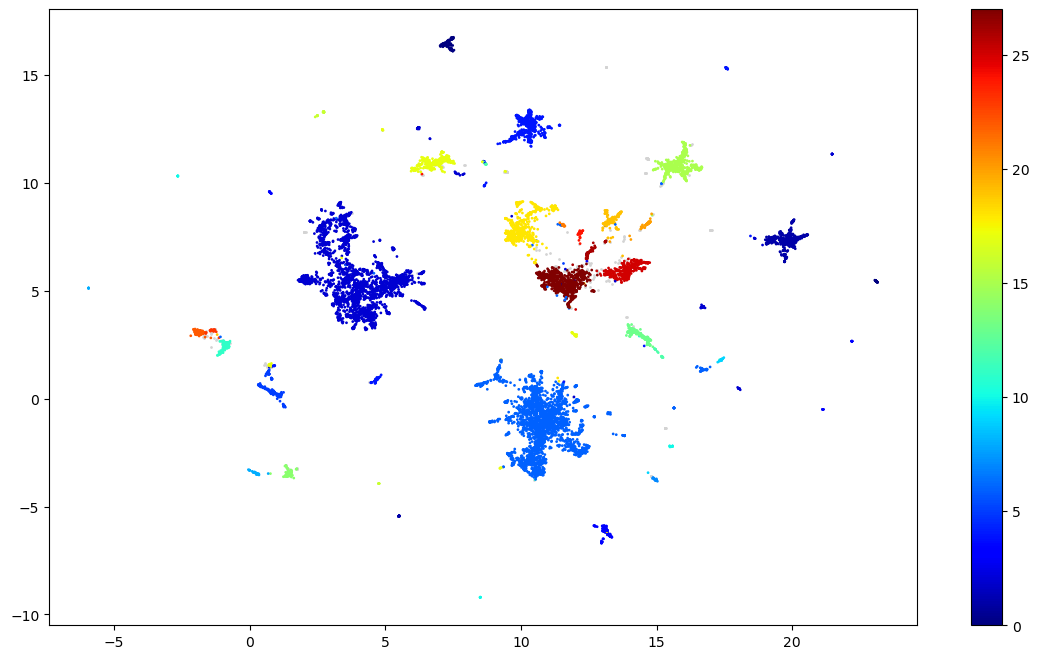

In [13]:
model_main.plot_best_clusters()

In [16]:
model_laser.plot_best_clusters()

AttributeError: 'NoneType' object has no attribute 'labels_'

## Apply labels

In [52]:
%%time

def apply_labels(model, embeddings):
    data_dict = {
        'text': snippets,
        'embedding': [np.array(embedding) for embedding in embeddings]
    }
    df = pd.DataFrame(data_dict)
    df_summary, labeled_docs = model.apply_and_summarize_labels(df[['text']])
    return df_summary, labeled_docs

CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 65.1 µs


In [53]:
df_summary_sbert, labeled_docs_sbert = apply_labels(model_sbert, embeddings_sbert)
labeled_docs_sbert.head()

AttributeError: 'NoneType' object has no attribute 'labels_'

## Evaluate clustering performance using ground truth labels

If we know the ground truth labels, then we can evaluate how well our tuned models actually did. In this case we do know the ground truth labels of the bank77 dataset so we can compare the four models evaluated.

### Comparing multiple models

In [34]:
models = [model_use, model_st1, model_st2, model_st3]

df_comparison, labeled_docs_all_models = chatintents.evaluate_models(data_sample[['text', 'category']], models)

In [35]:
df_comparison

Model    ARI    NMI   loss  label_count  n_neighbors  n_components  \
1   st1  0.455  0.806  0.056           55            6             9   
3   st3  0.398  0.795  0.082           88            9            14   
2   st2  0.247  0.709  0.079           41            3            13   
0   use  0.253  0.708  0.113           55            6            10   

   min_cluster_size  random_state  
1                 6            42  
3                 3            42  
2                 7            42  
0                 5            42

In agreement with our above conclusion that sentence transformer 1 would be best since it has the lowest cost, here we see that it does in fact have the highest [Adjusted Rand Index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and [Normalized Mutual Info (NMI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html). Sentence transformers 2 and 3 are swithced in order in actual performance from what would be expected from their loss, but the loss measure is still a helpful metric.